## Домашнее задание 2: Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается.

* Старайтесь сделать код как можно более оптимальным и читаемым.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [123]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

**Задание 1 (1 балл)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [124]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Всего 53940 записей, по каждому признаку такое же количество записей - пропусков нет

In [125]:
data.isna().sum() 

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Применяя последовательно два метода (.isna() выдает True или 1, если есть пропуск, .sum() суммирует единицы по столбцам) убеждаемся в отсутствии пропусков

**Задача 2 (1 балл)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование).

"Unnamed:0" не несет никакой важной дополнительной информации, которую можно было бы применить при анализе данных. Это просто порядковый номер каждой строки.

In [126]:
data = data.drop('Unnamed: 0', axis=1)

In [127]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [220]:
data['size'] = data['x'] * data['y'] * data['z']

Определим размер алмаза как дополнительную метрику - мне показалось это достаточно наглядым. 

In [98]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [221]:
data = data.drop('size', axis=1)


In [222]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.0000,53940.0000,53940.0000,53940.0000,53940.0000,53940.0000,53940.0000
mean,0.7979,61.7494,57.4572,3932.7997,5.7312,5.7345,3.5387
std,0.4740,1.4326,2.2345,3989.4397,1.1218,1.1421,0.7057
min,0.2000,43.0000,43.0000,326.0000,0.0000,0.0000,0.0000
25%,0.4000,61.0000,56.0000,950.0000,4.7100,4.7200,2.9100
50%,0.7000,61.8000,57.0000,2401.0000,5.7000,5.7100,3.5300
75%,1.0400,62.5000,59.0000,5324.2500,6.5400,6.5400,4.0400
max,5.0100,79.0000,95.0000,18823.0000,10.7400,58.9000,31.8000


**Задание 3 (1 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками. Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [223]:
NumericData = data[['carat', 'depth', 'table', 'price','x', 'y', 'z']]

In [224]:
NumericData.corr()

,carat,depth,table,price,x,y,z
carat,1.0000,0.0282,0.1816,0.9216,0.9751,0.9517,0.9534
depth,0.0282,1.0000,-0.2958,-0.0106,-0.0253,-0.0293,0.0949
table,0.1816,-0.2958,1.0000,0.1271,0.1953,0.1838,0.1509
price,0.9216,-0.0106,0.1271,1.0000,0.8844,0.8654,0.8612
x,0.9751,-0.0253,0.1953,0.8844,1.0000,0.9747,0.9708
y,0.9517,-0.0293,0.1838,0.8654,0.9747,1.0000,0.9520
z,0.9534,0.0949,0.1509,0.8612,0.9708,0.9520,1.0000


<Axes: title={'center': 'Price Correlation of Features'}>

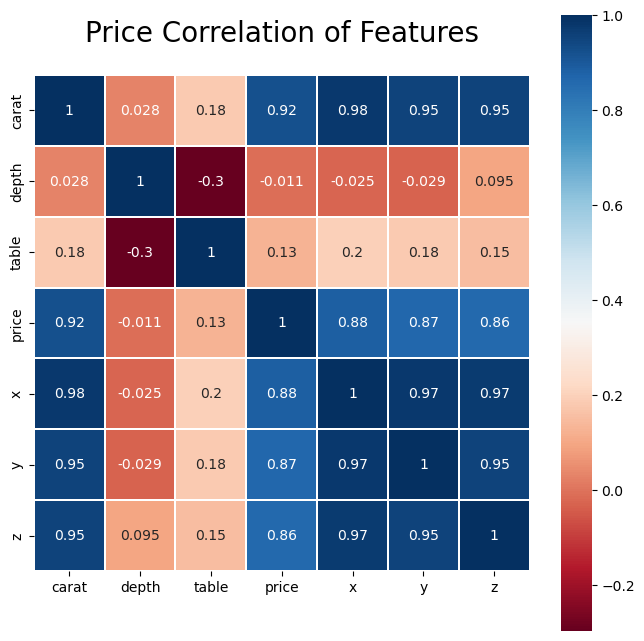

In [225]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,8))

plt.title('Price Correlation of Features', y=1.05, size=20)
sns.heatmap(NumericData.corr(),
           linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)

С целевой переменной коррелирует carat и размер(x,y,z) - очень сильная прямая связь (коэф. 0,9 - 1,0)

**Задание 4 (1 балл)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования (pd.get_dummies). Не забудьте поставить значение параметра drop_first равным True.

In [226]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [227]:
data1 = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2300,Ideal,E,SI2,61.5000,55.0000,326,3.9500,3.9800,2.4300
1,0.2100,Premium,E,SI1,59.8000,61.0000,326,3.8900,3.8400,2.3100
2,0.2300,Good,E,VS1,56.9000,65.0000,327,4.0500,4.0700,2.3100
3,0.2900,Premium,I,VS2,62.4000,58.0000,334,4.2000,4.2300,2.6300
4,0.3100,Good,J,SI2,63.3000,58.0000,335,4.3400,4.3500,2.7500


In [228]:
data1

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.2300,61.5000,55.0000,326,3.9500,3.9800,2.4300,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.2100,59.8000,61.0000,326,3.8900,3.8400,2.3100,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.2300,56.9000,65.0000,327,4.0500,4.0700,2.3100,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.2900,62.4000,58.0000,334,4.2000,4.2300,2.6300,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.3100,63.3000,58.0000,335,4.3400,4.3500,2.7500,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.7200,60.8000,57.0000,2757,5.7500,5.7600,3.5000,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.7200,63.1000,55.0000,2757,5.6900,5.7500,3.6100,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.7000,62.8000,60.0000,2757,5.6600,5.6800,3.5600,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.8600,61.0000,58.0000,2757,6.1500,6.1200,3.7400,False,False,True,...,True,False,False,False,False,True,False,False,False,False


**Задание 5 (1 балл)** 
Создайте матрицу X, содержащую все признаки, и не содержащую целевую переменную price. Также создайте вектор y, содержащий целевую переменную price.

In [246]:
X = data.drop('price', axis=1)
y = data['price']

In [247]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.2300,Ideal,E,SI2,61.5000,55.0000,3.9500,3.9800,2.4300
1,0.2100,Premium,E,SI1,59.8000,61.0000,3.8900,3.8400,2.3100
2,0.2300,Good,E,VS1,56.9000,65.0000,4.0500,4.0700,2.3100
3,0.2900,Premium,I,VS2,62.4000,58.0000,4.2000,4.2300,2.6300
4,0.3100,Good,J,SI2,63.3000,58.0000,4.3400,4.3500,2.7500
...,...,...,...,...,...,...,...,...,...
53935,0.7200,Ideal,D,SI1,60.8000,57.0000,5.7500,5.7600,3.5000
53936,0.7200,Good,D,SI1,63.1000,55.0000,5.6900,5.7500,3.6100
53937,0.7000,Very Good,D,SI1,62.8000,60.0000,5.6600,5.6800,3.5600
53938,0.8600,Premium,H,SI2,61.0000,58.0000,6.1500,6.1200,3.7400


**Задание 5 (1 балл)** 
Перемешайте данные! 

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задание 6 (1 балл)** Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

После применения масштабирования матрица перестает быть объектом Pandas Dataframe - решите эту проблему.

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
scaler = StandardScaler()
scaler.fit(X_train)


ValueError: could not convert string to float: 'Ideal'

In [251]:
scaler.mean_ # среднее из модели масштабирования данных

AttributeError: 'StandardScaler' object has no attribute 'mean_'

In [252]:
X_train.mean() # средние значения в признаках посчитанные вручную

TypeError: Could not convert ['IdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodGoodPremiumGoodGoodGoodIdealIdealPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodPremiumVery GoodIdealVery GoodPremiumIdealGoodFairIdealIdealIdealIdealIdealVery GoodIdealGoodPremiumIdealPremiumVery GoodGoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumGoodIdealPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealFairIdealPremiumPremiumFairIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumGoodPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumFairIdealIdealIdealVery GoodPremiumGoodVery GoodGoodPremiumIdealGoodVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealGoodGoodPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealIdealIdealGoodGoodIdealVery GoodPremiumPremiumGoodFairVery GoodPremiumIdealIdealIdealGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealVery GoodFairPremiumGoodPremiumPremiumPremiumPremiumIdealGoodPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodGoodPremiumIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumFairVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumGoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodPremiumIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumGoodPremiumGoodFairIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumVery GoodPremiumPremiumIdealIdealPremiumVery GoodGoodPremiumPremiumPremiumPremiumVery GoodVery GoodGoodPremiumPremiumVery GoodPremiumVery GoodPremiumFairPremiumIdealVery GoodIdealIdealIdealFairPremiumIdealIdealVery GoodGoodFairIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumIdealVery GoodFairVery GoodIdealIdealIdealGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumPremiumGoodIdealVery GoodIdealPremiumIdealPremiumGoodIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodGoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumGoodIdealIdealGoodPremiumVery GoodIdealFairIdealIdealGoodIdealVery GoodPremiumVery GoodVery GoodGoodIdealIdealGoodPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealGoodVery GoodPremiumIdealPremiumVery GoodIdealIdealGoodIdealPremiumIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealGoodGoodVery GoodIdealPremiumGoodIdealPremiumPremiumVery GoodPremiumGoodIdealIdealGoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealIdealPremiumIdealGoodVery GoodGoodPremiumPremiumFairPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealGoodIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodGoodIdealPremiumVery GoodIdealIdealFairPremiumIdealIdealGoodPremiumGoodVery GoodGoodPremiumIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealGoodPremiumPremiumIdealVery GoodIdealIdealIdealGoodPremiumIdealIdealVery GoodGoodIdealVery GoodIdealVery GoodVery GoodVery GoodGoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealGoodPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumVery GoodIdealPremiumGoodPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealGoodIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodFairPremiumGoodIdealVery GoodIdealIdealFairIdealIdealPremiumGoodIdealFairVery GoodGoodIdealVery GoodIdealGoodPremiumIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealPremiumFairVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealGoodPremiumIdealIdealIdealGoodPremiumPremiumIdealFairPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumIdealVery GoodPremiumFairIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealVery GoodIdealVery GoodPremiumFairPremiumGoodIdealPremiumPremiumVery GoodGoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumFairPremiumVery GoodVery GoodVery GoodIdealPremiumIdealPremiumPremiumIdealIdealVery GoodIdealGoodFairGoodIdealVery GoodIdealIdealGoodVery GoodIdealIdealIdealIdealGoodVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodGoodGoodPremiumGoodVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumFairFairPremiumIdealVery GoodIdealPremiumVery GoodGoodPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumGoodPremiumPremiumFairIdealPremiumIdealGoodIdealIdealVery GoodVery GoodIdealGoodVery GoodVery GoodIdealIdealVery GoodGoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodIdealGoodVery GoodIdealVery GoodIdealPremiumIdealGoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumGoodGoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumGoodIdealIdealGoodGoodIdealPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumFairIdealVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodPremiumIdealFairIdealIdealVery GoodPremiumVery GoodIdealIdealGoodGoodVery GoodPremiumPremiumPremiumIdealIdealGoodPremiumIdealPremiumVery GoodGoodIdealVery GoodGoodIdealVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealGoodIdealFairGoodPremiumVery GoodPremiumIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealFairIdealIdealFairIdealGoodGoodVery GoodIdealPremiumVery GoodFairIdealGoodPremiumPremiumPremiumIdealFairPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumIdealGoodPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealGoodIdealIdealGoodFairIdealPremiumIdealPremiumIdealGoodPremiumVery GoodIdealFairGoodVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumGoodIdealPremiumIdealPremiumGoodVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumVery GoodFairPremiumGoodPremiumPremiumVery GoodPremiumPremiumPremiumFairIdealIdealGoodIdealGoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealGoodVery GoodPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodIdealPremiumVery GoodIdealIdealFairIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumIdealGoodIdealIdealIdealPremiumVery GoodPremiumIdealIdealGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealGoodIdealPremiumIdealIdealFairIdealGoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealGoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealVery GoodIdealGoodIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumFairPremiumPremiumPremiumGoodPremiumIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealFairFairPremiumIdealGoodIdealIdealGoodVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealIdealGoodPremiumPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumGoodIdealGoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodIdealVery GoodIdealPremiumVery GoodGoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumGoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealVery GoodFairIdealVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumIdealVery GoodPremiumVery GoodIdealIdealFairGoodPremiumPremiumPremiumPremiumGoodVery GoodIdealPremiumGoodPremiumIdealIdealPremiumPremiumGoodIdealVery GoodPremiumVery GoodIdealVery GoodGoodIdealVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealFairIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealFairIdealPremiumVery GoodPremiumGoodIdealPremiumPremiumVery GoodVery GoodFairIdealVery GoodIdealIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealGoodPremiumIdealIdealVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealIdealGoodGoodIdealGoodIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealGoodGoodVery GoodGoodPremiumVery GoodIdealVery GoodVery GoodGoodIdealIdealGoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealPremiumGoodVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumVery GoodPremiumIdealGoodVery GoodGoodPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumVery GoodFairPremiumIdealPremiumVery GoodPremiumVery GoodPremiumGoodPremiumGoodIdealVery GoodIdealIdealIdealPremiumVery GoodGoodGoodIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealIdealPremiumGoodIdealGoodGoodIdealIdealIdealIdealGoodIdealFairIdealFairPremiumGoodIdealIdealFairIdealIdealGoodIdealIdealIdealVery GoodPremiumVery GoodVery GoodGoodGoodIdealPremiumGoodPremiumPremiumGoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumGoodPremiumVery GoodIdealVery GoodIdealFairIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumGoodPremiumIdealIdealVery GoodFairPremiumGoodGoodIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodGoodPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumIdealVery GoodVery GoodFairPremiumIdealGoodPremiumGoodIdealFairIdealGoodGoodPremiumVery GoodPremiumGoodIdealPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealFairPremiumIdealPremiumIdealVery GoodGoodIdealPremiumIdealVery GoodPremiumPremiumGoodIdealIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodGoodIdealVery GoodVery GoodGoodIdealPremiumVery GoodIdealVery GoodIdealPremiumGoodIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodIdealPremiumGoodPremiumGoodPremiumPremiumVery GoodIdealVery GoodGoodIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealGoodIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumFairPremiumPremiumPremiumIdealIdealVery GoodGoodGoodPremiumFairIdealIdealIdealVery GoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumVery GoodPremiumIdealGoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodGoodIdealPremiumPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealGoodVery GoodIdealIdealVery GoodGoodPremiumIdealPremiumVery GoodVery GoodFairIdealIdealIdealGoodPremiumIdealIdealIdealGoodGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealVery GoodFairPremiumGoodPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumGoodPremiumIdealPremiumFairVery GoodIdealPremiumGoodPremiumPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealGoodPremiumIdealGoodPremiumIdealPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealGoodVery GoodIdealIdealGoodVery GoodIdealPremiumPremiumIdealIdealPremiumGoodPremiumPremiumVery GoodFairIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodIdealGoodVery GoodPremiumIdealVery GoodIdealFairVery GoodGoodIdealIdealIdealGoodVery GoodIdealFairPremiumGoodPremiumIdealIdealIdealIdealPremiumFairIdealIdealIdealIdealGoodIdealIdealPremiumPremiumGoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodGoodPremiumIdealIdealPremiumGoodPremiumIdealIdealVery GoodVery GoodFairIdealGoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumGoodIdealPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealGoodIdealVery GoodPremiumIdealPremiumIdealPremiumIdealIdealGoodIdealPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumFairVery GoodPremiumVery GoodGoodGoodIdealPremiumIdealIdealIdealGoodIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodVery GoodVery GoodFairVery GoodGoodPremiumPremiumVery GoodIdealPremiumIdealVery GoodFairIdealVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodGoodPremiumPremiumGoodPremiumPremiumIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealGoodPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumPremiumIdealGoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodGoodIdealVery GoodGoodIdealPremiumGoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumVery GoodIdealIdealIdealGoodVery GoodVery GoodGoodPremiumIdealIdealVery GoodVery GoodIdealGoodPremiumVery GoodIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumIdealGoodGoodIdealIdealIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodIdealVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodGoodPremiumFairIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumGoodIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealFairIdealGoodIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealGoodPremiumGoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealGoodIdealVery GoodIdealIdealVery GoodVery GoodIdealFairPremiumVery GoodIdealGoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumIdealIdealVery GoodGoodIdealVery GoodGoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumFairGoodIdealPremiumIdealIdealIdealGoodVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodPremiumFairIdealIdealFairIdealIdealIdealPremiumFairPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealVery GoodIdealGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealVery GoodGoodIdealIdealIdealVery GoodIdealGoodIdealVery GoodIdealIdealIdealFairFairPremiumPremiumFairIdealIdealVery GoodPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealGoodVery GoodPremiumGoodPremiumGoodIdealPremiumPremiumGoodIdealIdealIdealIdealIdealIdealVery GoodPremiumGoodIdealFairIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodFairIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealGoodIdealIdealPremiumPremiumVery GoodIdealPremiumGoodVery GoodIdealVery GoodIdealGoodIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodFairIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodGoodIdealFairPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumGoodIdealGoodPremiumVery GoodPremiumPremiumIdealPremiumPremiumVery GoodGoodPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodGoodIdealVery GoodIdealGoodIdealIdealGoodPremiumIdealVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumGoodPremiumVery GoodGoodVery GoodIdealVery GoodIdealPremiumGoodGoodPremiumIdealPremiumIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodIdealGoodIdealVery GoodPremiumPremiumIdealPremiumGoodIdealIdealIdealPremiumIdealFairVery GoodGoodIdealIdealVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealPremiumIdealIdealIdealGoodIdealIdealPremiumIdealGoodIdealPremiumIdealIdealVery GoodIdealIdealPremiumGoodPremiumVery GoodIdealIdealIdealPremiumGoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealGoodIdealPremiumVery GoodIdealGoodFairIdealPremiumFairGoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealPremiumVery GoodGoodVery GoodIdealIdealFairFairVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodGoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodFairVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumGoodPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealFairIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodGoodPremiumVery GoodGoodPremiumIdealPremiumIdealVery GoodPremiumGoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealGoodIdealPremiumVery GoodVery GoodIdealFairPremiumPremiumIdealIdealPremiumIdealPremiumIdealFairGoodPremiumFairIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealVery GoodPremiumFairIdealIdealFairPremiumPremiumIdealIdealIdealPremiumIdealFairIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealVery GoodFairIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodIdealPremiumVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealPremiumPremiumGoodVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodFairVery GoodVery GoodIdealPremiumGoodPremiumPremiumPremiumGoodVery GoodPremiumGoodPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodGoodPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodGoodPremiumIdealIdealVery GoodGoodIdealIdealPremiumVery GoodGoodPremiumIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumPremiumGoodIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodVery GoodFairIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumVery GoodGoodVery GoodIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealVery GoodPremiumPremiumPremiumVery GoodPremiumVery GoodIdealGoodIdealIdealVery GoodIdealPremiumIdealGoodPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealGoodGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumFairPremiumVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodGoodGoodPremiumPremiumVery GoodGoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealIdealGoodPremiumGoodIdealVery GoodIdealIdealFairIdealVery GoodIdealVery GoodPremiumIdealVery GoodFairVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumGoodIdealVery GoodPremiumVery GoodIdealIdealVery GoodPremiumVery GoodIdealIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealFairGoodIdealPremiumIdealGoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealGoodIdealIdealIdealGoodIdealGoodIdealIdealIdealPremiumPremiumIdealIdealIdealGoodIdealIdealGoodPremiumVery GoodVery GoodPremiumGoodFairIdealPremiumIdealIdealGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumFairIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodGoodGoodPremiumVery GoodPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealGoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealGoodPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealGoodPremiumIdealPremiumVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodGoodVery GoodIdealIdealGoodIdealVery GoodIdealIdealGoodPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumIdealIdealGoodPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealVery GoodIdealFairFairFairIdealIdealIdealGoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealIdealGoodIdealVery GoodIdealVery GoodIdealPremiumPremiumGoodFairVery GoodFairVery GoodGoodGoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodPremiumVery GoodPremiumIdealGoodPremiumPremiumIdealFairPremiumIdealVery GoodGoodPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealGoodPremiumIdealIdealIdealVery GoodIdealGoodFairPremiumIdealVery GoodIdealGoodVery GoodGoodPremiumIdealVery GoodIdealIdealPremiumIdealIdealPremiumGoodVery GoodIdealFairIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealFairVery GoodVery GoodIdealFairPremiumIdealGoodIdealPremiumIdealIdealGoodVery GoodPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealFairGoodFairVery GoodVery GoodPremiumPremiumGoodVery GoodPremiumIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealPremiumGoodIdealPremiumIdealGoodIdealIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodFairIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodGoodIdealIdealGoodVery GoodPremiumIdealFairIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumIdealIdealIdealPremiumGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodPremiumGoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodVery GoodGoodIdealPremiumFairPremiumVery GoodIdealIdealIdealGoodVery GoodGoodPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumPremiumPremiumIdealVery GoodGoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodGoodPremiumIdealGoodPremiumVery GoodIdealVery GoodPremiumPremiumGoodVery GoodVery GoodGoodVery GoodVery GoodFairPremiumIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealFairPremiumVery GoodPremiumGoodPremiumIdealPremiumFairIdealPremiumPremiumPremiumGoodPremiumVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumIdealFairIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodGoodIdealIdealGoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealGoodIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumGoodVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealGoodVery GoodGoodPremiumIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealIdealFairIdealIdealGoodVery GoodPremiumVery GoodPremiumIdealPremiumGoodIdealPremiumIdealPremiumIdealPremiumIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodFairIdealPremiumVery GoodVery GoodVery GoodVery GoodFairPremiumVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealIdealGoodPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealGoodVery GoodPremiumPremiumFairIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumPremiumGoodPremiumPremiumPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodGoodFairPremiumPremiumVery GoodPremiumVery GoodPremiumIdealIdealGoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumGoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealFairVery GoodVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumPremiumIdealPremiumFairIdealVery GoodIdealFairVery GoodGoodIdealFairIdealVery GoodIdealVery GoodIdealFairPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealGoodPremiumIdealGoodVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumVery GoodGoodPremiumVery GoodFairIdealFairPremiumIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodGoodPremiumPremiumVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodPremiumIdealFairIdealIdealIdealGoodVery GoodGoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumGoodVery GoodVery GoodIdealIdealPremiumIdealIdealGoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealVery GoodPremiumGoodPremiumVery GoodIdealIdealVery GoodIdealGoodVery GoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealFairGoodGoodPremiumIdealPremiumIdealVery GoodIdealGoodVery GoodIdealVery GoodPremiumPremiumGoodVery GoodVery GoodPremiumIdealIdealGoodIdealGoodPremiumIdealVery GoodVery GoodIdealPremiumGoodVery GoodIdealGoodPremiumGoodVery GoodVery GoodPremiumIdealGoodVery GoodIdealIdealVery GoodIdealIdealPremiumPremiumPremiumFairVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodIdealGoodPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodFairVery GoodIdealIdealPremiumVery GoodVery GoodIdealVery GoodGoodIdealGoodIdealPremiumIdealFairPremiumIdealPremiumIdealIdealVery GoodGoodIdealGoodIdealIdealGoodIdealFairIdealVery GoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodPremiumGoodIdealVery GoodGoodIdealVery GoodIdealIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodIdealFairPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealVery GoodGoodIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealGoodPremiumIdealFairGoodPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealVery GoodPremiumGoodVery GoodIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodGoodPremiumIdealIdealIdealIdealPremiumGoodIdealVery GoodVery GoodIdealGoodFairGoodPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumPremiumGoodPremiumPremiumVery GoodPremiumGoodPremiumGoodGoodVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodIdealIdealGoodIdealIdealIdealIdealGoodPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealFairVery GoodIdealPremiumVery GoodIdealGoodVery GoodGoodPremiumIdealVery GoodGoodVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealFairIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodGoodIdealIdealIdealPremiumIdealFairGoodVery GoodGoodGoodGoodVery GoodPremiumIdealVery GoodGoodPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumGoodPremiumPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodGoodIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodPremiumFairPremiumIdealVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodIdealVery GoodGoodFairIdealIdealVery GoodIdealIdealFairPremiumPremiumIdealIdealGoodIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodIdealGoodVery GoodIdealPremiumIdealIdealIdealPremiumGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodGoodGoodIdealGoodIdealVery GoodPremiumVery GoodGoodVery GoodGoodIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodGoodGoodIdealIdealPremiumIdealIdealPremiumIdealGoodIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealIdealGoodIdealVery GoodVery GoodIdealIdealPremiumFairGoodIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumPremiumIdealGoodIdealPremiumGoodIdealPremiumPremiumPremiumIdealPremiumIdealIdealGoodGoodIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodGoodIdealPremiumIdealIdealFairVery GoodIdealGoodIdealPremiumIdealIdealIdealIdealFairFairVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodPremiumVery GoodVery GoodPremiumGoodIdealVery GoodIdealVery GoodIdealPremiumGoodPremiumGoodIdealIdealPremiumPremiumFairGoodIdealIdealPremiumFairVery GoodPremiumIdealIdealGoodVery GoodPremiumGoodPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealGoodIdealPremiumPremiumIdealGoodPremiumIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealVery GoodIdealGoodIdealGoodIdealIdealIdealIdealIdealVery GoodVery GoodGoodPremiumGoodPremiumIdealPremiumGoodIdealPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumGoodVery GoodIdealGoodIdealPremiumPremiumIdealGoodPremiumVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealPremiumGoodPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodGoodGoodPremiumVery GoodIdealPremiumIdealIdealGoodPremiumGoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodIdealPremiumVery GoodPremiumIdealIdealIdealGoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealGoodPremiumIdealIdealPremiumIdealGoodPremiumIdealPremiumPremiumPremiumIdealIdealGoodIdealIdealIdealGoodIdealPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodGoodIdealVery GoodPremiumIdealGoodPremiumIdealGoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealPremiumPremiumIdealVery GoodGoodFairVery GoodGoodIdealIdealPremiumVery GoodPremiumIdealPremiumGoodIdealIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealIdealPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumIdealGoodIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumFairIdealPremiumPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealIdealFairIdealPremiumVery GoodIdealVery GoodVery GoodIdealPremiumIdealGoodIdealPremiumFairPremiumPremiumGoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodGoodPremiumVery GoodIdealVery GoodPremiumIdealPremiumIdealGoodGoodVery GoodVery GoodFairVery GoodVery GoodIdealGoodGoodPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodIdealIdealGoodVery GoodPremiumVery GoodGoodPremiumGoodIdealPremiumIdealIdealIdealIdealPremiumIdealVery GoodIdealFairIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodFairGoodIdealIdealIdealIdealGoodPremiumFairIdealGoodVery GoodPremiumIdealVery GoodGoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumIdealGoodPremiumPremiumIdealGoodIdealIdealVery GoodVery GoodIdealPremiumGoodVery GoodGoodIdealIdealGoodPremiumPremiumFairPremiumFairVery GoodGoodPremiumGoodPremiumVery GoodIdealPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealFairIdealVery GoodFairIdealIdealVery GoodIdealGoodIdealPremiumIdealGoodGoodIdealPremiumVery GoodGoodIdealPremiumVery GoodGoodIdealIdealIdealIdealVery GoodGoodIdealIdealGoodVery GoodIdealVery GoodFairFairPremiumVery GoodVery GoodVery GoodVery GoodFairIdealIdealIdealIdealIdealVery GoodGoodFairPremiumGoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealFairVery GoodIdealIdealPremiumVery GoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealFairIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealVery GoodGoodIdealVery GoodIdealGoodVery GoodVery GoodGoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealFairVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumFairPremiumGoodVery GoodGoodVery GoodVery GoodIdealIdealIdealGoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodFairPremiumIdealPremiumPremiumPremiumIdealGoodIdealGoodIdealIdealGoodVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodGoodPremiumIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumGoodPremiumIdealPremiumIdealIdealIdealGoodIdealVery GoodPremiumVery GoodGoodIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumFairPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumGoodGoodIdealPremiumIdealIdealVery GoodIdealGoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumIdealIdealFairIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumFairGoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodFairIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodGoodVery GoodIdealVery GoodPremiumIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumIdealGoodGoodVery GoodIdealGoodGoodIdealPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealGoodPremiumIdealIdealGoodVery GoodGoodIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodFairPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodPremiumGoodVery GoodGoodPremiumPremiumIdealIdealVery GoodGoodPremiumGoodIdealIdealPremiumVery GoodVery GoodIdealGoodVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumIdealFairIdealIdealGoodIdealPremiumIdealPremiumGoodVery GoodIdealVery GoodGoodIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodFairGoodVery GoodPremiumIdealFairPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealPremiumIdealGoodVery GoodIdealPremiumIdealPremiumPremiumIdealPremiumGoodIdealVery GoodPremiumIdealPremiumVery GoodPremiumGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodPremiumIdealIdealVery GoodGoodVery GoodFairIdealVery GoodVery GoodGoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodIdealGoodVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodPremiumPremiumVery GoodGoodVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodGoodVery GoodFairIdealVery GoodVery GoodIdealPremiumFairIdealVery GoodIdealPremiumVery GoodIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealFairIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealGoodVery GoodIdealIdealIdealPremiumVery GoodPremiumFairIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodGoodGoodVery GoodFairGoodIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumVery GoodGoodVery GoodGoodVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodVery GoodGoodPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumGoodVery GoodIdealVery GoodPremiumIdealGoodGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodIdealPremiumFairVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumIdealPremiumVery GoodIdealIdealGoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealGoodIdealVery GoodPremiumVery GoodGoodPremiumIdealIdealFairPremiumIdealPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealIdealGoodPremiumIdealPremiumVery GoodPremiumVery GoodPremiumGoodPremiumPremiumFairIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealFairPremiumVery GoodIdealPremiumGoodIdealPremiumVery GoodGoodPremiumVery GoodVery GoodGoodIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealFairGoodVery GoodGoodIdealVery GoodVery GoodVery GoodPremiumPremiumVery GoodGoodGoodIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealGoodIdealFairIdealVery GoodIdealIdealIdealGoodIdealGoodVery GoodPremiumGoodGoodVery GoodIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodGoodPremiumPremiumGoodIdealPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodFairIdealPremiumIdealIdealPremiumIdealPremiumFairIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodGoodIdealPremiumFairPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodGoodFairIdealPremiumPremiumVery GoodGoodIdealGoodIdealPremiumVery GoodVery GoodVery GoodPremiumGoodPremiumIdealIdealGoodFairIdealIdealGoodVery GoodIdealVery GoodIdealIdealFairVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodPremiumGoodFairIdealIdealIdealPremiumPremiumIdealVery GoodGoodIdealPremiumVery GoodIdealPremiumGoodPremiumIdealVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodFairGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodGoodFairIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealPremiumIdealFairIdealGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealGoodIdealPremiumIdealFairFairVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodPremiumIdealIdealGoodPremiumFairIdealVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealVery GoodVery GoodPremiumIdealGoodPremiumIdealVery GoodVery GoodGoodVery GoodPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodGoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealGoodVery GoodIdealGoodPremiumPremiumVery GoodPremiumIdealIdealFairIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodFairPremiumIdealGoodGoodIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealGoodIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealPremiumVery GoodIdealPremiumGoodIdealIdealVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumGoodGoodVery GoodIdealIdealVery GoodVery GoodGoodVery GoodVery GoodVery GoodGoodVery GoodFairIdealIdealGoodPremiumVery GoodIdealVery GoodPremiumIdealIdealFairVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealGoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodPremiumGoodPremiumPremiumPremiumIdealFairGoodPremiumVery GoodIdealIdealVery GoodGoodPremiumIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodGoodIdealIdealVery GoodPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodPremiumIdealFairVery GoodIdealVery GoodIdealVery GoodVery GoodGoodIdealVery GoodIdealIdealIdealVery GoodGoodGoodVery GoodIdealIdealIdealIdealIdealPremiumGoodVery GoodVery GoodIdealIdealGoodPremiumIdealFairFairGoodIdealIdealFairGoodIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealIdealFairIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodVery GoodGoodPremiumIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodFairVery GoodVery GoodIdealGoodIdealGoodIdealIdealIdealGoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumGoodPremiumVery GoodPremiumIdealPremiumVery GoodPremiumVery GoodGoodFairGoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodGoodVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumGoodFairIdealIdealPremiumPremiumIdealPremiumGoodPremiumIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumGoodIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealPremiumGoodFairIdealPremiumVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealFairVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumGoodPremiumPremiumIdealVery GoodIdealIdealIdealIdealVery GoodGoodFairIdealVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumGoodIdealPremiumGoodVery GoodVery GoodIdealPremiumVery GoodGoodIdealPremiumFairPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealGoodIdealPremiumIdealPremiumIdealGoodGoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealGoodIdealIdealVery GoodIdealFairPremiumPremiumVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumGoodIdealIdealVery GoodIdealFairIdealPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealVery GoodIdealVery GoodIdealFairPremiumVery GoodIdealIdealPremiumGoodIdealIdealIdealIdealGoodFairIdealVery GoodVery GoodGoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumGoodPremiumPremiumVery GoodIdealPremiumFairVery GoodGoodVery GoodPremiumGoodPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealGoodIdealPremiumPremiumPremiumVery GoodIdealFairVery GoodGoodIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumIdealVery GoodVery GoodPremiumPremiumGoodVery GoodPremiumIdealPremiumGoodIdealIdealVery GoodVery GoodIdealVery GoodIdealGoodIdealPremiumPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealGoodPremiumIdealIdealGoodPremiumIdealPremiumIdealIdealIdealPremiumGoodFairGoodVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumFairIdealIdealPremiumIdealVery GoodVery GoodPremiumGoodIdealVery GoodIdealVery GoodVery GoodVery GoodIdealFairGoodPremiumPremiumPremiumPremiumIdealGoodIdealVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealFairIdealPremiumPremiumIdealGoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodGoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealVery GoodGoodGoodIdealIdealIdealPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodPremiumVery GoodPremiumIdealIdealVery GoodGoodPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumGoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealFairIdealGoodVery GoodPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealGoodFairIdealPremiumVery GoodVery GoodPremiumFairIdealFairIdealFairIdealIdealIdealGoodIdealIdealGoodIdealIdealVery GoodVery GoodIdealGoodPremiumIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumFairPremiumPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodPremiumPremiumGoodPremiumPremiumPremiumIdealIdealIdealGoodIdealIdealPremiumIdealFairIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodVery GoodVery GoodFairIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealGoodIdealIdealPremiumPremiumGoodVery GoodFairPremiumGoodIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumGoodFairPremiumPremiumPremiumPremiumIdealVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodPremiumIdealPremiumIdealIdealIdealPremiumPremiumGoodGoodIdealVery GoodPremiumPremiumPremiumIdealGoodFairPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealFairPremiumPremiumIdealPremiumPremiumVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumGoodGoodGoodPremiumIdealPremiumIdealPremiumIdealVery GoodGoodPremiumFairVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealGoodIdealIdealPremiumGoodPremiumFairGoodPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodGoodIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealGoodIdealIdealIdealGoodIdealGoodVery GoodVery GoodIdealFairGoodVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumGoodVery GoodIdealIdealGoodIdealIdealPremiumGoodIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodGoodVery GoodIdealPremiumIdealGoodGoodIdealPremiumPremiumFairFairPremiumIdealPremiumGoodIdealVery GoodFairPremiumPremiumPremiumIdealFairIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealGoodIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealPremiumPremiumGoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealGoodIdealPremiumIdealGoodGoodIdealPremiumIdealIdealIdealIdealGoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealGoodFairIdealPremiumIdealIdealPremiumIdealVery GoodIdealGoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealGoodFairIdealVery GoodPremiumIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumFairPremiumVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealIdealIdealFairIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodGoodIdealIdealPremiumVery GoodIdealIdealIdealPremiumFairPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodGoodIdealPremiumGoodPremiumPremiumIdealIdealPremiumIdealGoodIdealIdealPremiumIdealPremiumPremiumGoodVery GoodFairVery GoodVery GoodPremiumPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumGoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealGoodIdealVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumGoodIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealFairVery GoodGoodGoodGoodVery GoodPremiumIdealFairPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealGoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodPremiumGoodIdealVery GoodPremiumIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumIdealFairPremiumVery GoodIdealGoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodVery GoodPremiumGoodPremiumFairIdealPremiumFairGoodPremiumPremiumFairIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealGoodIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodGoodPremiumIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealGoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealIdealVery GoodPremiumPremiumGoodVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumIdealVery GoodGoodIdealGoodPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumGoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumGoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodGoodIdealIdealIdealFairIdealIdealVery GoodIdealGoodIdealGoodFairPremiumIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumGoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealIdealFairPremiumVery GoodIdealIdealVery GoodIdealIdealGoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumGoodIdealIdealGoodPremiumIdealGoodIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumFairPremiumGoodPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealPremiumIdealVery GoodFairIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumIdealFairVery GoodPremiumPremiumPremiumIdealGoodIdealFairIdealIdealFairGoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumGoodIdealVery GoodVery GoodVery GoodIdealVery GoodIdealIdealPremiumVery GoodVery GoodGoodIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumPremiumPremiumPremiumIdealVery GoodGoodIdealIdealIdealPremiumIdealVery GoodPremiumPremiumIdealIdealGoodIdealIdealFairIdealIdealGoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealGoodPremiumVery GoodIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealPremiumFairIdealFairIdealPremiumVery GoodIdealIdealPremiumIdealPremiumVery GoodPremiumIdealGoodGoodPremiumGoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodGoodVery GoodGoodIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumVery GoodPremiumFairGoodPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealPremiumGoodPremiumPremiumIdealVery GoodPremiumGoodIdealVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodIdealGoodPremiumGoodIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumPremiumPremiumGoodIdealIdealIdealIdealFairPremiumGoodIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealPremiumIdealIdealGoodIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodFairIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealGoodGoodIdealGoodIdealIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumPremiumVery GoodPremiumGoodIdealPremiumGoodIdealIdealPremiumIdealVery GoodIdealVery GoodIdealGoodPremiumIdealIdealVery GoodPremiumIdealGoodIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealIdealIdealVery GoodFairIdealIdealVery GoodIdealIdealVery GoodIdealIdealGoodVery GoodVery GoodIdealIdealVery GoodIdealFairVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealGoodIdealIdealVery GoodPremiumPremiumIdealGoodPremiumGoodIdealGoodVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodGoodIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodGoodIdealVery GoodPremiumGoodIdealPremiumVery GoodFairFairIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealGoodGoodVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealPremiumPremiumPremiumGoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealPremiumGoodPremiumPremiumVery GoodGoodIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodIdealGoodVery GoodVery GoodFairVery GoodIdealPremiumVery GoodPremiumIdealGoodIdealGoodIdealIdealPremiumPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealGoodIdealFairVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumIdealFairPremiumPremiumIdealFairPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodGoodGoodVery GoodIdealPremiumIdealVery GoodPremiumGoodVery GoodIdealPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealGoodVery GoodVery GoodGoodVery GoodVery GoodIdealPremiumGoodPremiumIdealPremiumVery GoodGoodVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealFairIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealFairGoodIdealIdealIdealPremiumPremiumVery GoodPremiumPremiumGoodFairIdealGoodVery GoodPremiumFairVery GoodIdealFairIdealIdealVery GoodGoodFairIdealIdealPremiumIdealIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumGoodIdealIdealVery GoodIdealGoodPremiumGoodFairIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumGoodPremiumIdealIdealIdealGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumGoodPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumFairPremiumPremiumVery GoodIdealVery GoodIdealGoodGoodPremiumIdealGoodVery GoodFairIdealPremiumIdealGoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodIdealIdealVery GoodGoodVery GoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealPremiumFairIdealIdealPremiumPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealIdealPremiumGoodPremiumPremiumPremiumIdealPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealIdealGoodPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumGoodPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumFairPremiumIdealIdealPremiumPremiumIdealGoodIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodIdealIdealFairVery GoodIdealVery GoodIdealIdealPremiumIdealGoodVery GoodIdealIdealVery GoodPremiumIdealFairIdealFairIdealIdealPremiumIdealIdealGoodGoodIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealGoodVery GoodPremiumIdealGoodVery GoodPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealGoodIdealIdealIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodGoodIdealPremiumVery GoodIdealVery GoodPremiumIdealPremiumGoodVery GoodGoodVery GoodIdealGoodPremiumGoodGoodPremiumIdealPremiumPremiumPremiumIdealGoodIdealIdealIdealPremiumIdealPremiumFairGoodIdealVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumGoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealIdealGoodIdealIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumGoodGoodIdealGoodIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodIdealVery GoodFairIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodGoodIdealIdealIdealGoodVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealFairPremiumIdealVery GoodPremiumPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealGoodPremiumGoodIdealIdealIdealGoodPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealPremiumIdealGoodVery GoodIdealGoodPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumGoodIdealIdealGoodGoodPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumFairIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumIdealVery GoodPremiumFairIdealVery GoodIdealVery GoodIdealVery GoodIdealFairIdealIdealIdealGoodVery GoodIdealIdealIdealPremiumFairPremiumIdealIdealIdealIdealVery GoodGoodVery GoodPremiumIdealVery GoodPremiumVery GoodGoodPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumFairIdealVery GoodGoodPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodFairIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealGoodIdealVery GoodIdealIdealFairIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumVery GoodPremiumVery GoodIdealIdealFairIdealFairVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodGoodPremiumGoodIdealPremiumIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealFairPremiumIdealIdealPremiumIdealGoodIdealGoodIdealFairVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumGoodVery GoodIdealIdealVery GoodPremiumIdealFairFairPremiumIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealGoodVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumGoodGoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealPremiumIdealGoodVery GoodGoodPremiumIdealIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealFairPremiumVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodGoodVery GoodPremiumIdealIdealVery GoodVery GoodFairVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumGoodIdealGoodGoodGoodVery GoodIdealFairPremiumIdealPremiumIdealVery GoodIdealPremiumGoodPremiumPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodIdealPremiumGoodIdealPremiumIdealIdealIdealGoodIdealVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodGoodFairIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealGoodIdealIdealPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealIdealGoodGoodPremiumIdealVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumGoodIdealIdealPremiumFairPremiumIdealIdealPremiumGoodPremiumGoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumFairPremiumIdealVery GoodGoodGoodPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealGoodVery GoodPremiumVery GoodPremiumIdealIdealPremiumIdealPremiumPremiumIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumGoodGoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealFairVery GoodIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumGoodPremiumFairVery GoodPremiumIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealFairPremiumIdealVery GoodVery GoodPremiumIdealGoodIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumIdealIdealFairVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodFairVery GoodVery GoodPremiumFairIdealFairPremiumIdealPremiumIdealIdealIdealGoodGoodVery GoodPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodVery GoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealGoodIdealIdealVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumFairIdealGoodGoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodGoodGoodGoodPremiumIdealPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealPremiumVery GoodGoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumGoodPremiumPremiumFairIdealGoodVery GoodPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealPremiumPremiumGoodPremiumVery GoodPremiumPremiumIdealIdealVery GoodGoodIdealPremiumVery GoodIdealVery GoodPremiumGoodVery GoodPremiumGoodPremiumIdealGoodIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodIdealFairIdealIdealPremiumGoodIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumVery GoodIdealIdealVery GoodGoodVery GoodGoodIdealGoodIdealIdealIdealIdealVery GoodGoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealGoodIdealPremiumPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumGoodIdealPremiumVery GoodIdealIdealGoodIdealVery GoodGoodPremiumVery GoodGoodPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumIdealPremiumVery GoodGoodPremiumIdealFairIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealGoodIdealIdealIdealGoodIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodGoodIdealGoodIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealGoodIdealPremiumGoodIdealIdealIdealIdealFairIdealGoodIdealGoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumIdealFairFairIdealVery GoodPremiumGoodGoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealGoodPremiumIdealIdealIdealIdealPremiumIdealGoodVery GoodGoodPremiumPremiumVery GoodFairIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealGoodPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumGoodPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumPremiumGoodGoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealGoodIdealIdealFairIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumIdealGoodIdealIdealIdealVery GoodFairVery GoodVery GoodIdealIdealFairIdealGoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealFairIdealPremiumIdealVery GoodIdealIdealPremiumGoodPremiumIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumVery GoodGoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumVery GoodGoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodGoodIdealIdealIdealFairIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealFairPremiumPremiumIdealVery GoodGoodGoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumGoodIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodFairVery GoodFairGoodVery GoodPremiumPremiumVery GoodIdealIdealPremiumPremiumVery GoodGoodGoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealPremiumGoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodFairIdealPremiumVery GoodPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealIdealGoodIdealPremiumFairPremiumIdealGoodGoodGoodPremiumGoodGoodIdealIdealVery GoodVery GoodVery GoodGoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodGoodIdealPremiumPremiumPremiumIdealVery GoodFairVery GoodIdealIdealIdealVery GoodPremiumIdealGoodPremiumIdealIdealVery GoodPremiumVery GoodPremiumGoodIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealGoodPremiumPremiumVery GoodIdealGoodIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumGoodGoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodGoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodVery GoodFairIdealVery GoodIdealVery GoodPremiumPremiumGoodPremiumPremiumPremiumVery GoodIdealGoodIdealIdealPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealFairPremiumVery GoodGoodIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodGoodGoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealPremiumIdealFairIdealGoodGoodIdealFairIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumGoodFairPremiumIdealIdealFairVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodFairIdealGoodPremiumGoodPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodPremiumGoodIdealGoodPremiumPremiumIdealIdealIdealGoodIdealPremiumIdealGoodIdealIdealFairFairIdealPremiumPremiumGoodGoodPremiumPremiumIdealIdealGoodIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodGoodGoodGoodIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealGoodGoodIdealPremiumFairPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumIdealPremiumIdealPremiumIdealPremiumIdealGoodIdealPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodGoodGoodIdealIdealIdealVery GoodIdealIdealGoodIdealGoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealFairIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealFairIdealIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumGoodGoodIdealIdealVery GoodFairIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumFairPremiumPremiumIdealIdealVery GoodPremiumGoodGoodVery GoodPremiumIdealPremiumVery GoodIdealIdealGoodGoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealFairIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealVery GoodGoodVery GoodIdealFairIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealIdealVery GoodGoodVery GoodFairPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealVery GoodGoodIdealGoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodGoodPremiumIdealGoodIdealVery GoodIdealPremiumGoodGoodPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumPremiumIdealGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealPremiumPremiumVery GoodGoodGoodPremiumPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealVery GoodIdealIdealVery GoodGoodVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealPremiumGoodPremiumIdealPremiumGoodIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealPremiumGoodIdealPremiumVery GoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealFairVery GoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodGoodPremiumGoodVery GoodPremiumPremiumGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealGoodIdealVery GoodPremiumPremiumVery GoodFairPremiumPremiumFairIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodIdealFairIdealIdealIdealPremiumGoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumFairIdealIdealIdealFairIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumGoodIdealGoodPremiumIdealFairGoodGoodIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealGoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodFairVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodGoodVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealGoodPremiumFairVery GoodGoodPremiumPremiumPremiumGoodIdealVery GoodIdealPremiumGoodPremiumPremiumVery GoodVery GoodGoodPremiumPremiumGoodVery GoodIdealGoodPremiumIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodFairVery GoodGoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodGoodPremiumPremiumIdealVery GoodIdealFairIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumGoodGoodPremiumIdealPremiumGoodIdealIdealIdealGoodVery GoodIdealPremiumVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealPremiumIdealGoodIdealIdealGoodIdealIdealIdealIdealPremiumGoodIdealPremiumPremiumIdealPremiumIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealFairVery GoodIdealGoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodIdealGoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumGoodIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealGoodGoodIdealVery GoodPremiumPremiumVery GoodIdealIdealPremiumGoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealGoodIdealFairVery GoodFairIdealVery GoodPremiumVery GoodIdealGoodVery GoodIdealGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumGoodVery GoodIdealIdealIdealGoodIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodFairPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumFairPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealGoodGoodVery GoodGoodIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealVery GoodPremiumGoodIdealFairPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealGoodVery GoodVery GoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealGoodVery GoodIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodIdealGoodPremiumVery GoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealPremiumGoodPremiumPremiumIdealVery GoodPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumFairIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodGoodPremiumIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodIdealGoodVery GoodIdealIdealIdealPremiumPremiumIdealGoodVery GoodPremiumGoodIdealIdealPremiumGoodIdealIdealIdealIdealIdealIdealIdealGoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumFairIdealPremiumVery GoodPremiumIdealPremiumGoodVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodGoodPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodGoodVery GoodVery GoodPremiumIdealIdealGoodVery GoodIdealGoodVery GoodIdealVery GoodFairPremiumPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumPremiumGoodIdealVery GoodIdealIdealGoodPremiumVery GoodFairIdealIdealPremiumGoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodFairPremiumPremiumVery GoodPremiumPremiumGoodPremiumVery GoodGoodPremiumIdealIdealPremiumPremiumGoodGoodPremiumVery GoodPremiumPremiumIdealGoodIdealIdealFairIdealVery GoodIdealIdealPremiumGoodIdealFairPremiumVery GoodPremiumGoodIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealIdealFairIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumGoodPremiumIdealIdealPremiumPremiumGoodPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodGoodIdealPremiumVery GoodIdealPremiumPremiumGoodVery GoodVery GoodPremiumGoodPremiumIdealIdealIdealGoodIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealGoodVery GoodVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealGoodIdealPremiumVery GoodIdealGoodIdealGoodVery GoodPremiumPremiumPremiumIdealPremiumPremiumGoodIdealGoodVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodGoodPremiumPremiumIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodGoodVery GoodVery GoodGoodGoodIdealPremiumVery GoodVery GoodIdealIdealIdealGoodIdealIdealGoodIdealVery GoodIdealIdealGoodIdealVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealGoodPremiumVery GoodPremiumIdealGoodIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealIdealVery GoodVery GoodIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodGoodPremiumIdealGoodPremiumFairIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumFairPremiumPremiumVery GoodVery GoodFairVery GoodIdealVery GoodVery GoodVery GoodIdealGoodPremiumVery GoodVery GoodIdealIdealFairPremiumIdealIdealVery GoodIdealIdealFairVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealGoodVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumVery GoodGoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodGoodPremiumIdealPremiumIdealVery GoodGoodIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodFairGoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealGoodIdealIdealFairVery GoodPremiumIdealVery GoodPremiumVery GoodIdealGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumPremiumPremiumVery GoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodIdealIdealPremiumIdealIdealIdealIdealGoodIdealIdealPremiumFairIdealPremiumIdealIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodIdealGoodGoodIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodGoodVery GoodPremiumVery GoodIdealIdealGoodFairVery GoodIdealVery GoodPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodGoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodGoodPremiumIdealIdealGoodGoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealVery GoodPremiumPremiumGoodVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodVery GoodVery GoodFairIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealFairFairIdealPremiumGoodIdealPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealGoodGoodVery GoodPremiumIdealIdealIdealVery GoodGoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodPremiumGoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodFairIdealGoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealGoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealFairIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumVery GoodVery GoodGoodGoodPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumFairPremiumIdealVery GoodIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumPremiumPremiumGoodPremiumVery GoodVery GoodGoodIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodFairPremiumGoodFairVery GoodPremiumPremiumFairVery GoodGoodIdealPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealVery GoodPremiumFairPremiumIdealGoodPremiumPremiumIdealPremiumVery GoodFairPremiumIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealGoodGoodIdealIdealPremiumIdealGoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumIdealPremiumGoodGoodPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealGoodPremiumIdealVery GoodIdealPremiumGoodIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealFairPremiumGoodIdealIdealVery GoodIdealIdealGoodPremiumIdealGoodVery GoodIdealPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumFairVery GoodIdealIdealPremiumFairPremiumGoodPremiumPremiumPremiumIdealGoodVery GoodPremiumIdealFairPremiumGoodIdealVery GoodGoodIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealPremiumGoodPremiumPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealPremiumPremiumGoodIdealIdealPremiumPremiumIdealGoodVery GoodPremiumVery GoodIdealGoodIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodGoodGoodIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealGoodIdealVery GoodGoodPremiumPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodFairIdealIdealVery GoodPremiumPremiumIdealVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodIdealPremiumIdealPremiumPremiumVery GoodFairPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodFairVery GoodGoodVery GoodIdealGoodPremiumVery GoodIdealIdealFairIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumGoodIdealIdealPremiumIdealGoodPremiumGoodIdealIdealGoodIdealIdealIdealGoodGoodVery GoodPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodPremiumIdealPremiumGoodIdealPremiumVery GoodGoodGoodPremiumGoodPremiumIdealPremiumPremiumVery GoodIdealGoodIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumGoodPremiumIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodIdealGoodVery GoodPremiumIdealIdealPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodIdealIdealFairIdealIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodPremiumGoodVery GoodGoodPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealGoodPremiumIdealIdealGoodVery GoodGoodIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodFairGoodIdealIdealIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealGoodIdealIdealIdealGoodFairPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumFairPremiumPremiumIdealFairIdealIdealVery GoodIdealVery GoodGoodPremiumVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealGoodPremiumFairIdealVery GoodIdealIdealIdealPremiumVery GoodIdealIdealGoodPremiumVery GoodIdealVery GoodPremiumVery GoodIdealGoodPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodGoodPremiumIdealPremiumGoodFairVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumGoodGoodPremiumVery GoodPremiumIdealVery GoodPremiumFairIdealIdealIdealVery GoodIdealVery GoodGoodIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealGoodIdealPremiumIdealVery GoodGoodVery GoodVery GoodIdealVery GoodGoodGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealGoodIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealGoodPremiumVery GoodFairVery GoodIdealIdealPremiumVery GoodIdealFairPremiumIdealIdealGoodIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealGoodFairIdealFairIdealIdealVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumPremiumGoodIdealVery GoodIdealGoodIdealIdealPremiumIdealIdealPremiumPremiumIdealGoodVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodGoodIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodGoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumGoodPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumGoodIdealVery GoodIdealVery GoodPremiumFairIdealIdealIdealIdealVery GoodIdealIdealGoodIdealIdealIdealVery GoodIdealIdealGoodPremiumIdealIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealGoodIdealIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodFairVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealGoodIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumGoodPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumVery GoodGoodPremiumPremiumIdealIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumGoodIdealVery GoodPremiumPremiumPremiumVery GoodIdealPremiumGoodIdealGoodIdealPremiumVery GoodIdealGoodPremiumIdealIdealGoodIdealIdealVery GoodPremiumVery GoodGoodPremiumIdealGoodIdealFairPremiumIdealIdealIdealGoodVery GoodFairIdealIdealFairPremiumPremiumVery GoodIdealPremiumFairPremiumGoodPremiumIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealGoodVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodGoodFairPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumFairPremiumIdealPremiumVery GoodIdealFairIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodFairVery GoodVery GoodFairIdealIdealPremiumGoodIdealIdealPremiumIdealPremiumPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumFairIdealIdealIdealVery GoodIdealGoodIdealPremiumIdealPremiumVery GoodFairIdealVery GoodVery GoodIdealGoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodFairVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealGoodIdealIdealIdealPremiumGoodIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealGoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodGoodIdealPremiumPremiumPremiumGoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumGoodGoodGoodIdealVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumGoodPremiumIdealVery GoodGoodIdealIdealPremiumIdealGoodGoodGoodIdealGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumGoodIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumVery GoodVery GoodGoodIdealFairPremiumPremiumIdealIdealVery GoodIdealVery GoodFairVery GoodPremiumIdealIdealVery GoodGoodPremiumIdealIdealIdealIdealPremiumIdealVery GoodIdealFairVery GoodIdealPremiumFairVery GoodPremiumVery GoodPremiumGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumGoodPremiumGoodVery GoodGoodIdealVery GoodIdealIdealIdealGoodVery GoodGoodPremiumPremiumPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealGoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumPremiumGoodPremiumFairPremiumIdealPremiumVery GoodVery GoodIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumGoodPremiumIdealPremiumVery GoodIdealPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealVery GoodIdealIdealGoodIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealPremiumGoodVery GoodIdealPremiumFairIdealPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodIdealIdealPremiumVery GoodGoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealIdealGoodIdealPremiumVery GoodPremiumVery GoodPremiumIdealPremiumGoodPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealGoodVery GoodVery GoodIdealPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodIdealPremiumVery GoodPremiumGoodIdealPremiumFairIdealIdealVery GoodIdealFairIdealVery GoodPremiumIdealIdealPremiumVery GoodFairIdealFairPremiumVery GoodVery GoodGoodPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodPremiumFairIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodVery GoodFairGoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodFairIdealIdealPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumIdealGoodGoodIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumGoodIdealVery GoodIdealVery GoodGoodGoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodPremiumVery GoodGoodIdealIdealVery GoodIdealGoodIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodGoodPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealGoodPremiumVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealIdealFairIdealIdealIdealIdealPremiumIdealGoodPremiumPremiumPremiumGoodIdealIdealIdealIdealPremiumVery GoodPremiumGoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealIdealGoodIdealVery GoodVery GoodIdealVery GoodGoodFairIdealGoodIdealVery GoodPremiumPremiumIdealVery GoodGoodVery GoodIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumGoodVery GoodGoodVery GoodIdealPremiumIdealIdealPremiumIdealPremiumPremiumGoodGoodVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealGoodIdealVery GoodIdealFairPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumGoodIdealIdealPremiumFairVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealVery GoodVery GoodGoodGoodIdealFairVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumGoodIdealVery GoodPremiumIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealGoodVery GoodPremiumVery GoodVery GoodGoodVery GoodGoodVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealGoodVery GoodPremiumIdealIdealFairPremiumPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealGoodIdealGoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodFairVery GoodPremiumPremiumPremiumIdealPremiumIdealFairIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodFairIdealVery GoodPremiumPremiumPremiumVery GoodIdealGoodGoodPremiumIdealIdealIdealGoodVery GoodIdealVery GoodIdealGoodIdealPremiumIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealGoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodFairVery GoodVery GoodPremiumIdealIdealFairVery GoodIdealIdealGoodVery GoodVery GoodIdealVery GoodVery GoodGoodPremiumIdealIdealVery GoodIdealVery GoodIdealGoodVery GoodIdealVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumFairIdealGoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodGoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealGoodIdealVery GoodPremiumPremiumVery GoodIdealGoodGoodPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealGoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumIdealGoodPremiumPremiumIdealVery GoodPremiumPremiumIdealPremiumVery GoodGoodIdealVery GoodPremiumVery GoodIdealIdealGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealGoodGoodPremiumVery GoodIdealIdealIdealFairIdealPremiumGoodPremiumPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumIdealGoodGoodIdealPremiumVery GoodGoodVery GoodIdealIdealVery GoodPremiumGoodPremiumIdealIdealVery GoodIdealIdealVery GoodGoodIdealGoodVery GoodGoodIdealIdealVery GoodIdealPremiumVery GoodFairVery GoodGoodIdealPremiumVery GoodGoodGoodGoodIdealPremiumIdealVery GoodGoodIdealIdealIdealPremiumVery GoodPremiumGoodIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumIdealFairIdealIdealVery GoodVery GoodVery GoodPremiumPremiumGoodPremiumPremiumIdealPremiumIdealGoodGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodFairIdealIdealFairVery GoodPremiumVery GoodIdealGoodIdealPremiumPremiumPremiumFairPremiumGoodVery GoodVery GoodIdealGoodPremiumIdealPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodFairVery GoodIdealVery GoodVery GoodGoodIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealGoodGoodIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodIdealGoodPremiumVery GoodGoodVery GoodVery GoodIdealGoodPremiumIdealGoodPremiumVery GoodIdealGoodPremiumPremiumIdealVery GoodVery GoodPremiumGoodIdealPremiumVery GoodVery GoodIdealIdealPremiumGoodPremiumIdealVery GoodGoodPremiumVery GoodIdealGoodIdealIdealPremiumIdealFairIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodFairFairPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumVery GoodGoodPremiumGoodGoodPremiumIdealIdealIdealGoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodGoodPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealPremiumGoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumGoodIdealIdealIdealPremiumIdealGoodVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodGoodPremiumGoodIdealPremiumPremiumIdealVery GoodVery GoodIdealFairGoodIdealVery GoodGoodPremiumVery GoodIdealGoodVery GoodIdealIdealIdealIdealVery GoodIdealIdealPremiumGoodPremiumPremiumIdealIdealVery GoodPremiumGoodVery GoodVery GoodPremiumIdealPremiumIdealIdealGoodIdealIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealPremiumGoodPremiumPremiumVery GoodVery GoodGoodIdealIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealVery GoodGoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodGoodGoodPremiumGoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumFairPremiumIdealIdealIdealIdealIdealIdealVery GoodGoodIdealPremiumGoodIdealIdealPremiumIdealIdealGoodVery GoodPremiumIdealGoodPremiumIdealVery GoodVery GoodIdealGoodIdealPremiumIdealGoodIdealIdealVery GoodIdealPremiumGoodPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumIdealGoodVery GoodVery GoodIdealPremiumIdealPremiumFairVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealPremiumIdealIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodIdealIdealPremiumIdealPremiumGoodVery GoodPremiumIdealFairFairIdealPremiumGoodIdealIdealPremiumGoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumGoodGoodIdealGoodIdealIdealPremiumIdealGoodPremiumIdealPremiumVery GoodGoodGoodGoodIdealIdealIdealPremiumIdealIdealPremiumPremiumGoodVery GoodFairVery GoodIdealVery GoodPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealGoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealGoodPremiumIdealPremiumIdealVery GoodPremiumIdealPremiumVery GoodIdealGoodIdealPremiumVery GoodVery GoodPremiumGoodFairIdealGoodPremiumFairIdealIdealGoodIdealIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealIdealIdealFairVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodIdealIdealGoodIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumVery GoodGoodVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodGoodFairIdealVery GoodIdealPremiumPremiumIdealVery GoodFairPremiumFairVery GoodIdealVery GoodPremiumPremiumIdealIdealGoodPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumFairGoodVery GoodIdealPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumPremiumVery GoodGoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumPremiumGoodIdealPremiumIdealVery GoodIdealIdealPremiumIdealIdealIdealFairFairIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumVery GoodFairVery GoodIdealVery GoodIdealVery GoodGoodVery GoodIdealFairVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodGoodGoodVery GoodIdealVery GoodIdealVery GoodGoodGoodIdealIdealGoodGoodIdealIdealIdealGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealGoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealVery GoodFairPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealFairIdealGoodGoodVery GoodVery GoodIdealPremiumIdealGoodVery GoodIdealPremiumGoodPremiumGoodIdealIdealPremiumGoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumFairVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodIdealVery GoodIdealVery GoodGoodPremiumPremiumPremiumGoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealGoodGoodGoodIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodGoodGoodIdealPremiumFairGoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealGoodPremiumVery GoodGoodVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealFairIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodVery GoodFairIdealPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodGoodPremiumIdealIdealGoodPremiumVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealFairIdealIdealPremiumVery GoodPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodGoodPremiumVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumGoodIdealGoodIdealIdealIdealPremiumFairIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumGoodIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealGoodPremiumPremiumFairIdealVery GoodIdealIdealPremiumPremiumGoodIdealIdealPremiumIdealGoodVery GoodIdealGoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealGoodIdealIdealIdealPremiumIdealPremiumVery GoodGoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodIdealPremiumGoodIdealIdealFairGoodIdealGoodVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodPremiumPremiumPremiumGoodGoodGoodPremiumVery GoodPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealFairIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealGoodGoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumFairVery GoodPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodPremiumFairVery GoodFairPremiumPremiumIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodGoodIdealVery GoodPremiumFairPremiumFairIdealVery GoodIdealPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealFairPremiumIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealFairIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealFairIdealIdealIdealPremiumIdealGoodPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodGoodGoodVery GoodIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealVery GoodGoodFairPremiumGoodPremiumFairIdealGoodVery GoodIdealGoodGoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealVery GoodGoodIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealVery GoodFairVery GoodVery GoodFairPremiumPremiumGoodPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealFairPremiumIdealIdealIdealIdealGoodPremiumIdealIdealGoodPremiumPremiumGoodPremiumPremiumPremiumVery GoodIdealGoodFairIdealIdealPremiumIdealIdealVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealGoodPremiumVery GoodVery GoodPremiumIdealPremiumFairIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodGoodIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodPremiumPremiumGoodFairIdealGoodPremiumVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealGoodFairIdealPremiumVery GoodFairIdealPremiumFairIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodPremiumVery GoodGoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumGoodGoodIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumFairVery GoodPremiumIdealGoodPremiumIdealIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealGoodIdealIdealVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodGoodGoodPremiumIdealFairIdealIdealIdealIdealIdealPremiumGoodIdealVery GoodVery GoodIdealIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealGoodPremiumIdealIdealIdealVery GoodPremiumFairIdealGoodIdealFairIdealVery GoodVery GoodIdealIdealPremiumIdealGoodPremiumIdealIdealVery GoodFairPremiumPremiumIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealFairIdealPremiumPremiumIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumGoodFairVery GoodFairPremiumIdealIdealPremiumGoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumGoodGoodIdealPremiumPremiumPremiumIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealGoodFairPremiumGoodVery GoodIdealIdealPremiumVery GoodFairIdealPremiumVery GoodFairPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodIdealFairIdealGoodIdealIdealIdealFairPremiumIdealIdealGoodPremiumVery GoodIdealPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodFairIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealGoodPremiumVery GoodPremiumGoodVery GoodPremiumPremiumIdealVery GoodIdealGoodPremiumVery GoodIdealVery GoodIdealIdealIdealIdealGoodIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumGoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodGoodGoodVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealFairPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealGoodGoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealGoodPremiumIdealGoodVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealFairIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealFairVery GoodPremiumGoodIdealVery GoodPremiumFairVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealPremiumGoodPremiumVery GoodVery GoodIdealIdealGoodFairIdealGoodIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodFairPremiumPremiumGoodVery GoodPremiumIdealIdealGoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealIdealFairGoodPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealGoodVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumIdealFairPremiumPremiumGoodIdealIdealPremiumVery GoodPremiumGoodIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealGoodPremiumIdealPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumGoodVery GoodPremiumVery GoodFairVery GoodGoodPremiumVery GoodIdealFairIdealPremiumVery GoodFairPremiumIdealPremiumIdealGoodPremiumIdealPremiumGoodVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealPremiumVery GoodGoodVery GoodIdealVery GoodVery GoodGoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodGoodVery GoodPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodGoodPremiumIdealVery GoodIdealFairIdealVery GoodPremiumIdealGoodVery GoodFairVery GoodPremiumGoodIdealPremiumPremiumVery GoodFairPremiumPremiumIdealIdealGoodIdealPremiumIdealIdealVery GoodFairIdealPremiumIdealVery GoodIdealPremiumIdealPremiumGoodVery GoodPremiumGoodIdealGoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumGoodPremiumGoodIdealPremiumVery GoodPremiumFairIdealPremiumVery GoodPremiumGoodPremiumIdealPremiumPremiumIdealVery GoodIdealIdealIdealGoodVery GoodIdealVery GoodIdealVery GoodFairGoodVery GoodIdealIdealIdealVery GoodIdealGoodIdealIdealIdealFairFairVery GoodVery GoodIdealPremiumIdealPremiumGoodVery GoodPremiumIdealIdealVery GoodIdealVery GoodGoodVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumGoodVery GoodPremiumVery GoodVery GoodFairVery GoodVery GoodGoodIdealVery GoodIdealGoodIdealVery GoodIdealGoodVery GoodIdealVery GoodPremiumIdealFairIdealIdealVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodFairVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealGoodGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumGoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumGoodVery GoodIdealVery GoodIdealIdealVery GoodGoodIdealIdealGoodIdealVery GoodIdealVery GoodIdealIdealFairIdealVery GoodPremiumVery GoodPremiumIdealGoodIdealIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealGoodIdealIdealPremiumIdealVery GoodIdealIdealGoodVery GoodPremiumGoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealGoodGoodVery GoodPremiumIdealIdealPremiumVery GoodPremiumVery GoodGoodIdealIdealPremiumVery GoodIdealVery GoodGoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodIdealVery GoodVery GoodVery GoodGoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealGoodVery GoodVery GoodPremiumGoodPremiumGoodVery GoodPremiumIdealPremiumPremiumGoodPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealGoodPremiumIdealIdealPremiumGoodGoodIdealPremiumVery GoodGoodGoodVery GoodPremiumFairPremiumIdealIdealIdealVery GoodIdealPremiumPremiumPremiumIdealIdealFairIdealPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodGoodIdealIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodGoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodGoodPremiumPremiumIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealVery GoodIdealPremiumGoodPremiumIdealIdealVery GoodPremiumGoodGoodVery GoodPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodGoodGoodVery GoodGoodGoodIdealGoodFairIdealPremiumGoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodPremiumGoodVery GoodIdealPremiumIdealVery GoodVery GoodIdealVery GoodFairPremiumPremiumPremiumGoodIdealVery GoodGoodGoodPremiumVery GoodVery GoodPremiumIdealGoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealFairIdealVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodGoodVery GoodIdealVery GoodGoodVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealGoodGoodGoodGoodPremiumFairIdealIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealVery GoodIdealFairPremiumIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealGoodGoodPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumFairIdealIdealFairVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealGoodVery GoodGoodVery GoodVery GoodIdealGoodIdealIdealGoodVery GoodIdealIdealFairIdealVery GoodPremiumPremiumPremiumGoodPremiumPremiumPremiumFairIdealPremiumPremiumPremiumIdealIdealVery GoodIdealGoodPremiumIdealFairIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealFairPremiumGoodVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumIdealFairVery GoodIdealVery GoodPremiumPremiumPremiumGoodPremiumPremiumPremiumIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodIdealIdealPremiumGoodPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodIdealIdealGoodVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealPremiumVery GoodIdealGoodPremiumPremiumIdealIdealIdealIdealGoodIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealFairIdealVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealGoodIdealGoodIdealPremiumIdealIdealFairGoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodGoodIdealIdealPremiumGoodPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumGoodVery GoodPremiumVery GoodGoodVery GoodPremiumPremiumFairIdealIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealGoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealGoodIdealGoodPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealVery GoodGoodIdealGoodGoodVery GoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumGoodIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealVery GoodVery GoodGoodPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumIdealGoodIdealPremiumIdealVery GoodIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealPremiumPremiumGoodIdealPremiumIdealIdealGoodIdealGoodVery GoodFairVery GoodFairIdealGoodFairPremiumPremiumVery GoodPremiumIdealIdealGoodIdealPremiumGoodPremiumPremiumIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodIdealVery GoodFairPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealFairIdealVery GoodIdealFairFairPremiumPremiumPremiumIdealVery GoodIdealIdealIdealPremiumIdealVery GoodIdealPremiumGoodIdealPremiumIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealPremiumIdealFairVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumGoodPremiumGoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealGoodPremiumIdealIdealIdealIdealGoodGoodPremiumVery GoodGoodPremiumPremiumIdealGoodGoodIdealVery GoodIdealIdealGoodIdealIdealIdealIdealFairPremiumPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodIdealFairVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodGoodIdealGoodPremiumVery GoodIdealIdealFairGoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealPremiumIdealIdealPremiumIdealIdealIdealGoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealGoodPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodFairPremiumFairIdealIdealVery GoodGoodIdealPremiumVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodFairIdealFairPremiumIdealVery GoodVery GoodGoodPremiumIdealPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealFairIdealIdealPremiumVery GoodGoodGoodGoodIdealPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumVery GoodGoodVery GoodVery GoodIdealPremiumVery GoodIdealPremiumGoodVery GoodGoodFairPremiumVery GoodIdealPremiumIdealIdealFairIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealFairIdealIdealVery GoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodGoodVery GoodGoodPremiumPremiumIdealPremiumIdealGoodIdealIdealPremiumFairVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealGoodIdealPremiumFairFairPremiumIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodGoodPremiumGoodPremiumPremiumFairIdealPremiumGoodVery GoodFairVery GoodIdealFairPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealFairIdealVery GoodIdealIdealPremiumGoodIdealPremiumIdealIdealIdealFairIdealIdealIdealGoodPremiumFairVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealGoodIdealPremiumIdealIdealVery GoodVery GoodIdealGoodPremiumIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealGoodVery GoodIdealPremiumIdealIdealIdealGoodPremiumIdealPremiumIdealVery GoodGoodIdealVery GoodIdealVery GoodGoodPremiumGoodIdealIdealIdealPremiumPremiumGoodVery GoodGoodVery GoodIdealVery GoodGoodPremiumGoodIdealGoodPremiumIdealGoodIdealIdealIdealIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodIdealVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealPremiumGoodVery GoodPremiumPremiumPremiumIdealIdealVery GoodFairGoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealGoodPremiumPremiumPremiumVery GoodIdealIdealVery GoodVery GoodGoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealVery GoodIdealGoodIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealPremiumPremiumIdealVery GoodIdealPremiumIdealGoodVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealFairIdealIdealIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumIdealIdealGoodGoodGoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumFairIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumIdealFairPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodIdealGoodVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealPremiumGoodPremiumIdealVery GoodVery GoodIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealGoodIdealPremiumPremiumIdealIdealIdealPremiumGoodVery GoodGoodPremiumIdealIdealFairGoodIdealGoodFairGoodPremiumPremiumIdealPremiumPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealFairPremiumPremiumPremiumGoodGoodPremiumIdealIdealVery GoodPremiumIdealIdealIdealGoodIdealIdealIdealIdealGoodPremiumGoodIdealIdealVery GoodIdealIdealGoodIdealVery GoodIdealVery GoodIdealFairIdealGoodIdealVery GoodPremiumVery GoodVery GoodGoodFairPremiumIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodGoodVery GoodVery GoodIdealVery GoodIdealIdealIdealPremiumGoodIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealIdealGoodIdealIdealIdealVery GoodIdealIdealVery GoodIdealGoodPremiumPremiumVery GoodGoodIdealIdealGoodVery GoodPremiumIdealFairPremiumPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealGoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealGoodFairPremiumIdealIdealIdealVery GoodPremiumPremiumIdealFairGoodVery GoodFairPremiumPremiumGoodIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodGoodVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealGoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealGoodPremiumPremiumVery GoodPremiumIdealIdealPremiumFairVery GoodGoodIdealPremiumPremiumPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealFairIdealIdealVery GoodFairIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealGoodGoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodIdealPremiumIdealVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumGoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodIdealVery GoodGoodVery GoodVery GoodIdealGoodIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumIdealVery GoodPremiumPremiumIdealGoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodIdealVery GoodIdealGoodVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodFairIdealFairIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumGoodVery GoodIdealPremiumIdealPremiumVery GoodGoodVery GoodVery GoodVery GoodPremiumIdealGoodVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumVery GoodPremiumGoodPremiumIdealPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealGoodPremiumPremiumIdealIdealIdealIdealPremiumFairIdealPremiumFairFairIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumFairIdealIdealIdealGoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumVery GoodGoodVery GoodPremiumIdealIdealVery GoodIdealIdealGoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealIdealPremiumIdealIdealGoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealGoodGoodIdealVery GoodVery GoodIdealVery GoodFairIdealIdealPremiumIdealIdealPremiumVery GoodFairPremiumPremiumPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealIdealFairPremiumIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealFairGoodVery GoodGoodVery GoodPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealFairVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealPremiumIdealPremiumPremiumGoodPremiumIdealIdealVery GoodPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealGoodPremiumPremiumFairGoodPremiumGoodIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodGoodIdealIdealIdealGoodIdealIdealPremiumPremiumVery GoodIdealGoodPremiumPremiumVery GoodFairPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodGoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodVery GoodPremiumPremiumGoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodFairVery GoodGoodVery GoodIdealVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealGoodFairPremiumGoodPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealVery GoodFairGoodIdealPremiumPremiumPremiumFairPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodVery GoodPremiumVery GoodGoodPremiumPremiumVery GoodIdealVery GoodIdealIdealPremiumGoodVery GoodVery GoodIdealPremiumGoodPremiumIdealPremiumPremiumIdealPremiumFairVery GoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumPremiumIdealGoodIdealGoodPremiumIdealPremiumIdealFairIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealFairIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealVery GoodGoodIdealVery GoodGoodGoodFairVery GoodGoodIdealPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumIdealVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumGoodPremiumIdealPremiumIdealVery GoodGoodIdealIdealVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodIdealPremiumGoodVery GoodIdealPremiumIdealGoodIdealPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodGoodGoodPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodGoodVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodIdealIdealIdealIdealGoodPremiumIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealFairIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealIdealVery GoodGoodPremiumVery GoodPremiumGoodGoodPremiumIdealIdealIdealVery GoodPremiumGoodPremiumPremiumGoodVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealIdealVery GoodGoodGoodIdealPremiumGoodIdealIdealVery GoodGoodIdealFairIdealVery GoodFairIdealGoodIdealGoodVery GoodVery GoodGoodIdealGoodGoodIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodFairVery GoodIdealIdealVery GoodGoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealGoodVery GoodVery GoodGoodVery GoodIdealVery GoodVery GoodIdealFairIdealPremiumPremiumVery GoodVery GoodGoodPremiumPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealFairVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealGoodIdealVery GoodIdealGoodVery GoodIdealIdealVery GoodPremiumFairGoodPremiumIdealIdealGoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealVery GoodGoodPremiumVery GoodIdealIdealPremiumGoodIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodGoodVery GoodIdealGoodIdealIdealVery GoodPremiumPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodGoodIdealIdealIdealGoodIdealVery GoodIdealGoodPremiumVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealGoodVery GoodPremiumIdealPremiumPremiumGoodFairVery GoodVery GoodIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealPremiumPremiumPremiumGoodPremiumIdealGoodIdealVery GoodIdealPremiumPremiumIdealGoodPremiumIdealGoodPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumGoodPremiumPremiumPremiumPremiumGoodVery GoodVery GoodIdealIdealVery GoodGoodGoodIdealIdealFairIdealVery GoodPremiumIdealPremiumGoodIdealIdealPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumGoodIdealGoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealGoodPremiumVery GoodIdealGoodVery GoodPremiumVery GoodIdealGoodPremiumIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealGoodVery GoodIdealIdealIdealIdealVery GoodIdealPremiumVery GoodFairPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealIdealIdealGoodIdealIdealPremiumGoodPremiumIdealIdealPremiumIdealVery GoodGoodIdealPremiumPremiumGoodGoodVery GoodVery GoodIdealGoodFairPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealGoodIdealIdealGoodVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealPremiumIdealGoodVery GoodVery GoodGoodIdealIdealVery GoodVery GoodIdealPremiumGoodIdealIdealPremiumGoodPremiumIdealPremiumFairPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealGoodGoodPremiumPremiumFairVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumIdealFairIdealVery GoodGoodGoodIdealPremiumVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealVery GoodVery GoodIdealVery GoodGoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealPremiumPremiumGoodVery GoodIdealGoodGoodVery GoodPremiumIdealFairVery GoodIdealIdealPremiumIdealIdealIdealGoodPremiumVery GoodIdealVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodGoodPremiumPremiumGoodPremiumPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealPremiumFairPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodIdealIdealVery GoodPremiumGoodIdealGoodIdealIdealPremiumGoodVery GoodIdealFairIdealGoodVery GoodVery GoodGoodPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodFairPremiumPremiumPremiumIdealIdealIdealGoodPremiumIdealIdealVery GoodGoodIdealVery GoodIdealVery GoodVery GoodPremiumIdealIdealVery GoodFairPremiumPremiumGoodIdealVery GoodVery GoodGoodFairGoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealGoodPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodGoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealGoodGoodVery GoodPremiumVery GoodFairIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodGoodIdealFairGoodIdealVery GoodGoodPremiumPremiumVery GoodIdealVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumGoodIdealVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealGoodIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodIdealPremiumIdealPremiumGoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumPremiumGoodPremiumPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealPremiumFairPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumIdealIdealPremiumIdealGoodPremiumIdealVery GoodIdealIdealVery GoodGoodIdealPremiumFairIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodIdealGoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumIdealGoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodGoodPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealVery GoodPremiumIdealGoodVery GoodIdealIdealGoodGoodIdealPremiumVery GoodPremiumPremiumPremiumGoodFairIdealIdealIdealVery GoodVery GoodGoodPremiumGoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumGoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealGoodPremiumFairPremiumIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumGoodIdealVery GoodFairPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodGoodPremiumVery GoodIdealVery GoodIdealPremiumVery GoodFairPremiumPremiumVery GoodPremiumGoodIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealFairIdealIdealPremiumVery GoodGoodPremiumPremiumFairIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealGoodVery GoodIdealPremiumIdealFairVery GoodPremiumGoodIdealVery GoodGoodVery GoodIdealFairVery GoodVery GoodGoodIdealIdealIdealFairPremiumIdealIdealIdealPremiumFairVery GoodFairVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealPremiumGoodPremiumPremiumIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodGoodPremiumGoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodGoodGoodIdealIdealIdealVery GoodVery GoodIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealGoodIdealPremiumGoodIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodGoodIdealIdealIdealPremiumGoodIdealPremiumFairIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealIdealGoodFairGoodIdealVery GoodVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealVery GoodGoodVery GoodVery GoodGoodPremiumVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodGoodPremiumGoodIdealIdealIdealIdealFairIdealPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealGoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealGoodFairPremiumVery GoodVery GoodPremiumVery GoodIdealIdealGoodIdealFairVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodGoodIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodGoodIdealPremiumFairPremiumIdealIdealIdealPremiumIdealGoodGoodPremiumIdealVery GoodIdealGoodVery GoodIdealPremiumIdealGoodPremiumVery GoodGoodIdealIdealGoodIdealIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumVery GoodGoodIdealPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealVery GoodGoodPremiumGoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumVery GoodVery GoodGoodIdealFairIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumPremiumGoodGoodVery GoodIdealPremiumIdealFairPremiumIdealPremiumGoodPremiumIdealIdealIdealVery GoodPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodPremiumGoodPremiumIdealIdealFairVery GoodIdealIdealGoodVery GoodIdealPremiumVery GoodFairIdealIdealIdealPremiumIdealIdealIdealGoodIdealGoodIdealIdealVery GoodIdealVery GoodIdealPremiumGoodPremiumIdealIdealIdealPremiumPremiumGoodVery GoodIdealIdealIdealPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodFairIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodGoodIdealVery GoodGoodIdealPremiumVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealIdealGoodPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumGoodPremiumVery GoodGoodIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumVery GoodIdealGoodPremiumPremiumGoodIdealIdealVery GoodIdealVery GoodVery GoodFairIdealVery GoodIdealPremiumFairIdealPremiumPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodIdealPremiumPremiumPremiumGoodVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealGoodIdealGoodPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumPremiumGoodIdealGoodFairVery GoodIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealIdealPremiumFairPremiumIdealVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealGoodIdealPremiumFairIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodGoodIdealPremiumVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumGoodVery GoodIdealIdealPremiumIdealPremiumPremiumFairGoodPremiumPremiumIdealPremiumIdealIdealPremiumGoodVery GoodPremiumFairVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodGoodIdealVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumGoodGoodVery GoodPremiumPremiumIdealGoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumGoodIdealVery GoodIdealIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodIdealIdealIdealIdealGoodPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumIdealGoodIdealPremiumVery GoodPremiumGoodIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealFairVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealGoodIdealPremiumIdealPremiumVery GoodPremiumFairPremiumIdealIdealVery GoodGoodPremiumPremiumPremiumIdealPremiumPremiumGoodFairPremiumPremiumIdealIdealIdealVery GoodPremiumGoodVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodVery GoodGoodPremiumIdealGoodPremiumGoodGoodVery GoodFairPremiumVery GoodIdealGoodPremiumVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealIdealVery GoodGoodIdealPremiumGoodIdealIdealGoodIdealPremiumVery GoodVery GoodVery GoodPremiumGoodIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumGoodPremiumGoodPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumGoodIdealPremiumVery GoodPremiumVery GoodVery GoodGoodIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealGoodPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumVery GoodPremiumVery GoodVery GoodFairPremiumIdealIdealPremiumPremiumGoodGoodIdealPremiumIdealIdealIdealPremiumIdealFairIdealVery GoodPremiumFairGoodPremiumIdealPremiumPremiumPremiumIdealPremiumVery GoodVery GoodFairPremiumPremiumIdealGoodIdealIdealVery GoodIdealFairIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealFairVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodGoodIdealIdealIdealIdealPremiumIdealIdealGoodGoodPremiumPremiumGoodGoodIdealPremiumVery GoodIdealVery GoodVery GoodPremiumIdealGoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumIdealPremiumFairPremiumGoodFairVery GoodVery GoodVery GoodGoodGoodIdealVery GoodGoodVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodGoodIdealIdealFairVery GoodPremiumPremiumGoodPremiumIdealIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodGoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodFairFairPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumGoodIdealPremiumIdealPremiumVery GoodIdealPremiumIdealIdealGoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodGoodIdealIdealPremiumPremiumVery GoodGoodIdealPremiumPremiumPremiumPremiumIdealGoodPremiumVery GoodPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodPremiumVery GoodGoodPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumGoodVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealGoodPremiumPremiumIdealVery GoodPremiumIdealPremiumPremiumFairFairIdealIdealVery GoodIdealPremiumIdealIdealGoodPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumGoodIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealPremiumIdealGoodIdealIdealPremiumPremiumVery GoodVery GoodGoodVery GoodIdealIdealVery GoodFairIdealVery GoodIdealGoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumPremiumIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumGoodFairIdealIdealVery GoodGoodVery GoodIdealVery GoodIdealIdealPremiumPremiumGoodVery GoodIdealIdealVery GoodGoodIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodGoodVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodIdealVery GoodGoodFairIdealIdealIdealPremiumVery GoodIdealGoodIdealVery GoodPremiumGoodVery GoodPremiumIdealPremiumVery GoodPremiumVery GoodPremiumFairVery GoodPremiumPremiumVery GoodPremiumIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumPremiumGoodVery GoodFairVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumFairIdealIdealIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodPremiumFairIdealIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumGoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealGoodIdealGoodPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodGoodIdealPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumGoodPremiumIdealGoodIdealFairIdealGoodPremiumIdealPremiumIdealGoodPremiumPremiumVery GoodVery GoodPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodIdealPremiumGoodPremiumIdealGoodVery GoodIdealIdealPremiumPremiumIdealVery GoodGoodIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealFairIdealIdealVery GoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealGoodPremiumPremiumGoodGoodIdealVery GoodVery GoodIdealFairIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumIdealGoodIdealIdealIdealVery GoodGoodGoodIdealPremiumIdealIdealIdealIdealVery GoodPremiumPremiumIdealGoodVery GoodIdealIdealIdealPremiumIdealGoodPremiumPremiumGoodPremiumPremiumPremiumGoodGoodVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealGoodIdealIdealIdealGoodGoodGoodPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumGoodIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealGoodIdealFairFairIdealIdealIdealPremiumPremiumVery GoodGoodPremiumGoodIdealPremiumPremiumIdealVery GoodPremiumIdealVery GoodVery GoodGoodGoodPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodGoodIdealIdealIdealFairPremiumPremiumVery GoodPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumFairGoodGoodFairPremiumVery GoodIdealPremiumVery GoodVery GoodIdealFairIdealVery GoodPremiumPremiumPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealGoodPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodFairIdealVery GoodPremiumIdealVery GoodIdealIdealGoodIdealGoodPremiumGoodIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodVery GoodGoodIdealIdealPremiumIdealIdealIdealFairPremiumVery GoodVery GoodIdealVery GoodGoodVery GoodIdealIdealVery GoodVery GoodFairIdealFairIdealIdealIdealIdealIdealVery GoodGoodPremiumIdealPremiumVery GoodPremiumGoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealFairVery GoodFairVery GoodPremiumPremiumPremiumIdealIdealGoodFairIdealIdealVery GoodIdealPremiumGoodPremiumGoodIdealPremiumPremiumPremiumVery GoodIdealFairVery GoodIdealVery GoodIdealVery GoodIdealPremiumFairVery GoodIdealGoodIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumIdealFairPremiumFairVery GoodPremiumIdealPremiumGoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodGoodPremiumIdealIdealPremiumFairIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodGoodVery GoodFairVery GoodPremiumIdealPremiumGoodVery GoodVery GoodPremiumVery GoodPremiumIdealFairGoodVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodPremiumFairIdealPremiumPremiumVery GoodPremiumIdealGoodVery GoodGoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealGoodGoodVery GoodPremiumGoodVery GoodIdealIdealVery GoodGoodGoodVery GoodIdealPremiumVery GoodGoodPremiumVery GoodFairIdealIdealGoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodFairPremiumPremiumFairVery GoodVery GoodPremiumVery GoodVery GoodGoodIdealPremiumIdealGoodVery GoodIdealVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodFairIdealIdealPremiumPremiumPremiumVery GoodIdealGoodIdealGoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodPremiumFairPremiumIdealPremiumIdealGoodVery GoodGoodPremiumVery GoodGoodPremiumIdealIdealIdealPremiumIdealPremiumVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealGoodVery GoodVery GoodVery GoodIdealVery GoodGoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodIdealPremiumIdealIdealGoodIdealIdealIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealIdealGoodVery GoodIdealPremiumPremiumVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumGoodIdealPremiumIdealIdealIdealIdealGoodVery GoodIdealGoodIdealIdealIdealFairVery GoodIdealIdealGoodIdealVery GoodIdealGoodPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealGoodPremiumVery GoodIdealVery GoodPremiumIdealIdealGoodPremiumIdealGoodVery GoodPremiumVery GoodIdealVery GoodVery GoodPremiumGoodIdealVery GoodIdealGoodIdealGoodIdealIdealIdealIdealVery GoodPremiumPremiumGoodIdealPremiumGoodPremiumIdealPremiumPremiumPremiumGoodPremiumPremiumVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealGoodPremiumIdealIdealPremiumIdealVery GoodIdealPremiumIdealPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealFairIdealIdealPremiumIdealFairIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumGoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumGoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealGoodVery GoodIdealIdealVery GoodPremiumGoodVery GoodIdealPremiumIdealPremiumPremiumGoodGoodGoodVery GoodPremiumGoodPremiumVery GoodVery GoodPremiumFairVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumGoodIdealIdealIdealFairIdealIdealGoodPremiumVery GoodPremiumIdealPremiumPremiumIdealGoodIdealPremiumGoodVery GoodPremiumIdealVery GoodIdealPremiumGoodIdealGoodIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodFairGoodGoodIdealIdealPremiumPremiumVery GoodVery GoodIdealFairIdealVery GoodPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumIdealGoodPremiumPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealGoodGoodPremiumIdealPremiumVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealFairIdealGoodIdealVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodIdealGoodVery GoodIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealIdealGoodGoodIdealVery GoodGoodGoodIdealGoodVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumGoodPremiumVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodGoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealGoodPremiumVery GoodPremiumPremiumGoodPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealGoodGoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealFairVery GoodGoodFairIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumGoodIdealIdealIdealGoodPremiumVery GoodGoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodFairPremiumPremiumPremiumIdealIdealIdealIdealGoodPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodPremiumGoodIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealGoodIdealIdealIdealGoodPremiumIdealGoodPremiumIdealVery GoodIdealPremiumGoodIdealGoodVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumGoodIdealFairVery GoodPremiumFairIdealPremiumIdealVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodIdealGoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealGoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealGoodVery GoodIdealIdealFairVery GoodIdealPremiumGoodIdealPremiumVery GoodPremiumPremiumPremiumPremiumIdealPremiumVery GoodIdealGoodGoodVery GoodIdealIdealFairIdealIdealGoodPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodGoodPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodIdealPremiumIdealPremiumGoodPremiumGoodGoodIdealIdealGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodFairIdealIdealPremiumVery GoodPremiumPremiumGoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealFairGoodPremiumVery GoodIdealIdealIdealIdealGoodIdealIdealGoodFairPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumGoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodGoodIdealVery GoodPremiumVery GoodVery GoodIdealPremiumGoodIdealIdealIdealIdealPremiumPremiumIdealIdealGoodIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumFairIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodIdealFairVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealIdealIdealFairVery GoodIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealVery GoodPremiumIdealVery GoodGoodIdealPremiumIdealIdealIdealIdealPremiumIdealIdealFairIdealIdealPremiumVery GoodIdealIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodFairIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodIdealVery GoodPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodGoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodGoodFairIdealPremiumIdealIdealVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodIdealGoodPremiumIdealFairIdealVery GoodPremiumVery GoodFairIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealGoodIdealIdealGoodVery GoodVery GoodPremiumIdealGoodVery GoodIdealVery GoodFairVery GoodIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodGoodIdealIdealGoodGoodVery GoodIdealIdealPremiumVery GoodVery GoodGoodVery GoodVery GoodPremiumIdealPremiumPremiumGoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealFairVery GoodIdealVery GoodVery GoodGoodVery GoodFairPremiumIdealIdealPremiumIdealIdealIdealGoodVery GoodIdealIdealIdealVery GoodPremiumGoodVery GoodGoodIdealGoodIdealVery GoodIdealVery GoodGoodIdealVery GoodIdealVery GoodPremiumIdealIdealGoodGoodVery GoodIdealVery GoodGoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodIdealPremiumGoodIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealGoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealGoodPremiumIdealIdealPremiumVery GoodPremiumVery GoodVery GoodFairIdealIdealVery GoodGoodIdealGoodIdealPremiumVery GoodVery GoodPremiumPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealGoodFairIdealVery GoodIdealPremiumIdealIdealGoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodGoodVery GoodGoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumVery GoodGoodPremiumPremiumFairIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealGoodIdealIdealVery GoodGoodVery GoodIdealVery GoodVery GoodIdealGoodPremiumIdealPremiumPremiumGoodIdealIdealIdealVery GoodVery GoodIdealGoodIdealPremiumGoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodFairIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumGoodPremiumVery GoodIdealPremiumGoodIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealGoodIdealVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealGoodFairGoodIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealIdealVery GoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumFairVery GoodIdealVery GoodIdealPremiumIdealIdealFairPremiumVery GoodIdealVery GoodPremiumPremiumGoodVery GoodPremiumPremiumPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealGoodIdealIdealIdealIdealPremiumPremiumIdealGoodVery GoodPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealPremiumFairVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumFairIdealIdealFairVery GoodPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumFairPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumVery GoodFairIdealVery GoodGoodPremiumIdealVery GoodIdealPremiumIdealVery GoodGoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealFairFairPremiumPremiumPremiumGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodGoodFairIdealVery GoodPremiumPremiumVery GoodPremiumPremiumIdealPremiumGoodVery GoodPremiumIdealIdealGoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealGoodIdealPremiumIdealIdealIdealGoodIdealPremiumIdealIdealGoodPremiumFairIdealVery GoodPremiumIdealPremiumVery GoodPremiumFairVery GoodIdealIdealFairPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealGoodVery GoodIdealVery GoodIdealPremiumPremiumGoodIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealIdealPremiumGoodVery GoodIdealPremiumVery GoodIdealGoodVery GoodFairIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealGoodPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumPremiumIdealFairVery GoodVery GoodVery GoodFairVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealGoodIdealFairPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealVery GoodPremiumGoodPremiumIdealPremiumGoodIdealIdealFairIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumFairVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodGoodIdealIdealIdealGoodIdealIdealPremiumFairPremiumVery GoodPremiumIdealGoodIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodPremiumGoodVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealFairIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumGoodPremiumGoodVery GoodIdealPremiumGoodVery GoodPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealGoodIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodFairIdealIdealIdealIdealIdealPremiumVery GoodGoodIdealGoodIdealVery GoodIdealIdealFairVery GoodVery GoodIdealIdealGoodPremiumIdealIdealIdealFairPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodFairPremiumVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumPremiumFairVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealGoodPremiumVery GoodVery GoodVery GoodIdealIdealFairPremiumGoodFairIdealIdealVery GoodPremiumIdealPremiumPremiumIdealGoodVery GoodIdealVery GoodVery GoodVery GoodIdealGoodPremiumVery GoodPremiumIdealPremiumGoodIdealFairIdealVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodFairPremiumIdealIdealIdealFairIdealVery GoodGoodPremiumGoodGoodPremiumPremiumIdealPremiumGoodIdealPremiumFairIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealGoodPremiumGoodPremiumIdealPremiumVery GoodIdealPremiumIdealIdealIdealGoodPremiumIdealVery GoodIdealIdealIdealPremiumGoodGoodPremiumVery GoodFairIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealFairVery GoodVery GoodGoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealFairIdealGoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealGoodIdealIdealVery GoodGoodPremiumGoodVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealVery GoodFairFairIdealPremiumGoodIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodIdealPremiumIdealPremiumGoodPremiumIdealIdealVery GoodVery GoodPremiumGoodIdealPremiumGoodIdealIdealVery GoodIdealIdealIdealFairPremiumPremiumIdealPremiumPremiumVery GoodVery GoodIdealPremiumIdealVery GoodIdealGoodPremiumPremiumGoodVery GoodPremiumPremiumIdealPremiumPremiumGoodIdealIdealIdealGoodPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodIdealPremiumVery GoodPremiumFairPremiumIdealFairPremiumFairFairPremiumIdealIdealVery GoodVery GoodPremiumIdealFairIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodFairIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumPremiumVery GoodPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumGoodPremiumVery GoodVery GoodIdealFairGoodIdealIdealGoodPremiumGoodIdealPremiumFairIdealIdealPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumFairVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodIdealGoodIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumPremiumGoodIdealIdealPremiumPremiumVery GoodPremiumIdealGoodIdealIdealFairVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodFairGoodPremiumIdealIdealGoodVery GoodPremiumPremiumIdealFairIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumGoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodFairPremiumVery GoodIdealGoodPremiumVery GoodGoodVery GoodIdealIdealPremiumPremiumGoodIdealVery GoodIdealIdealPremiumFairVery GoodFairVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealGoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumPremiumGoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumFairPremiumIdealVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodFairGoodPremiumIdealPremiumFairPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodIdealPremiumVery GoodGoodIdealIdealPremiumVery GoodGoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumGoodVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealFairPremiumPremiumPremiumIdealGoodVery GoodFairPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealPremiumIdealIdealGoodGoodGoodIdealIdealPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealIdealGoodVery GoodVery GoodIdealPremiumIdealVery GoodPremiumFairIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealGoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealGoodPremiumIdealPremiumIdealIdealPremiumFairIdealPremiumPremiumVery GoodPremiumPremiumPremiumFairPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealFairIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodPremiumPremiumGoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealVery GoodIdealGoodIdealGoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealFairIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealPremiumVery GoodFairPremiumPremiumVery GoodPremiumIdealPremiumIdealFairPremiumVery GoodIdealIdealIdealVery GoodPremiumGoodIdealIdealPremiumGoodFairIdealIdealPremiumIdealIdealGoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodGoodIdealPremiumIdealVery GoodGoodIdealGoodIdealVery GoodFairIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealIdealIdealGoodIdealIdealGoodPremiumVery GoodPremiumIdealGoodPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealVery GoodPremiumGoodPremiumIdealPremiumPremiumVery GoodFairGoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealGoodIdealPremiumVery GoodVery GoodPremiumVery GoodGoodGoodPremiumPremiumPremiumVery GoodIdealIdealPremiumFairVery GoodIdealIdealIdealIdealGoodGoodIdealGoodIdealIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodGoodIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumFairPremiumIdealPremiumPremiumVery GoodIdealGoodIdealVery GoodIdealVery GoodPremiumFairPremiumGoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodFairPremiumVery GoodIdealGoodPremiumVery GoodIdealVery GoodFairIdealPremiumVery GoodPremiumGoodGoodVery GoodIdealIdealGoodGoodFairVery GoodIdealPremiumIdealPremiumPremiumIdealIdealGoodIdealIdealIdealGoodIdealPremiumVery GoodPremiumGoodVery GoodPremiumPremiumFairIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodFairIdealFairIdealVery GoodPremiumVery GoodVery GoodPremiumGoodVery GoodPremiumPremiumVery GoodGoodGoodVery GoodGoodPremiumIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealPremiumGoodIdealPremiumGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodGoodVery GoodIdealFairPremiumPremiumVery GoodPremiumIdealFairVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealFairGoodVery GoodGoodVery GoodIdealGoodVery GoodPremiumGoodIdealVery GoodVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumPremiumGoodIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodGoodPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodFairPremiumVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodVery GoodIdealPremiumGoodIdealIdealVery GoodVery GoodGoodPremiumIdealIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealGoodPremiumIdealFairPremiumIdealIdealVery GoodIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodFairVery GoodIdealIdealGoodIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumIdealVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumGoodIdealGoodIdealIdealPremiumVery GoodIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumVery GoodIdealPremiumIdealVery GoodGoodVery GoodIdealPremiumGoodIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodGoodVery GoodIdealGoodIdealIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealIdealPremiumFairPremiumPremiumPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealGoodVery GoodIdealVery GoodFairPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealGoodIdealGoodPremiumPremiumIdealVery GoodIdealPremiumVery GoodIdealFairGoodPremiumIdealIdealIdealPremiumGoodVery GoodIdealVery GoodPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodGoodVery GoodVery GoodIdealVery GoodIdealGoodIdealPremiumPremiumIdealPremiumIdealIdealFairVery GoodGoodGoodVery GoodGoodPremiumVery GoodIdealIdealIdealIdealIdealGoodIdealFairPremiumPremiumPremiumPremiumIdealPremiumVery GoodIdealPremiumIdealGoodVery GoodPremiumIdealPremiumGoodIdealPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodFairFairVery GoodPremiumVery GoodGoodVery GoodPremiumIdealFairIdealFairIdealIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumGoodIdealFairVery GoodVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealVery GoodVery GoodGoodPremiumIdealIdealPremiumIdealPremiumVery GoodGoodIdealIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumGoodIdealIdealPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumVery GoodGoodIdealGoodIdealPremiumPremiumVery GoodVery GoodIdealPremiumGoodGoodIdealGoodIdealIdealPremiumPremiumIdealVery GoodPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealGoodPremiumIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodPremiumGoodIdealIdealIdealVery GoodIdealPremiumFairGoodIdealGoodIdealFairVery GoodIdealIdealGoodVery GoodIdealGoodIdealVery GoodPremiumVery GoodIdealGoodVery GoodFairIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumIdealPremiumVery GoodFairIdealIdealIdealIdealVery GoodIdealVery GoodGoodIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodGoodIdealVery GoodVery GoodIdealIdealGoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealGoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumGoodIdealVery GoodFairPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodVery GoodIdealIdealGoodIdealIdealGoodFairGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumIdealIdealGoodIdealGoodIdealIdealGoodVery GoodIdealIdealIdealPremiumVery GoodPremiumIdealGoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealIdealPremiumGoodIdealGoodIdealPremiumVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealGoodFairVery GoodIdealIdealVery GoodVery GoodIdealFairIdealPremiumGoodIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodPremiumGoodFairVery GoodIdealPremiumVery GoodPremiumPremiumIdealGoodPremiumIdealIdealIdealIdealVery GoodFairIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealGoodIdealVery GoodPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumGoodPremiumVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodIdealPremiumVery GoodIdealGoodGoodVery GoodVery GoodGoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodFairGoodVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumGoodIdealVery GoodIdealIdealIdealGoodVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodIdealGoodGoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealFairGoodPremiumVery GoodIdealIdealIdealGoodIdealVery GoodIdealGoodVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodGoodIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodPremiumGoodIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealVery GoodGoodPremiumFairPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodIdealGoodIdealVery GoodGoodVery GoodVery GoodIdealPremiumPremiumIdealGoodVery GoodIdealVery GoodIdealGoodIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodGoodIdealIdealVery GoodGoodVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodIdealGoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodGoodIdealPremiumIdealIdealFairPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodGoodGoodGoodPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodGoodPremiumVery GoodGoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodGoodPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumIdealVery GoodFairIdealIdealIdealFairIdealVery GoodIdealFairVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealGoodGoodIdealIdealIdealGoodIdealFairVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumGoodFairVery GoodPremiumVery GoodPremiumPremiumGoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumPremiumGoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealPremiumGoodIdealPremiumIdealPremiumPremiumPremiumIdealGoodIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodPremiumFairPremiumVery GoodIdealFairIdealPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodGoodIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumPremiumGoodIdealIdealVery GoodIdealGoodGoodIdealIdealFairPremiumVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumFairVery GoodPremiumIdealIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealGoodIdealIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumFairVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumGoodPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealGoodIdealIdealIdealVery GoodPremiumIdealIdealFairIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodIdealFairVery GoodGoodIdealIdealIdealPremiumIdealGoodPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealGoodIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodFairIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealPremiumFairIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealGoodPremiumIdealVery GoodIdealVery GoodPremiumGoodIdealGoodIdealIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealPremiumGoodPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealGoodPremiumIdealGoodVery GoodIdealPremiumFairIdealIdealGoodVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumIdealGoodVery GoodIdealPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealGoodIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodGoodGoodIdealVery GoodGoodVery GoodGoodVery GoodVery GoodVery GoodIdealVery GoodGoodIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodGoodIdealPremiumVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealVery GoodPremiumFairVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealIdealVery GoodGoodPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodGoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealVery GoodIdealPremiumGoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealVery GoodGoodIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealGoodPremiumIdealIdealIdealGoodIdealIdealPremiumVery GoodPremiumIdealPremiumGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealFairIdealFairPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodGoodPremiumIdealIdealGoodIdealPremiumVery GoodFairGoodGoodPremiumGoodVery GoodPremiumVery GoodVery GoodIdealIdealGoodIdealGoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodPremiumVery GoodIdealVery GoodIdealGoodIdealGoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealGoodIdealPremiumFairIdealVery GoodIdealGoodPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealIdealPremiumVery GoodVery GoodPremiumIdealGoodVery GoodGoodVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealGoodVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumPremiumGoodIdealPremiumVery GoodIdealFairVery GoodIdealIdealIdealIdealPremiumIdealFairVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumPremiumPremiumFairPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealIdealPremiumGoodIdealVery GoodPremiumIdealVery GoodIdealVery GoodGoodIdealVery GoodGoodVery GoodIdealGoodPremiumPremiumVery GoodIdealIdealGoodVery GoodFairFairIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumIdealGoodIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealGoodIdealIdealIdealFairIdealVery GoodPremiumIdealIdealIdealVery GoodIdealGoodPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealGoodIdealGoodPremiumGoodIdealVery GoodIdealVery GoodPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealGoodPremiumPremiumPremiumIdealVery GoodIdealGoodIdealIdealVery GoodGoodPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealPremiumIdealIdealIdealPremiumGoodGoodIdealIdealVery GoodIdealIdealIdealIdealIdealFairIdealPremiumIdealVery GoodPremiumIdealGoodIdealIdealPremiumVery GoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealGoodIdealGoodPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumIdealGoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealIdealPremiumPremiumGoodIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealFairPremiumIdealPremiumIdealVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealFairIdealPremiumIdealPremiumGoodPremiumIdealPremiumGoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumIdealPremiumGoodIdealIdealVery GoodIdealVery GoodPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealIdealGoodIdealIdealVery GoodFairIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumGoodVery GoodVery GoodPremiumFairVery GoodVery GoodIdealIdealGoodIdealIdealPremiumGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumGoodFairVery GoodVery GoodIdealIdealIdealGoodPremiumVery GoodIdealFairPremiumVery GoodIdealVery GoodPremiumIdealIdealVery GoodFairIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumFairGoodIdealPremiumIdealGoodIdealFairPremiumPremiumPremiumVery GoodPremiumIdealIdealFairIdealPremiumFairPremiumIdealIdealGoodIdealPremiumIdealFairVery GoodGoodIdealIdealIdealVery GoodIdealVery GoodVery GoodPremiumIdealGoodVery GoodVery GoodGoodPremiumPremiumIdealIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodFairPremiumPremiumIdealIdealGoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumFairVery GoodPremiumIdealVery GoodIdealFairPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodIdealVery GoodPremiumIdealPremiumIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumGoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealIdealPremiumIdealGoodIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumIdealIdealIdealPremiumPremiumFairPremiumVery GoodFairGoodIdealVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealPremiumIdealVery GoodVery GoodFairPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealFairIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumFairVery GoodIdealVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumGoodGoodPremiumVery GoodIdealVery GoodGoodPremiumPremiumIdealIdealIdealIdealIdealGoodIdealPremiumIdealGoodIdealGoodPremiumIdealVery GoodPremiumGoodIdealVery GoodIdealIdealGoodVery GoodIdealIdealGoodVery GoodIdealVery GoodFairIdealVery GoodPremiumVery GoodGoodPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumGoodIdealIdealPremiumIdealPremiumVery GoodGoodVery GoodPremiumGoodVery GoodIdealPremiumGoodIdealVery GoodPremiumIdealVery GoodVery GoodIdealGoodGoodPremiumPremiumIdealIdealVery GoodPremiumIdealGoodIdealVery GoodGoodVery GoodVery GoodGoodVery GoodVery GoodIdealVery GoodGoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodGoodIdealPremiumGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealGoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealGoodPremiumGoodVery GoodPremiumVery GoodIdealFairPremiumIdealGoodFairPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealPremiumGoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodGoodGoodGoodIdealIdealVery GoodGoodVery GoodGoodVery GoodPremiumPremiumIdealVery GoodVery GoodGoodVery GoodIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodPremiumGoodIdealIdealVery GoodGoodPremiumIdealVery GoodIdealGoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealGoodGoodGoodIdealPremiumIdealIdealIdealGoodIdealVery GoodVery GoodIdealVery GoodFairIdealGoodVery GoodVery GoodIdealFairIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumPremiumFairIdealVery GoodIdealIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodPremiumIdealIdealFairIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealIdealVery GoodIdealPremiumFairVery GoodGoodVery GoodIdealIdealPremiumGoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealGoodPremiumIdealIdealIdealFairIdealVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodGoodFairIdealIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumVery GoodGoodGoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodFairVery GoodPremiumFairPremiumIdealVery GoodPremiumIdealIdealIdealFairVery GoodPremiumPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodGoodVery GoodPremiumIdealVery GoodIdealFairIdealIdealVery GoodVery GoodVery GoodPremiumIdealGoodIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumGoodIdealPremiumFairIdealPremiumPremiumFairPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodGoodIdealPremiumIdealIdealVery GoodIdealGoodPremiumIdealGoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodIdealIdealPremiumGoodGoodPremiumVery GoodGoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumVery GoodIdealVery GoodGoodPremiumPremiumVery GoodIdealIdealVery GoodGoodPremiumIdealFairIdealPremiumPremiumGoodIdealVery GoodIdealIdealIdealFairIdealVery GoodGoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodPremiumVery GoodVery GoodIdealPremiumGoodIdealIdealVery GoodGoodPremiumVery GoodPremiumIdealFairGoodVery GoodIdealIdealVery GoodGoodPremiumPremiumFairVery GoodVery GoodIdealGoodIdealPremiumPremiumIdealGoodIdealPremiumPremiumIdealGoodGoodVery GoodPremiumIdealIdealFairPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealGoodVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealGoodVery GoodIdealVery GoodGoodGoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodFairIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealFairVery GoodPremiumVery GoodGoodPremiumVery GoodIdealVery GoodPremiumFairFairIdealIdealVery GoodPremiumGoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealIdealGoodIdealVery GoodPremiumIdealGoodVery GoodVery GoodPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodGoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodIdealPremiumFairIdealGoodIdealIdealGoodIdealIdealIdealPremiumIdealVery GoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealFairIdealPremiumIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumGoodIdealGoodGoodGoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodPremiumIdealGoodPremiumIdealPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodGoodGoodIdealGoodGoodVery GoodIdealVery GoodGoodIdealIdealVery GoodGoodIdealVery GoodPremiumVery GoodGoodGoodIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealPremiumGoodVery GoodVery GoodFairIdealPremiumIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumGoodPremiumIdealIdealGoodVery GoodPremiumVery GoodGoodPremiumVery GoodIdealIdealIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealGoodPremiumVery GoodVery GoodVery GoodPremiumIdealGoodIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumFairFairIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodPremiumGoodIdealVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodFairPremiumGoodIdealGoodIdealIdealVery GoodPremiumPremiumGoodPremiumPremiumIdealIdealVery GoodIdealGoodPremiumPremiumGoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealVery GoodFairIdealFairIdealFairIdealVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodVery GoodIdealFairVery GoodVery GoodVery GoodIdealPremiumIdealPremiumPremiumIdealIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodGoodPremiumIdealFairIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealPremiumGoodPremiumPremiumGoodVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealGoodIdealIdealIdealVery GoodPremiumGoodIdealGoodIdealPremiumGoodVery GoodIdealIdealIdealGoodPremiumVery GoodIdealVery GoodPremiumGoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodVery GoodFairVery GoodVery GoodVery GoodIdealIdealFairGoodIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodVery GoodIdealVery GoodPremiumIdealIdealFairVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealGoodIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodVery GoodFairIdealIdealPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealGoodVery GoodGoodIdealPremiumFairIdealIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealPremiumGoodVery GoodGoodVery GoodVery GoodIdealPremiumGoodIdealIdealGoodVery GoodIdealGoodVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodGoodIdealIdealIdealGoodIdealPremiumPremiumVery GoodFairIdealIdealPremiumIdealVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumGoodIdealPremiumIdealVery GoodVery GoodGoodIdealPremiumIdealIdealIdealVery GoodIdealFairPremiumIdealGoodPremiumPremiumIdealIdealIdealVery GoodIdealPremiumGoodIdealPremiumIdealVery GoodGoodIdealPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumGoodPremiumIdealIdealGoodIdealPremiumIdealPremiumIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealVery GoodIdealFairVery GoodPremiumFairVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodVery GoodGoodVery GoodVery GoodGoodIdealVery GoodPremiumFairIdealIdealVery GoodPremiumIdealGoodPremiumVery GoodFairIdealPremiumIdealIdealIdealIdealFairIdealIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealGoodIdealIdealIdealIdealVery GoodIdealGoodPremiumPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodVery GoodFairVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealGoodVery GoodIdealPremiumGoodVery GoodPremiumGoodPremiumPremiumPremiumPremiumFairVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealGoodIdealPremiumIdealVery GoodVery GoodPremiumPremiumGoodPremiumGoodIdealIdealIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodGoodIdealPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumGoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealGoodIdealPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealGoodPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealPremiumFairIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodIdealIdealIdealVery GoodIdealGoodIdealGoodIdealFairGoodPremiumPremiumGoodIdealIdealIdealGoodVery GoodGoodVery GoodPremiumVery GoodIdealGoodIdealIdealVery GoodGoodGoodIdealPremiumGoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumIdealGoodPremiumIdealIdealVery GoodVery GoodVery GoodGoodPremiumPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumVery GoodPremiumPremiumGoodIdealGoodIdealIdealVery GoodIdealIdealGoodVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealGoodVery GoodIdealIdealGoodGoodGoodPremiumGoodIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumGoodVery GoodPremiumPremiumVery GoodPremiumGoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumGoodIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumGoodIdealPremiumPremiumPremiumIdealIdealGoodIdealIdealPremiumVery GoodVery GoodIdealVery GoodFairPremiumIdealGoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodGoodGoodVery GoodPremiumGoodVery GoodIdealIdealIdealIdealPremiumGoodIdealIdealIdealVery GoodGoodVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodIdealIdealGoodPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodPremiumVery GoodPremiumIdealFairVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodGoodPremiumIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealGoodPremiumVery GoodIdealIdealPremiumGoodPremiumPremiumPremiumIdealIdealIdealGoodFairVery GoodGoodPremiumPremiumVery GoodVery GoodIdealVery GoodGoodFairVery GoodIdealPremiumGoodFairPremiumGoodIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealIdealGoodIdealIdealPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodGoodVery GoodPremiumPremiumGoodVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodGoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealGoodIdealGoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodGoodPremiumGoodIdealIdealVery GoodPremiumGoodIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealGoodVery GoodPremiumGoodGoodGoodVery GoodPremiumPremiumVery GoodIdealGoodPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodVery GoodIdealIdealIdealFairIdealGoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumVery GoodPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealPremiumGoodVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealGoodIdealPremiumVery GoodIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealVery GoodGoodIdealVery GoodIdealIdealGoodPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumGoodIdealIdealIdealPremiumIdealPremiumVery GoodPremiumVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealFairPremiumPremiumVery GoodGoodGoodPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodFairVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealPremiumPremiumIdealVery GoodIdealFairVery GoodIdealVery GoodPremiumGoodIdealIdealGoodPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealGoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealPremiumGoodIdealPremiumVery GoodPremiumGoodPremiumGoodPremiumIdealGoodVery GoodIdealPremiumIdealVery GoodPremiumGoodIdealPremiumIdealIdealPremiumGoodVery GoodIdealVery GoodIdealIdealGoodPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealPremiumGoodVery GoodVery GoodPremiumIdealIdealIdealGoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumVery GoodIdealGoodIdealIdealPremiumIdealGoodGoodVery GoodGoodPremiumIdealIdealIdealIdealVery GoodIdealIdealGoodPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumGoodVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodFairIdealVery GoodPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodGoodIdealPremiumGoodPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodIdealIdealGoodPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealGoodPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumGoodVery GoodIdealIdealVery GoodGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodIdealVery GoodIdealIdealVery GoodGoodPremiumIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealGoodIdealGoodVery GoodIdealGoodVery GoodIdealIdealGoodPremiumIdealPremiumGoodGoodIdealPremiumIdealVery GoodIdealGoodPremiumIdealIdealPremiumFairPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodVery GoodPremiumPremiumGoodVery GoodPremiumGoodIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealFairVery GoodVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumFairVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumIdealVery GoodGoodIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealIdealGoodPremiumIdealVery GoodVery GoodPremiumIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodGoodPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealIdealFairGoodIdealPremiumPremiumGoodIdealGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealGoodIdealIdealGoodIdealIdealIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodGoodFairGoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealGoodVery GoodGoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumFairIdealPremiumPremiumVery GoodGoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealVery GoodFairPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealGoodIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealPremiumGoodPremiumIdealIdealIdealPremiumVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumFairVery GoodIdealPremiumVery GoodIdealVery GoodIdealFairVery GoodIdealIdealGoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealPremiumIdealPremiumGoodPremiumIdealVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumGoodIdealPremiumIdealPremiumIdealVery GoodVery GoodPremiumGoodGoodVery GoodGoodIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealVery GoodGoodFairPremiumIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodFairIdealPremiumIdealIdealIdealPremiumIdealPremiumFairVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodGoodFairPremiumVery GoodPremiumFairIdealGoodPremiumFairGoodPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodGoodIdealPremiumIdealIdealPremiumPremiumFairIdealPremiumIdealPremiumPremiumPremiumIdealIdealGoodGoodGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealPremiumFairVery GoodFairIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumGoodVery GoodPremiumIdealGoodIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumFairIdealPremiumVery GoodIdealPremiumIdealPremiumIdealIdealVery GoodGoodIdealIdealVery GoodPremiumIdealIdealIdealGoodIdealIdealPremiumPremiumIdealVery GoodGoodIdealPremiumVery GoodIdealPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodPremiumVery GoodPremiumGoodIdealVery GoodVery GoodPremiumIdealFairPremiumIdealFairVery GoodVery GoodIdealGoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodGoodVery GoodIdealPremiumGoodGoodIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealGoodGoodIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealIdealVery GoodPremiumGoodPremiumVery GoodVery GoodIdealVery GoodVery GoodGoodIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumGoodPremiumPremiumGoodGoodIdealPremiumIdealIdealPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealGoodVery GoodGoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodGoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealVery GoodPremiumIdealGoodGoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealIdealGoodPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealFairIdealGoodIdealVery GoodVery GoodIdealFairPremiumIdealPremiumPremiumVery GoodPremiumIdealGoodIdealVery GoodGoodPremiumVery GoodPremiumIdealVery GoodGoodVery GoodPremiumIdealPremiumIdealIdealGoodVery GoodPremiumGoodIdealVery GoodIdealIdealIdealPremiumPremiumGoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumPremiumGoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodPremiumGoodGoodGoodPremiumGoodIdealVery GoodGoodIdealIdealVery GoodPremiumVery GoodVery GoodGoodGoodIdealPremiumFairVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodGoodIdealIdealGoodGoodPremiumIdealIdealIdealVery GoodIdealPremiumFairGoodIdealVery GoodPremiumIdealIdealIdealFairVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodGoodVery GoodIdealIdealPremiumIdealGoodGoodIdealPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodGoodVery GoodIdealIdealIdealPremiumIdealPremiumPremiumGoodPremiumPremiumGoodVery GoodGoodIdealPremiumIdealPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumGoodIdealVery GoodVery GoodPremiumVery GoodPremiumGoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodGoodVery GoodVery GoodPremiumIdealGoodPremiumPremiumIdealIdealPremiumGoodPremiumPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodFairIdealIdealVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodPremiumGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodFairIdealIdealPremiumIdealIdealIdealPremiumIdealGoodVery GoodGoodVery GoodGoodIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodGoodPremiumPremiumVery GoodPremiumVery GoodPremiumIdealPremiumFairIdealVery GoodVery GoodGoodPremiumVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealFairGoodIdealPremiumIdealIdealVery GoodIdealPremiumPremiumIdealIdealGoodPremiumPremiumIdealVery GoodIdealVery GoodFairPremiumIdealVery GoodIdealVery GoodGoodPremiumIdealIdealVery GoodPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealGoodGoodPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumPremiumGoodPremiumIdealPremiumVery GoodPremiumFairVery GoodVery GoodPremiumPremiumIdealFairIdealIdealIdealGoodPremiumPremiumPremiumGoodIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumFairPremiumPremiumFairIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodFairVery GoodPremiumVery GoodGoodIdealFairPremiumVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodIdealGoodVery GoodIdealPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodPremiumFairPremiumVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodPremiumFairIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealGoodIdealGoodPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodGoodPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealGoodGoodIdealGoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumGoodVery GoodPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealFairPremiumIdealVery GoodIdealGoodIdealGoodVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodGoodVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumFairIdealGoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumGoodGoodFairIdealPremiumIdealGoodIdealIdealPremiumVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodPremiumPremiumIdealIdealVery GoodGoodIdealVery GoodPremiumIdealPremiumPremiumIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealGoodPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumIdealIdealFairIdealGoodIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumFairGoodIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodFairPremiumVery GoodIdealIdealIdealFairIdealVery GoodGoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodIdealVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealGoodIdealGoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealPremiumGoodPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodPremiumFairIdealGoodPremiumIdealPremiumIdealPremiumGoodIdealGoodIdealGoodVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealIdealGoodVery GoodGoodVery GoodVery GoodIdealPremiumIdealGoodPremiumPremiumGoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodPremiumFairPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealGoodPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumFairPremiumGoodIdealIdealPremiumPremiumIdealIdealVery GoodIdealPremiumGoodPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumVery GoodGoodVery GoodPremiumPremiumVery GoodGoodVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumPremiumGoodGoodPremiumIdealGoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumVery GoodPremiumPremiumGoodIdealIdealPremiumPremiumGoodGoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodPremiumVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumGoodPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumIdealPremiumGoodIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealGoodPremiumVery GoodIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodIdealIdealPremiumGoodIdealVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealGoodGoodIdealIdealVery GoodIdealGoodVery GoodIdealGoodVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumGoodPremiumVery GoodVery GoodIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealGoodIdealIdealVery GoodVery GoodIdealIdealPremiumIdealIdealFairPremiumPremiumVery GoodIdealVery GoodIdealFairIdealPremiumIdealPremiumVery GoodIdealIdealIdealIdealGoodPremiumIdealPremiumPremiumIdealGoodIdealPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodGoodIdealIdealIdealFairVery GoodIdealFairIdealVery GoodPremiumIdealPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodFairPremiumVery GoodGoodPremiumIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealIdealPremiumVery GoodIdealPremiumPremiumIdealIdealVery GoodPremiumGoodFairIdealPremiumIdealVery GoodIdealIdealGoodIdealGoodIdealPremiumIdealIdealGoodFairIdealIdealGoodIdealGoodIdealGoodVery GoodIdealPremiumFairVery GoodIdealVery GoodGoodGoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealIdealGoodPremiumGoodPremiumIdealIdealGoodIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodFairIdealVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealFairIdealIdealPremiumVery GoodIdealIdealIdealGoodGoodIdealPremiumPremiumIdealIdealIdealIdealVery GoodGoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumGoodPremiumIdealFairPremiumVery GoodGoodPremiumVery GoodIdealVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodVery GoodPremiumPremiumIdealVery GoodVery GoodGoodVery GoodGoodGoodIdealPremiumVery GoodGoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealGoodVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodFairIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumPremiumGoodFairIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumIdealGoodIdealIdealVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealFairVery GoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodGoodIdealIdealPremiumVery GoodIdealPremiumIdealGoodIdealGoodVery GoodIdealIdealGoodPremiumGoodIdealFairPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealGoodVery GoodVery GoodFairIdealVery GoodPremiumIdealPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodGoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealVery GoodGoodIdealPremiumPremiumGoodPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumGoodPremiumIdealIdealIdealPremiumGoodIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealGoodVery GoodIdealVery GoodIdealGoodIdealPremiumIdealGoodPremiumGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodPremiumVery GoodPremiumGoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealGoodVery GoodPremiumIdealGoodIdealGoodVery GoodPremiumVery GoodIdealGoodPremiumIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealGoodVery GoodIdealGoodIdealIdealPremiumFairIdealVery GoodIdealPremiumIdealIdealIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealGoodVery GoodIdealIdealIdealGoodGoodIdealIdealIdealFairIdealPremiumGoodIdealVery GoodIdealGoodPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumIdealIdealIdealGoodIdealFairGoodIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealGoodIdealIdealPremiumIdealIdealIdealIdealFairIdealIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumIdealPremiumFairIdealPremiumGoodIdealIdealIdealIdealFairPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealIdealGoodVery GoodPremiumPremiumGoodIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealGoodIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealGoodVery GoodGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealFairVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumGoodIdealPremiumIdealIdealGoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodFairGoodPremiumIdealGoodIdealIdealFairPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealPremiumGoodIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumIdealGoodIdealIdealIdealVery GoodPremiumGoodVery GoodVery GoodVery GoodPremiumIdealIdealPremiumIdealGoodVery GoodGoodVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealFairVery GoodPremiumIdealIdealVery GoodFairPremiumIdealFairPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealFairIdealPremiumPremiumIdealPremiumVery GoodFairVery GoodPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealFairPremiumFairPremiumPremiumIdealPremiumPremiumGoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumGoodIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealFairIdealVery GoodGoodIdealIdealVery GoodIdealVery GoodFairPremiumIdealIdealVery GoodVery GoodFairPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumIdealVery GoodIdealGoodIdealPremiumIdealIdealIdealVery GoodVery GoodGoodPremiumVery GoodPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumGoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodGoodVery GoodIdealPremiumIdealPremiumVery GoodIdealGoodIdealVery GoodPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealGoodPremiumIdealVery GoodGoodGoodPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealFairGoodIdealPremiumVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumIdealFairVery GoodIdealPremiumPremiumVery GoodGoodIdealVery GoodVery GoodPremiumPremiumGoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumGoodPremiumPremiumPremiumVery GoodPremiumVery GoodGoodVery GoodVery GoodVery GoodIdealGoodIdealVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealGoodFairVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumVery GoodGoodIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodGoodIdealIdealPremiumIdealPremiumGoodPremiumIdealIdealIdealPremiumIdealGoodIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumGoodPremiumPremiumVery GoodVery GoodVery GoodPremiumGoodIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumGoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumFairPremiumIdealIdealPremiumIdealIdealPremiumIdealGoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealPremiumGoodVery GoodPremiumIdealGoodPremiumVery GoodIdealGoodIdealPremiumPremiumIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumVery GoodGoodPremiumIdealIdealIdealPremiumPremiumIdealFairVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumFairVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealPremiumGoodIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodIdealIdealIdealVery GoodPremiumIdealGoodVery GoodPremiumPremiumFairGoodIdealVery GoodVery GoodPremiumPremiumGoodGoodPremiumIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumGoodVery GoodPremiumIdealIdealIdealIdealGoodGoodIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodGoodGoodPremiumVery GoodIdealPremiumGoodGoodPremiumPremiumVery GoodPremiumFairGoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealGoodFairVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumFairIdealPremiumIdealPremiumIdealIdealPremiumVery GoodGoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealVery GoodVery GoodPremiumVery GoodGoodPremiumIdealGoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealFairGoodPremiumPremiumVery GoodVery GoodFairPremiumPremiumIdealIdealPremiumIdealGoodPremiumIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumFairIdealPremiumGoodVery GoodPremiumIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodPremiumGoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumGoodIdealPremiumGoodVery GoodVery GoodVery GoodPremiumPremiumFairPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealGoodGoodIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodIdealVery GoodGoodVery GoodGoodPremiumPremiumIdealVery GoodVery GoodGoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealIdealIdealVery GoodPremiumFairPremiumPremiumPremiumIdealIdealIdealGoodPremiumPremiumVery GoodIdealIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealGoodIdealGoodIdealIdealPremiumPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodFairVery GoodIdealIdealIdealIdealVery GoodFairVery GoodGoodVery GoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealIdealGoodPremiumGoodIdealGoodGoodIdealVery GoodIdealIdealVery GoodGoodVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumGoodVery GoodPremiumPremiumPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealGoodGoodPremiumPremiumIdealGoodVery GoodVery GoodIdealVery GoodVery GoodIdealFairVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealGoodIdealVery GoodPremiumIdealIdealVery GoodFairIdealPremiumGoodIdealPremiumGoodIdealVery GoodIdealIdealPremiumVery GoodPremiumVery GoodPremiumGoodIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodFairVery GoodPremiumVery GoodIdealVery GoodIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodFairIdealPremiumPremiumIdealPremiumVery GoodPremiumIdealGoodGoodPremiumIdealIdealIdealFairIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealGoodVery GoodIdealIdealIdealVery GoodGoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumGoodPremiumPremiumGoodGoodGoodIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodGoodVery GoodPremiumPremiumGoodIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodFairIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealVery GoodPremiumPremiumVery GoodGoodVery GoodPremiumVery GoodPremiumFairIdealIdealPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodPremiumFairPremiumIdealGoodIdealIdealIdealVery GoodGoodIdealIdealIdealPremiumIdealIdealVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumPremiumGoodVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodFairPremiumVery GoodPremiumVery GoodFairPremiumVery GoodPremiumIdealIdealIdealIdealFairVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodFairIdealIdealGoodPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodFairVery GoodVery GoodVery GoodIdealPremiumIdealIdealGoodVery GoodIdealIdealIdealPremiumVery GoodGoodGoodPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealIdealFairIdealIdealIdealIdealIdealGoodPremiumIdealPremiumIdealIdealPremiumIdealGoodPremiumIdealPremiumGoodPremiumIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodIdealFairPremiumIdealPremiumIdealGoodIdealGoodVery GoodGoodPremiumIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumIdealGoodVery GoodIdealIdealIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealVery GoodPremiumPremium'
 'HEEFIEFEFFGHEDEIIDGDGJGIEEHFGJDHJEGHIHEFGHHFGGHGHFIGGFEFHDJGGFGIGJEFGEHEHHHHEDEHIJDHHDIHGGEIEGHGDFEFFFFJGGHDEGFDIDEEDEFHGDJJDJDJHGIIHGHHHFHFEIEGFIHGIGFDDFGGIIHGEGGIFFFHDHDFIFGFGFFFIHDHEFEFEGFFFDFFFEEEIFEIHGGDDHGHFHFIHHIDGIHFFGGFFHDIFDFGDDHJFHHGHDHFDDFDHIIJGEEGDDGHDEHFIHDDHEJHIFGGFHEHDFEHFDEDFGGHGFEGDDGHFFFGDFEHGGDDFHHEGHFFHDFEJEEGJDEHEDIDEHFIIHFFHFFGGEDGHGIIEDIGHHDFEEDGFHEIFHGJFJHEIEFFJHGFIDEIIFHIFIFHIGEIJGGGIJFFHIGHEEHFEFFGFGDGHFGDDIIEHGHHGFDGGEEIFGEIGGEFFGFHHDEGEJEIDFDIDGDFGDGDFEDDFFEFGDEEDHGGFGFEEIGEGEHEFEGGDIDEEGIEFEEEFFEDGEHIEGJFGEEGDDDEIHIFEEHHEEHDEEEHFEGEDFIFHGJJGGGDFGGIEEDHEIDJGGHJFGGHEHFJDEGEIEEFEIFIDHEJGGEEHJEFIDHIHJIEGHHGFEEFFDEIHFFHHEIGHGGGIDEEGHHIIHGGGHDDGHIIHFGFIDFFGDEHEHFEEEFGHEFHHFDEEHEDGGIGEIGHDJGEDEJFFHHEFIEEEHDFFEGHHIGDGIDDEIDFJDEEIEHDFJGDHHDEIIFHEGJGFGFGFEIEHGFJIFFEFGGHEGGHGGFGGEFFIEEEFGIFGGDDGHGEHGEJFIGGHFEHFHEGEFIDFHGEFIJGDIFIGGIHGGIFIHGIJGGHEHEFHEDFEIGFGGEEDIFIFGFFIEDGGDEGGEFHIGEDGJHGFEGDHFFHEDJGEGFHDFFFDIDFFEGFHEGIHGHEEIGEJHEEFFDFIFFGFFHEIFFGHGIJFFIJFHFIHEDHGHEFGGGFFDEEEFHJJFGHGFIGDDFEGDGEGIDGIIHHGFGGGFFDFFGHHDFHGFIHGGDIEGJGHJHDGHIDHFEHGFIHIIFEEGHIHHGGEDGDHGEIFDEGDEIJFDJFGEHHFIHDGEDEFGDDHHGHIHFIFJEHJJEFGFDFDDHIEHHIIEGFGEGHEJHFDHEGFGDFHIFEIIHFHHHHHJEFGGFHGDFHGDHDGDIGIDGGEFDIFJEGHDIFFFJIJFJDDIEFEIDHFGHDHEFJEEEHDGHIGDEHGDHGHGFGFGJFHIGGGEGGGGIEJEIDIGGGEEDEHEIHIDFFIDFEIHEGEEIFFGHFFFHFGEGFFJHHDHDEGGEGGIEFFDGJIHGGEFIFHHEFFGFHEGGIEHHGDIDHFJJDEJFGEGIJGHDGGGHEEHFFIHEEDFDEJFDEHGFHGGHGDEIFGJHDJFGGGDGFGGGGIFHGEFEEIDFHIIEDIGGDHHGEDEIEFEGEHJHIEEEFDHJIFGFIEFDDGHGJEHGFGHEEIGIEFIDEEHFEEFGGJGIFEFJDHJJEEDEIGDFHEFFHGDIHFGDFEJGIFFGEEGEGGJDGDGGFEIFFFFGFDEHEGDGEHGDGHHDFGEHGGEGEJEEHDFFGGFHFHEEEGEHGIEFGHIFFGHDEDHGDEGDHJFFGDEEGFFFHIGFHHGGHDHEEEDDFFFDDDGJDGGJEGFGFEDGGEEDHEGHGGEFFHHHEFIGGGDDJGGDFGEHFGIFFEFGIFEEEJHFDDHIGGDEGFGFEGFHGEDFFHDFGFJGFFGHEFEJHDJFGFGFDFGEDDDFIHGEGDHDGFFHEJFIIIIHFHHDIEDIFGFGGFEHGGEDJDEHGEEFFIGGGGFFIJGEFEEFFHDEFGHGHDGFEDHEIHDEEIFHHFHIGIEGEFEEFGGFEGGHFFDEEEDIIIHHHGDFFGEDIDGFIEFIFEGHGEGEGHIGFFGFHHGIGGDGFEHEIDDFDDFJFEFJEIHDEJGFHJIEFEFFGGFEHFFDFFHHHGIGGFHFEHGHGGHHIFGEFHJGGDGHEGHIHIGHFGFGFFFFFDGGGHFDGEGHFFEGHEFJGGIEGFIFHHDEHDFFHGEEHJEFFHGFIIDHFEIDIFEHGIGEEFIEEEFDGHDEGJEEIJEGHGHIEGEGEEDHEFIEDEFEHEIEFGIEFDGFJFHFDFHHHIJEFFIGHHFDDFHEHGEHEDGDIEGHJGIIJFFFJHJIHFEHHGFGIFEIEEGDIGGFFHIIEHHDJGGFHFIHEGHHEGEFEGGEDGIEHEFEGFHEIFGFDFDHDDEFHEFFDHHDGFDGGGFIFGHGGFEGFGEGGGHGGEHFHGGFGHHGFFDFGFGIGHDFEGGGHFHJGFEGIGGEDDEEHJEIIFDEEJGFDHFGJGIHHEDDEHHIIGFFDDGGEEHGFEDFIJGFGEEFFDEIEEDIJEGGHHGFHIFGHHGHIFGHFIHFEEFIIDGHEGGEDFEIIDHIJFIEEEDHGJDHHDGEEHIHGGDEHGIHHHGIHJGHFFIHGEIEHEDGFJDEGEEIGIEFGJJFEFHDEEGFDHHGDGFJFHHGGJIFIIGHGDFGGFHJIFHDGGEFGEGFGIFDEHJFEGDEFHGHHIEFGGEEFFEEGGDGEIEEEGIHEIGEHGFGEDEJFJFFGHFGDGFDDDHDGFFFGGGDDEDFFFEHEFGFEGHFJFJDGGGIIHIEIDFHGFGFHDEIHIJGGFFIIHDEFHGFEJHDFGEEDHEFIEDEIHEHHGDHGIDEIGEHDFEGGFFGGGFGDEFDFFJFHDHEDEDGHFHJJIIEIDHHGGFFHHHEHGGEGGDJGHEGFDDIDGDGHHDHJFGHDEEHGHDGIFFGEEHFIDGIDIDHHJHGHGEFFEFIGEGIIHEHDDGEHEJEEGFDEEGFHDGFHIFIFGGIFGFGEFEHGHFIDEGHFGEGFEEGEHIDFGGFEGHEJIDEDJEEGDIFHGGEFGFEHGIEJEFDEHEFDEDHIEEEIIDGHEGHHHDJGIGJHGIJFFDHGHIHHEJEHHFEIJFGGHHGGEHGHFGGHHFEEGEDHFIDEHHGFHEFFIHIIGHFEEEGEHGFEDGEDIFIEEJFGGHHGIGGGEHJGFGDIIJEIHEGDFHFHGDDIDGHFIIFEHFHIEGEHDJEEEGHDGEDEHEHGIEHEEDFEJHEJHEDGGIGGDJGEGFHEIGFFGEFEEFFIGGIGJDJDDFHFDGIIEFEIEHDHHGIGIGDDGEJDFFFFGGJHGHFGDIGHFDIGGGGFGGHIFEGEDHIFFGEDFHGFEGIFIFEHIJEEHDEJGJJGDHHHIHGIFDEGDHEGEDFGHGGFDHHHIJFFHEDEFGDFFHEEFGFFFFFFHFEDIGFGFJHHGHHEFGJEFGFHHDFFHEHGEDFGFHJHJHGDGDDEEHIFDFDFGEFFHEHFDIDFFGHFFFHHFHIGJFFIEIGEEDJIIHIDGDEDEDEGFGEEHEHGIHEEEGGGHFIHFGGJGHIGEIGEHDDEHGHFGGFIEFGEHHHGFFHDFHDFHDIDHGFHIGEJFFIFEEDHJDIDGGFEIFFHDJGHDJDDGDHIEHIDHHDGFEJFJIHHGHEGJHGGDIDGFDFGIIGFDGFGGJEDDIFDEEJFGDDIGIGEGDGEEGGGEEIDEGEDEHDEEGGFDDGJHEDEHFDFFIDFEIFHEHIIJIIGGDEEHJGFIHFHDGFGFDGHIIHGEDIFHIGGGGIGHEIJFGHHFEDGFGHFFEGFEIEGEEIDEEIDGHGDDEIHGHGIGGDIDEEFHHFIEFEFGFHHJGFEFFGFFJEIJEHJEHEDHFEHEEHFHEFFGDDGEHEJFDFEEEFFFDHGGHIDGGHGGFGGEGDHIDGEGEGEJIGDEJHEDGIHHGDHFEGGJEEDFGEFEGDIGGJGGEDFHDEHIDGFFIDHHGGDGJFDFGIFEJGDDJEIGGHJIGEGFEJJFEHGGJDHEDFGEDFFHDFEFEHIIGHGEFGDJEHEGFJDFHDEIEDEJIFHFEHEGGHFDEFDGFFFFHEFHHGEEHHFGHIEDGJJGDFJEIEGHGFHFDDIFGGDEEFDEEJEDEGEEGDEFHGDHGDHGHHDEFGDFEGGHHEFEHEHIDGHHFHEGGDFGFIIEIIIFEEFEEEDEEHIFDHJGGFDFJEJEEDFEGDFFEHHGGGDGHJFFFIDJJHGHEEDFEGDEEHGIEHDHFFFFEEGFEIIEGFGGFIGHGFEEEEEHDEEIEGEJHEFGFFGEHFIDJEHIFDEHGDJFGGGEHJHFGFHHFIJGDFDIEFDIEDDIGFDJHFJGFFGGEDGFJJGFGHFGEFHGGGGGDEDFGDEHGEGEGHFEDDFGDEEEHGFHGDEHHEHGGHGFEFIGGFIEFFFIGEEEIEDDIGIJHGGGFIHIGDEHEHDEGEHHFEHDHIEFFDDIEGDFFGGJDGJEIGDDEFIFHHJEHEIHIGGEDGFHEGFGHIDFJGHHDGFHHGHGGDGGGIGGEIHGEHIGEDGHHFGGGIDGJGGHGFFIHIDHEEFGGFDGIFDHEDFGEDEGFDGDEIIEDHHDGEIEEEJEGGDHEIGEGHGHDFFDIEIEDFFEGDEEHGIIFEGHHDDGGFHHFIIFHHIFJHGGGGFEEEEFEEDGFDHEDEHDGGHFEDDHHEGGHFDFEJGGGFFEEJGIJEGFDEEGGEHHJIDEIHIEGGJFJGEDDDHFEFJDIFFEHIIHEIHJFJGGHJDEGGEGGFEHEHDHIGFIDGDDHEJHEEGEEHJHGEIIHEGHHGFGGIJHEDEJIFFEEEDIJHFJEEFGGJGEEFIEIDGIHEHEFFDFIGHEEGDFEHDHHFHGDEFDFFGIDGFEHIHGHDHHDGGEGEFDGIFGIDEHGEJHGHGFIEGGFIIEDGGGDEDFDEEFGEGGGJHGGIDGGGIHEEHGFEHGIDFIGDFHHGFFFEEIDJGHEHGEEJGIGHHFEGHEGEIGFGGFFHFIFHEGFFGHEDHDHEFEDEDGHEIHIEIGEFFEEDEGFHJFGDFGFGHEFFGJGGIIEEEEFFHHEJGEDFJFEEHHEGFIHGHJFFHFHHGEHFFHHGGHFHJEDGFFFGGIEEDGGFJHHHEFIJHIIHGHHHDFEIDIHGDIEIEHEEFIDGEHEGHEGEGHHGDGFFGHGIEFFEDEDGGFDGGHFGGDGEFFHDGDEJHHFFFGEGHGEFEGHIEGHHIGFIDHGDHDGEGEEEJDGGDHFFEHJHFGGEGGHDGIEHGGHDHHHGEFFFJIEGIFFEGDEDDIEEGFFDEEFDEJDEEHGFEHIFGGHGGIHFGIDFIDJGGHDDEHFGIIHHEHFEFFHHHDGGEFEGJHDIFFHGDJEEJHGGIDEHJFEFGGEEHEHGDJFDFIIFGEIEHFEGEEEEGFFGFHGEFHHIDFHHDEFFJDGFHJFGDHFHFEDIGIEHDDFGHHEEHEHEDGEFHFEIIHIGGFDHIFHGGGJHEEDFFGEEGGHIDFGFJGEHHEFIFFDIGFFFFJIGDGDGHJJDFGJHGEFFJHGGDGFFEHHFEEDFGDDHDIHFIFFFEFGEEIIHGDHDFJFEGGFEGJHFIEEJGEHFIEHFGHDEGGHEDHGFFDDFDJFHEDJHFEGFDJGJGGGEFHEFGGEFGIGGEFDEDDEJHHFGEFHDGIEIIFEHIEGFEHFGHJDDEDGGGEHEFDEEGGFFHDHEIIDGFEIDDFIFJGIFHDHEFDGDHHGFGEFHFEGFHGGFGDGGGGEJDEFGJIDEDHIHFEIGIGFDIDIGGEDHIDEFHHGHGGFJDGDFHJJDEGGDDDDJEEHJFDIFFDFFHDFFJGEFEGDGFEDDIGDEEDEEGFHIJEFJHFFEFEGGEFDHGIEIHIGFIHFGGGGIHFIIGFFFIFDGEHHGHHEDFDFEEGJEFEIEHEGGEHDIIHHFDIGHEFGDGDHFGHHEIFEDGEEDIIHEFEFFGFFHJEDIDIHDEEHIFFEGIFFEIGFGEHEIGFIHGHEFHFGIHHHGFHDDJFFDGHEEGHEDEJGGEEEDHIDEGJEIFIEHDHHEJFGFHEEGJGJGHEIEFGGGDFHIEEDHEFEIFGJEFEHEHFEHEIIGHHGHEFGHEFEIEEEFEDHHHGEEIGJHFFHDHDEFDJJJHFIGEEIFFDFFEJGDGFDEEDJHHJHEDEFHEFEHIHFHHDGEGDIFJJEFIFEEFGGDDEGFDJDFDJDIEIGHJJDEEGHFDEEFEDHHIFIFFEIIEHGHIEIEHJGHEGGHGEEIFEEHHGEEEEFFEIHFDIGFGHGEDFEHEGGEHGEIGIEGFFHGFDGGEEHFIHGFEFGHHEHDEHFIGFJDEDEHEGDEEHHHIFDFIEEDGHFEEEFEGGFDJIGHEJGEGFDGEDFEHFHGJIGIDGHDGEHEGDJJEIFGFJGHJHFEGEFHEEDDGGHIJDIFHHGJIIFGGEFGHEFEDHEHEFEEFDGFIGDGEEEEHDDEFGHEFDEIEEDDEGEIJGHDEHFDEFIEDGFHGIGFFFDEHEEDJEDHFFEJFGEFFDEHDIIIHIEFJIGIDIDDGHJHEFDHEJJIEJFFHEEHEGEGHDFHDFEGDFEFFGGDEEDHFGIHFDDHJGFGDDJJIGFFIGJEDFFGIDHGHGJHHFIEIJHHDHHEGFIEIGFJFFIHIEHFFEJIEHFEGHEHFHEEEHHEHGEFIFDEFGJHHJIEFHGIFJGGDFEEGFFFDIGEFDDIFGIGDEGDEGDGJDEIDFIGHDEDHEDDGGHDHGFHHGEEEDFHEGEHIGFEFHIFDDJEFGHHHHDEHIEIIGFDFGFHGJGDGEEIIEFGHEJGGDFEGEGFFHGEHGGHFIGHJEFEFGGEDDGEJDFFDEFFEGEFIEDHHGHGHHHGFGEEJIDHGEHGFFEDHHIFGFDEDFEGHHEFFGJFDJJIFHHHDHEGDFFFJHHDHDJIIDGIGHIFHEFGEGFDFHGFDEJGGEIGJFEFDDGIIFFIDFHGEFGGGGGFEHHGDGEHEEHHEDDGGJHFGFEHHFEEEIFDJHGGDGEJFDIHEEHEHDEDIJGFHFGDGFDHHEIIEFGIGHHEHDEDIGEGDGDGFFDFGGFGDEHEEIEEHGFIHHFDGEGGFGEJIHEFDHHEHIDEFFIEFHHEFEGEEIEHGEHFIGDGEHFGDGFEIHGIHEHHIEEGHEEFIEDDFDFEEGEEDEGDDHGEDEGGIEFHIDHGFHHGFGHGHHGGGDFFEEDIFHHDEFGHDDHEHFFGGGEJHGEEDGIFGEIGJJJHDDFFEEEGIHDJEFDDFGDHHDGIGJEDGIIFFGGFGIFGDJHHFEEGHDHFFHFHDHGHIIHIGFHHDHGJGHGGDHEEIFHIDDHHGGGFGGGFIGDEIGEEFHEEFGDDDHDFHHIIFDGIEGEGGJEIEJHHGIFEDGEJFEHHFEFEJIIJHIEDJDGFEEDGIGEJEDFFGGGHGGEHHGHGFEGFDFGGFFIGFGIJFHFFDFGHGDFGDEEFFGHGIEFGHEDDHHJFJGHDGEJGEHDHHDFGGJEGHEGEDHEHEFFFJGHEFHHHEIEHFEJEHEEDHFDFFEGEGGGDHGFHGHGHFIDEEGEDHJFGEEIFIJGJEGEGHIEHJGDFEGDIIGFEEDGFFIHIJHHGHEFEHGJEHEEDDDHGGFJJGFEHEIHDIGGEDDFEFIEGDIIJFGHEHEGDHEDFFIGDGDEJFHHFHIFHFEGGEFEFEIFGHHDFIJHDEJIGDEDHJEHFEGDFIFFDFFEJJDHGDJJGDIGEFGIFGDDGHFHGGGEEGFHGGFFIGGHJFIJGDGHEHHFIFEHEFGJIGFGGGHFGJHJDEDDHGDFIHHEIEEEDGFDHGGFJHFJIEIEDIHIGGGIGFFFEGIEEFEHFEGFHGGGDFHIIFEHFDFIGDFHEFHDFHFEIEEEDDHDHHEHFGIFEEFDDDEJGHGEGGJEEEEFGHFEDEGGFFEFGFEJEDIDHHEJEGHDGFFHHEFJFHHFEFGIEHDEEFDGFDGDDEEHFDHFDIEDHFFHGEEGHJGEHHGHGGGFFGGGFEEHFGDGEJFJEFHFHEGFFGFFGEFFEEGHFFGFJGGHHEGIGIHGGGEJDGJEJGHJHJEFFHHHEHDIIIGHGDGFHFEHHGFDHFEGJFFGDGDIDIFGEJGFEGGHEDFDGFDGFGHFIFDGDDGEHHGJFFGHEFGFFDDHHFIHEDFEGHIFJHEEGEHJIGGEIFIFEHFGHGFDFEGJEFEEHGEJDHGFIGEGEHGDGFEHGEEDGDIEHEHGIFFFGDEGGGFGIIFEGIFIDFEEGFEDGFGEDGDFEEJFFGFGGHDIGEHIGFFEIGEFEDGDHGIGHEJEFFEDEFIDDGEGFFGGGFIGIDEFEGEEHJGFFFHHHGFEGIFJGHHFHIGEGEHEFGFEIIHEHGGHFFEEIGIGEHIHEHEHEGGEEFGGEGDGGFGGIDEHEHDHGIFIEFEDGJEDFJEIEJIHHGFHGIGGDIEEEFFDFGFFHIJIEIGIJFDDIJEIGIDEHJJEFGEGIEHHHEEGGIFDJEDHEEFIDFDFEDHDGEGEFDHGEDFEDFGDIGEEEGGGGHEHFGEFEGJIFIHGHHHGGDIEEDEHIHEIIEEEDEGGFFEFFHFEJGIIIFHDEGHHEDEHGIGDEFJEGFDFGFFGDEDIFEGEFGJFFFFFGFDEDFEHGDDHDFDJJIEEGFEFHGHIGFGEGHFHEGGGGEDFFJGHGFFDFDHEFEEGDEEEDGEDGGEHFFEGEGJFFFEDDGGEEJEEEHFDFEHHFHEHEEGGGEFEHGHFIJJFFIHFEJHGGGFHGEFDGGDIGHFHDIFGDEDFGEFEHEFFFEFEGHFDGEEGDGJGGDDJGHFGDDDDDEHFGHIHJEGEFHIEGEIDDEFEDFGDGGJGIFFHGHEFEFJHHDHDHDGHDHFGDIEDGHEGEDFEDGDEDFJGHFHFFDHEEEDGIIJHGJGEFFGGEFHIGHFHGGHHIHDGHEDHFFGIDGEFEEFDHHHDGJGEGFEHGEHIGFHGJGJEFEHDHGDDGEHDHFEGIFGGIHDIGGIDHFIJGIFEEEFJFHJHHIEIHHHDHGFFGFGEGFGEDFEDDHGFDIIGDFFHGDFEGEGDDGGEFJEGDDDDHFIGEDFGGDHHDFDJIFGGEEDGDGIFIIFEHEDGGGJHEHGDFFHGEDDHEIHEEJEIEGHGHDEHFEHEHHDHGGFHEEFIFIDGDEFGFJGEHEDGJGHHDGEEEFEGEHHHEFHGHHFIDEEHGGHJIFFJGIEIGIEEEEFEGFJFIJFGHJFJDHGGEHGDGGEGDEGHHEEFHEHGHFEGIHIFIGEFDDFGDJEIHIGHGHEJEGEHIHEFGFDDEIGGGGDGJGFGFHFFHFHFFHFHHGGFHIJGHEEHDGDHEEFHFIFFFFGDJEDIDDEGDFDEIIEGDDGGDGEHDGJGGFGGIFDEIFEDIHDJGFEFFHFIEEFHEDEEHGGGDHIGGIIDGEIGDEDGHDIDDEDEDJHGFHGDIJFEEEGGGGDGDHGIFDFHFJGEJGIGHHEIGGJHDGHHGFEGGGDGGEGEIHFFJFEEGFHDHGFHEHHHFGEFDIGGHGDJGGHIFGEGHDHFIEEJFFGDDGJEDJFFDGEFFDDFHJHFDEJGDIFGHEEGGGFGDIEIHIEHHEDEGDEEIFGDHHHEEGFGHEDEFIFFGDFGJGHJEDJHFDEEGFFHFJIFIEFGJGFEHHGEEGJDDGEGHGHEHGFHFGGFIFFJIFJEHFDGDFFFFJIHFHGGHJGFHHFGGFHDGGJIEGFEJIJHJEEFFEFGFHEDEJGEHJEHHHHEEEFEGEFEIFIHIIIDGJGFGEFHFIDGIFDHIHGHEEDIDEGEFDGEEFFFHIIDHGFGDDFEFHFFGGDIGJDDGHEEIDFFIDEHIFGDJGFGHIHGGDDIGIIGGDEGDJFEEHEGGGGEGDEHGJGDGHGGIJDHFEGFIIGJGHFEFEGFDHEGEHGFGFFEGEGEFJFGGFHHIHDHHGEFFDFHEDEGFFEDIHGEDGIDDGFHEFJFGEDDHDDFHDEGDHIHDDFFFIGJDEIFFGHGFEIHFGHIGEJJJGHJFEFFDHGDGDEEDGHEHHGGJHEJFFDJGEDGIFFDDIFHDGDIJGHGFFDEJEGGGFIFGGDHEEFEGGFGJGFHJFHHEEHDGEHFFIFHHFHFHHEGFFGHHGDGIHEEFEJEHJGEFEJGGDEIFJEHFJGJEHGIGIIFHHEGFGIGGIGGGGFIHFFIGGGEJGFHEIDGFDIEDIIIFHIGHJGDFHDFHDEHEHDEFFEDEGIDGGJEHGEFIGHGDIDFGGHDJIDFGFIIJHDHDDFEHIHDFGHDGIFHDDHFEDEFHGDGDGFFDJGGIGGHFFGHEGDEIGEEJGFHDGJEEDFGFEJEGFFEEGFHDFGIEJIHGGGHFGGEEDHGDFDHFEHGEGGHHEEEEFGEDDEJGEGGJFJHIHFJEFHGHFJHHGFFFEEGHFDFIFEEGFHEIDFGEHIDHDFEHDEHGGGEEEEDIGDEHGFGJGFDEGFEFGIHGEEDHHEGEFEDEIGGDFHEDEIHEDHDDGDEDFEIIIGHHFGGEEFHFGFHJDIFEHHJEFIGGJHHGEGEDEGHDGDHFGFGGDFGGEDFGGFDGHDEIGFDIGIFHEGGGFFHGIEEEEHFHHEFEGGFIDFDHEGIEHIEDDEEDEIHJIDJIEGHFEFHEDGDEGHEIIJHEEGGGIGIHGDIJDFHDGHFDEHIFFIEDFDHFDFJGGFGFFIDIGGEFFFFFHGHGFEGDGGIHEDDDHGHGHJEGFDEGDGEFGIGGGHGEDEJEJGGHFIFGDGFGFFIFEHDEHEGEFGIEFGGFHFHHFGIIDHFEDGFDHEFDIFFFIDEFEHIJFEHFEEIIEEIGGFFFGHEFHEDGEGGEHFDGHGHEHEFEEGHIEGDDDGFHJHFFHEHIGHDIFEJIIFEEGHEDEGEGEEFEGGFFGJEGGEFDDGIDGGHHFGIEHFDDDGFHIFGDHGHFEIIEHGHGEFFGEEGHFFFFGGGEEGEJFHFJFIIDHGFEEFDIEIDGFHGFHIEGJHFGHDGFHFIIEDDDJIHGDIEFGGEFDFJFGIIGDDEHIEIFFHGEFGHGIJEGEHHGJGFFFEDGGGDJIFFEIJGEFEEHEGGJEFGHHFDFEEHGFDFEGEGHEGIDJGHFGIFJDJEJDIEDHDHIHFFHGHHGJFIGEJGHFFJHHDHEGFDEHDIHGFEGHEFJHGDHGHFHFGHEFDDDGDDFIIHGFFDFEEGEGEIGGEJIDEGFEGHEHGDGGDEFDFGIDGDDEGGFEDIGFJHEHGFEFGDFJGFHHHGHEGEDJHEEEDFDGGFDDDGHHHFFIHEEIHHFGGFGIEEDEDDGFFGJDGJGFGDJHEDEFEGGEGGFEFDEGHGEEEJHHEGGGHIGFFHGEGFFFJEDDHIIIGFGFDEEGEJGIHIHEGGGDIEEFFGFFHHHFDGEDHIJEGFHFGGHEFHHHGEIFEHHHEIGHGDIEEFHDIIFEFFDGGHGEGIIEGEIDGGHJFEHDDFGIGEFIGFHEHHJDGDGEGFEFGFEFIHDHEEHEEEGFEDFFDEEEIFFHGJEEIEGEDGJGFEHDGDFIHDDFIDGEHFGDFGGDHJGGEIFEGHFEFDEEHDGHHHGEDJEGEFHIGHDIEGFGGFIFFDHFHHEDEFEGHHHEGDJEEIIIGIIIFDEFEDIGFIFDEDIEEFJDEFFGFGFDIDEEJIEGHIEFDHFEGHIFGGIFEEEHEGJDEGDFFGHGIGDIDHFGDHHDEFGEFEFEHHEFFFHEHDDEEDEFDIGFFEDFGGDFHHFEGFDFEGDDFDIIEJDEGGHFGEGHIEJFGEDGDFHJEFIEJFIHGDGFFGFHDHHIJFGHFFHDHHGGDHHFGHGFEHFFIFFHGIGIIJFEGEIFHDFDGDGDJEGHGGFDGFJEIGGDJGEGEHHGIIHEIEGGFIFIJEFHFEFGIHDHFHGDFEGGGHFHJFIHGFFHDEGIEFDDEDJGHIDHIGIIGFHEHEDJGHHFDHGGDEIGDGFFHGEJGGFGDDIHEGFHFDJDGEEHEHHEGGFJFIEIGJFFGIFEHEFHFGDGJJFEDDFDDEEEEFGEDFHFGFHFJIEJEEDGFGHDDFIHDDHIEGFGDGDEFFFGEDEGJGEEGEGIEFHFJEFGHIGFGHGFHIEGEGFHDDIGGDDFJDHFHIHEFFEHGJGIHDGFHDJJGFEHGFGEEJDEFDHEFIEEGDDHGGGEIEFGIFHDEDIGDGHFEHIEHEEFJGDJGDEHDEDDFDHEHEGGGDDEDEEFDFDFHFIFIHGEFIEHEIEDFGHGEEFHGHEIIFIEGFDGGFIEEDDDFEEHEGGEDFFGEGJGFEHDGFHHGEHDGGGFHFDGGHGHDIHIFJFDHFEHGEFDDGIFGHGIDJFGGDGJFDFIEIGFIEDHFDFDHEHDJFIDFFHFGEGIFEHJFIGGHHEFJGFEEDGFHEEIIDEEGEHDGEGHFIGEFIEGFDEFDFGJEGEFGGIFGIIFDJEFDEEIFFHGDGGEIFEGHDDFHEFGGEIIEGDIGFFEIDHFFJGFIHIIGHDGJDDHGGEGIFEGGFGHDHEDHHHIFDJDHEDHGFHEIFIFGEEIIIIEEEGDFDGHEHHIEDGDEDFHGEEGGDFGHEFDIDFDFGEJGEIFFGFFGDDFHIGDGEHEEHGEFGDEFHHGDGGJEEEHHGEFGEFGJHHFEHFEHDGFIEGGHGFHFEFGEGEEIGHIFEGIJIHIJIFEGEGFGIEGEIHGDEGGGEIEHDDGIDHHIGEFEDDGGGGEFHEEGHFHEGDGDHFFFDDEEDIGFGGFHGGGDFGDEFHIEGEDEHGDFDFIFDFEDDGEHFFHGEGGHGGDHFIIFIGFDEDDIEFHHDJFIGGHGDFDFJFGJIEJHFGJGFHHHDGGGHGEDEHDGEIJDHEJGHFIDFDEHDIEHDDIEDGFDDFDFFFEFFJFGEEGDEHEDEHEGHHEIHGGFEHEEFHEEDDIHEGJGJIFDFGEEGHGFHEGGEFGEIJHIGDIJHHFIHDGFJJHGGFHHIHFHFEFDFFEDEFGGFDHFEFEHIDJIJEIFDGGEEFGFHJIFDDHEFGEJEEIHEFHGDHEFGHGEGGGGHHJGDFFHGEIDGHEFGDGHEGDGGGGHHGHHEJHFDFJGDIDFIHFIIEDGFFHFIFHGGDGFFGHGHFGEIEEHHEDGFIIGHHJEGHFGFGIGFEEEJIFDDDFGEFGHIEGFDHHEDJGEHIHEFIHDFGHGHGDIEFDFFFGEHGHEFHGGIHGEHGFDFEJGFEGEDDEHGFFFFGIDHFGEFEEFIDDDGDGEFDIEEFHDHFGIEFJDIHGGGEEEJFIFFJHEEEJJGFHGIHGDEEGGHFEHEIFGDFEGDHFEEDHEEGDFEEDDHHFFIIFFIHGFDFGJGFEFDEGFGIGHFEFHFEEDHGGFEGIHFHIJGHHEGIJFHIFFGFIJGFFEHEGJFDDFIEEFFEHGHGFFIIGDHDGGGGGDDEFEEJEGGFDIFEGGEDEEDDDHJEFFIHIIEFDGFGEJGFIEIEJFJGHEHGFFEEHEEDHHGEEIGGEEEDFIEJFHHHFHDDHIEHIFIGGJIFGEGEDHFHEHGEHEEGHDEDEGFDJEFHEIHHEIGGHEEDEEEJFFFFEFGIGHJGGFEFEGEFHJIEHEGIFFFJDEFEEGEGEFFFFDEHJFEEGEEEEIEDHJIEFEFFIHFDEIGGDDGFHFDFEGHIHHFDIDEEDFDGFFGFEGJHDFDHDHGIDIIGGHFGGEEFEDHEHDEGGGGGFDIGGGGEJGJGFEHHIIFGEFIEFGHGHIHFEIEFEGHGEHHIHGGHHHHIFGFIFHEHGJHGHIGFEGGGHEJHFGFGDEHDGGFHIEIEGIIDDEHIFEGIFHGJGGFGJDHGIIFHGJFIGEFFEGHGHFFEDIJGDHGHEJGIEFDIDHEHEDEHDHEIIEEGDGFFEDEEHEDEDEGGGFJIIDGFHFIEGGDDFEEDFHGDDEIEFEHGFIFJJHEFHFEHJFGEDIHDEEFEFEEEEFDHEFFEHFHEGHIGHFJDHGEEHIFEDEFFEGHHDGDFFFEFDGEEGGDEIHFHEHEGEFGDIDEFFGFDDFJGEFEEDFDDFHHIGDGGHFJJDFFHHEHHEFHJGFGGIFJIHEDHHFEEFFGHGFFEEEGEIFGHGDEDGIJDDEFIIHFHGJGEEFEJIFEJIHFIGEGGFEIGEEGGHEFDFGGGHGGHDHEEIHEFHDHHJEGIDHDIFIFFFIDJDHEGDFIEFJGGGIEFIEEGEFEGFHGFHGFEHFIHDHDEIGHGEHDFIEFHGEHEJDHEGFFIHGJEDIGDFHFDJEDHHGGEFHFHFFEGFHDHHFDDFFDGEGGFFGEGIEHIEHEGIGEDHEDFDDHGDEEDEDGDJDFEFEIGHGGIHGHGEHGGGEGEHDHDGFGJFHGGHDGEGIHHHIIHFGGGEHHDEFGFFGFEEIFEEFHGIEDDGGGGFEDIDFJFHHHGEGGIGEHHEFHEFDEIIGFGGHGEHHFIDHHEGEGEHEEEHEGEFIHFDJFDDEEGGHGFGFEFIDDGFHJHJDEGGIGGDFFGHGFGEEEHGHGIFGEGEFHHFEFEGGEIEGDEGGEHEDFGDFJEJJHIHIGDEGHGDHGGHFDIHEGFGDGHFFFEIEFFGGEEIGIEHGHDJFIEHEEFHJHHFEEEHHEHFEHGFFFDGHIJHHGIFHGFFDHHDGEFHGFFGFIEDHJGGHHGFGIFEGEDFHGHJHGGEFGFFJHGHDHEGFEEDFJHDGEFFHGEGEIHFGEEFIGDEFDJFFEFFEEFGGGHFEEHHGFGGDEDHGIGGJEGGDGHFGEFEFFGGHFHHIIGEGDGJEIHFGFJEFFHJHFJJGFIGGEFGHFFHHIFGGIGGIJFEIEHIHIDIGFGJGGFHEFGEIGEGHHIEDJDFHIIJFEEGGGHHEFFHHEHFEFGHEHGEGEEJDGJDGFIIHEEHFFEGJGGFEFGDIEGEDDHGGGDHFIDEGHHEHHFEDGGFFEEJGIFGFEEHIDEFEGDEDGIEFFFHFIFJGDJGHDHEGFFJHEFDGFGFEIEGDDFEEEGEEGDFGGDGFEHEIEEGGEJGDFEGHEEJGEFHDGEGDGGHDEGDHGEEGEIEGFGEEGEGGEIJFFDHGEHEDEGGHIEHGIIEFGGFIJIIEFIEGHFFGGDGGDEEEGHHIDEEGDGGFHFGFFEDFFFGGFEJEHGDIDHFGDIDGHEGDEIFIEGEEGJEGDIGHFFGHFFDFDFGGFGFFJIFGFHGGHGHIHIIJDFFDIIGIEFEFFFHGDHGFHEGDJIEFEHIEEIGFEDIGJEEFDDFEEFHGFDFIGIEEIIGHHIEGJGGDEDJGDHHGGFHHJIJHDDEFHEIGJHFDIGDGGGIGEJDIGHEDEDHFDDHJEEDDFGHGEDEGIFEFJHIHEEEDFGFEFFJJHFDEHGHHGDFGGFFIFFJGGIDEHFFDGGEGEGGFGGGHIIEEEDGFHGDEEGEDGFFFHFEIFIHEIEGJHDEEFGDJEFIDIHFDIFHDGHGGIJDGIFEEGGGDHGEGJDEIIFGGDEHDJFFIJGIIEEDGIDEFEDFHEGHGEEDDGHGFDEFIGEEJEFIGEEEGHJHDFHJDEDGFGIFGFGHHGIIJGIFEFFDEFDIIJIIFFGGDDEHFFFHFEIFJDGIEEFHHIFEDFEHHGEGGGHFEIIGGHFIHHIDHDFJFFFJJJGIHFDFFFHGEEFDFHGEFFJHFFHEGGGHFGHHDFFDEDIFEDHFGHGGGGGFHFGFGIIIEEJFGEGFFGGJGFGHIGJGIGFHHHDFGHHGGFFEIFFFGDGEFHIDIDFFIFFEEDHGDEEGFDGIDFEJGEFEEFHFGFHGGFDGJEEGFFEHIHDEEEDGHGHIFFHIEFJEGEEHHIFGHGHFIEEIEDFEHEHGHFHDGGFHHDIEFHGIEJEDHHHGEHHIFEHJGHDEFHHGFHHEGEJEHGFDGEEHGGHGDHHGEFEEGFIDDGDFJFGIEGFGIGHGHDHEFFGDHDFJIGGGEFJDHFDDGEEIHFIGEJEEHGIHDEIFIHEFHFHIGEDJEDJEGEDEIGIIIEGHHFJHHFEGEDDGGEJJGDFHHGEGEFEEEGDHHIDDIJFHDFHGDEIFGHEHFFEGHHGHEEEFEFDGEFIFDIIGFEIFFHFFFGEEDJDIHFFEGFFDFFDHGFEFFGHIEIIEIEGEFHGFGEFEHEFFGDFFDDJFFGFHFDFFGIDEFEIFHEFDHDEDFHGGHHEFEEHGFHFIIHHDDHEGFFDIFFGGHFFHEHDGEIFHFJFFGHEGGFDEHJIDGHJFEHDIGDFFFEFGDDGEFFEGEGJIIJGHGHIEEHIFDIGHGFFGFDFHGDHGFJHHEGHEFHDEDIFIFHEGJHHDFGGHEHEFHEHEDEJEHGFJHEDDGHFGEEGFDDGIHJEEEGHGFEFDEIFFFDEFGGGFGEDGEEDEEFGEEHJHEGIGIFDIEGEGGIHEFFHFIFGDGEEFHDFJEHEEEDFFGGGGGIEIEIFEDDGFGGDJGHHGHEGGJEEFGHDHGDHEEEIFGIFHDGEGGEEGHHIDDFGGFGHEJGGFGJIGJGEJHHHIJDEIDDDGGHFGEDGIJGDIHHEEIDJDIEFFJGFFEJEDEDHGGHIGFGFGDDHFFDGDDJDEGIEEFDIEEEEHGFGIHEGIIFDEHEHEHDFIHJEFFFFFFEEHFFIDFGFHIGDJDGDHEDHGDFIDIEHDGHGEHGGFHIGGEHGJHDHGDDGJEJDDGJGEHGEEHEHHGFDIDJDEFFHGEFEFGGGFHDIDGGGEEDJGGHIDFGJFJFIDFEFFDFEEFFEFEEIHHIGEGHJEIDFGHIFEEGGJJIGEHEDGGFHGIHHDHGIDDFGFFIDEIGDGEGFGGIFDFIGEEEHGJHFGHEEHDHJHFEGDGFGJGGHJGDHEJHJEGGGJFFDFHGFJJEHHDFJHFFGHEEFGGFHHIDIFFGFIFFGDFEDIIGFIFDEIEEEEGFFEFHGDEHHGEEJEIHEDGEDGEJFEGEFHFEFGJFDFFIGGFDGFEEHFGFGJGHIHGHIIGFDDGHEEGIHHEHGJEFFHJGJGJIGHEJGEHIHGGIEGGHEEGJDEGGFDHDJDFIHDGHEFJDFIGHDIGEFGEJIEGEDDGDDGGJEGFHDHEFHIFHFHFFDHGDIGGGDHDEGEJJEEHDEFFEFEIGGIFJGFGEIFHDJHFGHHJGFDHGHDFIDFGGEHEGFHFEGIFHGFJEJGFGIHHFDDDFJFFJGFEFDGGEHGGFDHGHEDDHDHHDEJGEEGEGFIDHJEGFEEDHHEGIGDEDIEDGDJIDFDDHFHDJGHDDJHGFEHEFGHGFGIEIFGEEEFHIEFJJHHGIDGDFIFJGGJHFFDEJHEIFEIHFDIGFGIGIDEFGIDHIHJDDFHEFEIDGGEEJHHGHFDDGDHEEGFIGFGFIJFHHGHEIFDHGGEJIHHIIHHFIHGDDHGGHFFEDEGGGFEFFIFEEFFGHFEGGGIEDJFIIJDFJJDDJIFEGGJEEIDIEGFJGFEEGEHFDGFGGDEIFHEDFDGHHFHEGHFDFDGEGFFDDGGFGDDEGDFEFHFGHJDGJIGHJJEEEGIIDFFFGHGFDIGHEEEFFEJFHEFHIEGHEFEDHDDGIGEGGHHHGGDEHFDDFIGDIHGEEGFJDGHGJHDEGEJHDDDHGFDDHEHDHGIEDDEJGFDGEHHFIHEGEDHGFIGFIHGHEGEDGGFEHFFDDGHFGIIEGFGIDFGGDFFFEHFGGGIGDDGFEFGEDEGFFGHHJJJGEFHDFHEEHGGJGGIGFDFIHFEHDFEGEEIDGIFGJDFDHHEFIDDIFJIGFEJGIFGGFDFFJFFHHEGGGDFGFEGHDGDHDIIDGEGFFGHGFEGGDIHDEFHDJGDGGEEHIEHGFGEHJDGGJFEHDEGFDGEGIFEEGHEDDJEHHEEGFGEGHGIJHFIGFIEEHIHHGFDJEDEEFHDFEIJGIFGDEJGEDIFFFFGEIDEJIGFIIIJHHDDHHGDEDHEIEIHGIGEGGFHEGDFJGIFGEDEGIDDGEDFIFIGEFEHEGEEDGGHGEDEEEHDFFGIFHFFFJGDEHGJIEEIGGIFIDIGDFFDGHEDDGDGDHEDHHGGDIGHFFDGIJEFEHEHDGFDGGGEFGEEEGEGGGHEGGGEIEFGHJHDHEDFEHDFGFEEEEIFDHGFGHIGFHGHGEEGGDFGGHHGDEHJGDGGJHIIFHEEFDEGFFFHEIIGIGFHGGJHFFGJGEEEGEHDFIEFFHFEFHGHIFFFDHGEGFDDGEHGIDIJHHFEEGJGHGHFGFIFFHFJFEIDDGFHHJDGDIGEFIEEHDHIIDDGGFHIHEJDGHGEHFFHDGEFEGEJDGDGIEIHDEEGGEFIEGGJGFEHGDFGFEGHFIFHFHGGHFGFHIDGGEHEFJFEEFGFIIDDFFFFGGGFIHHEGHEHGEGGIDGEFGJEEFDFDFHHHIDIEEHIDHFHGDFDFDGGEDFIGGFGGHIIDIGHEGEDDEJGDFIHFFDDGDGGDFIIEGDFIJEGFFIJGFEGFHFDIGDEDDHIEFEGEGEDFDHIGEFHFFEIIJIFFHGFFJEJGDGFGGHGGGGHEFIHIEFHGGEJIJGIFFJDDHEGEEEHEGDEIFDDJDGHHGHEGEJIDDGFGHGIDEJHEFHIEIHFGEEHGFEGIGEFHEDIEEEDGFFFFDHIGGIDEEGGFGDFGEEGEDEHGHDGFGGHHIGFIEEIDHHIHHEEIFDJIFIJGFEGIFGFJDHHGIHGGGHHGHDFEIIFIEJHEJDIHFEDDFGJHJIFHGGFFJIGEDDHEEDGGDIGGGFEEHEFDGEHJJJIHGFFEDEGIEFHHFJFIFGGDHGFGHIIEJDEFHGIDHDFEFDFJHGGDFEEGEHGIFEFGFGFIDEGHIIJIJHDHHHFEHFJEIEHJHHFHFEGGDFEEFIEEJDFDGEIEGGGFGGGEDFGHEJDFFIFEGDFGGGHEFIFGEDIEGHIIGEDIGDHGHEIHGIGEJHEEGGHGEGHGHJEFGFJGFDFDFHHEHFJDFHDGDFFDEFGGIGDEEHIEGGFEGHEFEFEHJDEHGGGEHHEIFGEGDHGEEHGFGEEEFGDJGFHEFGEEHDIEIGGHIGFGFIIFEFGEFDGIHDGGFIGEJFDFDDIGDEDHEGEHFEFHGGFDGEEGEHEGJGHFGGIDFIFJGEHGFIFGGHJHFGIFDFDGFEEIEJHFEDHFIIGEFGEHDFIHIFDFHFDEDGDFDEGEHIEHIHJEHHEDHGHGGFDIDGGJIEFJGGFFFFFHHFGDGGGFGFFIGEEEDHIJDEDGFFEGDFHHJHGGIGHEEHIFGFGEGGGEIEGJGJIHGDGDEEHGGEDHHEDHFEGGEHHJDEDEHIFGEFGIHEGHFGHFGFDFHDIEFHIFGHEFGIFEDIGIGEHDEEGFJFFEIDFFHIGDHFFDGHHDEFDIFEFGGGFFDEIFDEDGEHIHGIDDEHEFIIEGFJEHGFHFJFFEEGHHIHHIIHGJGHIGEIHFFGDFGFDFDEEFIGIFFDIEEDJHGFHGHIDFHGGFDGEGEDEJEFHIJEIIIIDHDHIFJGEFGFHHEFDIDDHEDGGJGEGGDDDFHEHEGFHDEFEIEEHFGEGFEGGFHGDDFGHFGGFIEGDGFGHGDHFHHHFJHDIFGGEJGHJIEFFGHEGHEFHHHHJIDEDHFDDFHEGHFGDDIEHEIHEFGJEHGGEHEJEGGEIEEFHDFDGHDDEIFHHEGHJFGEFEFFFJGHDGHFGEGFGEHFGDFFEGFFHFHGFIFEFEDHGFDDFHFHEIHEGGFEFGEGFHFHGGHDHGDGEFHDFFFHEIFFHFHFIJIEEJGIJFFEHDFFFFFDFEDDIFFIFHEJGGEEDEFJHDFEDGGFGIFJHIEJFIEFEGHGDJGJGEDDDIHEJDHIFHDFJIHFEFFGEFHJJEGEIFHGEFGHEIIEDGFIGHIHDGDHGFEGEJHHIDDIIEGDGFIGHIGFEJGFEEHEHEJGDGIGIFDGGJHHGGHDIGIEGEGDFGHEEHHIIFIEIIIFEFHFGHDEIIEJGDGGGIDFGEGEGDIEEGFFGIJFGGHHHEFDEGHFGGJGFGIDHFFEDFFDGGIDDHDGHJFGIJEJHHFEDEEDEFJFHEJIHEGDFHGGDFFJEGFDFGEIGEFDIDDGFFEHEDJFHFFGHGJEHFDJFDEDGGIHGGEDHFDFHGEJEFGDHFEGDIHDHHFHFFGFHEHGFDJEDFHIJJIDGEEJDFHGFEHGFEEGDIGIFGEDDEDIFGIHGDGEHFGGGEHIHGDEEGIIGGDGEDEIGIEGDFFDGGHEFHGEGJEGFHGFFDDGEIHHEGEHJHHGIFGEFIGIIGEIFEEHGEDDEGGFDHEFJEDDFGFDFGDGFHGGDHIGEDEEGGHHJGDIGGHJDGEEHFHGIGEGIGFHDFDGHFHGFFGDEFEDFHJHJFFHDFGDFEEEDIGFEDDEDFGFDGEIDEFGFGGIHEDFHGHGFEHEFFHHGGHHEJFFIHGHIFHIGHGFGEHJEEGFFEDDDGDGHGFHIGGIDGDDHHGDGFGGGFGHJDEGEEGGHGEEEGEFDGFFFIHDFGEHGFGHHEDDEFFEGHFFIIEFGIEEFIGHFJGDIDEGIFHFFDDFIFEGEFIJGIIGDHHFFGDHGJEGHGHHEEIGFIIFIFFEFGEFFDGGEDGGEJDEEHEDGJGJJGEIDGHIEEJFFFFDGGHFGIFHEEGFGDGHGHIJEEEFGGEHIEDJFEFIEHHIIFGGEHDHGHEDGFFHFFGIDHGFFHGGEFEEHEFGIHIHGHEHGFJDFDDFGEEHFFFIEIFHJIGHHHEFEHDDIEHDGEDIGEFGDHHHDEGFFEHFFGHGEGEDGJEHEFIDFGEFJFEEEIDGIGEDGJGEIIDHDHEFEIEGHDDDHGIIIGDGEEHIFIHFGEHHJEEHEGEGGGEIJIIJDFFHHJEIGIIGHIIJFFJFJHHDHGFDFHHDJGEHEFIGDHEFDGIHGEHDGIEGGGEEEJDEEFGJGJEFEFGHGEFGHGHEGJFFDFFGHGGFHFIGEGHEGGGGFFHHJHHIDDGEFEFGDGEJJDGGEFEFDEGEDGFFGHFEIEFGEEIDFGEDHGFJGDDEHHEIGHEFGFGHDIHDEDDGFIFDFGDHFJFDEDEEIHGDGDEGGGFGDHHJEDGEHGDFGDIIIFEHEDDEDDDDIDHIFFGJFDHDGFFGIJIFEHHHHEJFDHDJDHFJFIJFDGFGJJGFHEFIGGIEFEHIFEDDGIEJFHEFJDHDFHFFGFIGHIDDHHFGGIGEHFGFIJGDEFDDHEFEFDHEGEGHHIGFGEHFEIFDFFGEDGFHGFIFGGFGJGEGDFJGEEEGFFDIIHFDEHHEGHDJEDGDHHIEDGGIGEHGFGDEHHEFDIGEFFDFFEEGGHHIGGDHFGFGIGGGJHGEEGIHGEDGGGEFEIHHFEGEDGGDJDGFFDHFGIGGGDDDDFHFHFFEFGEFGDIEGFJIGGEEGFDFEEDEFEGFGDGFGHHFIDEHJFDHGIGHFGIFFDGGGGGGFEEEFGHGFEGHGDEGEEIDIIIEEEFGGIEFFDIGFJDFFEIDFFHGJGFEJGEFIDHDFFJDFFEFGFGIIEFHGEHFFDHIFJEJGEHGEEGHEEJGGEGFIIHHFEEHHEGDGHEIDGFIFJFGFGGGFDFIEEEEGHGIGHFHHGIEGHEHEHEEJEDEFGGEFIGFEJIHFFJFFDFFEJDGEDIEGIJEEEEGGEEFDEIFGGFGDEEIGFDJJGDGEEIGJFEEDHFEGGHGEEGGGGFJFFDEEGHGDFFDEFFGDIHIFHGJEDGFIEJHGGDFGDIDGGHJFGEGGJGIJEEGHDJGEFFDEHEHJIFEGGEGHFFHIHIGIHGGHFDGHHEHGGGHDFEHFFDGDJEFHHHIGEEGDDGFHFJGEHFEIFIDIGHDFGDIFEFDIEHDDEFGGIGHGIHGGEGGGEEEJFFEHDFIFGFGDGGDHEDFIGIDGDGEGGGGGGGHDEIEHGEHIHIGHIHIEFHEEGFEIFJHGDGDEIHEFDEEGFEEDHJJEEDEGHGFHFEGIGGHDEFFHIGHIJEDEDEDGIIHIFIDFEGFFEGFJDGFFHGFGJFGEHHJJIFFDGFEFJHEHDIEGGHGHFHFHJFGDDGHEEIEIFGEGHDGHGHGFFFFJHEGGGDGGDGHEEHFGHFGIEHGGEJGJHHFIHHGHEFDDHFFEHFFGHIGDJEHGGDEFGEIGIEGHHEGFFDGDFGGEIIGHIGEGDJGFGFGEGEGHIDFDDGDHFGGEGDGDFDEDEFHGFGHDGFIFGDJJEHGFGFFEGEGEIFIHEIEIFGEHHDEDFFEGFHGHGGDFIIGIFIHEHEEDGIHFEEEEFIGGIIGFEEEDJDHFEEEDDIFFGFDFGFEHGDGEEDHDIFFIGHJIHFEHIGGHDEEHIHDHGFEJGFGGFIGHFDJFGGFHGFDGJGIJHFHDFFIJEGDFGGGEHFHIFFDFEEGFFGEFIGGHIDFGEDHHDIIDFGHIDEGHGDIGIFFHFEFFFGHFEFGFGGGHFHEFHFDEFFDEGGGGEHDDGGHEJHFHDDDDGHJHHHEDFHHIHHDIGEGEHDHFFHDHGEEIHHDEHEGGGIFEIHIHEDGJGDFIDIHGDEHEDEIHJFHGGIGHIFGHEEGGDEIEHHIDEGEIGGGHDGEJGIGEDGDGJIEFFEHDEEGDGFEEEEDIDGGGGHDEFGGIJEIEHHEIGFHHDDFHIDGEDHFEDIFGFDFGDDEHDHIFFIHGGGHGIHHFEFGHFGEGEEEGFGHHHFIEEFDHDEIGGHGHDEHEFIEFHIFGHEFFIIGEJGFHJGEEIIEHHDFHFFEJGGEGIIHEHIIDDHGEJEFGEEIHGDJGIIHFHHFEEJGDHDHHEEJGFGFFEHEFIEHIGDHEHEFGEDGGIGEGDGDHEGDJEHIGFGEGDDGGGJJDHEHHGFFJGGGDHGGFEGEDIFIHGDIFGGGEJGEDEFEGHFIEGEFEFHHIGJFJHEIHGGFIGFGFFFDFGDFIFHGIFFHHGDFFFEEGFEHGEEHEGFHEEDGEIEFEFHHGHFGEDFGHIGGEJDHGHEJEFIIHHGDGIGHGHHGFEGDHFFDIFJHIJGEHJHDIEFGGHJHJFEIHJFFHEEFGGFEHGGFGGIGEHFHEDIGDGGHDHGGGEIHHHHFIJFHFFFEGHGIHGHEEHFDEIGDDIIGGHFHGHJFEGIFIDFEGGJJFJJDEEGFIIEEFIDGGFFDFDIGEGGGFDGGGFHIGJEGHHGJFIEGJEFFEEFHHGDGEEDHDHGHGGGGJHEEEEGGGIHGHHDFEFEEGHIIDEDJHDDIFHEGGGEFJEIFHEIDEFHJFFEDGEFDEFGIJGDGHHEEGFEGFIJHHDFIFIIHFFJGDFGDFFFIEGGEFIHFIFIEHIDEIGDHHDGHHEHDFGGEEFHDDGIGGHHHEFGDGEEEEFGFEGGEGHDFHDJGEHJFIGFFEEJHGFGDEFGFEDEIDIEIHFEEDGEDDEGIHEEIIFEHGEHIHDGDEGFIHJEGIGDDFIGEEFEIFEFDIIHDHIFGGHGEEHHIGHJDGFHHGHGEHHHGGJEHDDHFFHFFGHFGEHFGEGGDHFDGHGFFIGGFGEGIFHJGDFEEIFEDHDIGHEIEDDIDEGFHJHGIFHHJHJHGEEHIHDIDFFFGEEGGGIEFFDGFHEIIDGGHGHIDFDFGHDHFFDEGFGHEEEFHFEEGJFHDFHGGGFEGGGGEFGDEFIIHGEHDFEGEGHHFHGHDDIGJEFDGDDIEHHDHHHIFHGEGFGDEDGHHEGFEIGFFGGDHDFHHFGGDFGGFDGGEGFHHFEDDDDGFEJEFFJFDDJGDGDGDEFDDJIEGHGDHFGEGFEFGHEEGDHIEFFEEGHEDDGIGEDHHGFFEGEFDHFGFDEDFEIFGHFDDEEHIIIEDJHFIGFEGGGHEIEEFEHJFHHFEDFGHIGFGHIHEIIIEDHGHGGFEEHFGDDEFGHJHEGHIEFGHDIDJDHFHIGHGDIEFDHGEFDDEFIHFFJFEHFEEEEGGGJEJFGEHGEGGJHHHIEFEFFEDFGEJGGFFEFFHDIIDHJGHGDFFIGIFEGEHFFHFDIEEGDFEHEGIFHFGEGIGDHGHFGGEIDFDEEHFDFGEFHFFGGIFGJJHIDFGHGGGFFEFGJHHDGDJDFIIDIIFFGHDIEGIDEIGFJHDGHGEGFGEDHHFGFIFDDHGDEGGEDFIGGEIGDEHGIHHFEGHGFGEHGEGHDDFFDGEGHDFEGFGEEGGIGGDEDHIFGDFHHIFHGGHDIEGHGFEFGGGHFHFEEIIIFGEGHDIHDDFFFIDIFDGGHHGGHHGIHEHDGGFEIFFGHEGDGGDIEFEFHGGDEIGIFDEFHIDEFGEIFHFGEJIEGGDHDHEGHGHFJGDEHHGFFFEDGGHGEFDGEIFGEDHDIGDEDDHFIHFGDFGIGDIDIFHFGDDGDEHFHEIGIDGEHGGFJHHEGFIIDFDEFFIHDHIGGIIEHGGGDHHGJGEHHEDFEDEGHFGHGHFIGEEJGGEIFHEDDEFEHEGEIJFFGGGGGGDDEGGIFDDIGEGGFFIIDDDGHGEGEGDHEEIFFJJEEDDEHGEFGDEFGEFGEFGGFDFHGFIJDJFFDFIIEEFIIGHIDEFIEDEGHHEJGIHFIGIGHIDGFIGJFIIFHEDGEGFFEFJFFGJDDJGDFFDGGHGHEHEHGDGHFGDFEGHJFDJEFFIDIFEFFEEHGEEEGFGFGHFEEJIIJEHGIJHGHEGGEGFFEIGJHIFEHDEGJFGGIHJEFGGFGEDFHGGIJDHFGDDFEHDGHGEGFDJEDEHIDDGFEFEDHGHFEFIGHGFGJIIIGIGFGHDGEFHEFDGFFDEEGGGHEHFFFHEFFGHFGEFGJFGGHHEEFFDHFFHHIIFFGGGGJGEEIFGDIFFFHEEHJHFFEGDJDFEDEIDDEIIDFDFFFHFEGGHEDHEDFHHJDEFEEJHEJGHEFIHIDEHHJEFGFDHHFGDJIHIEGEDHGEGEJDFGGDGGHFGFHGFHGHHEHDEEHGGGDGHFIEFHEEGDHDIFDEIFIFEHGFIFDGEFIGGGEJIFGDGFJGDIEHGJHFFHIEGJFFEHIFEGHIDFFHHDEGFDHDFFEGIFDJFEFJDJFFJHIHIIGDEHFJEEJHEFEIGHHEEGHEJJFEDHEIHEIIHGHDEEEFJFDEGFEEGGJJGGFJHEEJHGFJEIHGGGGGFFGIDFIFIGJJFDGFFFFFHDJJGFGGIGEDGDIDDJEDJIHJEIFDDEGGEEFEEIGHGEFFIIFGDGEFEJEGDDEEEJFJFGEGFGGIGJGGDDFEHFHFEGDJDEFIDGFEIEFDGHGFEDGDFHHHEEFGGIIGGGEIDFDIGFGGGDDHGHGHHGEGGJHEDFFEIFFGDDGHFDFDIIGGDHFEEEEGJFEHJDIHEGGGGEGGJFEGIDFHGIFFEGFEFFEGGEJHIFHGEJFFHGGEGGHGEGGEDGGGIHEIGEFEGGEEGIIIHHHFEEEIIDGFFJFHHEDDDEGFEFIEDFHEIDIFIGGGHIHIGEHIFFGGGDHDEFEGHDEDGGDGEDDDFIEJHGEDIFIEDEGFEFEFDHGDFDIIDGFHHJEFHEJFEEHIHEFGDEIFHEFFGIEHIJDEGGFGGFEFEFEHFIHEHFJFJEIFFIHEEHGEGHHEGDGGIEGFFDEHGHDGDHHGHHDGFHEIEEIDFFIFGEEGFEDGDEHHFHEGIEFHIGEEIIFEEGIFFGEEIEEDHDGIGFGIEHDIFHGFFFGIHIGGEHEEGHFGDJIHGHFHEEDDHDGEIHIHEDDFGGGHJDFFIGEFFGEHGEIFDHDFDGEEGFHGIFHHEDDEGGHHFHFFEGDJGEGFEDHEEGEGGJFGDEHIHFGDHDEFFHGEFIIGEIHGEJGJJGJHJIFGFFFHEEFDIGGEFHFDFGJGEHEEDGEEFHGFGFFFEHIHGEHEFFGFDEIEEGFHEFDEDJFGDIGFEFIDEHEFGHIDFEHDDEGIGGHFHHGFIDEHFHGJEGGFEEEGFGFEGFFEJIGGGEDEHGFDJHEGIEEHDFGHFGFHDDIHHGEGEHFHJIGGEJDHEGIFGEEDGEFEDGEDHIGEGGGIIDIFIEFEGEDHHDFHFFDEFEGDEGFGIGGHEGFEFDEFFJEFHGEHHHEEEGGGFGDGEEDDJIFDHGGHEFHEGGGGDIGGDDJDJIDIGFJHGHFDHEHFIHFHIFHIEHHGGFFFEGIEEGGJFFHJEDJFIHDFGIEEEGHDHEJEFFGFGGGIFGJIHIIFIJHGDEDEDEGDIGHHEIEHDDHHGHEHHEHGJEIGFEHIIHIJDDJFEHHHGGFIGIGDGFGFEEHGJJIFFEFEGGEFDHEEGFFGEHEFDIJFFIGJHFIJEFEDGHIIFFDEGGEEFIHIFEIHFJIGHEFFFHDEGDDFHDGDEDFDJDEDDFIIHFFHFDFGGEIJFFGFHHEFGIEDHFFHDGDGFHHFHHDHHFEHHHGEEFEGFEHDEFEDEJGDDDDEHGIIDIEEIIGJIFEGIGHFFJEFEEHFFHEDHGEHEHEDGFHIEGHIHIHHFGGIGDHIHEGHEIEHIDHHGIHEHIDHGDIGGDEIHGFEEEFHHEEEGHEGGFJDFFGHIEFGGEIGEHIIGDFFEEIFFFIDGHGHEHFDJHGGEEDHDEHGDGIDDIJHDDHFDDDEJFDEHDEFEFDFEIHFEFJEFEHEHFFDHFFEGHGEDEIFGFGEEGHDEJGHEJHFFEDHEGFDEHGHGHHJFHEGGDDFDIGIDEEIFEFGGGEIGDIIJEFGJIJEIEGGFGIDEIFGGGHGDFDEDDGGDGDEGGHIGDHJHJGGEJIJFGEEGEJGHIFFHGFGHEEDDIDIEEGDHJHGFDEJDIEDFFEFEFGEIDEEHIEFGGIIEFDGGEHDGHFEHGHFFEJDFFEEGHDEGJGGHEIHFFDHDFFDFDHGHDIDEDFFJHDEJDGHFEJGFEEGIDFGDGJGHFJEFJDGEHGEJGJHEIFGFIHDGGJFGEDHGGHGGGHFDJEEEDEHDFGHEFEFGFFEFEEGEFDFEJFEIJGGHIGGFDGEFEFDHGIGGEEHEEFDDEEHEFGEDJFHGGHHDFFIIGGGEFEHDEHFHIHHFFEDEIFDFDGFFEGFHDIHEFEHIIIDGIEDIFDGFEEEEJEEEEJDFDGGGDIFEEEDFGGIJGGDEEHFHDJEGFFEHGEGFEFFFEDGJHHGGFFGGGEHGEHDGIIGHHHJDEFFEEIIDGFFIEJJHIEGFGFFDDHHEFFDFGGFFIEGDGDGJIGFJFGHFGHGGEDHDHHEDHHDFHEDFFEFFIEFEFFFGGHFDFGEGFJHGEFEJIGFGJGEEEJHFDGGEJGGDEFHGEEEDIGGHFIHGEDIIHHEEGGGGFGHDFDEFHFIHEGHFEEHJEDIEHFHGGGHEDFGEIGEDIGEGHFIGJFDJEGEHDGFEFDFGGJIIGJGFHGGEGEHEHIDJFFDHHJEDDGIHJGFEIGIFFEFJEFGGEEIFEHHIEJEFGDFDJGGEDEFFGEGHEGJGEHDJGHGIEFFHFIFEGIDHEDEFFEJHHDFIHGHIJIHGGFGEIIDGDEFDIDDEFIEFDEDGFHFDDFFGDHHDGIDHIHEFHJHHGFGGDEDIFGHDFFFHHEEHGHDEHIGIEDEEFGFEIEEIFDEFHEJFJHHGDHGFEIFHGGGIFHHGFGFGHFGGGHEDGFHEFDIEHHGHHEFJGEEDFGDGGGGEGIHJGFGEEGGFDDGHFIFIFFGHEGHGGDHFEEFDGFFGFGJEIFDFGDFGDJFFIFGHFEFGIDFFIHDHIFFGDGDGGFDGEIJFHEDDHFEIHGEIJFFEHFHDEDEEGGEEGHFFFHFHDDIDFHIEJIEHDGFEFEHGFDGEGIHFGEHEGEHGDHHFDGIDEGFIDDHDFFDHGJJDFEGHFEGHHHDGEGFIGEEDHGDFFHGEHGIEGGEEFHEGIDHGDHEEEEDEEHGGEDEFGHGFJGDHHGFGFDFHFJFDGIEEEEIFIFIFIGFGGFHFEIEHJGIJEGDIGFDGFFIDGDIGDFDEEGEGDEFHJGFFGGFIGEGDFFFEGDHEGEEGEDDIFGEDHEFFHFGFGGGJFJGGFGGHEFGDHHIGHDGJDEFFHGEHHJEJDFIEEHHGJIGHFFGEGJGGHHHHHIEEIHDGFHHJFJHJHDJFEEGEDIFGDIFHDHEHJDDEIFGDEFGDHEGEEDIFFGDDDFHFGGIGEIDHDIDGDGEEEGIEGFEGHEHHDFEHIFEEIIIGEDDEHFDJGGFGFFFEIIGHHHGFEIGHJGGIHGEJFGDIHGHDHGDDEIHFIJDGIDEEGHIFGGGEJEFGJFEEFDFIGHFHEGGEHEHEDFIGDGDHHGHGJHGJEEGDFFIIGJFHDGEEFFEDJEEGDEHJHHEFGIDIJFFEGIIEDJGDDFJIHGJGGGGFFIGDHGGGIEIGEFFEIGEEGFGEFDGEFIDFGGIEFEDGEHEFFHEDHGFHFGGDFGEFEHGEDIGHDHJJIHGDHHEGIDDEDFHDGFEDJFEFDGGHGGEEGFEHDEEDEHDDGIGHGGEHEFFFFFHEGFFFIHDHHEFDJEGEEEIGDGHFFEIIFHDIGFGGFDEFEEDGFHHGDEHFFEEEFFFDIEEGGIGGGFHHGHGEIGGDGHDFDFIFGIDGIFFHFGGIHIGHEJFFGDJFGEGGEHIEDFIFFFHGGDHJIGJHHGHJEEGDDJHHEDJIHFEJHEDHFHGDHJJGEGFDJJDHGFHFHDHJEGGFFEFJGDHFFIJIGIJGIHDDGDHHHEEJDHFGEFEIHGEGGFIGFHIHHFFDJDFDFHGDGFDEEDGEFHIIEIEDDFHIDDGEEFHHFEHGDFFGGGHFHHHEHEEFGFFIGEGFFEGIDFDEHGGHHDFGGGFHJEHJEHJEDEDIEDEGFIFHJJDHGEHJFFDGIGFDFHHGEDHGGHHIHHEEFGEIIHHEEEDDHIIEDHEDGGIGDEEDEGGEEFHHEIFGFFFHHJEGEHHGEGFGEHFEEEHHEIGFGHJGJIGEIDIFDFEEGFDGFDDGGGFDFIEFGFEGGIHJDEGGDGDEGEDEFIHGHIGFIFIIEHHJJHGIFDHHEHHDHEFFGGGEEGDGGEFGGHFHGJDGEHDGEDGGFEGGGHGGJDFEEIIGJDDGDGEDGEHIEFHDIFFFJGIHIDFEEDEDHJGIHDJGFGGGHHDFFFIHFEFDFFFIFDEHFEFFGDGIGHEGDGEHFJFDGFHIFHHIDIEDGHHIGDJGEFIEIJIHGHFHFHHGEDFFFDDDEHEIHGEIFFHFFGIGEFGGFJEEDDEDEGHGEFFHEGHGGGDDJJGJIDIEDJFGEIEJDGIDDFGIIGEEDEEDJGFIFHFJFGGEHFHGHFDIGGHIEFIGFIEJDGGFGGEFHFFDFGFGEGHIFGDJIEFDEEEEFIDHDEGGEGIGDGJHIIEDHIIIHIFHIEHGJGDGFEDDGHHHFDFEFEJJIHHGGHIDDEGFGFJFGDFGIFIHIEHHEHIHDGDGEGGFIHEJEFDFEIEEGEHEGEHEGDEEJEIGGGEFJHHFEFFGJFFEJDGJGDEGEHDFDFGFGHGDHFIDIEFGGFGGEJEEIFEEHEIEEIIDDJEEFFFDGEHDFEEGIDJEDIJEEIFGEEEHHHFEHHIEFIFFDEIGHGEEDHHEFGEFHFEHDEDDGFFFGFGDFIFEGIIDGHEHEFGDGFHFEGEJHJHIHDFIDGJEGIIIIEGJDFEDGIEIFHFGFHIFGEGIJDEFGIEJDHHFJIGHFHEDGIJGFFHGGGIGJEDGIEFFFGFFEIIGHJDIIEDGGHFFIGGHHHGIGFEEFGEGGDIIFEIEJIGGJHEHIDEEEJHHHGEJIGGDEIHHGHEGGEFHDFEDGEFJHDFFGHHEJEDHFIIJFHEDDIHFGHGFDGGFFFJGHJHDGEGDFDHDHFHHEDEIFIGGGIGGIIFIEFIFEIDIDDGIEHJEFGEGEDIFIHEFHFDFIFGDDIFGEIHEGGFGIFEEHGHEGHEHEFFJEHEIIDGEEIHGFHEFDGHHIFGFIIIGDIEGHGDFFDFGDEIFGGEEFFFIGJGHGIHFGFGHFFGIGEIEHEGFIDGHIFGGDIJFFGHDGDGDHDEGFFHIHFFEGEIHFEGGGIGHFEFFEHHGFDJHEHHGHEGDFEEEFIGEFGDEFGFDHEGFGIHFHEJIFGFDFJFJGGEHIFHHGDDHEGFIDEDDGGDDGGEJHDJHHEIEFEGGGJGIHIEDGEFGIEGIHFEHEFJFDGFFDGFDFJGEHDIDEEHJHDFEFJGFGHHFEIGDHGHJDGGGDHDJEGEEGEJIHHDHDDDEDGHFDIIGFEDEDHFDFFHGHGGGFFHGEIHHGGEEFDEIDHGFFIGGDHGFFDGEGDEHFEGJGEIHGFFEHGFIGDHEEEHGGFHGGFDEIFEHHEFHGJGHFGHEEEHEHFEDEGJHHDFHHGGFFDGIEFEHJGJIFGHDHDEFGFEHFIGHIFEEFGEIGEHHEEFFIGJDIHDHFDFEJFDEGGJDDDDGJEEDDGJFFDDEDDFGGFFFEGFHGIHDGDDGDIDFHEGEGFDFGDIGFEIJIGEEGGHHFEDFDEJHFEIJDHDJGEFFHEHGHGGHFDHGDGFIFDEFEIEEGGFFDIGFEEFFDDDDJFFDGEDJFIEGHGGEFGEGEIEFGIEHDIGFDHIEIDIGFFIFHGJGEHGFJGEHGIHHGJEEHGGEHGDHIEEFHFHEGFFGDEDEHJIEFIGGFDEIGIFDDEFHDHFFGGJEFJEHGHGDGFGEHEEFFGFGEEGHIGEHIGJIFHHFIEFHHFHIGIEHEDDEEHIEDFHIIHDGEEGGIIIFEFDEIFDFIHDFDGHEGEHJFHEFHFDGEEGHEFFIDDEGFEFIEGIHEGEGIFHEHHHEIHIEFEGJEDGIDEFDGJGFEEGGDEHEEGEGEHIEGJGJHFDFGDHIHHIEIFGIFHDHHGJJHFHHGJFDHHIGHGEHGGDGEHHJFIGHFFEHIEGGDGHHEEEDDHDGFJJFHGGDFFGHEGFDGIDHGGEGEEEGEFFHFFEFEEHJEGDFIEDGFHFHFEFFDDIIGGGFFIGDGGDEHGFEEDEHGGGFHHGJIJEFEGEJFGFJFFFDFHJEEEIJGFHIIGHIFFGEEEHHFJEHGGEDFHHHIIGGHFGHFDDDIEGGFGHHIHEIJFGIEJFIDJDDGEHGGEGDGGJGDDHJEDEFIHHFFGHDEDDHDDHEGDFFFHFGGEGEEGHFFGJDEIHGEDHEIFGEHJHEGHFEIDIDDIGFEGEFEEHIGDGDHFGFEEGDDFHEGFFEIIEGJGEEDDFJHFEEDIFFIIGEGGEHHHEGGFFGEIHDGFFEHIDHIHIHGEDFDGJGDGDDDEEGGHGDGGHDFGHDGGGFGHGEFIJGDEDGEIEFGJEGEEFGHHDEDHIFHDEDFFGEHEEFEEFEEIDGEHGDHHJFEEGEIEFGHDDEEEHDGFGEEGDIIJDHEDHGHHEGEHGGIHFEDGGGEHEDEEIGFHGGIHGIIHDGFEHHFEGGFEEGFDHGHIJIHHEGEFDEEJGIEDGJFEHFFDHIDHFFEJDJGIFEGIFJFEGEGDDFEEIHHDHDDGDEHFGDFIGFFGGDHDEDFDHFGDEDDEEEEJHGIJIIHGHIHFHDIGGHGGGEHGIIHGEJFDFFHIHGGHIFEEFHJEFFDFEFIHHDGGFIDDFDFFEIGGIEIGHFHDDIFHDEHIHGGIEEEGHHFHEGEHGGEJGHGJHEGGFIHEIEFDJHIHGIEGGEHDEGEDGEEGEFIHHFEHEHFFFIFGEJGGHDGGEGEJDHFGHGDHIEIGDDDGEFIDHFFJEFEDDHGDEDHGFDEEDGEDJHIEEJIJEDEGIIDHEHGEEFEFFEFGGFFFFGGIHFIGJEJHHGGGHFDHIHDEEGJHEGFGEDIFGEDFGIDIGDDGIGGFIDGJGHDFHEEHGGEDFIFGHFFIEEEHGHHHEHGFFIEFDDIHFHHGHHHFGFGGDHHGDDEEHIGGEDFGIFFFEDEFEDEEFGIFHHDDFFGGFGGEIIFEGFGEFHFEEEDIHGJDGFHFDFDFJGIDFFIFIDFFGIEFFGGIGGFGJEJJDDEEFDGHGHDDGEEGDFGIGGGGFEGGFGDHEIEIGFIEFFEFFEGEJEFHIHDDJIHGDGGGGHFIHHEGEGGDGDHFHHFFIDGEGEDHIHDGEDEGDFDGGGHHFJGGGGHHIIIDFFFFJEHGFEGDFGFGHIEGEIHIFIHEGDFIFJDGFDGFHDGGDEEFDEIEEGFDGEGJGGDFHHHGEIHIJDGJFDEJIFFHDJHGFEEHEJGFGIIHFGEIFHGFDDJFHGFDEEHIFGIFJEGHEGGIFHJDIEGHJGFIDGEHGDGDFDEGGDGFEEHFFHIHDFFFIFJGIEFEHDFHHGEFJEGFDGHGIHFDEGEHDEEHDHDHGHGFDHHEDFEHDFDHJGJDHHGIFFDIHFDGIHIIHGHGFFEEDFFEFEGHGGIGGEDGEIGFIFEIGIIDIFDIIHGIHHGGDGDEHFGGDIHFFEIGHIGGEGDGIIDEFHDFEIGEGDGFEHEFIFIGFIIEIFEGIHHEGHEEGIHGHEGHFGGEEHHEHGIHIIHDHFGGJEIJHJEFIEDEIDHHJHIGGIFDGGFFDDIHHJHEGDEGDHGGFDHJEGGDFHGGIEIEIFFFGJEGIGHHGDIJGFHGIIGFGFDFGHJFGDFDHHJGJJIDIHHJFEHGIIFFDHEHEDEEGFDGHEFJEGDIIFFGEFEDDJFGGHFGGGEGFHHFDEGDIHHEHIFJGGFIDIIGGFIEHGIHGEFDGGFDIDGDGJFDHDHEHHEEGFGJGFHJHHGIDDHEDEFEGGFGIDHDEDHEDFEGHHHDJDFFHHGGJEEFGGFFIDGEGHFHEJFHGHHIFDEGIDFFFJHIIGIEIDHFEJHIHFFDJEEGEDGEIGDGFFEFGDFFGGHGEFIGGEEEGHEGFEDIFEFEJEGIEFDDGFEIFGFIEFGEIFEFGEIDHHIGDHHJDEHDDDEEDEFEHDEGIEIIFGEDFDDJGIEEDFGGHHHEIIEGDEGHGEDDGFEEFEHHFFEIGGIIGHHFGFFFHFEEDEFEHHDIGEDFDDEEGGHEFGDIEGFGDGHFIHFEJHFDGFEGGGGFGEFEEGEEEFGHHGDHFJGEHHDGFDDDHGJFIFGFGJFEEGFJEGJHDFDIEGGDEJDEGEHGIFHFEHDGGEFEHHDEFGEGGIGIGEGEHFHEEJFJFGIGJGGHGHEEHHJFGDGGFGGHFGHFGGEFEHHDEHFEIFGFJFFGGEFGGFEDDGIHEDDFJHDFEGDFEDDEFDFHHEGFIEHDGGEHDEEHIHDGGGDFEFDEHIDFFGDHFGHEHGGEJGHDHIGDHDHGFFIJFHHGEGGGEEGDIJHEIJGHGFDFFFHHIEFHEDEEEHDIGFDEJIHGGFJFJDGFGHDHEFDGGJIGGDGEEEGGHIGGGGEEFDHFGDJEIHGDDDHHDGHFHDHFGHIFGEHFDIFEDFEEHHEFGEGGDEHHGEHEHHGDGIIEHIGJFGFGIFEHFDGFFGIIIEHGIEDDGDFGHHFFIHIIEEHIEGJHHEEDDGFEEDEGFHEDGFFEGIFEIEIEEDDJFGFDHEEEHHDFEFFDEDEGHGEEHHDEDJHEFEGGFFGJGEFEHJEEHJFGGGIGFDEFIEJGGGDIIFEIFFEGDGIGIGHIIGHHHFFHHGJDGEHIJHHHGJHJFDEFDEGHDFFFGFGHHEIGDGEHGFFDJFEIHGGDHHFFDEDGIHHJHEFHEFFFFGFHIHFDEEGFGJGGGGFJEHHGIIFFFGEIFIHIIDGIEGEEHHEEIIDFHEJEFGHGFJEHGDGDGGDEGDHGEEEGGHIDEGEHHGFFGFHFEGHEDEDHDGEEHFGGFEEHJGFEEIHGDGDHFHGIGGFEGEFHDGHEDGGGEEHGEGDDHGEIHEGIHFIDFDHHDGGJEGEFJGDGHDDJIEFJEDEEFHHGHJEFHIHGHGGGFEEFDGGHEHIGIGGGIJGHIHDHIEGGFGHEGJEHFFIEEEGEHIDEFDIJHHHEHDGFDFGHDEGDEDDGFGGFFJGDJEEDFIEEEDFGGGDFEGHGGIJGHIDHHFHGFGHFDHDEEGIJJGEIHDGHFEGGFEFFIFFFGGFFHFEEHEGJEHEFHFFGHGFHDDGFHHHFHFJHFDGFDHDGHDIJEJJDEEFFEIDGHJFFHFHIEHDGGHGEIEDFGFHJDFGFIFGEGHHDGGGHGIFFFFHEFGHIHIHDIEDEFJFHDGHEIIHGFIEEHHGGEEHHEHHDGDJIEIEGEHJHFEDFHDGGEJEHEGJGIEFGJHEDEGHFFFFIGEFIHEHEGFIIJEGJEEFGGHDHIEHHHGFEHIEHHGEHFHGHGFGGFFFJDEJHEEGDGGIGHDGIEGFEEHJHEFIGDIEDFDDFFJFFGHHGGGIEDHFGEEIJEGEHFGEEFIEGHFHEEIFDGGFGFFDFFGGHHFFFGEIDFEEEEIGFEEFEIEHEDGEEIDHHGGGFFJFEIIEHGGEIFFFHEHGIGEJEFIGGEHHFFGGEEGHFJFHDEEHIEDFEFIDDEFGHGFFDGEHHFGGFGFIHGGHFIFJGHIHDFHDGEFHFDFDIIGHIHIDIGFGHGFGGHJEDHFHEIDGDFFFHFGGGDHHIHGEHIEFIHEEEFEHFJIFDFFFGGHGDEGEHHIIEEGJGGEDIJFFIIIGDEEGDEHGEFFEHFJGFDGEHEEDFEEIDEEEHDHHJHGGDGJIHDJEGFHEHFEEGGDEHHHIDIEHHGGFFHGEFGHFDGFJGEIFFHHHHFHGIGHGFEJHDEFIEIHEFFGGEIHGHHGHFGEIFEDFDGDJDHGDEIIHHFGGGJEIGHDGEEHJGIGJEGGHFDDHDEDEEHEDJGGHEHDGHEDGIFIHJIDIEEGFIGGFGEEGFFGDFHIEHDHIHEEIFGDDGDHHFEDHGGHGDGIHFHFEFDJEDGGGEGEGHFHGIEGFFHIJEHEGEHGEFHGEEEDHHHIHFDGDFEEEFHHEEHDGDFDIHDIFIGFFGGHHHIFEDFIEIFHIGHFIGGGFEFJHGDEFEHEGFHGGHEGDGDGGFFDDJIFFEFEEGIGDFGFEIDDFHEHGHGGIGFGEFEDHGEHDGGJIEEHHFHDGHGIGHFEFEGEGGGGIGGGDFFDIGJFHEGFDDEGEGEFEFHDGJIEGJFGFEIFHEJJGGFGJDEHFFHHDFFEFGDHGJHFIDEGGIIFEGIEDFJDEIGFHHGGEDDGHHDIGEJEDEEGGHIEGHFGGFIHFJGDHEGEEEEDJEEGGHGEFFDDDDEGGGIGHDIJDDEDEHHJEFGEHHEIGEDFEEEFDEHGGIFFGEEHHIHFGHDHFJFIHFHDEGFDGFGJGGFEGGEFJHHIEGIEEDDDFFGGGGEFGHDEJGHGDEHGDHHEFGFEEEFHEDEEEDDDHFHHGFEGEDEEEHGGJEGEDGFJFEFDHHFEFIHGGFGGGEEFEEGEIFFFHFGGEIEHIIEEIHIHGHDIGGJDEIIFJHFFDGGFFHEFGFFFGDGDIDGGEIGHJDGGFDGEDDFEHHGGJEDFDGDGFHEEGEHDDEHEDIHIGHGGHFJEJGEDDJHGDHEEGEHIFDFHDIDFIHIFFHEIGEHHFIDDIGFJHGIEIIDFFFGEJHHHHDGHEEGGGDEHGEIGHFDHFGGGEGGGJIIDGFEGEFFIDFHJEHEFEGGGGEJGGGEEEGHEIGDGGGGHDIEEHGJHEEFJFIEJEDGEFHFJEFFGDHDEHEIHEDIIFFDDHGFGFHHFHGGJGHIFGGIEHEGGGDIFDGGIGFEIHDHEHFFDDFFEEGEDHDIHFHDHGDGDGFJDFFJIIHFIEIEEFEGDHDEHIHEHGHHGDHGEEHGHHGFJHFEEIEHIGDEHJFIFEFGEFJHDEFFFGJEHIDGEEGEGEDFHHGIHEIHHFHJGEHEFGGFGEFIEDIDDEHGEFGJEIFEGGGDIDGGFEGDIIEHIHEHGEGHGFHEFGIFIEGEFDFEEEHDDGFEEHIFFFGDDEGHFEFEDDFIGHHIIFFFIIEIGFIHGDHHEGGEGJFJDGGEHHIDDIGHGFEEJFGDEJDGHGEHJHFDFEDIIDGGDFDGIHGHHJFHEEFFFGEDDGFEEEGEHIJFDIEHGFFHGJFDGDGEFEGFHDFGEDHHFHFIIGDGGFFGDDDEDEGDIEDGGIFIGFFGEIGEGHDEDGEHHEHGIGHIGIIDFDHFJFGGHHGIGGDHFHEEEGFGIEHDHFIJIFDHDEHEJFDFEFEFHIFEIDHEFHFIEGIDIFFHIEGGHEHJFHJIFHHGGIHEGHEIDFHHGFDEGDEGHFGDHFGFGFGHDEIDEFDEEDJGIHFFEGGGGIFDGGIHEEHFIJFFIHFEJGHJGIDHHEGFDIEGGFEDHIHDIHFJIDFDDGEGFGHIFDIHJGEEEFDHEDEGGFIJHFFEDFEHDGEDDIDGFFEIHDEDFEFEDDHIIHEEFIEHFEEGFDIGGHIEGEGDDJGDHGFFFFDEDEEEGHGEJDJHDFEFIIGFGHEHEEFIIGIEFFDHEHGGJFIDHFGIEGGGDDHGHDEEDDFFGIGDGFGGFJIGGEHFDIDDHIIEEFFHEGEEFHGHGJGIGDIHDEEJDHEEDEEIHDIFFGGDJFGGJIJIDFFDEIGEIEIEHHFFJGFIEHGGGIIHHGEGGHGFHFGFGDHJHDFJFFHDDGGEEDHEEHEJDEIGDEJGIEGEGGIDIHHIDGFGDGDDJEGEDGIFDHDFJGGGFDFEGGEIGGGFGDFFGHGEEHEIHDHGFGFFGFEEEGHEFHHGGDIEEDGHIEFHIHHEFGHDEFFIFEDJJFGEGIIGGFFHDIJGEEIHEJGGFGHGDDFIGIGEGGDDDDGJFHFHIHIFHIFGFGHIGHEDGGEGEGHIIFGGGGEHEGFFHEGIHDGDJHGJIEFIEFEHDHGFFHGHIIFGGGEHFGDGGHDEEFHGHEDEFGGFDEHGHIFHGGHGEEDFEHFIFHEEFHEGFEEHIDIGEEHEFEEFFHGFFFIDHGGGGFHDHEJGHJGFHDEIFGJIGEGGIIGEGGGEFIGEIGIGFGEGGFGFEFFHHHDFJHFGGIGFFIEFHIFDEDEDDHJGGGJGDHIHGDIJIFHIGDDGEEIEGHDGGGGGDFGEFHFHFGFFFFEFHEEFEIEFGFHFIDDIGEDGHFDEIHEDIGGGIDFGDFHFGHHEHGGEIDFGGJIEJEFEGGFFDHEGGFEGDEDEDGHEHEFDGHGGHHFHFHHIFHIIEHHEEGFFGFDFGFDFIFGDFDHGEGIFHDGEHGFIFDDGIHGEFIIFFDIGFGHEGHFEIDIGFDFFFHFIFHJDJGHEEFFFHIIJEDFFGGEFEGEIDFHFFFEFFFEGGFIHEIFDFIEFFFFHHFJFFHEEIIIDHFIGGIGIEEHFJHFHGIIGGFDIEIEGJGGFJFGDJEGFEEJEEGGDGGHEIFEFJFGHHJFFHEFEIGHGGHGEEIHEFDGGHHEFHEDDIFGHHIEDHGGHFGDGIGFEEEFJHFEDGIEGGGFGHIHFEIGJEDEDEGIDHGHFJFIFGEGDHIEGFEHJIHFEIGDEIJIHEIEGFHFIEFHDHGGFGIHDIEHGIFFJHGFFIIDEIGHEFFHEHHEHEFIEGFGFEEHGHEFIDEIFHGGFFGEDDFDGFIDIEEGGGFFEFDHDJHEFDFGDDFIEGIFDHHDJFFFDGFGGIHEHGIDDJFEFEGIGHGHHGHEGDFEDFHEDDEHDJGHIIEJIJFFHFIEIHFDGDEGIJEHGEJFFGEEEDHGJEDDHEHFDEFEHEDEHEEGDDHDFGFIEGGIJIFHEGHHGGJEIGHGHIIIEGEHEFGEGHDEDJGJGGFGJFFFFFFGIFFHEHIGDEEFJGFDHHGIHFFEHIGHDEDHGIDFHEHIDIGHDEHGEFGIEEFEEDJIGIDGDFFFHDJHEDDDEGGDGFFHFFEHGEHHFEGEEGEGGJJDHEGGGJGDEHHDFFGDHFEJFEGIEGHGIEFJEFEFGDEHDFDHIIDHFEHFFHHEDHEHDIGFDDHHDFHEFFGEEHGEHEDGFFEFIEEHEGHHGEFDFIGIGGIFFDFIEDHFFDIHGHEIHGIIDFEGIHFEDFEFGGGHHFEIFEEGDFEGEDEHFEEFEHHEHHFHFIGHEEHDEIFGGIDHEIEGFDDHDFHEIDHHEGFIFGFFGFDHIEFHEHHGGGEHGGDFEEIEJGFGEDIGFDHHEJDFGHJGJGGHIEJGGFEEIHIDEFGGGDEEFDGDHGHFHFHHDFIIEDDGHGFIHEEIJGGDHHIFIDDEFHEEGHIIDIEIEGFEHHEEFHFGDGDFEHEHFIGEIIEDIDFJF'
 'VVS2VS2VS1SI2VVS2VS2VS1SI1VS2SI1SI2SI2SI1SI1SI1VVS2VS1SI2VVS1SI1VVS2SI1VVS2VS2VS2SI2VVS1VVS2VS1VS1SI2VS2SI2VS2SI2VS1SI1IFVS2VVS2VS1SI1VS1SI1SI2VVS1VVS2VS2SI1VS2VS2VVS2VVS2VVS1VVS2VVS1VS2VS2SI2VVS2VVS2SI1VS2SI1SI2VS1VVS1SI2IFSI1SI2SI2SI1SI2SI1SI1SI2SI2SI1VVS1SI1SI1VVS2VS2SI1SI1SI1SI2VS1VS1VVS2VS1VS1VS1SI1VVS1VS1VS2VS2SI1VVS2SI2VS1I1SI1VS2SI1SI1VS1VS1SI1SI1VS1VS1SI1SI2VS2SI2SI2VS2SI1SI1SI1VS2VS2SI1VVS2VS1I1VS2VS2VS2SI1VS1SI1VS2SI2SI1SI1VS1VS2VS2SI1VVS2VS2VS2IFSI2VS2SI2VS1SI2VS2VVS2VS1SI1SI2VS2SI1SI1VS1SI1SI2IFVVS1VVS2SI2IFVS1VVS1SI2SI1SI2VS1VS2SI1VS2SI1VS1VVS2SI2VVS1SI2SI1VVS2VVS1SI2SI2VS2VVS1SI2VS1SI1SI1VVS2SI2SI1SI1VVS1SI2VVS1VS1VVS2VS1SI1VS1SI1SI2SI2SI2SI1SI2VS2SI2VS1VS2SI2SI1VS2VS1SI1SI2VS1SI1VS1VVS1SI2SI1IFSI2SI1VS2SI2VS2SI1VVS1VS1VVS2SI1VS1VVS2SI1SI1VVS1VVS2SI2SI2VS1SI1VS1VS1VS2VS1VS2IFSI1SI2VS1SI2VS1SI1SI1VS1VS2VS2SI2SI2IFVS2VS2SI1VVS1VS2SI2SI2SI1VS1SI1VS2IFVS2VVS2VVS2SI2SI1VS2VS1SI2VS2VS1VS2VS1IFSI2VS2VS2VS2VS2VS1VS2SI1SI2SI2I1VS1SI2SI1VS1SI2SI2VS1VVS1VS2VS2SI1VS2VVS2SI2VS1SI1VS1VS1SI1SI2SI1SI2SI1SI2VS1VS2VVS1VS2SI1SI2VS1SI1SI1VS2VS2VVS2SI2VS1SI1SI1VS2SI1VS1VS1SI2VS2SI1SI1SI1SI1SI1VS2SI1I1SI2SI2SI2VS2IFVVS1I1VS2VS1VS1VVS1VS1VS2VS2VS1VS2VS2VS2SI2VVS1I1VS2VVS1VS2SI1VS2SI1VVS1VS1SI1VS1VS2VVS1VS1VS2VS1VVS2VS2SI1SI1VS2VS1SI2VS2SI2SI1VS2VS1VVS1SI2SI1SI2SI1VS2VS1SI2VVS1VS1SI1SI2SI1SI1VS1SI1SI1SI2VS2VVS1VS2VVS1SI2SI1VS1VS2SI2VVS1VS1SI1SI1VS1VS1SI2SI1VS2SI1VVS2VVS1VVS2SI1VVS2VVS1SI1SI2VS2SI2VS1VS1SI2VVS1SI2SI1VS2VS2VS2VVS1VS2I1VS2SI1VS2SI2SI2SI1SI2SI1VS1VVS1SI2IFVS2VVS2SI2SI1SI2VS2VS2VS2VS1VVS2SI1VS2VS1IFVVS2VS1VS2SI2SI1SI2VVS2VS2VVS1SI2SI2SI1SI1VS2VVS1VS1VS2SI1VVS2VS2VS1SI2VVS2VVS1SI2SI1VVS2VS2SI2SI1SI2SI1SI2SI1VS1SI2VVS1VS1SI1VVS1VS2VVS2VVS2VS2SI1SI1VS2VS2VS2VS2SI1SI1IFVS1SI1SI1VVS2SI2SI1VS2IFVS2VS2SI1SI1VVS2I1VS1VVS1SI2VVS1SI1SI2SI1VS2VS1SI2SI1VS2VS2SI1VS2VS1SI2VS2SI1SI2SI1VS1SI2SI1VVS2VVS2SI1SI2VS2VS2SI2VS1VS2I1VVS1IFSI1VS2SI2VVS2SI2SI1VVS1SI1SI2VS2IFSI1VS2SI1SI2SI1VS1IFSI1SI2SI2SI1SI1VS1VS2SI1SI1VVS1VS2SI2SI1SI2VVS2VVS2VS2SI2SI1SI2SI1SI1SI2SI2VS2VVS1SI1VVS2SI1VS2VS2SI1VS2SI2SI1VS2SI2SI2VS2VS2VS2SI1VVS1VVS1VS2SI1VS1VS1SI1SI1VS1VS1VS2SI1VVS1SI2VS2VVS1SI1VS1IFSI1VS1SI1SI2VS1VS1SI1VS2SI2IFVVS1SI1VS1SI1VS2VVS2SI2VS1VS2SI2VVS1VS2VS2VVS2SI1SI2SI1VS1VVS2SI1VVS2SI1SI1VS2VS1VS2VS2VS1SI2VS2VS2VS2SI1SI1SI2SI2SI1SI2SI2VS1SI1SI2VS1SI1SI1SI1VS2SI2SI2VS2SI2VS2VS1SI1SI1VS2VS1VVS2VS2IFVVS1SI1VS2VS1SI2VS2SI1SI2SI2VVS1VVS2VS2SI1VS1VVS2SI2VS2SI2VVS2SI1SI2VS1VS2IFVS1IFSI1SI2SI1VS1VS1SI1VS2VS1SI1SI1VVS1VS1SI1I1VVS2I1VS2SI2SI1VVS1VS2IFVS1VS1SI1VS2VS1SI2SI1VS1SI2SI2VS2SI2VVS1VS1SI2SI1VS1VS1VS2SI2VS2VS2SI1SI2VVS2VS1SI1SI2VS1VS1VS1SI1SI2SI2VVS1SI1SI1I1VS2SI2VS2VS2VS2VVS1VS1SI1IFVVS2SI1VVS2VS2SI1SI2VS1VVS1VVS2VS2IFSI1VS1VS2VS2VS2SI2SI1SI2VVS1VS2VS2SI2VVS2VS2SI2VS1VS2VVS2SI2SI2VS2IFSI2VS2VS2VS1IFSI1VS1SI1SI1I1SI1VS2SI1VVS1VS1VS2VVS2VVS1VVS1VS2VVS2VS2SI1VS2SI1VVS1VS1VVS2VS1VVS2SI2VS2IFSI2SI2SI2VS2VVS2SI2VS2SI1VS1VVS2VS1VS2VS2SI2SI2SI2SI2VS2VS2VS2VS2VS1SI2SI1VS2VVS2SI1VS1SI1SI2VS1SI2SI1VS2SI1VS1VS2VS1SI1SI1SI2SI1VS1SI1VS1SI2SI1VVS2SI2SI2SI1VS2SI1SI1SI2VVS2SI2VVS1SI2SI2IFSI2VS1VS1SI1VVS2VVS2IFVS2SI1SI2VVS2VVS1SI1SI2SI1SI1VVS2VS1VS2VS1VVS2SI1VS2VS1SI1VVS2VS2VS2SI2VS2SI2SI1VS2VVS2VS1VVS2VS2IFSI1SI2VS2VVS2SI2VS2SI1SI1VS2SI1VS2IFVS2VS2SI1SI2SI2VVS2VS2VS2VS1VS2VS2VVS2VS2SI1SI1VS1VVS2SI2VS2IFVS2IFSI1SI2VS2VVS1IFSI2VS2VS1SI2SI1VS1VVS1VVS2VVS1SI2VS1SI1SI2SI1VS2VS2VS2VS2VS2VS1VS2VS1VS2VS1SI2SI2SI1VS2VVS1VVS2SI2VS2VS1VVS1VS2VVS2VS1VVS2SI2VS1SI1SI1VVS1VS1SI2VS2SI2VS2VS2VS2SI1SI1SI2VS2SI1I1SI2SI1VS1SI1VS2VVS2SI1SI1SI2VS2VVS2SI2SI2SI1IFSI1SI2VS2SI2VS2SI1VS2VS2VS1VS2VVS2VVS2SI2SI1VS2VVS1SI1SI2VS1VS2SI1VS2SI1VS2SI2I1VS1VS1VS2SI1SI2SI2SI1SI1VVS1VVS2VS2VS2SI1VS2SI1VS2VS2SI1SI1VVS2SI2SI1SI1VVS2VS2VS2SI1SI1VS2SI1SI2VS1VVS2SI1SI1SI2VS2VS1SI2VS2SI2SI2VS2VS1VS2SI2VS1SI2VS1VS1SI1SI2SI1VS2VS1SI1VS1VS1SI1VS1VVS2VS1SI1VS2VS1SI2VS1SI1SI2VVS2SI1SI1VVS2VVS2SI1SI2SI1VS1VS2VVS1VS2VS1SI1SI2VVS2VS1SI1SI1SI1SI1VS2VS2SI2VS2SI2SI1SI1VVS2SI1SI1SI1VVS1VS2VS1SI2SI1VS2SI1SI2SI1VS1VVS1SI2VS2SI2VS2VS2VVS2SI1SI1SI2SI1SI1VS2SI2SI2SI1VVS1VVS1SI1SI1VS2VS1VS2SI2VS2SI1SI1I1IFSI2VVS1SI1SI1VS1I1VVS1SI1I1VS2VS1VVS2SI1VS1VVS2SI2SI1VS2VS2VS1VS2IFVS1VS1SI1VS2SI1VVS2VS2SI1VS2VVS2SI2SI2VS1VS1VVS1SI1VS2VS2SI1VS1SI1SI1SI1VS1SI1VS2VVS2VS2VS2VVS2VS1SI2VS2SI2VVS1SI1VS2SI2VS2VS1VS2VVS2SI1SI2I1VVS2SI1VVS2SI1SI1SI1VVS1VS2VS1SI2IFSI1SI1VVS2I1SI2SI2SI2VVS1VVS1VS2IFVS1VVS2VS1SI1VS1VVS2VS2SI1VS2VS2VS2VS2VS2SI1VS2VS1VS2VVS1VS1VS2IFIFSI1IFSI1VS1SI1VS1VVS2VS2SI1VS2SI2VS1SI2SI2VVS2I1I1VS2IFSI2SI2VS2VS1SI2VVS2SI1SI2VVS1VS2VS1VS1VS2VS2SI1VS2VS2IFVS2SI1VS1VVS1SI1VVS2VS2SI1VS2VS1VVS2SI2VVS2SI1VS2VS1SI2SI2VVS1SI1VS2SI1IFVVS1SI1VS1VS1VS2VS1SI1IFVVS2VS2SI2VS2VS2VS2VS2VS2SI1VS2SI2VS2VS1VS2VVS2VS1VVS1VS2SI2VS2SI1IFSI1VS2VS2VS1VS1VS1SI2VVS1VS2VS2VS1SI1VS2SI2IFVS2VS2VS1SI1SI1VS1VS2SI2VS2VS1SI1VS1SI1VVS1VS2SI2VS1VVS2SI1SI2VS1VS1SI1SI1SI1SI2VS2VVS1VVS2VS2SI2SI2SI2VVS1SI2VS2SI2SI2IFSI2VS1VS2SI2SI2VS1SI1VS1VS1SI1SI1VS2SI1SI1VS2SI1VS2SI1SI1SI1VS2VS2VVS1SI1VS2VVS2SI1VS2SI2VS1VVS1SI2SI1SI1VS2VVS1VVS1VS2VS2VVS1VVS2VVS1VVS1SI2SI1VVS1VS2VVS2VS1SI1SI1SI1VS2SI2SI1VS1SI1VVS2VS2SI1VS2SI1VS2VS2VS2SI2VS1VS2SI1SI2SI2SI2VVS2VS1VS2SI1SI2VS1VS1VVS1VS1VS1VS1VS1VS2I1SI1SI2VS1VS1SI2VS2IFVS2VS1SI1SI1VS2VS2SI1SI1VVS1SI1VS1VVS1SI2VS2VS1SI1VS2VS2SI2VS1VVS2VS2SI1VS2VS1VVS2VS1IFSI2SI1VS2VS2VS2VS2VS1VVS1VS2SI1SI1SI2SI1SI1SI1VS1VS2VVS2VS1SI2VS2SI2VS1VS2SI1VVS2SI2SI1SI2SI2VS1SI1IFVVS2SI2IFVS2VVS1VS2VS1SI2VVS1SI1VS2VVS2IFVS2IFVS2VS2SI1SI1VS2VVS2VS2VS1SI1VVS1VS2VS2SI1VS1VS2VS2VS2VS1VS1VVS1VS2SI1SI2SI1VVS2SI2SI1VS1VVS1VS2VS1SI1SI1SI1VS1SI2SI1SI1SI2VS1SI1VS2SI2SI1VS1SI1SI1VVS2SI2VS2VS2VS2VS2VS1VS1VS2VS1SI1SI1SI2SI1SI1SI1VS2VS2VS2SI2SI1VS2SI2VS2SI2SI1SI2SI2VVS2SI2SI1VS1VS2VS2SI1VVS2SI1SI1VS2SI1VVS2VS1SI2SI2VVS1SI1VS1VS1VS2VVS1SI1SI2SI1VS2VS1SI1SI2VS1SI1VS2VS2SI1VVS1IFI1VS2VS2SI1SI1VVS2VS1SI1SI2VS1VVS1SI1VS2VS1SI2SI1VS1SI1VVS2VVS1SI1SI2VS1VS2I1VVS1VS1SI1VVS2VVS2VS2VVS2SI2SI2SI2SI1SI1SI2VS1SI1SI2SI1VVS2VVS2VVS1SI2SI1SI1SI2VS2SI1VVS2SI1VS1VS2SI1VS2VS1SI1SI1VS1VS1VS1VS1VS1VS1VVS2VS1VVS2VVS1VS1VS2VVS1VS2VS1VS2VS1VS2SI1VS2SI1VS2SI1VS1VVS2SI2SI1SI1VS1SI2VS1SI1VVS1I1VS2SI1SI1SI1VS2VVS1IFVVS1VS1VS1VVS2VS2VS2VVS2SI2SI2SI1SI1VS1SI2SI1SI2VS2VVS1SI1VVS2SI2VS2VS1VS2SI1VS1SI2VS2VVS2VVS1VS2VVS2VS2I1VS2SI2SI2SI1VVS1SI1SI1VVS2SI1SI1VS2VVS2SI2IFVS2VS2SI1VS1SI1SI1VS1SI1VS1SI2VS1VVS2SI2SI2SI2SI1VVS2VS2VS2VS1VVS1IFVS2VVS2SI1SI2SI1VVS1VS2IFVVS1VS2SI1SI2SI2SI2VVS2VS2VS2VS1IFSI1VVS1SI2SI1IFVS2VS2VVS1SI1SI1VS1VS1VVS2VS2I1VVS1VVS1VS2IFSI1VS1VS1VS1SI1SI2VS1VS2VS2VS2VS1SI2IFVS1SI1VVS2SI1SI1SI2VS1SI2VVS2VS2VS2SI1SI1VVS2VS1VVS1SI2SI2VVS2VS1VVS1VS2VS1SI2SI1SI1SI1SI2IFSI1VS2SI2VS2SI1VS2VS1VS1SI1SI1VS1SI2VS2VS2SI1VVS2VS1SI1SI2VS1SI1VS2SI1SI1SI2VVS1VS1SI2VS1VVS1SI1SI2SI1VS1VVS2IFVS2SI1VS2VS2VS2VS1VS2VS2VS2SI1VS2IFSI1VS2VVS2IFVS1VS2SI1VS2IFSI2VVS1VVS2SI2I1VS1VS2VVS1SI1VS1SI1VS2VS2SI2SI2SI1VS1VS2SI1VVS1IFSI2SI1VVS2SI2VS2VVS2VVS2VS2VVS1VVS2VS1SI1SI2VS1SI1IFSI2SI2SI1SI1SI1SI1SI1VVS1VS1SI2VS2SI1IFVS1SI1SI1SI1VS2VVS2VS1VS2SI2VVS2VVS2I1SI1SI1SI2VS2SI1VS2SI2VVS2VS2VS2SI2VS2SI2VS1VVS1SI2VS2SI1SI2VVS2VS1VVS2SI1SI1SI2SI2VS2VVS1SI1VVS2SI1VS1VS2VS1VS2VS2SI2SI2VVS1SI1SI1VS1SI1SI1VS2VS2VS1SI2VS1SI1IFVS2VVS1VS1VS2VS1SI2IFVS2I1VVS1VS2I1VVS2VVS2VS1SI1SI1SI2VS2VS2SI2VVS2VS1SI2VS2VS2SI2VS2VS2IFSI1VS1VS2VS2IFSI2SI2SI1SI1VS2VVS1I1SI2SI2SI2SI1VS2VS2VS1VS1VVS1SI2SI1VS2VS2IFSI1VS2IFSI1VS2SI1VVS2VVS2VS2VS1VS2SI2VS2SI2VS2VVS2SI2SI1SI2SI2VVS2VS1SI1SI2VS2SI2VS2VVS2SI1SI1VS1VVS1VVS2SI2SI2IFSI1SI1VVS2VS1VS1IFVVS2VS1SI2VS2SI1SI2VS2VVS2VS1SI2VVS2VVS1VS1VS1VVS2SI2SI1SI1VS2SI1SI1SI1SI1SI1SI2SI2VS2VS1VS1VVS1VS1VS2VVS1VVS2SI1VS1SI1SI2SI1VS2SI1SI1VS2SI1SI1VVS1VS2VVS2VVS1VVS2VVS1SI2VVS2VS1VVS2SI2VS1VVS1VS1I1VVS2SI2SI2SI1VS1IFSI1VS1VVS2IFSI1VVS2VVS2VVS2VVS2SI2VS1SI1SI1VVS1SI1VS1SI2SI2SI1I1SI1VS1SI2SI1VVS2VS2SI2VS1SI1SI1SI1SI2SI1SI2VS1SI1SI1VS1SI1SI1VS1VS1SI2VS2VS2SI2VS1VS1SI2SI1SI2VVS1VS1SI2VS1VS2VS1SI1I1VS1VS2SI1VS2SI1VS1SI1VS2VS2VVS1VS1VVS1VS1VS2IFVS2VVS2SI1VS1VS2SI2SI2VS1SI1VS2I1VVS1SI1VS1SI1SI1I1VS2VS1SI1SI2SI1IFVS2SI2IFSI1IFVVS2VS2SI1SI1SI2VVS1VVS1SI1VVS1VVS2SI2VVS2VS1VS1SI2VVS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1VVS2SI2IFSI2VVS1VS2SI2VVS2VS2VVS2VS1VVS2SI1VVS2SI2VS1VS2VS2SI2VVS1VS2VS2VS1SI1VS1SI1VS2SI2VS1VVS1SI1SI2IFVVS2VS2SI2VS1VS2VS2VVS2IFSI1VS2SI2VVS1SI1IFSI2SI2SI1VVS2VS2SI2SI1VS2SI1SI1SI2VS2SI2VS1VS2SI1VS1VS2SI1VS2VS2VS1SI1VVS1SI1VVS1VS2VS2SI1VS2VS2VS2SI2VS2VS1SI1VVS2SI2SI1VVS1VS2VS2VS2VVS1VVS2SI1VS2VS1SI1VS2VS2SI2SI1SI1SI2SI2VS2SI2SI1VVS2VS1SI2VVS2SI1VVS1VVS2SI1SI1SI2VS1VS1SI2VVS1VVS2SI2VS2SI2VS2IFVVS2SI2VVS2VS2SI2SI1VS1SI1SI1SI2VS2IFVS2VVS1SI1VVS2VS2SI2SI1VS2SI1VVS1SI1VVS1VS2VS2SI1SI2SI1VS1VVS2VS2VS1VS2VS2VS2SI2VS2VS2SI1VVS1VVS1VVS2SI1VS1IFSI1SI1VS2SI1SI1VS1VS2SI1VVS2SI1SI2VS2VS2SI1VS1VS2SI2SI1SI2SI1SI1VS1VVS2VVS1SI1VS2VS2IFVS2SI2VS2VS2SI2VS2IFVVS1VS2SI1VVS2IFVVS2VS2SI1VVS2VVS2VVS2SI2VVS1SI1VVS2VVS2SI1VVS2SI1SI2SI1VVS1VS2SI2SI1VS1VVS1SI1SI2SI1SI1I1SI2SI1VS2VVS1SI2SI2VS2VS2SI1SI1VS1SI1VS2VVS2VS1VS1SI1VS2SI2SI2SI2SI1VS1SI2VS1VS2SI2VS2VVS1SI2SI1VS2SI2VS2SI2VS1VS1VVS2VS1SI1VS2VS2VVS1SI1SI2SI1SI1SI2VS2VS1VS2VVS1SI1SI1SI2VS2I1SI1VS2VS2VVS2VS2VS2SI1VVS2SI1SI1VS1SI2SI2I1VS1VVS1VS2VS2SI1IFSI2VS1SI2SI2I1VS2VS1SI1VS2SI1SI1SI1SI1VS2VS2SI1VS2VS2VS1SI1VS2VVS1SI2SI1SI1VS2VS2SI2VVS2SI1VS1VS2SI1VS1SI2VS1VVS1IFVVS2SI2SI2VS2SI2SI2VS2SI1VVS1SI1VS2VS1SI2SI1I1SI1VVS1SI2SI1VS2SI1VS2SI1VVS2SI2SI1SI2SI1VVS2VS1SI1VVS1I1VS2VVS2VS1SI1VS2VS2VS1VS2VS1SI1VS2VS2SI1SI2SI1SI1VS2VS1SI1VS1VS2IFVS1SI1VS2SI1VS2VS1VVS2SI1VS2VVS2SI1VS2VVS2IFSI2VS2VS1SI1SI1SI1SI2VS2VVS1VS2SI1SI1SI1VS1VVS2VVS1VVS2VS2VS1VS1SI2VVS2VVS2SI2VS2VVS2VS2VVS1SI1VS1VVS2SI1VVS2SI1VS1VVS1SI2SI1SI1SI1SI1SI2VS2VVS1VVS2SI1SI2IFSI1VVS2VVS2IFVVS1VVS1VS1SI2SI1VS2VS1VVS2SI1VVS1SI2VS2VS1SI1VS2VVS2VS2SI1VVS2IFVS1VVS1SI2VS1I1VS2VS2VS1SI1SI1VVS1SI2SI1SI1SI1VS2I1SI1VS1SI1SI1SI1VS1VS2SI2SI1VS2VVS2SI1VVS2VS1VS2VS1SI1SI1VS2VS1IFSI1SI1SI1SI2VS1VS2VVS1SI1IFSI2VS2SI1VS2SI1VS2SI1VVS2SI1VVS2IFSI1IFVVS1VS2VS2SI1VS1SI1VVS1VS2I1VS1VS2VS2SI1VS1SI1VS1VS2SI1VS2VS2SI1SI2VS1SI1SI1SI1VS2SI2VS2I1VS2VS2VS2SI2I1SI2VVS2VS1SI1VVS2VS2SI1SI1SI1VS2VVS2SI1VVS1SI1IFVS1SI1SI1VS2VS1SI1VS1SI2SI1VVS2SI1VVS2SI1SI2VVS2SI1SI1SI2SI1VVS1SI2VS2VS2VS1VS2VS1VS2SI2VVS1SI1VS1VS1VVS2VS2VS2VS2SI1VS2VS1SI2SI1VVS1VS1SI2VS2VS2SI2VVS2VS2SI1VS1VS2VS2SI1SI1VS1VS2VS2SI2SI1VS1VS2SI1VVS2SI2VS2VS2VS2SI1SI1SI1SI1IFVVS2SI2VVS2SI2VS2IFSI1SI2VS1VS1VS1SI2VS2VS1VS1SI2SI1SI1SI1VVS1SI2SI2VVS2VS2SI1VS2SI1VS1VVS1VS2SI1IFSI2VS1VVS2SI1VVS1SI2SI2VS2IFVVS1I1VS2VS2SI2SI1SI1SI2VS2VS2SI1SI2VS2VS2SI2VS2VVS2SI2SI1SI1VS1VS2VS1SI1SI1SI1VS2SI1SI1VS2VS2VVS2VS1SI1IFIFSI2SI2VVS1SI2SI1VS1VS1VVS2SI1SI1VVS2VS2VS1VVS1VVS2VS1IFSI1SI1SI2SI2VVS1IFVS1SI2IFVS1SI1VS2VVS2SI1SI1VS2VS1VS1VS2VS1VS1VS1VVS1VVS1VS2SI1SI2VS1SI1VS1SI2SI1VVS2SI1VS2VS1SI1SI1SI1VS2SI1VS1SI2IFVS2SI1VVS2VVS2VS1VS2VS2VS1SI2VVS1SI1SI1VVS1SI1VS1VS2SI2VS2VS2SI2SI1VS1VVS1VVS1VS1VS1SI2VVS1VVS2VVS2VS2IFSI1SI2SI2VS1VVS1VS1VS1VVS2VS1VS2SI2SI1VS1VS2I1VS2SI1VVS1VS2SI2VS2VS2SI2VVS2VS1SI1VS2SI2VS2VS2VS2VVS2VS1VS2VS1VS1SI2VS1VVS2VS1VS1VVS1VS2SI1SI1VS1SI2SI1VS2VS1VVS2SI1VVS2SI1VVS2VVS1VS2SI2VS2SI1VVS2VS1VS1VVS2SI2SI2SI1SI1SI2SI1VS1VS2VS1SI1SI2VVS2VS1VS2VS2VS2VVS2SI1SI2IFSI1VS2VS1VS1VS2VS2SI2SI2VS2VVS2SI1SI1VS1VVS2VS2SI1SI1SI2SI2SI2SI1VS2IFVVS2SI1SI1SI1I1VVS2VVS2VS2SI2VVS2VS2VS2SI1SI1VS2VVS2VS2VVS2VVS1SI1VS1VS2VS2VS2SI1VS2VS2SI2SI2SI2VS1VS1VVS2VS1SI2VS2VVS2VVS2SI1VVS1VS1VS2VS1VVS2VVS2VS2SI1SI1SI1VVS2SI1VS2VS1VS1VS2SI2VS2I1SI2VVS2VS2SI2SI1SI2SI1SI1VS2SI2SI1VS1SI2SI1VVS1VVS1VS2VVS2VVS1VS2VS1VS1VS2SI1VS2SI1VS1SI1SI2VS1VS2VVS1SI1VS1VVS2SI1SI2VVS2SI1VVS1VS1VS2SI2VVS2VVS2VS1VVS1SI1SI2VS1SI1VS1SI1VVS2SI1VVS1SI2SI2VS1SI1VS1VS2VS2SI1SI1VS1SI2SI1SI1VVS2SI1SI1SI2SI2VVS1VS2VS1SI1VS2SI1SI1SI2SI1VS1VS1VS1VS2SI1SI2VS2VS2VS1VS1VVS2SI2SI1SI1SI1VS2VS2VVS2SI1VS2VVS1VVS2VVS1SI1VS1SI1VVS2VS2SI1VS2SI1VS1VVS1SI1VVS2SI1VS1VS2VVS2VVS2SI2SI1VVS2VS2SI1SI1VVS2VS2SI1VVS2VVS1SI2VVS2VS1SI1SI2SI2SI2VS2VS2SI2SI1VS2VS2VS2SI2SI1VS2VS2VS2SI2VVS1SI1SI2VS2SI2VS2SI1VS2VS2SI1SI1SI1VS1VS1SI1SI1SI1VVS2VS2SI2SI1SI1VS2VS1SI1SI2VS2VVS2VS1VVS1VS2SI2SI1VVS2SI1VVS2SI1VS1SI1VVS1SI2VVS2VVS1SI2SI2SI1VS2SI2VS1SI1VS2SI1SI1VVS1VS1VS2SI1SI1VS2SI1VVS1VS2SI2SI1SI2SI2VS2VS1SI1VVS1VS2VS1VS2VS2VVS2SI2SI1VS2VS2SI2VVS2VS2VVS1VS1SI1SI2VS1SI2VVS2VVS2SI2SI2SI2SI2VVS2VVS2VVS1VS2VS1VVS2VVS1SI1VS1SI2VS2VS1SI1VS2VS2SI2SI2VS2VVS2SI1VS1VS2VS1VS2VS1VS1VVS2VS2VS2SI1VS1SI1IFVS2VS1VVS1VS2SI2SI2SI2VS1VS1SI2VS2SI1VS2VVS2SI1IFVS2SI1SI1SI1VS2VS2VS1SI1SI2VS2SI2VS2VS1SI1VVS2VS1VS1VS2VVS1SI1SI1SI1SI2VS2IFSI1VVS2SI1VS2SI2VS2VS2VS1VVS2VS2VS2VS1VS2VS2VVS1VVS1SI2SI2IFVS1VS1VS2VVS1VS2SI1VS2IFVS1SI1VS2VS2VVS1VVS2SI1VS2VS2SI1VVS2SI2SI2SI1VS2IFSI2VS2VS2SI1IFVS2VS2VS2SI1VVS1VVS2VS1VVS2VS2VVS2VS1VS1VS1VS2IFIFVS1VS2SI1SI2SI1SI1SI1SI1VS2SI2VS1SI1SI2IFSI1SI2SI1SI1VS2SI1SI1VVS2IFSI2VS1VS2VS2VS1VS2SI1SI2SI2VVS2VS2VS1VS2SI2SI1SI2VS1IFSI2I1VS1VVS1VS2SI1VS1VS2VS1VS2VS1SI2SI1VS1SI1SI2SI1VVS1VS2VS2VS2VS1SI1SI1VS2VS1VS2SI2SI2VS1VVS1SI1SI2SI1SI2SI2SI2SI1SI2VS1SI1VS2VVS1VVS2SI1SI1VS2VS1VS1SI1SI2SI2VS2SI2VVS1SI1VS1SI2I1VS1VVS2VVS1SI2SI1VVS2VS1VS1SI1SI1VVS1VS1SI1VVS2IFSI1I1VVS1SI1SI2VS1SI1SI2SI1VS2VS1VVS2VS2VVS2VS2VS2SI2SI2SI2SI1SI1VS2VVS1VS2SI2VVS1VVS2SI2SI2SI1VVS1SI2VS2SI1VS2SI1I1SI2VS2VVS2VS2SI2SI2VS2VVS2VS1SI2VS2VS2VS1SI1SI2SI2VVS1SI1IFSI1I1VS1VVS2SI2SI2VS2VVS1SI1VS2SI1VS2SI1SI2SI2VS2SI1VS1SI1VS1SI2SI2VVS1SI1VS2VS1VS2VS2SI1SI2SI1VVS2SI1VS2VS2VVS1VS1IFSI1SI1VS2VVS2VS2SI2VVS1IFVS2SI1IFVS2SI1SI1VS1VS1VS2VS2VS1SI2SI1VVS2VVS2VS1SI1VS2VS1SI1SI1VS1VS2VS2VS1VS2SI1VVS2VS2VS2IFSI1SI1VS2SI1VVS2SI2VS1VS1VS2VS1VS2VVS2VS1SI1IFSI1VS2VVS2VS2SI1VS1VVS1SI2VS2SI2SI2VVS1VS2SI2I1VS2VVS1IFIFSI1VS2VS2SI2SI1VVS1SI1VS2SI2VS2SI1VVS1IFIFI1SI1SI2SI1SI1SI2VS2SI1VVS1SI1VVS2SI2VS1SI2SI1VS2SI1VS2VS1VVS1SI1SI2SI2VS1VVS1VS2VS1VS2VS2VS1SI1VS2SI1SI2VS1VS1SI1VVS2IFVVS1SI2SI2SI2VVS2VVS2VVS1VS2SI2SI1SI2SI1SI1SI2SI1SI2VVS2VS2SI2VVS1VVS1VVS1VS2VS2SI2SI2SI1SI1VS1VS2SI2SI1VS1SI2SI1VS2VS1SI1VVS1VS1SI1I1VS2VVS1SI2VVS1VS1VVS1SI1VS2SI1VS1IFSI2VS2SI2SI2VVS1VS2VVS1VVS2SI1VVS2SI2SI2VVS1VS1VS2SI1VS2SI1SI1VS1I1VS2VVS2VS1SI2VVS2IFSI1SI1VS2SI1VS2SI1SI1VVS2SI1VS1SI1I1VVS2VVS2VS2SI2VS1VVS2VVS2SI1VVS2SI2VS1VS1VVS1VS2SI2VS1SI1SI1SI1SI1VVS2VVS1VVS2VS2VS1VVS2SI2VVS1VVS1SI1VVS2VS2VS1SI2SI2SI2SI1SI2SI1VS1SI2VVS1VS2VS2VS1VVS1VS2VS1SI1SI2SI1VS1SI2VS1VS2VS2SI2VS1SI2VS2VS2VVS1I1VVS1SI2VS1VVS1VVS2SI2VVS2SI1VS2SI1SI2SI1SI1SI1SI1SI1SI1SI2IFSI1VS1VS2VS1SI1SI1SI2SI2SI1VVS2VS2SI1VS2VS1VS1VS1SI1SI1VS1VS1VS1VS1SI1VS1VS1VS1VS2SI2VS2VVS1VS2VS2SI1VS2VS1VS1SI2SI1SI1SI2VS2VVS2VS2VVS1SI1SI1VVS2VVS1VS2VVS1VS1SI1VS1VS2VVS2VS2SI1VVS1SI1SI2VVS1SI1IFSI1SI1SI2SI1SI2VVS1VVS2SI2VVS2SI2VS2SI1SI2VS2VS2SI2VS2VS1VVS2VS2SI1VVS2VS1SI2SI2VVS2VS2SI1SI2VVS2SI1SI1VS2VS2VS2VS2SI2SI2VS2VS2VVS2VVS1VS1IFVS1VS1SI2VS2VVS1SI2SI1VVS2VS2VVS1VVS2SI1SI1SI1SI2VS2I1SI2VS2VVS1SI1IFSI1VS1SI2SI1SI1VS1VVS2VS1VS1VS2SI1VVS1SI2VVS2VVS2VS2VS1SI1VS1VS1VS2VS2VS2SI2VS2SI1SI2VS1VS2VS2IFVS2VVS2VVS1VVS2IFSI2VVS1SI2SI2VS1SI1IFVVS1SI1SI1SI1SI2VS1VS2VS1VS1SI1VS2SI1SI1VS1VS1SI2VVS2VVS2VVS1VS1VS1VS2SI2SI2VS1SI2SI1SI1VS2VS2VS2VVS2VS2VS2VS1VS2VS2SI1VS2VS2VVS2VVS1I1SI2SI1SI2VS1SI2SI1VS2SI1VS1VVS2VS2SI2VS1SI2VS2SI2VS2SI1VS1VS2VVS2VVS1VVS1SI2SI2VVS2IFVVS2SI1VVS2SI2VVS2SI2SI1SI2VS1SI2VVS2VS2SI1SI1SI1VS2SI1SI2VS2VS2VVS1VS2SI2VVS2VVS2SI1VS1VS1VS1VS1SI1VS2SI2VS1VVS1VS2VVS2SI1VS2VS2SI2SI2SI1VS2VVS2VVS1SI2SI1VS2SI1VS2VS1SI1VVS1VS2VS2VS2VS2VS1VS1SI1VS1VS2VS2VS1VS2VS2SI2SI1VS2VVS1SI1SI1VS2VS2SI1VS2VS1SI1VS2IFVS1VS1SI2SI1SI1VS2SI2VVS1SI1VS1VS2SI2SI2SI1SI1VS2SI2VS2SI1SI2VVS2SI2SI1SI2VVS1SI1SI2SI2SI1SI1SI1SI1VVS2SI1SI1VS1VS1IFVS2SI2VS2VS2SI2VS1SI1SI2SI1SI2VS1VS2SI1VS1SI1SI2I1SI2SI1VS1VS2SI1VS2IFVS2VS2VS2VVS2VVS2VVS2VS2SI1VVS1VS2SI1VVS2SI1SI1SI2VS1SI1SI2SI1VS2VS1SI1VS2VS1VS1VS1VVS1SI2VVS1SI1SI1SI1VVS2VS2VS1VS1VS2VVS2IFVS2SI2VS1VS1VS2SI1SI1VS2VVS2SI2VS2VS1SI2VVS2VS2SI1VS1VS2VS2SI1SI2IFVVS2VVS2VS2SI1VS2I1VS1VS2VS1VS2VS2SI1SI1SI1SI1IFSI2IFVS1SI1VS2SI2VS2SI1VS1VS2VVS1VS1SI2VS1SI1VS2SI1VS2VS1VS2VS2VS1VS2VS1SI1SI1VS1VS2SI2SI1VS1VS1VS2VVS2VS1SI2SI1SI1SI2VVS1SI1SI1I1VS2SI1SI2VVS1VVS1SI2SI1VS1VVS2VS1SI1VVS2VS2VS2VS2SI1VS1SI1SI1VS2VS2VVS2SI1VS2VVS2VS2SI1VS2SI2VS1VVS2VVS1IFSI2SI1SI2SI1VVS2SI2VS2SI1VS2VS2SI2SI2VS2VS1VS2VS2SI1VS1VS1VS2VS1SI2VS2SI1VS2VVS2VVS1VVS1VS2SI1VS1SI1VS1SI2SI2VS1VS2VVS2VS1SI2VS2VVS2SI2SI1VS1IFSI1SI2VS1SI2VVS2VS2SI2SI1VS2VVS2SI1VS2VVS1VVS1SI1VS2SI1VS2IFSI1SI1SI1VS2SI2VS1VVS1VS2VS1SI2VS1VS1SI1VS1VVS2SI1VS1SI1SI2SI1VS1VS1VS1VS1VS2SI1VVS2SI2VS2VS2SI2VS1VS2SI2SI1SI1IFSI2SI1VS2VS2VVS1SI2VS2VVS1SI1VS2SI2SI1SI1SI2VVS2SI2SI1SI1SI1SI2VS2SI1SI1SI2VS2SI2VS1IFVS1SI1VVS2VS2VVS1VVS2SI1SI1SI1VS1SI1IFSI1SI1SI1VS2VS1SI1SI1VVS2SI1IFVS2VVS1SI1VS2VVS1VS1SI1SI2SI2VS2VVS2VVS2SI2SI2VS1VS2VS1SI2SI1SI2SI2VVS2IFSI1SI1SI1VS1VS2VVS2SI2SI2VS2SI2VS2SI1SI1SI1SI1VS2VS2VS2SI1VS1VS2SI1VS2VS1VS1SI1SI1VS1SI2VS2I1VS2VS1VS2SI1SI1SI2VS1SI1I1VVS2VS2VS2SI1VS2SI1SI1SI2SI1VS2IFVS2VS2SI1VS2VS2SI1IFVVS2SI1VS2VS2VVS2VS1IFSI1VS1VS2VVS2VVS2VS2VS2VS2VS2VS2SI2VS2VS2I1VS2VS1SI2SI1VS2SI2VVS1VVS2VS1SI1VS2SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2IFSI1SI1VVS2SI1VS2VS2SI1VS2SI2SI1SI2VVS1VVS2SI1VVS2VS2VS2SI2VVS1VVS1VVS2VS2VS1VS2VS1VVS1SI1SI1SI1VS2SI1VS2VS2VS1VVS2VS2IFSI2SI2SI2SI1SI2VS2SI1VS1VVS2VS1SI1VS2VS1SI2IFSI1SI2VVS2VS1SI1SI2VVS2SI2SI2VS2SI1VS1VS2VVS2SI2VVS1VS1SI1SI2SI1I1I1VS2VS2VS1VVS1VS1SI1IFSI2VS2SI2SI2VS1SI1VS2SI1SI1VS1SI2VS1SI1VVS2VS2VS2VS1SI1VS2SI1VS1SI1SI1IFVS1SI1SI2SI1VS1VS1SI1VS2SI1SI2SI2VS2VVS1SI1SI1VVS2SI1VVS2VS2IFSI1VS2VVS2SI1VS2SI2VS2SI2SI1VS1VS2VS2SI1VS2SI1I1VS1VS2SI1SI1VVS2VVS2SI2VS2SI2VS1IFVVS2SI2VS1VVS1SI1SI1VVS1VS1SI1VS1SI2SI1SI1VS1VS2SI2SI1SI1SI1VVS2SI1SI2VVS2VS2VS2VS2VS2VVS1SI1VS2SI1SI1SI2VS1SI2VS2VVS2VS1VVS1VVS1SI2I1SI2VS1VVS2IFSI1SI1SI2SI2VVS1VS1IFIFVS2VS2SI1I1VS1VVS1SI2VS2VVS1SI2VVS2VVS1SI2VS1VS2VS2VS1SI2VVS1VS2VS2SI1VVS2VS2VS2VS1VS2SI1I1VS2VVS2VS1VS1VS1VVS2VS2VS1VS1VS1VS2VVS2SI1VVS1SI2VS1SI1SI1VVS2VS2SI2SI1SI2SI1SI1VS1VS1VS1SI1SI1SI1IFI1SI1SI2VS1SI2VVS2SI2VS2SI2VVS1VVS1VS1VVS1SI1VVS1SI1SI1SI2SI1VS1SI2VS2SI1SI1VS2SI1VVS2SI1VVS2SI2VVS2VS2VS1SI1VS1VS1IFSI1VS1VS2SI1VS1VS2SI2SI1VS1VS1SI1VVS2VS2VS1SI1VS2VVS2SI1VVS1SI2SI2VS2SI2VS1SI1SI1VVS1SI2SI1VVS1SI1VVS1VS1VS2SI1VS1VS1SI2SI2VS2SI2SI1VS1SI2VS1SI1SI2SI1SI1SI1SI2VS2VVS1VS2SI2SI1SI2VS2VS1VS2SI1VS1VVS2SI1SI2VS2VVS1VVS2SI1VVS1VVS1VVS2VVS1SI1VVS2SI2VVS1VVS2IFVS2SI2VS1VS2VS1I1SI1VS2VS1SI2VS1SI2VS2SI1VS1VVS2VS2VS2VS1VS2VS2VS2VS1IFSI2SI2IFSI2SI1SI1SI1VVS2SI2VS1SI2VS2VS1VS2SI1VS1VVS2SI1VS2VS2VVS2SI2VS1SI1VS2SI1VS2IFSI1SI1SI2VS1VS2VS2VVS2VVS2VS2SI2SI2SI1SI2IFVVS1SI2VS2VVS1SI2VS2VS2SI2SI1VS1VS1SI2VS1VS2VVS1VS2VS1VVS2VVS2SI2VS2VS1VS1VS1VS1SI2SI1VVS2VVS1SI1VS2VS2VS2SI1IFI1VS1SI1VS1VS2VS2VVS2VVS1VVS1VS1SI1SI1VVS2SI2VS2VS1I1SI1SI1VS2VS2SI2VVS2VS2VS1VVS1VVS2I1SI2VVS1VS2SI1VVS2VS2SI1VVS2VS2VVS1VVS1VS2VS2VVS1VS1SI2VS2VVS2VS1SI1VS1SI1SI1SI2VS2VS1VS2VS1SI1VS2VS2VS2VVS2SI1SI1SI1VVS2VS1SI1VVS2SI1SI1SI2SI2SI2VS1VS2VVS1VS1SI2VS2IFVS2VVS2SI1VS2VS1VS1SI2SI2SI1SI2IFVS1VS2VVS2SI2SI2SI1VS1VVS1SI1SI1SI1VS2SI1SI1VVS2VVS2VVS2VS2VS2VS2VS2SI2VS2SI1SI2SI1VS1SI1SI1VS2VS2SI2VVS2VS1SI1VVS1VS1SI2VS2SI2SI2SI1VS2SI1VVS1VS2SI1VVS1VS2SI1SI1SI2VS2VS1SI1VS2SI2VS2VVS2SI1SI2VVS1VS1VVS1SI1VS2SI1VS1SI1VS1VVS2IFIFIFSI1SI2VS1SI2VS2SI2VS1VS1SI2SI2SI1VVS1VS1SI1SI2SI2SI2SI1SI1SI1SI1VVS2SI1VS2VVS2IFVVS1VS2VS1SI2VVS2VS2VS2SI2VS2SI2VS2VS1SI1VVS2SI1VVS2SI2SI2SI2VVS1VS1SI1VVS2VS2SI2SI1VVS2SI1SI1VS2SI1VVS2VS1VVS1VS2VS1SI2VS2VVS1SI2SI2SI1I1VS1VS1SI1SI2VVS1SI1VVS2VS2SI2VS1VS1VVS2VVS1VS2SI1SI1IFVS2VS1SI1VS2VVS2IFVVS1SI1VVS2SI1SI2SI1SI2SI1SI2VS2SI1SI2SI1SI2SI2VVS2SI2SI2VVS2SI1SI1VS2I1VS2VS2SI2SI1VS1VS2VVS2VS2SI1VVS1VS2SI2VS2SI1VS2VS2VS2VS1SI1VS1SI1SI2SI2VS2VS2VS2SI1VS2VS2SI2VVS2VS2VVS1VVS2VVS1SI1SI1I1VS2VS1VS2VVS2SI2VS2SI1VVS1VVS2VS2VVS1VS2SI1VS2VVS1VS1SI2SI1VS2VS2IFVVS2VS1VS2IFVVS2VS2SI1VS2VS2VS2VS2SI1SI2VVS2VS2VVS2SI1SI1SI1SI2VVS1SI2SI1SI1SI1SI1SI2VS2SI2VS2VS2SI1SI2VVS2SI2VS1VS2VS2SI1SI1VS1SI2SI2IFVS2SI1SI1SI1VVS1VS1VS1VS1SI1IFVS1SI2VVS2VS2VS2VVS2VS2SI1VS1VS2VS2SI2VS1SI2VS1VS2VS2VVS1VS1VS2SI1VS1IFI1SI1VVS2SI2SI1VS2SI2SI1SI2SI1VS2VS2VS2SI1VVS2VS2VVS2SI1IFSI1SI1SI1SI2SI2SI2VS2VS2VS1IFVS1SI1VS1VS2SI1SI1SI1SI1VS1VS2VVS2VVS1SI1SI2I1VS1VS1SI1VS2VS1VVS1VS2SI1SI1VVS2VVS2VS1VS2VVS1VVS2VS2SI2VVS2VS2VS1VVS1VS2VS2VVS1SI1VVS1VS2SI2VVS2IFSI2VVS2SI1SI2SI1VS1SI1VS1VS2SI2SI1IFVVS2VVS2VVS1VVS1SI1IFSI1VS1VS2VS2IFVS1VS2VS2SI1SI2SI1SI2SI2SI1VVS2SI2VVS1SI2VS1VS1VVS2VVS2SI1SI2SI1VVS2SI1VS2SI1VS1VVS2VS1I1SI1SI2VS1VS1SI1SI1SI1VS1VS2VS1SI1SI2VVS2VS1SI1SI2SI1SI1VVS1SI2SI1IFSI2SI2SI1SI1SI2VS2IFVS2VVS2VS1SI1VS2VS2SI1SI2SI1SI1SI2VS1SI2SI1VVS2SI1SI1VVS2VS1VS1SI2VS2VVS1VVS2I1VVS1VVS1SI1VS1SI2SI2SI1SI1SI2VS2VS2SI1VVS1SI2VVS1VS1SI1VS1SI2VVS2VVS2SI2VS2SI1SI1VS1VS1IFSI1SI1VS2SI1SI1SI2SI1VS1IFSI2VS2VS1SI2SI1SI2SI1VVS2SI2IFSI1IFSI2SI2VS2VS2VVS1VVS2VS2VS2SI2SI1SI2SI1SI2SI1SI2VS1IFSI1VS2VVS1SI1VS2SI1VS2VVS2IFSI2VS2SI2VS2SI1VS1VVS1I1VS2VS2IFVS2VVS2VS2VS2VS2VS2VVS2VVS2VS2VS2SI1SI1SI1I1VS1VS1VVS1VS1VVS1VS2SI2VVS2VVS2VVS1SI2VS2SI1SI2SI2VS2SI1SI2VS2SI1SI2SI1SI1VS2SI1VS2SI2VVS2VS1VS2VS2SI1SI1VS2VVS1SI2VVS1SI2SI1SI1SI1VS1VS2SI1VS1SI2VVS1SI2VS1SI2VS2SI2SI2VVS2SI1VVS2SI2VS2VS2VS2VVS2VS1SI1SI2VS2VS1VS2SI1SI1SI2SI1SI1SI1VS2VVS1VS2SI2SI1SI1VVS2SI2VS2SI2SI1SI1SI1SI2SI1IFVS1SI2SI1VS1VS1VS2VVS2SI1SI1SI2VS2SI1SI1SI1VVS1VVS1VVS1VS2SI1SI2SI2SI1I1VS2VS1VS1VS2SI1SI2SI1VS2VS2VS2SI2SI1VVS2VS2SI1VS2VVS2VS2SI1SI1SI2VVS2VS2SI1SI2SI1SI1VVS2IFSI1SI1VS2VS2VVS2SI2VS2SI2SI1VVS2VS2SI2VS2SI2VS1VS1VVS1VS2SI1SI1SI1VS2SI1VS2VS1VS2IFVVS2SI1SI2SI1IFSI1SI1SI1VS2VS1VS2VS2VS1VVS2SI2SI2SI1SI2VS1SI2VS1VS2SI1SI2VS1SI1SI2SI2VS1VS2VVS1SI2SI2VVS2VS2VS2SI2VVS2SI2SI1SI1VS2VS2SI2SI2SI2VS2SI1VS2VS2SI1VVS2SI2VS1SI1SI1VS1VS1VS2SI2SI1SI2SI1VVS2SI1VVS1SI1VS2VVS2SI1SI2VS2SI1SI1VS2VS2SI2SI2VS2VS2SI2VVS1VS1VVS2SI2VVS1VS1SI1SI1VS2SI2VS2VVS1VVS2I1VS2I1SI2VS2VS1IFVS2SI2SI2VVS2VVS2SI2VVS2SI2SI1SI1VS2VS2VS2SI2SI2VS1SI1VS2VS2IFVS2SI1SI1SI1I1VS2SI1SI2SI1SI1VS1VS2VS1VS1IFIFVS1VS2SI1SI1VVS2SI1SI2VS2VVS1VVS2SI1SI2VS2VVS2VS2VS1VS2VS2VVS1SI1SI2VVS1SI1VS2VS1VS2SI1VVS2VS2SI1SI1VVS2VVS2VS1SI1SI2VS2SI2VVS2VS1VS2VVS1SI1SI1VS2VS1SI1VS2VS1SI1VVS1SI1VS1SI2VVS1SI1SI1SI2SI1VS2VVS2SI1VS2SI1VS2SI1SI1VS2VS2SI1SI2VS2VS2VVS2SI2VVS2SI1SI1SI2VS2SI1SI2SI2VS2SI1VVS2VS2VS2SI1VS1SI2SI1SI2VS1VVS2SI1SI1SI2VS2VVS2SI2VS1VS2SI2VS2SI2SI1IFSI1SI1VVS2SI2I1VS2VVS1VS1SI1SI2VS2VS1SI2SI1SI1SI2VS2VS1VS1VS2VS2SI1VS2SI2VS2VVS2SI2VS1VS2SI1VS1SI1VS2SI1VVS2VS1SI2VVS1SI2IFVS2SI2SI1VVS2VS1SI1SI2VVS2VS2VVS1VS2I1VVS2VS1VVS1SI1SI2VVS1SI2VS2SI2VS2VS1SI2VS2SI1SI2VS2SI2VS1VS1VS2SI2SI2SI1VS2SI1SI1SI1VVS1VS1SI2SI2SI2VS2VS2VS2SI1VS2VS2VVS1VVS2IFVVS2VS1VVS1VS1VS2VS1SI2VVS1SI1VVS2VS1VS2VS1VS2SI2SI1SI1VS1VS2IFVS2SI2SI2VVS1VS2SI1SI1VS2VVS1VVS1VS2VS1VS1SI1VS2SI2SI1VVS1VS2VVS1IFSI1SI1VVS2VVS2VVS1SI1VVS1VS1VS2SI1VS1SI1VVS2IFSI1I1SI1VS1VVS2VS2VS1SI2VS2SI2VS2SI2SI1SI1VVS2SI1VS2SI2VVS1VS1SI1VS2I1I1VS2SI1VS2I1SI1SI1VVS2SI1SI1VS2SI2VS2VVS1SI2SI2VS1VVS1SI2VS1SI1VS2VS2SI2SI1SI2SI1SI2SI1VS2VS2VS2VS2VS1SI2SI1VS1SI1VS1VS1VS2VVS1SI2VS2SI1VS1VS1SI2SI1VVS2VS2VS2SI1VVS1SI1VVS2VS1SI1VS1VS2SI1VS2VS2SI1SI2VVS1SI2SI1VS2VS1SI1IFVVS2VVS2VVS2I1VS2SI2SI2VS1SI1VS2SI1SI1SI2VS2VS1VS2SI1SI2VS1SI2VS2SI2SI1VS1SI2VS1VVS2VS2SI2SI2VVS2VVS1VS1VS1VS2SI2SI1VVS2VS1VS1VS2IFVS1SI1SI1SI2VS2SI1SI2SI1VS1VS2VS2VS2VVS2VS1VS1SI2VS1SI1SI2SI2VS2VS1SI2SI1SI1VVS1VS2VVS2VS2SI2VS1SI2VS1VS1SI1SI2SI1VVS2IFSI2VVS1SI1VS1VS2VVS1VS1SI1SI1SI2SI1VVS1VS1IFSI2SI2VVS1SI1VS2IFVS1SI1SI2VS2IFSI1SI1VVS2VVS1SI2VS1VS1SI1SI2I1VS1VVS2VS2SI2VVS2VS2SI1SI1VS2VS2VVS2VVS2VS1SI2SI1VS1SI1SI1SI1SI2SI1VS2VS1VS2SI1VVS1VS2SI1SI1VS2SI2SI1SI1VS2VS1SI2SI1SI1SI2SI2VS1SI1VS2VS1VVS2SI1SI1VS1VVS1SI1SI2SI1SI1SI1SI1VS2SI2SI1SI1VS1VS2SI2VS1VVS2VS1VS2VVS1SI1VS1VS1SI1VS1VS1SI2VVS2SI2I1SI2VS1VS2VS1SI1VS2VVS2SI2VS2SI1VS2VS2SI1SI1SI2VS1VVS1SI1VVS2VS2VVS1VVS2VS2SI2SI1VS2VS2SI2VS1VS2VVS1VS1VS2SI1SI1VS2VS1SI2VVS2VS1VS1VVS1VS2SI1SI2VS2SI2SI1SI1VS1SI2VS2SI2VVS1VS1SI1SI2VVS2VVS2VVS1VS1VS1VS2SI2VS2SI1SI2SI1SI1IFSI1VVS2SI2VVS1SI2VS1VVS2VS1VS1SI1SI1SI1VVS2VS2SI1SI1SI1VVS2VS2VVS1SI2SI1VS2VS2SI2SI1VS2SI1VS2VVS2SI1SI2SI1VS1VS2VS1SI2SI1VS1VS2VVS2VVS1VS1SI2SI2I1VVS1SI2SI2VS1VS1SI2VVS2SI1VS1VS2VS2SI1SI1VS2VVS1SI2VVS1VS2VS1SI1VS2SI2IFVS1SI1SI1VVS2SI2VVS2VS2VS1SI1SI2VVS2I1VS2VVS2VVS2VVS1SI2SI1VS1VS1VVS1VS2VS2VS1SI2VS2SI2SI1VS1VS1SI1VVS2SI2VS1VS2SI2IFVS1SI2VS1VS2SI1VS2VS2SI1SI1SI1SI1VS2SI2VVS1SI1VS1SI1SI2VVS1SI1SI1VS1VVS1VS1IFVVS1VS1SI2VS1SI1VVS2SI1VVS2VS1SI2SI1VS2VS2VS2SI1SI1SI1VVS1VS2VS1IFVS1VS1VVS1VS2VS1VS1SI2SI1VS2SI1VS2VVS2SI2VVS1SI1VVS2VS1SI1SI2VS1VS1VS1VVS1SI1VS2SI1VS2SI2VS1VS1SI1SI1VS2SI1VS2SI1SI2VVS2VS2VVS2VS2SI1VS2SI2VS1VVS1SI2VVS1SI2SI1VVS1VS2VS2SI2VS2VVS2VS2VS2SI2SI2VS1SI2IFSI1IFVS1SI1VVS2SI2VVS1SI2SI1I1SI1SI2SI1IFVS2SI2VS2VS2VS1SI2SI2SI2SI1VS2VS2VS1VS1SI1VS2VS2VS1VVS2SI2VS2SI1VS1SI1VVS2VS2VS2VS2SI1VS2VS2VS1VVS1VVS1VS2VS1VVS2SI1IFSI1VVS2SI2VS1VS2SI2VS2SI2SI2SI1SI1IFVS2VS1SI1SI1SI1VVS2SI1VS2VS1SI1SI1SI2VVS2VS2SI1SI1IFSI2VS2VS1VVS1VS1SI2SI1VS2SI1VS2VVS2VS2SI1VVS2IFVS1SI1SI2SI2SI2SI1SI1SI1SI2SI2SI2VS2VS2SI2SI2VS2VS1SI1SI1VS2VS2VVS1SI1SI1VS1VS2VS2VS1VS1VVS2VS1VS1VS1SI1VS2SI2VS2SI1SI1SI1VS2VS1SI1VS1SI1SI1SI1SI1SI1VS2SI1SI2SI2SI2SI1SI1VS2VS1SI1SI2VVS1VS2VS2SI1VVS1SI2SI1SI1VS1VS1SI2I1VVS2VS2VS1VS2VVS2VS2SI2VS2IFVVS1IFVVS2VS1SI2VS1SI2SI1SI1VS1VS1SI1VVS1VVS2SI2SI1SI1SI2VS2SI2VS2VVS2SI2SI1SI2SI1VS2SI1VVS1SI2SI1SI1SI1VS1VS1VVS2VS2VS2I1SI1SI2SI1VS2SI1VS2VS2VVS2VVS1VS2SI1SI2SI2VS2VS2SI2VS1VVS1VS2VVS2VS2VVS2VS2VS1SI1SI1VS2SI2VVS2SI1VS2VS2VVS2SI1VS1VS2SI2SI1VS2VS1SI1VS2VS2VVS1VS2VVS1SI2SI2VVS2VVS2VS1SI2SI1VVS2VS2VS2VS2VS1VVS2SI1VVS1VS1SI1SI1VS1SI2SI1SI1VS2VS2VVS2SI1VS1VS1VS2VS2VS1VS1VS1VS2I1SI2VVS2VS2VS2VS1SI2VVS1SI1IFSI1VS2VVS2VVS1VS1SI1VS2VVS2VVS2SI1VVS2SI1VVS2SI2IFVS2VVS2VVS2VS1SI2SI2SI1VS2VS2VS1SI1VS1VS2VS2SI2SI1VS2SI2SI1SI1VVS1VS2VVS2VS2SI2VVS1VS1VVS2SI2VVS2VS1SI1VS1VVS1SI2SI1VVS2SI1VVS1SI1VS1SI1SI1SI2VS2VS2SI2VVS1VS1VVS1VS2SI2SI2VS1SI1SI1VVS1VS1IFSI2VVS2VVS1VVS2VS2SI2SI2VS1VS1SI1SI2VS1VS1SI2VS2VS1VVS1VS2SI1VVS2VVS1SI1VVS2VVS1VVS2SI1VVS1VS1VS1VS2VS1SI1VS1SI1VVS1VS2VVS1VVS2VS2VVS2VS1VS1VS2SI1VVS1IFVVS2SI2SI1VS2VS1VVS1SI1VS1VS1VS2VVS2SI1SI1IFSI2VS2SI1VS1VS2VVS2SI1SI2SI1SI1VS2VS1VS2SI1VS2SI1VS2SI2SI2VS2VVS1SI2VS2SI2I1VVS1VVS1VS2SI2VS1VVS1VS1VVS1VS1SI1VS1VS2VS1VVS2VS1VS2SI1VS2VS2VS2VS2VVS1I1SI2SI2VS2VVS1VVS2SI2VS2SI1VVS1SI1VS1VS2VS1VVS2VS1SI2VVS1SI2VS1SI2I1SI1VS1SI2SI1SI2SI1VS1SI2VS1SI2SI2SI1SI2SI2SI2SI2VS1SI2IFVVS1SI1SI2SI2VS1VS1SI1SI2VS2SI1VVS2SI2VVS2VS2VS1IFSI2VVS1VS1VVS2VVS2VS2VVS1VVS2SI2VS2VS1VVS1SI2VVS1VS2VS2I1VS2SI2VS2SI1SI1SI1SI1VS2VS2SI2SI1VS1VS2VS1SI2SI1VS1VS1VS2VVS2VVS2VS2VS2SI1SI1VVS1SI1VS1VS2VS1VVS2SI1VS2VS1SI1SI1SI1VS2I1SI1VS2SI2VVS2SI1VVS2VS2SI1VS2SI1SI2VVS1VS2SI1SI2VS2I1SI1VS2VS2VVS2VS2SI2VS2VVS1VS2VVS2VS1SI1VS2VS1SI1VS2SI1VVS2VS2VS1SI1VVS1VVS1VS2VS2VVS1VS1VS1SI2VS2VS1VS2SI1SI2VVS2IFVS2VS1SI2VS2VVS1VS2VS2SI2VS1VS1VS2SI2SI1SI1SI1SI1SI1SI2SI2VVS2VVS2VVS1VS2VS1SI1VVS1VS1VVS1SI2VVS1VVS2VS1VS2IFVVS2SI1SI2SI2SI2VS2IFVVS2SI1SI2SI1SI1SI1VS2SI2VS1SI1VS2SI2VVS2VVS2VS1VS2SI2SI1VS2VS1SI1SI1SI2SI1VS1VS2VS2VS1VVS2VVS1VVS1SI1SI1SI2VS2VVS1SI1SI2VS2SI2VVS2VS2VS1VS2SI1VS2VS1VS1I1SI2SI2VS2SI2VS2VS1VS2IFSI1VS1VS2VS1VS1VS2VVS1SI1SI2VS1VS1VS1VVS2VVS1VS2VVS2VS1SI1SI1VS2SI1SI1SI2SI1VS1I1VS2VVS2VS2VS1SI1SI1VS2VS2VVS1SI2SI1VVS2VS1SI1VS1SI2SI2VS2VVS1VS2I1SI1SI1VVS2VS2VS1VS2VVS2SI2VS2SI1VS2SI1VS1VVS2VS2SI2VS1VS2VVS1VS1VS2SI1SI1I1VS1VS2SI1SI2VS2SI2SI1VVS2SI1I1VS1VS2VS1VS1VS1SI1VVS2VVS2SI1VS2VVS2VS1SI1VS2IFVS1VS1SI1VVS1SI1VS2VS2VVS2VS1VS1VS2VVS2VS1SI2VS2VS1IFSI1SI1SI2VS2VS2VS2VS1VS1VS2VS2VVS2VS1VVS1SI2VS2VS2VS2VS2SI1VS1VS2SI2VS2SI1VVS1I1SI1VS2VS1IFSI2SI1VVS2SI2VS2SI1SI2SI1VS2VS1VVS2VS2VS2SI1VS2VS2VVS2VVS2VS1SI2SI2SI1SI1VS1VS1SI2VS2VS1VS2VS2VS1VVS2SI1VS1VVS1VVS2VVS1SI2VVS2VS2SI2SI2I1VS2VS2SI1VS2SI1VS2SI1SI1SI2VS1SI2SI1SI1VS1VVS1VS2SI1SI1VVS2SI1SI1VVS2SI2SI1VS2SI1VS1VS1VVS2SI2VS2SI1SI2VVS2VS2VS2SI1VS1IFVS2SI1VS2VVS2SI2VS2VS1SI1SI2SI1VS2VS1VVS2I1VS2IFSI1SI1VS2SI1VS2SI1VS2SI2VVS2SI2VS2VS2VVS1SI1SI1VVS2SI2SI2SI2SI1SI1SI1VS2SI1SI1VS2SI2SI1IFSI2SI1VS1VVS2SI1VVS1VVS2VS2SI1SI1VS1VVS2VS1SI1VS1SI1VVS2VVS2SI1VS2VS1SI2SI1VS1SI2VVS1SI2VS1SI2VVS2VS2VS2VS2SI2VS2VS2VVS2IFVS2VS2VS2VVS1VVS2VS1IFSI2I1VS2SI1SI1VVS2IFVS2VS1SI1VS1VVS2SI1VS1SI2SI2VS1VVS2SI2SI1VVS1VVS1VS2SI2VS2SI2SI2VS1VS1SI1VVS1VS1SI2VS2VS1SI2VS2VS2VS1SI1VS1SI1VS1SI2SI2SI1VVS2SI2SI2VVS2VS1SI1SI2I1VS1SI1SI2VS1SI2SI1VVS1VVS2SI1VS2VS2VS1SI1SI2VS2SI1SI2VS1SI2VS1VS2I1SI1SI1SI2VS2VS2SI2SI1SI2VS1VS2SI1VS2VS2VVS1SI2SI1SI1SI2VS2VS2VVS2VS2SI1SI1SI2VS1SI1SI1VS2VS1SI2VS1SI1VS2SI2SI1SI1VS2SI2VVS1VVS2VS1I1SI1VVS2SI2SI2VVS2VVS2SI2SI1IFVVS2SI2SI1SI1VVS2VS2SI2VS2VS1SI1VS2SI2SI2SI2SI2SI1IFSI2VS2VS1VS1SI2VVS1SI2SI2VS2VS2SI1VVS2SI2VS2VVS2VS2VS1SI2SI1VS2SI2VS1SI1VS2VS1VS2SI1VVS1SI2VVS2SI1SI2VVS2VS2VVS1SI1VS1VS2SI2VS1VVS2SI1VS1SI1SI1VS2VS1VS2VVS1SI2VS1SI1VS1SI2SI1VS1VS2VS1VS1VS2SI1SI2VVS2VVS2VS1VS1SI1SI2SI2SI1SI1SI2VS1VS1VS2SI1VS2VS1SI2SI1SI2VS1SI1SI1VVS2SI2VVS2VVS2VVS1VS1VS2VVS2VS2VS1VS2VS1VS1VS2SI2SI1VVS2VS1VS1SI1SI2VS2VS2IFI1VS2VS1VS1SI1VS2VS2SI1SI1SI1VVS2VS2VS1VS2SI2VS1SI1VS2SI1VS2VVS1VS1VS1VS1VS2VS2VVS1VS1VVS2SI1VS1SI2SI1SI1SI1SI2SI1VS1SI1VS2VVS1SI2SI1VVS1VVS2VVS1VS2SI1VVS2VVS2VS2VVS2VS1VS2SI1VS1SI1SI2SI2VS2SI1SI1VS2VS2SI2VS2VS2VS2VS2SI1VS2VS1SI1I1VS1VS1VS2VS2VS1VS1VS2IFVS2VS2VS2VS1VS1SI1SI1SI1SI2SI1VVS2VS2SI1VS1VVS1SI2VS2VS2VS2VS2VS1VS2VVS1VS1VVS1SI2SI1SI1VS2SI2SI2VVS1I1VS1VVS2VS1SI1SI2SI1VS2I1VS2SI2SI2VS2VVS1IFSI2VS1SI1SI2VS1VS2VS2I1VS1VS1SI2VS2VVS2VS1VS1SI2IFVS2SI2VS2VS2VS1VVS1VS1VS1VS1VS1SI2VVS2VVS2VS1VS2VS2VS2I1SI1VS2VS2SI2SI1VVS2SI1VS2SI1VS2VS1VVS2SI1VVS1VVS2SI1SI1IFSI1VS1SI1SI1SI1VS2VS2SI1SI2SI1SI1VS2SI1SI1SI1VS1VS1VVS1SI1SI1SI2VS2VS1SI2VVS1VVS2VS1SI1SI1SI1VS2SI1SI1IFSI1VS1SI1VS2VS2VS1VVS2VS1SI2VS2VVS1SI2VS2VS2VVS1VVS2SI2VS2SI1SI1SI2VVS2VVS1SI1SI2VS1VS1VS2VS2SI2VS2SI2SI1SI1VS2VVS1VS2VS2VVS1SI1SI1SI1SI2SI1SI2SI1VS2SI1SI2VS1IFVVS2SI1SI2SI2SI2VS2VS1SI2SI1SI2I1SI1SI1VVS2VS1VS2VS2SI2VVS1IFVS2VS2SI1SI1VS1VS2VS1VS1VVS2SI2VS1SI1SI1VVS2VVS1VVS2VS1SI2VS1SI1SI1SI2VS2SI1SI2SI1VS2VVS2SI1SI1SI1SI1SI2VS2VS1SI1VS2VVS1SI1SI2SI1VVS2SI1VS2SI1SI2SI1VVS2SI1SI2VS1SI2SI2SI2SI2VS2VVS1SI2VS1SI1SI2SI2VS2SI1VS2SI2SI2VVS2SI1SI1SI1IFVS1SI1VS1SI2VS1SI1VS2VVS1SI1SI1VVS1VS2VVS1SI2VVS2SI1SI2IFVS2SI2SI1VVS2VS2VS2SI1VS2VS1SI1SI1VVS2SI2VVS2VS2SI1VS2SI1VVS2SI2VS1VS2VVS2VS2SI1SI1VS2SI2SI2SI2SI1SI2VS2SI1VS1VS2VS2VVS1VVS1SI1VS1VVS1VS2VS2SI1SI1VVS2SI1SI1VS2VS1SI2VS2IFSI2VVS2SI1SI1VS2SI2VVS2VS2IFVVS2SI1SI1SI1SI2SI2IFVS1VS1VS2SI2SI1VS2SI1VS2IFVVS2VS1VS2VS1SI1VVS2VS2SI2SI1SI2VS2SI1VS2VVS1VS1SI2IFSI1VVS2VS1SI1SI2SI1IFSI2SI2VS2SI1VS1VS1SI1SI2SI1VS2VS2VVS1SI1SI1SI1IFSI1VS1VS2IFVVS2VS1SI1VS1VVS2VS1VVS2VVS2VS2VS1SI2SI1VS1VS1SI1SI1VS1VS1SI2SI1VS2VS2VS2VVS1VVS1SI2SI1VVS2SI1SI1VS2VS2SI1VS2SI2SI1SI1VS2VS2VVS2VS2SI2SI1IFVS2VS2SI2VVS1IFSI2VS2VS1VS2SI1VS1VS2VS2VS2VS2VS2SI2VS2VVS2VVS2VS2SI1SI2SI1VS1VS1IFSI1VVS2SI1SI1VVS2VS2VS2VVS1SI1SI2VS2SI2SI2VVS1SI1VVS2VVS1SI1VVS1VVS2VVS2SI1VS1SI2VS1SI1SI2SI2VS2SI1VS2SI2VS2VS1VS2VS2VS1VS2SI1SI1VS2SI2VVS1SI1SI2VS1VS2SI1VS1VS2VVS1VS2VS2VVS1VS2VVS2VVS1SI1VVS2SI1VS2SI1VVS2SI1SI2SI2VS1SI2VS2IFSI2VVS1SI2VS2SI2SI1SI1SI1VS1VS1VVS1IFVVS1SI1SI1SI1VS1VS2IFSI1IFSI1VVS1VS1VS1VVS2VS1VS2VVS2VS1SI2SI1SI2SI1SI1VS1VVS2SI2VS2SI1VS1VS1VS2SI2VVS2VVS1VVS2SI2VS2VVS2VVS2VS2VVS2SI2VS2SI2SI1VS2SI1VVS2SI1VS2VS2VVS2VS2SI1SI2VS2SI1VS1SI2SI1SI1VVS2SI2IFVS2VVS2SI2SI1SI1SI2SI2VVS2VS1VS1SI2VS1SI1VS1SI1SI2SI1SI2VS2SI1SI1VS1VS2SI2VS1VVS1IFVVS1I1VS2SI1SI1VS1VS2VVS2VS1SI1VS1SI1VS2VS2VS2VS2IFI1VS1SI2SI1VVS1SI1VS2VS1SI2SI1SI2SI1VVS2SI1VS2SI2SI1VS1VS1VS2VVS2VVS1SI2SI1SI2VS1IFVVS2SI1VVS2SI1SI1VVS1SI1VS1SI2SI1VVS1SI2VS2SI1VS1SI2VVS2VS1VVS2SI1VVS2VS1VS1SI2VVS2SI2VVS1VS2VS1VS2VS2VS1VS2SI1VS2SI2VS2SI2VS2VS2SI1SI2VS2IFVS1VVS1SI1VVS1VVS1VS2SI1VS2VVS1VVS1VS2SI1VVS2VS2SI2I1VVS1IFVVS2VS2VS1SI1VVS2SI2SI1VS1SI2SI1VS1VVS2SI1SI2VS2VS1SI2SI2SI1SI2VVS1VS2VS2SI2SI2SI1SI1VVS2SI2VS2VS1SI1SI2VS2VS1SI2VS2VVS1VS2VS2SI1SI1SI2VS1VS2VS2VS2SI1VVS1SI2VS1SI1VVS1VS2SI1VVS1SI2VS1VVS1VS2VS1VVS1SI1SI1SI2SI1VVS1VVS2VVS2VS1SI2VS2VS1VS2IFVS1VVS2SI2SI1SI1VS1VS1VS2SI1VVS1VVS2VVS2VS2VS1IFSI1SI1VVS1VS2VVS1VVS1VVS2SI2SI2VVS2VS2SI1VVS2VVS2VS1IFVVS1SI1VS2VS2VS1VVS2VVS2VVS1VS1SI2VS2VS2SI1SI2VVS1VS1IFVS2VS1VS1SI2VS1VS1VS1VS1SI1VS2VVS2I1VS2SI2SI2VS2VS1VS1VVS2VVS2VVS2VS1VS2SI1VS2VVS1SI1SI1VVS2VS2VS2SI1SI2SI2VS2SI1SI1SI1SI1VVS2SI2SI1VS1SI1SI2SI1VS1SI2VS1VS1SI1VS1VVS1VVS1I1SI1VS1VS2I1SI1VS1SI2VS2VS2SI2SI1VS2SI1VS2VS1SI1SI1SI1SI2VVS2VS2VVS1VS2VVS2SI2VS2SI2SI2VVS2VVS1SI2SI2VS1SI1SI2SI1SI2IFVS2SI1VS1SI1SI1IFSI1VS1SI2VS1VVS2SI2VS1VVS1SI1VS2VVS2VS2VS2VS2VS2VS2VS2VVS1VS2SI1VS1VS2VS1VVS2VS1IFSI1VVS2SI1SI2IFVVS1SI2VS1SI2VS2VS1SI2SI2VS2VVS2VS2SI1SI1SI2VS2SI1SI1IFVS2SI2SI2SI1VS2VS1VS2VVS2SI1VS1SI2SI1SI2SI2SI2SI2SI1SI1VS2SI1VS2VS2SI2IFSI1VS2SI2VVS1VS1VVS2VS2VVS1VS1SI1SI2VVS2VS2SI1VS1VS2SI2VS2IFVS1IFSI1SI1SI1SI2VS2VS2VVS2VS2SI1SI2SI2SI2VVS1VVS1VS1VVS2VVS2VS2SI2VS1SI2SI2VVS1SI1VS2SI2VS1IFSI1VS2VS2SI2VS1SI1IFSI1SI1SI2SI1VVS1VS2SI2VS2VS2VVS1SI1SI1VVS2SI2VS1VS2VS2VS2SI2SI1SI1I1SI1SI2SI1VS2VS1VS2VVS2VS2SI1VVS2VS2SI2VS2VVS2VS1VS1SI1SI1VVS1SI1VVS1SI1VVS2VVS1SI2VS2SI2SI1VS1SI1VVS2SI1SI1VVS2VS2I1VVS1SI1SI1VVS1VS2SI1VS1SI1VVS2I1SI1SI1VVS1SI2VVS2SI1VS1SI2VS2VS1SI1VS2SI2VS2VVS1VS2SI1IFSI1SI1IFSI1VVS1VS1IFVS1SI1SI1VVS1IFI1SI1VS2SI1SI2VS2VS2VVS1VS1VVS2VS2VS2VS1VS1SI1VS2SI1SI1SI2VS1VS1SI2VS2SI1SI2VS2VS2VVS2VS2VS1VS1VVS2SI2VS1VS2SI1IFVVS1VVS1VVS2VVS2SI1SI1VS1I1SI1SI1VVS2VS2VS2VS2IFSI1VVS2SI1SI2VS2SI1VS1VS1VVS1SI1SI1SI1SI1SI1SI1VS2SI2VS1SI1SI2I1VS2VVS1VVS2VVS2VVS2SI2VS1SI2SI1SI1SI1SI1SI2VS1SI1SI1VS1SI1VS1SI1VS1IFVS2SI2VS2VVS2SI1SI1SI2SI2VVS2SI1VS1VVS2SI1VS2VVS2VVS2SI2SI2SI1VS2VS2VS2SI1SI2VS1VS1SI1VVS2IFSI2VS2SI1VVS2SI1VVS2SI2SI2SI1SI1VS1VVS1VS1VS1SI2IFSI1SI1VS1IFVS2VS2VS2VS1SI1VS2VS1VS2SI2VVS2SI2VS2VVS1SI2VS1IFSI1VS1VVS1SI2IFSI2VS2SI1VS2SI2IFSI1VVS1VVS2VVS2I1SI1SI1VS2VVS1VS1SI2VS2SI1VS2SI2VS1SI1SI1VS1VS2SI1VS2VVS2VS2IFSI1SI2VS2SI2VS2SI1SI1SI2VS1VVS2VS2VS2VS1VS1VS2SI2VS1SI2VS1VVS2VVS1SI2VS2VS2VS1VS2VS1VVS2VVS2VS2VS2SI2SI1VS2VVS2VVS1VS2VS1SI2SI2IFVS1VS2SI2VS1VVS2VS1I1SI2SI1VS2VS1VVS2SI1SI1VS2SI2VS1SI1VVS1SI1IFSI1VS2VS1SI1VS1SI1VS2SI1VS2VS2VVS2SI2SI1VVS1SI1VS1VS2VS2VVS1VS2SI2VS2SI2VVS1SI1VS1SI1VVS2SI1SI2SI1SI1VVS1SI1SI1SI1SI2VS2SI1SI1VS2SI1VVS2SI2SI1SI2VS1VS1SI1I1VS2SI1VS2VS2VS1SI1VS2VS2SI1SI2VVS2SI1VS1VVS2VS1VVS1SI2SI1VS2SI2VVS1SI2SI1SI2VVS1SI2SI2VS2I1VS1SI1VVS2SI2SI1VVS1VVS1VVS1SI1VS1SI1VVS1SI2SI2VVS2IFSI1VVS2VVS1SI1VS2SI2SI2VVS2I1VS2SI2SI2SI1VVS2VS1SI1VVS2SI1VVS1SI2VS1VVS2VS1SI1SI2VVS2VS2SI2SI1IFVS2VVS2VVS2VVS1VS2VS2SI2VVS1VS1SI1VVS1SI1SI1VS2VS2SI1VS2VS2VS2VS1VS2VS2VS2SI2SI1SI1SI2VVS2SI2IFVVS1VS2SI2SI2VS2SI1VS2VVS2VVS2SI1SI1VS2VS1SI2SI2SI1VVS2SI1VS2VS2VS1VS2SI1VS2SI2VVS1VS2VVS2SI1VS1SI1SI2VVS2VVS1VS2SI2VS2VS2VS2VS2VVS1SI1SI1IFSI2VS1SI1SI2SI1VS2SI2VS2SI1SI2VS2SI2VS2VS2VS1VS2SI2VS1VS2VS1SI1VS1VVS1SI1VS1VS2VVS2VS1VS2VS2SI1SI2VS2VVS1SI1VS2VS2SI1SI1VS1VVS2SI1SI1VS1I1SI2VVS1IFSI1SI1SI2VS1SI2VS1VVS1SI1VS2VS1SI2SI1SI2SI2VVS2VS1SI1SI2VS2SI2SI2VVS1SI1SI2VS1IFVS2VS2SI1VS2SI2SI1VS2VS2VS1IFI1IFVVS1SI2SI2SI1SI1VS2IFVVS2I1SI1VS1VS2SI1VS1SI1SI1SI1VVS2VS2SI1VS1VS2VVS1SI1SI1SI1VS2VS2SI1IFVS1SI2SI1SI1VVS1VS2VS2VS1VS1SI1I1SI2SI2VS2VVS2SI2SI2VS2VVS1SI2VS2VS2SI1VVS2VVS2SI2SI2VS1VS1VS2SI2VVS1VS2SI2VVS2VS2VVS2SI1SI1IFSI1VS2VS2VS2VVS2VS1VS1VVS2SI1VVS1VVS2VS2VVS1SI1VS1VS2SI2VS1VS1SI2SI1SI2VS1SI1VS1SI2SI1VS1SI1VS1VS1VS2VS2VS2SI2IFVVS1I1SI2VS1VS1VS2SI1SI1VS1VS2SI2VS2IFVVS2VS2VS2IFSI2VS2VS2IFSI2VS1VS1VS1SI2VS2VVS1VS1IFVVS2SI1VS1SI2VVS2VS1SI1VS1VVS2VS2IFVVS1SI2SI2VS2VS2VVS2SI1SI1VVS1VS1VS1VVS1SI1VS1VVS2VS2SI1SI2VS1VS2SI2SI1SI2SI1IFVS1IFVVS2VS2VS1SI1VS1VS1SI1SI2VS2I1VS1VS2VS1SI2SI2VS2VS2VVS2VS1SI2VS1VS2VS1VS2VS2VS2VS2VVS1VS2SI1SI1SI2SI2VS1I1VS2SI1VVS1VVS2VVS2VS2SI1IFVS1VS2VS2SI1VVS2VVS1SI2VS1SI2SI2VS1VS1VS2VS2VS2SI1VS1SI2VS2SI1VS2VVS2VS1SI2VS2SI2SI1VS1VS1IFSI1VS1VS2SI1SI1SI1VS2SI1SI1VS1VS1VVS2SI1SI2SI2VVS1VS1VS2SI2VVS2VVS2SI1SI1IFVS2VS1VS2VVS2VS2SI1IFVS2SI1SI2VS2SI2VS2SI2SI2VS1VS1I1VS1VS2VVS2SI1VS2VVS1VVS2SI2VS1SI2VVS2VS2SI2VS1SI2VS2SI1VS2SI1VS1SI1VVS1SI1SI1SI1VVS1VVS1SI1VS2VS1VS2VS2VS2SI2VS2VS2VS2SI1VS1VS1VVS2VVS2VS2SI1SI1SI1VS2VS1VS2VVS1SI2VS2SI2VVS1VS2SI1VVS2VS2VVS2SI1SI1VS1VS2VS2SI1VS2SI1SI2SI1SI1VVS1VS1SI1VS2SI1VS2VS1VS1VS1SI1SI2SI2SI1SI1VS2VVS1SI1VVS1VS2SI1VS2VS2SI2I1SI2IFSI1SI1VS2VS2VVS2VS2VS2VS2SI2VVS1SI1SI1SI1SI1SI1IFVVS1SI1SI2VS2VS1VVS1VS2IFIFVS2VVS1VVS2VS2SI1SI1SI1VS2SI1SI1SI2VVS1VVS1VVS1SI1VS2SI1VS2SI1SI1VS1VS1VS2SI2SI1VS2VS2VS2SI1SI1VS1VS1SI1SI1VS2SI2SI1SI2SI1SI1VS2VS1VVS1VVS1VS2VS1VS2VS2SI1SI2SI2SI2VS2VS2SI1VS1VS2VVS2SI1VS1SI2SI2IFVVS2VVS2SI2VVS2VS2SI1SI2VS2VS2SI2VVS2VS2SI2SI1VS2SI1VS1SI2VVS2SI1SI2SI1VS2SI1VS1SI1SI1SI1VS1VS1VS2SI2SI1SI1SI2VVS1SI1SI2VS1VS2SI2VVS1IFVVS1VS1VVS2VS1IFVS2VVS1SI2VS2SI2SI2VVS2SI2VVS2SI2VVS2SI1VS2VVS1SI1VVS2SI2VS2VVS2VVS2SI1SI1VS2VS1VS2SI1SI2VVS2VS1VVS2SI1VS2SI1SI1VVS2SI2SI1VVS2VVS1VVS1VS1VVS1VS2VS1VS2SI1VVS2VVS2SI2VS2SI2VVS2SI1VS2VS2SI1SI1VS1VS2VVS2SI1SI1SI1VS2VS2VS2SI1VS1VS2VS2SI1VVS2SI1VVS2VVS1SI2SI1SI2VS2VVS1VS2SI1SI2IFVS2VS2IFSI1SI2VS2VVS1IFSI1VS2VS2VS1SI1VS1VVS2VVS2VVS1VS2VS2VVS2VS1SI1VS2VVS1VS2VVS2VVS2VS2IFVS2VS1SI1SI1SI1SI2VS1SI2SI2SI1VS1VS1SI2VVS2SI1SI2SI2VS2VS2SI1VS1IFSI2SI2VS1VS2SI1SI2SI1VS2VVS1VVS2VVS2VVS1SI2VVS1VS1VVS2VS2VS2SI1VS1VVS2SI2VVS2VS1VS1VS1VS1SI2SI1VS2SI1SI1VS2SI1SI1VS1VS1SI2VS2SI1VS1VS2VVS2SI1SI2SI2VS1VS2SI1VS1SI1VS2SI2VS1VS2VS2VS2VVS1VS1SI1SI2VVS1VVS1VS1I1SI2VS1VVS2VS2SI1VS2VVS2SI2VVS2VS2SI2SI1SI2SI1SI1SI2IFVVS1VS1VS1SI1SI1VVS1VVS1SI1SI1SI2VS1SI1SI2VS1VVS2VS2SI2VVS1VS2VVS2VS1VVS1SI1SI2VS1VS2SI2SI1VS1VS2SI1SI2I1SI1VS2IFVVS1VVS2VS1VS2SI1SI1SI1VS2VS1VVS2I1VS2SI2VS2SI2VS1VVS1VVS1SI2IFVS2VVS2VVS2VS2SI1VS2SI1VS2SI1VVS2SI1VS2VVS2SI2SI1IFIFVS2SI2VVS2SI2SI2VS1VS1SI1SI1VS2VS2SI1SI2IFVVS2SI1SI1IFSI2VVS1I1SI2VS2SI1SI1VS2VS2VS1VVS1VS2VVS2VS1VS2VS2SI2SI2VS2VVS2SI1VS2VS2SI2VS2VS2VS2SI1VS1VS1SI1IFSI2SI1SI2SI1VVS1SI1IFSI1VVS1VS2VS2VS2VS1SI1VVS1VS2VVS1VS2VVS2VVS1SI2SI1SI1SI1VS2SI1SI2VS1SI2SI2VS2SI1SI1SI2VS2VVS2SI2SI1VS2VS1VVS2SI1VS1VVS2VS2SI1VS2SI2VS1SI2SI1VS1VS2SI1SI2VS2VS2VVS1VS2SI2VS2IFSI1SI2SI2VS2VS1VS2VVS2SI1VS2VS1VS2VVS1SI2VS2SI1SI1VS2VS2VS1VVS2VS2SI1VS1SI1I1VVS2VS2SI1SI1VS2SI2VVS1I1VS2VVS2VS2VS2VS1SI2IFSI2SI1VS2VS2VS2IFSI2SI1VS2VVS2SI2SI1SI1VVS2SI1SI1SI1IFVVS2VS2SI1VVS1I1VS2VS2SI1VS1VS2SI1SI1VS2VVS1VS1SI1SI2SI1VS2VS2IFSI1VS2VS2SI2VS2IFSI2VS2SI1SI2VS2SI1SI1VS2SI2VS2VS2VS2VVS1SI2VS1VS2VS2VVS1VVS2VS1VS1VS2VS2VS1SI2VS2VS1VS1SI1SI2VS1VS1VVS1VS2VVS2VVS1SI1VVS2VS2VS1SI2VS1VS2VS2SI1SI2SI2VS2VS1SI1SI1VS2VS2SI1VS2SI2VVS2VS1VS2SI1VS1VVS2SI2SI1VVS1IFSI2SI1VS1VS1VS2IFVVS1SI1SI2VS2SI2VS1SI2VVS2VS2SI1SI1SI2SI1I1SI1VS2VS2SI2SI1VS2SI2SI2SI1VS2VS2VS1VS1SI2VS1VVS2SI2SI1SI1VS2VS2SI2VVS2SI2VS1VS2VVS2VS2VS2SI1SI1SI2VVS2SI1SI2SI2VS2SI2VVS2SI1VS2SI2SI1SI2SI2I1SI2VS1VVS1SI2I1SI1VS1SI2VS2SI2VS2VS2VS1VVS2VVS1SI2VS2SI1VS1VS1SI2SI1VS1SI2VVS2VS1VS1SI2VS2SI2SI1VVS2VS1VS2SI1SI2VS2IFVS1VS2VS2VVS1VS1VS2SI1VS2SI1VS1VVS2VS2VS2VVS2SI2VS1VVS2VS1VS1VS1VS1VVS1SI2IFVVS1VS1VS1SI1VS2VS1SI2VS1VS2VS2SI1VS1VVS1VVS2SI2SI2SI2VVS2SI1SI2VS2VVS2SI2SI2VVS1SI1SI1VS2VS2VS1SI2VS1SI1SI1VS2VVS2VS2SI1SI1SI2SI1VS1VVS2VS1SI1VS2SI1VS1VS1SI1VVS2SI1SI2VS2VVS1VS1VS2SI2VS2VS1SI1SI1VS1VS2VVS1SI2VVS2VVS1VS2SI1VS2SI2SI1SI2VS2SI2VVS1VS2SI1SI2SI1VS1VS1SI1SI2VS2VVS2SI2SI1SI1SI1SI2SI1SI1VS2VS2VVS2I1VS2VS2SI2VVS2VVS1VS1VS1VVS2SI1SI2SI1SI1VS2SI1VS2VS2SI2VVS1VS2SI2VVS2VS1VVS1SI2SI2VVS1VS1VS2VS2SI1VS2SI2IFVVS1VS2IFSI1VS2SI2SI2SI1VS2SI1SI1SI1SI1VS2VS2SI2SI2VVS2VS2SI1VS1SI1SI2SI1VS2VVS2SI1SI1VVS2SI1VS2SI1VS1VS2VVS1SI1SI2VS2IFVS1SI2VS2VS2VVS1SI1SI2SI2VVS2VS2SI1VS2IFVS1VVS2VVS1SI1SI1SI2VS2VVS2SI2SI1VS1VS1VS2IFVS1SI1VVS2VS2SI1SI1VVS1SI1SI1VS2VS2IFVVS2VVS2SI2SI2I1VS1VS1SI1SI1VS1SI2VVS1VVS1SI2SI1SI1VS1SI1VS1VS1SI1SI1SI2VS1SI2SI2VS1VS1SI1VS2VS2VS2SI1VS2SI2SI2SI1SI1SI2SI1VVS1VS1VS1VS2VS2VVS2VS2VS1VS1VVS2IFVS2SI2SI1VS2VS1SI1SI2IFVS2SI2VS1VS2VS1VVS2VS2SI1VVS2SI1SI1VS2VVS1VS1SI1VS1SI1SI1VS2SI2VVS2IFSI2VVS1IFVS1VS2SI1SI2SI2SI2SI1VS2VVS1SI1VS1VS2VVS1VS1SI2SI1SI1VS2VS2VVS2VS1SI1VVS2VS1VS2SI1SI2SI1SI2SI1VS1SI1VVS2SI1VVS1VS1VVS2SI1SI1SI1VS2VS2VS2SI1VVS2IFSI2VVS2VVS2SI1IFSI1VS1SI2VS1VVS2IFVS2SI1VVS2SI1VVS2SI1VS1VS1VVS2VS1VS2VS2VS2SI1VS2VS1SI2VVS2SI1SI2VS2SI1SI1SI2VS1SI1SI1I1VVS1VVS2VS2VS1VS2VVS1VVS1VVS2IFVS1SI1VS1SI2SI1SI1SI1SI2VS2SI1SI2VS2SI2SI1VVS1SI1SI1VS2VS1VS2VS2SI1VS1VS2VS1VS1VS2VS2VVS2VS2VS2SI1IFVS2SI2SI1VS1SI2VS1VS2SI1SI1IFI1SI2SI2SI2SI1SI1VS1SI2SI2VS2VVS2VVS2VVS1SI2SI1VS2VS1VVS2VS2I1SI2VS1SI2SI1SI2VS2VVS2VVS2VVS1SI2VS1SI2IFSI2SI1SI2SI2SI2SI1VS2SI1SI1VVS1SI1SI2VS2SI1SI2VS2VS1SI2SI1VS2SI2VVS2SI2SI2SI1VS1VS1VVS2VVS1VS2VS2SI2SI1SI1VVS2VS2VS2SI1VS2SI2SI1VS1VS2VS2IFVVS1VVS2VS2IFSI2VS1VS2VVS1VS2VVS2VS2VS1SI2SI1SI1SI2VS1VS2SI1VS2VS2VS2VS2SI1VVS2SI1VS2VS2VS2SI1SI2SI1SI1SI1SI2VVS2VS2VS2VVS2SI2SI2VS1SI1VS2VS2SI1SI2SI2SI1IFSI2VVS2VS2VS1VS2SI2VS2VS2VS1IFSI2VS1VS2VS2IFIFVS2VVS1VS2VS2SI2VVS1SI2VS2SI2VS1VS1VVS2SI2VS1VS1VVS1SI1SI1SI2VS2VVS2VS2VS2VS2SI1VS1SI2VS2VVS2SI1SI2IFVS2SI2VS2VVS2SI2VS1VS2VVS1SI1SI1SI1VS2VS1SI2SI2VS2SI1SI2VS2VS2VVS2VS2VS2VS2SI2VVS1VS1VVS2IFVVS1VS2VS2VS2SI1VS1VS2VVS2SI2SI2VVS2SI1VS1SI1SI1VVS2VS2SI2VVS2VS2SI2VS1I1VVS2VS2SI1SI1SI2VS2SI2VS2IFVVS1VS1SI1VS2VVS2VS2SI1SI1VS2VS2IFSI2SI1VS1VVS2VS1VS2VS2SI1VS2VS2VS1VS1VS2VS2VS1SI1SI2SI1VS1SI1VVS1VS2VVS2SI1IFVS1SI1VS2SI2VS2VVS1VS1SI1SI2VS2VS2SI1SI1SI1SI1SI2SI1VVS1VS2VVS2VS2SI1SI1SI1VS2SI2VVS1VS1SI1SI2VVS2SI1VS1VVS2VS2SI1SI1IFVVS2SI1SI1VS2VS1IFVS2VVS1VS1VS2VVS1SI2VVS2VS2SI2VS2VS1VS2VVS1SI1SI2VVS2SI1SI2IFVS2SI2SI2VVS2SI1VS2SI1SI1VS2IFVS2VVS2SI1SI1SI1SI2VVS1VS2VS2VS2SI2VVS1VS1VS2SI1SI1SI2SI1VS1VS1VS2VVS1VS2VS1VS1VVS2VVS1SI1I1VS1VS2VS2SI1VVS1VS2VVS1VS2SI1VVS1VVS2VVS2VS2VS1SI1VVS1SI2VS1SI2VS1SI2SI1SI1VS2SI2VS2VS2VS2SI1VS2VS2VVS2VS2VVS1VS2VS2I1SI1SI1VS1SI2VS1VS1SI1SI2SI2VS2VS2VVS1SI1VVS2VS2VS2VVS2VS2VS2SI1VS1IFVS1VS1SI1SI1IFVS2SI1VVS1SI1VS1SI1SI1SI2SI1VVS2VS2VVS2SI1VVS1VS1VS1SI2SI2VS2VVS2SI1VS1SI1SI2VS2SI1SI2VS2SI2VS1VVS1VS2VS2VS2VVS1VVS1SI1SI1SI2VS2SI1VS1SI1VS2SI1VS2SI1SI1VVS2VVS2VS2VS1SI2VS1VS2SI1VS1IFSI1SI1SI1VS2SI2SI1VS2SI2SI1VS1SI1SI1VVS2IFVS1VVS2SI2SI1VVS1VS2VVS2VS2VS2VVS1VVS1SI1VS2IFIFVS1SI1VS1SI1SI1SI1VS2SI1SI1SI1SI1IFSI1SI1SI2VS2SI1VVS2SI2SI1VS1SI2SI2VVS1VVS1SI2VVS1VS2VS2VS2SI2IFSI1SI1VS2VS2VS2SI2VVS2VS1SI1VS2VS2VVS2SI2VS2VS2VS1VS1VS2VS2SI1SI1SI2SI1VS1SI2VS1VVS2VVS1VS1SI2VS1VS2VS1VS1SI2VVS2VS1VVS1SI1SI1SI2VVS1VS1VS2VS2SI2VS1SI1SI1VS1VS1VS2SI1VS2SI1SI2VS1SI2VVS1SI2IFI1VS1VS2VVS2SI2SI2SI1SI2SI2VS1VVS1SI2SI1SI1VS2SI2VVS1VS1SI2VS2VS2SI1SI2VS2VS2VS1VVS1SI1SI2VS2VS1VVS1SI1SI2VS2VS1SI1VS2SI2SI1SI2VVS2SI1VS2VVS1VS1IFVVS2SI1VVS2SI1VS2SI1SI2VVS2IFVVS1VS2SI2VVS2IFSI1VS1VS2SI1VS2VVS1VS2VS2SI1VS2SI1SI2VVS2VS2VS2SI1VVS2SI2VS2VVS2VS2VVS2SI2SI2VS1VS1VVS1VVS1SI1SI2SI2VS1SI1SI2VS2VS1VS2VS1VS2SI1SI2SI1VS1SI2VS2SI1VS2SI1VS1SI2SI1VVS2SI2VS2VS1VS2SI1SI1VVS2SI2SI2SI2VS1VVS2VVS2VS1SI2SI1VS2SI1VS2VVS2SI2VS2VS1VS2SI1SI1SI1VS1VS2VS2SI1VS1VS1VS1VS2SI2VS2VS2VVS1SI1VS1VVS2VS2SI2VVS2VS2SI2SI1SI2VS2VVS1VS1SI2VS2VS2SI2SI1SI1SI1SI2VVS1SI1SI2SI2VS2VS1SI1VS2VVS1VVS2VVS1VS2VVS1VS2SI2VS1SI1SI1VVS1VVS2VS1VS1VS1SI1VVS1VS2SI2SI1SI2VS2SI2VS2VVS1SI1SI2VS2VS1VS1VS1SI1IFSI2VS1VS2SI1SI2SI1VS2VS2VVS2VS1VS2SI1VS2SI1VVS1VVS2VS2VS2VS2VVS2SI1VS1VS2VS1I1VS1SI1VS1VS2VS2VS2I1VS1SI1SI1VVS1VVS1SI2SI1VS1VS1VS2VVS1SI2SI2SI1VVS2VVS1SI2VVS2VS1VVS1SI2VVS2VVS2VS1SI2VS2SI1VS2SI2SI2SI1VVS2IFVS1VVS2VS1SI2VS2IFSI2SI2SI1VVS1VVS2SI2VS2VS2VS1VS2SI1IFVS1SI1SI1SI1VS2SI2VS2SI1VVS1SI1VVS2SI1VVS1VS2VS1VVS2SI2SI1VS1VVS2VS1SI1VS1VS1SI1VS2SI2VS1SI2VVS2VVS1VS2VS2SI1IFSI2SI1SI2VVS1VVS2VS1VS2VVS2SI1SI2SI1VS1VS1VVS2VS1SI1VS2SI2VS2VS2VS2SI1SI1SI1VS2SI1SI2SI2VS1SI1VS1VS1SI2VS2SI2SI1SI2SI1SI2SI2VS2VVS1VS1SI2VS1SI2SI1SI1SI2VS2VVS2SI1SI1VS2SI2SI2SI2VVS2VVS2SI1VVS1SI2SI1VS1SI1VVS2SI1VS1VS1VS2SI1VVS1VS1VVS2VS1SI1VVS1SI1SI1VS2VS1VVS2SI2VVS1VS2VS1SI1VS1VS1SI1VS2VS1VS2SI1SI1VS2VS1SI1SI1SI1VS2SI2IFVS2VVS2VVS2VS2VS1SI2SI2SI2SI1SI1VS2VS1SI2VS2VS1SI1SI1VS1VVS1SI2SI1SI2SI1VS2SI2VVS1IFVS2VVS2VVS2VS1IFVS1IFVVS1VS1VVS2VS1SI2SI2VS2VS2SI1VS1VS2SI2VVS1VS2SI2VVS2SI1VS2VVS1SI1VS2SI1VS1SI1VS2SI2VS2SI1SI1VS1VS2VVS1VS1VVS2SI1SI1VVS1SI1VS2VS2VS1VVS2VS2SI1VS1VS2VS2SI1SI2VS2SI2VS2VS1SI1SI2SI2SI1VS2SI1SI1VVS1SI1VS1SI1SI2SI1SI2VS2SI1VS2VS2SI2SI2SI1IFVVS1VVS2SI2SI2VS1VS2SI1SI1I1VVS1SI2VS2VVS2SI1SI1VS2SI2VS2SI1VS2VS2SI2SI2SI2VS1VS2SI1SI1VS1VS1SI2VS1VVS2SI1VS1SI1SI1VS2VS2VVS2VVS1VS2VVS1VVS1VS2SI1VS2SI1VS2VS2SI1VS1VVS1VVS2I1VS1VS2VS2VS1VS2IFVS2IFVS2VVS1VVS2VS1VVS2SI1VS2VVS2SI1SI2SI1SI2SI1VVS2SI1SI2VS2SI2VS2VVS1VS2VVS1VS2VVS1SI2SI1SI2SI2VVS1VVS2SI1SI1VS1VS2SI2VVS2SI2SI2VS1VS2VS2SI1VS1SI1VVS1VS2SI1VS2VS2VVS2VS1SI2SI2SI1SI2VS2SI2VS1SI1VS2SI1VS2VVS1VVS2VS2VVS2SI2VS2SI1VS2VVS1SI2VVS1VS2VVS2VS2SI2SI2VS1IFSI2SI2SI2SI2SI1IFVS2SI2VVS2VVS2IFVVS2SI1VVS1SI1SI2VS1SI1SI1SI1SI2VS1SI1VVS2VS2VS1SI1SI1SI2SI1SI1VS2SI1VS2VS1VS2VS1VS1SI1SI2SI1VS2SI1VS1VS1VVS2VS2VS1VVS2VS1VS1SI1SI1VS1VS2SI1SI1SI1VS2VS1SI1VS1VS2I1VS1VS2VVS2VS1SI2VVS1SI2VS1SI2VS2SI1SI2VS2SI1VS1SI1SI2SI2SI2SI1VS2I1SI1VVS1VVS1I1VS1VVS1VS1VS2SI2SI1SI1VS2SI1VS1SI2IFSI1VS2SI1SI1VS2VVS1SI1VS2SI2VS2SI1VS2SI1VVS2SI1VVS1SI1VS1VVS2SI2SI1SI1SI1VS2SI2SI1SI1SI2SI1VS1VS1SI2SI1VS2VVS2VS1VS2SI2VS2SI1SI1VS2VS2SI1SI1VVS1VS1VS2VS2SI1VVS1VS2SI2SI1SI2SI2SI2VS2IFSI2VS2VS2SI1VVS2SI2SI2VVS2VVS2IFVS2VS2SI2VS2VS1SI1VVS1SI2SI2VS2VS2SI2IFVS1VVS1VVS2VS2SI2VVS1VS2VS1SI1VS2VVS1SI2VS1VS1IFSI2SI1SI2VS2VS1VVS1SI2SI2VS2SI1SI1VS2SI2VS2SI1SI2VS2SI2VS1VVS2SI2SI1SI1VS1VS1SI1VS1VS2VVS1SI1VVS2VS1VS1VS1SI1VS1SI2SI2VS2VS2SI1VS1I1VVS1SI1VS2VVS1VS1VVS1VVS1VVS1VS1VS1VS2VS2VVS1VS1VS2SI1VVS2VS2VS2SI2SI2VVS2VS2SI2SI2VVS2SI1SI1SI2VS2VS2VS2VS2SI2VS1VS2VS2VS1IFVS2SI1SI1VS1VS2SI1IFVS1VVS2VS2VVS1SI2VS2VS1VS2IFVS1VS1VVS2SI2SI1VVS1VS1VS1VS1SI1SI2SI1SI1VS2VS1VVS2VS2SI1VS1SI2VS1VS2SI1SI1VS1SI2VS2VS2SI1SI2SI1VS2VS1SI1VS1VS1SI2VS2VS2VS1VVS1VVS1VS2VS2SI1VS1VS2SI1VS2SI1VS2SI1SI1SI2VVS2SI2VVS2SI1SI1VS1VS1SI1IFIFVS1VVS1VS2IFVS1VS2SI2VS2VS2VVS1VS2VS2SI1VS1SI2SI1I1VS2VS1SI1SI2VS2SI2SI2SI1SI2SI1SI1VVS2I1VS1SI1SI1SI2VS1SI1VVS2SI1SI1VS2SI1SI2VS1SI1VS2SI2SI2VVS2SI1VVS2VVS1VS2VVS1SI1SI1SI1VS2SI2SI1VS2SI1SI1VS2VS2SI2VVS1VVS2SI1VVS1SI1VS2SI2IFSI1VS2VS1VVS1VS1VS1SI2VS1VS2VS2VS2VVS1VS2VS2SI1VS1VVS1SI2VS1SI2SI1VS1VS1SI1VS1SI2SI1VS1VVS2SI1SI1SI1SI2SI2VS1SI2VS2SI1VS2VS2VS2VVS2VVS1SI1VS2VS2VS1VS2VS2SI1SI2VS2VS1IFVS1VVS1VS2SI1VS1SI1VS2SI1IFSI1SI2VS1SI1VS2SI2IFSI1VS1VS2VS1SI2SI1VS1SI1VVS1I1VS1VS1SI2SI1SI2VS1SI2SI1SI2SI1VS1VS2SI1SI2VS2VVS1VS2VS2VVS2VS2VVS1SI2SI2SI1VS2VS2VS2VS2SI2VVS1VVS1SI1VS2VS1VVS1VS1SI1SI1SI1VS2SI2SI2VS2VS1I1SI1SI1VS1VVS2VVS2VVS2SI2VVS2SI1VVS1VS2SI1SI1SI1VS2SI1IFSI1SI1VS1VVS1VS1VS1VS2VVS1SI2SI2VS1SI1VS2SI1VVS2VVS1VVS1SI2SI2SI2VS2VVS1VS2VVS2VS2VS2SI1VVS2I1VS2SI1VS1VS1SI2SI2IFVVS1VVS1VVS2SI1SI2SI2SI1SI2SI2SI2VS1VS2VS2VS1VS1VS2VVS2IFSI2VS2VVS1SI1SI1VS1VS2VVS2VS2VS2SI2VS1VS2VS2SI1VS1VVS2VS2SI1VS2SI1SI2VVS2VS2VS1SI1VVS1VS1SI1VS1VS1VS2VVS1SI1IFVVS2VS2SI2VS2VS2SI1SI2SI2SI1SI1VS1SI1SI2SI1VS1VS2SI2VVS1SI1SI1I1SI2SI2VS2SI1VVS1VS1VS2SI1SI1SI1VS1VVS2VVS2SI2VVS2VS2SI1SI1SI1SI1SI1SI2VS1VVS2SI2SI2SI1VS2VS2SI1VS1VVS2SI2VS2VVS1VS2SI2SI2SI1VS1VS2SI2VS1VVS2SI1SI1VS1SI1VVS1VS2SI1SI2SI2SI2IFVS1VS2VVS2VVS2SI1VS1VS1SI2SI1VS2SI2VS1SI2VS2SI2VS2SI2VS2VS2VS1VVS1SI1VS2VS1VS2SI1SI2VS2SI2SI2SI2SI1VS1SI1SI1SI1VS2SI1VVS2SI1VVS1VS1SI2VS1SI1VS2SI1SI2SI2SI1VVS2IFVS2SI1VS1SI2VVS2VS1VS1VVS2SI1VS2VS1VS1VS2VS2SI1VS2VS2SI2VVS2VVS2IFSI1VVS2VVS1SI2SI2SI2VVS1SI1VS2SI1VS2VS2IFSI2SI2VVS1VS1SI1SI1VS2VS2VS1VS1VVS1SI1VS2SI2SI2VS2SI1SI1VS2VS1VS1SI1VS2VS2SI2SI2SI1SI1SI1VS1VVS1SI1SI2VS1VS2VS2SI2SI1I1VVS2VS2SI2I1VS1VS1SI2VS2SI1VS2VS1VS2VVS1VS1VVS2SI1SI2VS2VS2IFSI2VVS2VVS2VS1VVS1VS2SI1VS2VS1SI1VS2VVS2SI1SI1VS2IFVS1SI2VS2VS1VS1SI2VVS2VVS1VVS1VS2VS1VS2VS2VS1SI2VS1VS2VS2IFSI1IFSI1SI2SI1SI2SI1IFI1SI1VS1VS1VS2VS2VS1I1VVS2VS2VS2VS1VS1VS2VVS2SI1VS2VS1VVS1VVS1SI1VS1VS2SI1VVS1VS1SI1SI1SI2IFVS2IFVS2VS1SI1IFVVS2SI1SI1VS2VS1SI1VS1VS1SI1SI1VVS1VS1VS2VS1SI2SI1SI1SI2SI1VVS1VS2SI1IFVS2SI2SI1SI2VS2VS1SI2VVS2VS2VS2VS1SI2SI1VVS2VS2VS2SI2SI1VS2IFVS2VS2SI2VS1VVS1VS2SI2VS2VS2SI1VS2VVS1SI1SI1VVS1SI1SI1SI1VS1VS2VS2SI1SI1SI2SI1VS2I1VS1SI1SI2SI2VVS1VS1VS2VS1VS1SI1VS1VS2SI1VS2VS2SI1SI1VS2VVS1SI2VVS2VVS2VVS2VS2IFVS1SI1VS2SI1SI1VS1SI2VS1SI1SI2VS2VVS2SI2VS1VS2VS2SI2VS2VVS2SI1VVS1SI1VVS1SI1SI1VS2SI1VS2I1IFI1VVS2VS1SI1SI1SI1SI1VVS1IFVS2SI2VVS1VS1SI2SI1VVS2SI2VS1VVS1SI1SI2VVS1SI2SI2VS2VVS2VVS1VS1VS1SI2VS2VS1VS2SI1VS2VS1VVS1SI1VS2VS2SI1SI2VS2VS2SI1IFVS1SI2SI1VVS2SI1VS2VS1SI1SI2VS1VVS2SI2VS2VVS2VS1VVS2VVS2SI1SI1VS1SI2VS2SI1VS2SI1VVS2SI1VS2SI2VVS1VS2VS1VS2VVS2VS1VS2VS1VS2SI1VS2VVS2SI2SI2SI1VS2VS2VS2SI1SI2SI1VS2VS2SI1VVS2VVS1VVS1VVS2SI1SI1SI2VS2VS2VS2SI2VVS2VS1VS2VS1VS1VS2VVS2VS1VS1VS1VVS2VS2SI1SI1SI1SI1VVS1SI2VS2SI1SI1VS1SI1VVS2VS2SI2SI2VS2SI2VVS2VVS2VVS1VVS1VS1SI1SI2SI1VS1SI1VS1SI1SI2SI2VS2IFSI1VVS2SI1SI1VVS2VVS1VS1IFSI1SI2IFSI2VS1IFVS2VVS2VS2VVS1SI1VS1SI2SI1VS1VS1SI1VS1VS2SI2VS1SI1SI1VS1VS2VS1VS2VS2VS2VS2VS2VS1VVS2SI1VVS1SI1SI2SI2SI1VVS1SI2SI1SI1VS1VVS2SI1SI1VVS1VS1SI2VS2SI2VS1VS1VS2VS1VVS2SI1VS2VS2VVS1VS1VVS2VS1SI2SI1SI1SI1VVS1IFSI1VVS1I1SI1VS1VS1VS2VS1VS1SI1VS1VS2VVS1VS2SI2VS2VS2VS1VVS2SI2IFVS1SI1VVS2VS1VS1VS1IFVVS1VVS1VS1SI2SI1VS1I1VVS2SI2VS2VS2SI1VS1VS2I1VS2VS1VVS2SI2SI2VS2SI1VVS2VS1SI2VVS2VS1SI2VS2VS2VS2SI2VS1SI2VS1VS1VS1SI1SI1SI1SI2SI1SI2VS1VVS2IFSI1VS1SI1VVS2VS2SI1SI2SI1VVS1VS2SI2VVS2VS2IFSI1SI2SI2VS2SI1VS2VS2SI2SI2SI2SI1VS1SI2VS2VVS2VS2VVS2SI1VS2VS2VS1VS2SI2VVS1VS2VVS2VS2IFVVS2VS1VVS2VS2VS2SI1I1VS1SI2SI2VVS1VS2VS2VVS2VVS2IFIFSI2SI1VS1SI1VS1VS1VS2I1VS2VS2VVS2SI2SI1SI2SI2SI2VVS2VS1SI1SI1VS2SI1VS2SI1VS2VS2VVS2VS1VS1VS2VS1VS2SI2SI1SI1SI1VS2SI1SI1VS2SI1VVS2SI2VS2SI1VS2SI2VVS1SI2SI1VVS1VVS2SI1VS2SI2VS1IFSI2VS2VS1SI1VS2SI1VS2VVS2VS2VS2SI2VS2SI2SI2VS2VS1VS2SI1SI1SI2VS2SI2VS1VS2VS1SI2I1VS2VS2SI1VVS1SI2SI1SI1VS2VS2VS2VS1SI2VS2VS2SI2SI1VVS2VS2SI2SI2VS2VVS1VS2SI2SI2SI1SI2IFVVS2SI1VVS2SI2VVS1VS2VS1IFSI2SI1VS1SI2SI2VS2VS2SI1SI1VS2VS2VS1SI2VS2SI1VS2SI1VS1VS2SI2VS2VVS2SI1VS1VS2SI1SI2VVS1VS1VVS2VS2SI2SI1SI2VVS1VVS2VS1VVS2VVS1SI1VS1VS1VS2SI1VS2SI1SI2VS2SI1VS2VS2I1SI1SI1VS1SI1VS2VS1SI1SI1SI2IFVS2SI1VS1SI1VS2SI1SI2SI1VS2SI2VVS2SI2VVS2IFSI2SI2SI1VS1VVS2VS2SI1SI2SI1SI2VS2VS1SI2SI2VS2SI1SI2SI1SI1VVS1SI1SI2VVS2VVS2SI1SI1SI2VVS2SI1SI1VVS1SI1I1VS1VS2VS2SI2SI1VS2VVS2SI1IFVS1VVS2SI1SI1VS1I1VS2SI1VS1IFI1VVS1VS1VS2SI1VS2VS1VVS2VS1SI1VS1SI1VS2VVS2SI1SI1SI2VS1SI2SI1VS2VVS2VS2SI1VS2I1IFSI2VVS2VS2SI2VS1VS2IFSI1VVS1VVS2VS2SI1VS2VS2VVS2SI1VS2VVS1VS1SI2SI1SI2SI1SI2VS1VS2SI2VS1IFSI1SI1VS2SI1SI2SI2VS1SI2SI1VVS2SI2SI1VS2VVS2SI2VS2SI2SI2SI1IFVS2VS2VS2VS2SI1VS2SI1VS2VS2VS1SI1VS2VVS2VS1VS2SI2SI1SI2VVS2SI2SI2VS2VS1IFSI1VS2VS2VS2SI2SI2VS1VS2SI2VVS1I1VVS1VS2VS1VVS2VS2VS2VS2VS2SI2VS1VVS2VS2SI1SI1SI1SI1SI2VS2SI1VS1VS1VS2SI1VS1VS1VS2SI2SI2VS2SI1SI2SI1VS2SI1VS2VS2VS2VS1SI1SI1SI1VVS1SI1SI1SI2VVS2SI1SI1VS1VS2SI2SI1VS2VS1SI1VS2VVS1SI1SI1VS2VS2VS2SI1VS1VS2VVS2SI2VVS2VS2SI1VVS1VVS2VS2VVS1VS2SI1VVS1VVS2SI1SI2SI1IFVS2SI1VVS1SI2VS2VVS2SI2VVS1SI2SI1VS2SI2VVS2VVS1VS2I1SI1SI1VVS2SI2VS2SI2VS2SI1SI2SI2SI2SI2VS2SI2VS1VVS1SI2VS2VS2SI2SI2SI2VS2VS1IFSI2VS2SI2SI1VS2VS1VS2SI2SI2VS2VS2VS2VS2VS2VS1VS1SI2SI1VS2VVS1VS2SI2SI2VS1VS1SI2VVS1VS2SI2VS1VS2SI2I1SI2VS2VS1VS1SI2VS2SI2VVS1SI2VS1SI2VVS1VS1SI2VS1IFVS1VS1SI1IFSI1SI1SI2SI1VS2VS2SI1SI2SI1VVS2SI2VVS1VVS2VS1VS1VS1VS2VVS2VS2VS2VS2SI1SI2VVS2SI1SI1SI1VS1SI1SI1VS2VS1SI1SI2VVS2VVS2VVS2VVS2VS1VVS2VS2VS2VVS2SI2VVS2VVS1VS2VS2SI1SI2SI2VS2SI2VVS1IFSI2IFVS2VVS1SI2VVS1SI2VS2VVS2VS2SI1SI1VS2IFVS2VVS2SI1VVS1SI2VS1SI2VS1VVS1VS2SI2SI1SI2SI2VS2VS2SI1SI2VS1SI1VS1SI1SI1VS2SI1SI1SI1SI1VS1I1SI1VS1IFSI1VVS2VS1VS2VVS2VVS1VS1VVS1SI1SI1VVS2SI1VS2VS1VS2SI1SI1SI2VS2VS1VS2SI2SI2VVS1IFSI1SI1VS1VS1SI1I1IFSI2VS2SI2SI2SI2VS2SI1SI1VS2VS1VVS2SI2VS1SI2VS2I1VS1SI1SI1I1SI1VVS1SI1VS2VS1SI2SI1SI1VVS1VS2VS2VS2VS2SI1VS2SI1SI2SI1SI2IFSI1IFVVS2VS2I1VS2VVS2VS2VS2SI1VS1SI2VVS1SI1VS2SI1VS2VVS2SI1IFSI1SI1VVS2SI1SI2VVS2VVS1VS2VVS1SI1VVS2I1VS2VVS2VVS2SI2VS1SI2VS2VVS1SI2SI1VVS1SI2VVS2SI1SI1VS2VS1SI2VS2VVS2SI2VVS2VS1SI1SI1IFVS2SI1SI1SI2SI1IFVS2I1VS2SI1VS2VVS2VVS2SI1SI1SI2VS2VVS1VS2VS1SI2VVS1SI2VS2VS1SI1SI1SI1SI1VVS2VVS2SI1VS1VS2VS2I1VS1SI2SI1VS1SI1SI1SI1VVS2SI2I1VS2SI2VS2SI1VS2SI1SI1VVS2VS2SI1VVS2VS2VS1SI2SI1SI1VVS2VVS1VVS2VS2SI2VS2VS2VS2VVS2VVS1SI1VS2VS1VS2VVS1IFVS1SI2SI1VS2VS2VS2VS2VVS2SI1VVS2VS1SI2IFSI2VS2SI2SI2VS1SI1SI1SI2VS2VVS1VVS2VS1SI2VS1SI1VVS2SI1SI1VVS2SI1SI1SI1SI2VS2SI2SI1SI1VS1IFVVS2VVS1VS1SI1VS2VVS2VVS2VS2SI1SI2VVS1VS2VVS2VS2SI2VS1SI1SI2VS1VVS1SI2VS2VS2SI1VS2IFSI2SI1SI1VS2SI2SI1SI1VS2SI2VVS2VS2SI1SI2VVS1VS1SI1VVS1VS2VVS1VVS1IFSI1VS2VS2VVS1VS2VS1VS2VS1VS1SI2VS2VVS2VS2SI1VS1VVS1SI1VS1SI1VS2SI1VS2SI2SI1IFVVS1VS2IFSI2SI1VS1SI1VS2SI1VS2SI2VVS1SI1SI2SI1SI1VS2VS2VVS2SI1SI1SI2SI1SI1VS2VS1SI1VS2VS1SI2VS1VS2VS2VVS2I1VVS2SI1SI1SI2VS2SI2VS1VVS1VS2VVS2VS1VS2SI1SI1SI1VS2SI2VS2VS2SI2VS2VS2VVS2SI2SI2VS1SI1VS1SI2SI1VVS1VVS1SI2SI2SI2VS1SI1VS2SI1VS2VVS2VS1SI1SI2SI2VVS1VVS1VS2VS1SI1VS1VS2VS2VVS1IFSI2SI1SI1VS2IFSI2SI1VS2VS1VVS1VS2VS2SI1SI1VVS1VS1VS1SI1SI1VS2VS2VS1VS1SI2SI2SI1SI2SI1VS1VS2VVS2SI2SI2VS2VS2VVS2VS1VVS2SI1VS2SI1VS2VS2VS1VS2SI2VS2VS2VVS2SI1SI2VS2VS1SI1SI1SI1SI2SI1VS2SI1SI2VS1VVS1SI2VS1VS1VS1VS1VVS2SI1VS1SI2SI1VS2SI1SI2VS2VS2VS2VS2VS1VVS1VVS1SI1SI2VVS2SI1VVS2SI1VS2SI2SI2SI2SI2VS2VS2SI1SI1SI2SI1VS2SI1SI2VS1SI1VS1VS1SI1VS1SI2SI2SI2SI1I1VS1VS2SI1VS2SI1VS2SI1VS2VS2VS1VVS2VS2SI1SI1SI1SI1VS2SI1VVS2VS1VS2VS2SI2VS2VS2VS2VVS1SI1IFVVS2VS2SI2VS1VVS2VS2VS2SI1VS2VVS2SI2SI1VS1SI2VS2SI2SI1SI1SI1VVS2SI2VS2IFSI2SI1SI2IFSI1SI1VS1IFSI1VS1VS2VS2VVS2SI1VS2VS2SI1SI1VS1VS1SI2VS2VS1VVS2SI1SI1SI1IFVS1SI1VS2VS2VS1SI2VS1VS2VS2SI2VS2VVS2VS1SI2VS2VS1VS2SI2VS1VS2SI1SI1VS1SI1SI1VS2VS2SI1VS1IFSI1VS2VS2VS2VS1SI2VVS1VS2SI1VS1VS2SI1VS2SI1SI2VVS2SI1SI2SI1SI2SI2VVS2VVS2SI2VVS2I1IFVS1VS1VS1VVS2SI2VS2SI2I1VS1SI1VVS2SI1SI2SI2VVS2SI2VVS1VS2VS2SI2VS1VS2SI1SI1VS2VS2SI2SI2VS2IFVVS2VS2VS2VS2SI1VS1VVS1VS2VS2SI1VS2SI2VS2SI2SI2VVS2SI1SI1SI1VVS2VVS2SI1SI2SI1SI1SI2VS1SI2SI2SI2VS1VVS2VVS2IFSI2SI2IFVS2VS2SI1VS1SI1SI2VS2SI1SI1VVS2SI2VS2VS2VS1SI1VS1VS1SI2VVS2VVS2IFVVS1VS1VVS2VVS2VVS2VVS2VS2VS1VVS2SI2SI2VS2VS1SI1VS2VS1SI1SI1SI1SI1VS1VS2VS1VS1SI1VS1SI2VS2VS2SI1VS2VS2SI1SI1SI1VVS2SI1SI1VS1VS2SI1SI2IFSI1SI1SI1VVS2SI2VS2VS2VS2VS1SI2VS1SI1SI2SI2VS2VS1SI1SI2VS1SI2VS1VS2SI2SI2VS1VS2SI2VS2IFVS2SI2VVS2VS2VS1SI1VS1VVS1VS1SI1VS2SI2VVS2SI1SI1VS1SI2SI1VS1VVS1SI1I1VS1VS1SI2SI1VS1SI1VS2SI2SI1VVS2SI2VVS1VS2VVS2VVS1SI1VS1VVS1SI2VS2VS1VS2VS1IFSI2SI1SI1VS1IFVS1SI1SI1VS2VS2IFVS1VS2VS1VS1SI2SI2SI1VVS1SI1SI1SI2VS1SI1SI2VS2VS2VS1SI2VS2VVS2VS1VS1VS1VS1SI1VS2SI1SI1SI2VS2VVS1SI1SI2VS2SI2VS2SI2VS2VS1SI1SI2VS2VVS2VS1SI1VS2SI1SI1SI1VS2I1VS2SI1SI2VS1SI2SI2SI2VVS2VS2SI2VVS2SI1VS1SI1VS2SI1VS1VS2VVS1VS2VS2VVS2VS1SI1VVS1SI2SI1VS1VS2SI1SI1SI1VVS2VVS2SI1VS2SI1SI1VVS1I1SI1SI1SI1VVS1VS2VS1VVS2VS2VS1SI2VS1VS2SI2VS1VS2VVS2VS1VS2VS2SI1SI1VVS1VS2SI2SI2VVS1SI1VS2VS1VVS2SI1SI2VS1VS2SI1SI1VVS2VS1VVS2SI1VS1VVS2VS1VS1VS1SI2SI1VS1VS2VS2VS2SI1SI2SI1SI2SI2IFVS2VVS1SI1IFVS1SI2SI1VS2VVS2SI2VVS2SI2VS2SI1SI1SI1SI1SI1SI1VVS1VS2VS1VS2SI2SI1VS1VVS2VS1SI1VS1VS2IFVS2IFVS2SI1VS1VVS2IFVVS1VS1SI2SI1SI1SI2SI2SI1I1SI1SI1SI1VS2SI2SI1SI1VS2VS2SI1I1VS2SI1SI2SI1VS1VS2SI2VVS2SI1VS1VS1SI2VS2SI1VVS2VS2VS2SI1SI2SI2SI2VVS1VS2SI1SI1VS2SI1VS1VS1IFSI1SI1VS1IFVS1VVS2SI1VS1VS1SI2SI2VVS2SI1SI1SI1VS1SI1VS2VS2SI2SI2VVS1SI1SI1VVS1VS2VS1SI2VS2VS2SI1VS2VS1SI1VS1SI1VVS1SI2VS2VVS2VS1SI1VS2SI1SI2VS1SI1VS2VVS1VS2SI1I1VS2I1SI2SI1SI2VS1SI2SI1SI1VS2VVS1VS2VS2SI1VS2VVS1VVS1VS1VS2SI1VS2VVS2SI1SI2SI2SI1SI2SI2I1SI2VS2VS1VVS1SI1VS2VVS2SI1VS1VS2VS2VS1VS1VVS2SI2SI2VS1VVS2VS2SI2SI2SI1VVS2VVS1SI1SI2SI2VS2SI1VS1VS2VVS1SI1VVS2VS2SI1VS1SI2SI1VS2VVS2SI2VVS1SI2VS2SI1SI1SI2VS2SI2VS2VVS1SI1SI2SI1IFSI1VS1VS2VS2SI1VS1SI2VS2VVS1VVS2SI1I1SI2VS2VS2VVS2VS1VS2VS1VS2VS2VS2VS2VS2VVS1VS1VVS1SI1SI1VS2VS2SI2VVS2SI1SI2VS2VS2VS1VVS1VS2VVS1VVS2VS2SI2VVS2SI2VS1IFSI2SI2SI2VS2VS2VVS1SI1IFSI1VVS1VS2VS1VS2SI1IFVS1VVS1SI2VS1SI1SI1SI1IFSI1VS2VVS2SI1SI1VVS2VS1SI2VS2VS1VS2VVS2VS2SI2SI1IFIFVVS2VS2VVS1VS1SI1VS1VS1SI2VS2SI1VVS1VS2VVS2VVS2VS2SI1SI2SI2VVS2VS1SI1VS2SI1IFVS2I1VS2VVS2VS2VS1VS1VS1SI1SI2VVS2VS2SI2VS2VS2VS2VS2VVS2VS2SI2VS1SI2SI2VS2SI1VS1VVS2VVS1VS2VS2VS2VS2VS2VVS2SI2VS1I1SI1VS2SI2IFIFVS2VS1VS2SI2VS1SI2VS2SI2SI1SI2SI1SI1SI1SI2SI1I1VS2SI2SI2VVS2VS2VS2SI1VVS1VVS2SI1VS2VS2VVS2SI2SI2VS1I1SI1SI1SI1SI2VS1VVS2VS1VS2SI1IFVS2SI1VVS2VVS2VVS1IFSI1VVS1VS2VS1VS2SI1SI1SI1SI1SI1SI1VS2VS2SI1SI2SI2VS1SI2SI2VVS1SI1VVS2VS2VVS2VS1SI2VS2SI1SI2VS2VS1SI1VVS2SI1VVS1SI1VVS2VVS2VS1VS1SI2VS1SI1VS2VS2SI1SI1SI1VS1VS1VVS2VVS1SI2SI2VS1VS2VS2VS2SI2VVS2VVS1VVS2VVS1VVS1VVS2VS1VS2VVS1IFVVS1SI1SI1VS1SI1SI1VS2VVS1SI1VS2VS2SI2SI1IFVS2VS2VS1VS1SI1SI2SI2SI1VS1SI1SI1VVS2SI1VVS1SI2VS2SI1SI1VS2VVS1SI1VS1VS2VS2SI1VS2VS1SI1VS1VVS1VS2SI1VS2VS2SI1SI2VVS2SI1SI2VS1VVS2IFVS1SI2VVS1SI2VS1SI1SI1VS1VS2VVS2SI1SI1VS1VS2I1SI2SI2VVS2VVS1VS2SI2VVS2SI2SI1VS2SI1VVS1SI2SI1VVS2SI2VS1VVS2VS2VS2I1SI1I1SI1VVS1SI1VS1VS1SI1SI2SI1SI2SI1VS1SI1VS2SI1VS2VS2VVS2VS2VVS1VS1SI1SI1SI1SI1SI1SI1VS1SI1IFSI2VS2VVS1SI2VS2VS2VS2VVS1VS2VS2SI1SI1VS2VS1VS2SI2VS1VVS2SI2SI2SI2VS2SI2VS1SI1VS1VVS2VS2SI1VS1VS2SI2SI1SI2VS1VS1SI1SI1SI2SI1VS2SI1SI1VS1SI1SI2SI1VVS2VS2VS2SI1VS2VVS1VS2VS1VS2VVS1SI1SI1VVS1SI1VS2VS1VS1IFVS1VVS1VS2SI1SI1VVS1VVS1VS2VS2IFVS2VVS2VS2VS2VS1VVS2VS1SI2SI1VVS2SI1VS2SI1SI1VS2SI2VS1VS1SI2VS1VVS2SI1VS2VS2SI2VVS1VS2VS2VVS2SI1VS1SI1VS1VS2SI1SI1SI1VS1VVS2SI2SI1SI1VS2VS1VS1SI1SI1VS2VVS1SI1SI2VS1VS1VS2VVS1SI1VS2SI2IFVS2VS2IFSI1VS2SI1VVS1SI2VS2SI2VS1SI1VVS2VS1VS1VS2VS2VS2SI2SI1SI1VS1SI1VVS1VS2VVS1SI1SI2SI1VS1SI1VS1VS2VS2IFVS2SI2I1SI1VS1VS2VS2SI2VS1SI2VVS2SI2VS2VS2VVS2VS1SI2VS1SI2VS2SI2SI1SI1VS2IFVS2SI1SI2VS1VVS2SI1VVS1VS2VVS1VVS2VVS1SI1SI1VS2VS2VS2SI1VS1SI1SI2VS2VVS1SI1SI1SI1VS1SI1VS2VVS2SI1VS2SI1VS2SI1SI2VS2SI2VS2SI1SI2VS2VS1SI1VS2IFVS1VS1SI1VS1SI2SI2VS1VVS1SI1VS1SI2SI1SI1VS2VS2VVS2SI1VS2VS2VS2VS2VS1SI1SI1VVS2SI2VS2SI1SI1SI1VS2SI2SI1VS1SI1VS2SI2VVS2VS2VS2VVS1SI1VS2SI1VS2VVS2SI1SI2VS1SI2VS2VS1VS2VS2VS2VS2VVS1SI1VVS2VS1VS2VS2VVS1VS2SI1VVS1VVS1SI2SI2SI1SI1VVS1VVS1SI2SI1VS1SI1VVS1VS2I1SI1SI1SI1VVS1VS2VS1VS2VS2VS2VS1SI1VS2SI2SI1VS1VS1VVS1SI1VS2SI1VVS2SI1VVS1SI2SI1VS1SI1SI1SI1VS1I1SI1VS2VS2SI2VVS2VVS2VVS2VVS2VS2VS1SI1IFVVS2SI1VS2VS1SI2VS2VS1SI2VS1VVS1VVS1VS1VVS2SI2VVS2SI2IFVS2VS2SI1SI1SI1VS2SI2VVS1VS2SI1VVS2SI2SI1SI1SI2VS2IFSI1VS2VS1IFSI1VS1SI1VS2SI2VVS2VVS2VS1VVS2VS1SI2VS1SI1VVS2VS2SI1SI1SI1VS1SI2SI1VS2SI1SI1VS1IFVVS1SI2SI1VS2SI1VS2VS1SI2SI1SI1SI1VS2SI1SI2IFVS1VS2SI2SI2VVS2VS2SI1VVS2VS2VS2VS1SI2VS2IFSI2VVS2IFVS1VVS1SI1SI1VS2VVS2SI2VS1VS1SI2SI1SI1VS1VVS2VS1VS2VS2VS2VS1VVS2SI1VVS2SI2VVS2SI2VS2VS2VS2SI1VVS2VS1VS2SI1SI1SI1SI2VS2I1VVS2SI1VS2VS1VVS1VS2VVS2VVS1VS1SI1VVS1SI2VS2VVS1VS1VS2SI1VS1VS1VS2VVS2VVS1VVS1SI2I1SI1VVS2I1VVS2VVS2SI1SI2IFSI1SI2VS2SI2SI1SI1SI2SI2VS2VS1SI1SI2VS2VS1VVS2VS1VS2SI1SI2SI1VS1SI1VVS1SI2VVS2VVS1SI1VS2SI1VVS1VS1SI1VVS1SI2VS2VS2SI2VVS1SI2SI2VS2VVS1SI1SI2VS2VS2VS1SI2SI1VS2VVS1SI1SI1VS2VVS2SI1SI2SI1VS2VVS2VS1SI1I1VS2VVS1VS2VS2SI2VVS2SI1VS2VVS2VVS2VVS1VS1VS2SI2SI2SI1SI1VVS2VS2SI1IFVVS1SI1SI2SI2VVS2VVS2VS1VVS1SI1VS2VS1SI1SI2VS1VS1SI2SI2SI1SI2VS1SI1VS2VVS1VVS1IFSI1VVS1SI1VS1SI2SI1VVS2VS1VVS2VVS1VS2SI2VVS1I1VS2VVS2VS1VVS2SI2SI1VS2VS2SI2SI2SI1SI2SI1SI2VS1SI2VS2SI2VS2SI1IFVVS2VS2SI2VVS1VS1SI1SI2VVS1SI2VVS2SI2VS2I1VVS2VVS2VS2SI2VS1SI2SI2SI1VS2SI2SI2VVS2VVS2VS1VS1VVS1SI1SI1VS1VS2VS1VVS1VS1SI1SI1SI2I1SI1VS1SI2VS2SI1VVS1VS2VS2SI1VVS2SI2SI1VS1VVS1SI1VVS2VS2VS1SI1SI1IFVS2SI1SI2VS2SI1SI1IFSI2VVS1SI2SI1IFSI1VVS2VVS2SI2SI1SI1SI2SI1VVS2SI1VS2VS2SI1I1VVS2SI2SI1VS1VS1VVS1IFVS1SI1VVS1SI2SI1VS1SI2IFVVS2VVS2VVS2SI2SI2SI1SI1VS2VVS1VVS2VS2SI1SI1SI1VS1VS2VS2VS2VS1SI1VVS1SI2VS1VS2SI1VVS1SI2SI2VVS2SI1SI1VS2SI1VS1SI2SI2VS1VVS2SI2VS1VVS1VS2VS2VVS2SI2SI1VS2SI1VS1VVS2SI2SI1VS1VS2VS2VS2VVS2VS1IFSI1VS2SI1VS1SI1VS2VVS2SI1VS2SI2VVS1VVS2SI1VS1SI1SI2SI2SI2SI2SI2SI1SI1VS2SI2VVS1VS2VS2SI1VS2VS1SI2VVS1SI1VVS2SI1VS2VVS2SI2SI2VS1VS2SI1VVS1SI2SI2SI1SI1VS2VVS2VVS2VVS1SI1VS2VVS1VS1VS2VS1VS2VVS1VS1VS1SI1VS2VS1VS1SI2SI2SI2VS1SI1VVS2VS2VS1SI1VVS1VVS2SI1SI1SI1VVS2SI1IFVS1VVS2VVS2VVS2SI2VS1VS1VVS1SI2VVS1VS2VS1VS2SI2SI2SI1SI2VS1VS2VS2IFVVS1VS1VS1VVS1VS2VVS1VS2VVS1SI2VVS1SI1I1VS2VVS1IFVS2SI1VVS2SI2SI2VVS2SI2SI2VS1VS2SI2SI1VS2VS2VS2SI1VS1SI2SI2VS1SI2VS2VVS1SI1SI2VVS1VS2VS1SI1VS2SI1SI2VVS1VVS2SI2I1I1VS2SI1VS2SI2VVS2VS1VS1SI2VS1VS2SI1VS1SI1VVS1IFVS1SI1VS2VS2VVS1SI1SI1VS1VS2VS1VVS2VS1VS1VS2VS2SI1VS2SI2SI2VS1SI2SI1SI2VS1VS2SI1VVS2VS2SI1VS1SI1SI2VS2VS2SI1VS2SI2VS2VS2VVS2SI1SI1SI1VVS2SI2VS2VS2VS1SI2SI2IFVVS2SI1VS1SI2SI2VS1VVS2VS2SI1SI2SI1SI1VVS2SI2SI1SI2VS2SI2VS2VS2VS2VVS2VS2SI2VS2SI2SI2VS2VS2SI2VS1VVS1SI1VS2SI2SI1SI1IFVS2I1VVS2VVS2VS2VS2VVS2VS2VVS1VS2SI1VS2SI2SI1VVS1VS2IFIFVS2VS2SI1VS2VS2SI1VVS2VVS2VS2VS1VS2VS2SI1SI2VVS1VS1VVS1SI1SI1SI1SI2SI1VS2SI1SI1VVS1VS2SI1VVS1IFSI1VVS2SI1SI1VVS1VS2SI2SI1VS2VVS2VS1VS2SI1VS1I1VS1VS1SI1VS2VS1SI2SI2SI1VS1SI1VS2IFVVS2VVS2VVS2IFSI1I1SI2SI1SI1VS2SI1VVS1VVS1SI1VVS2VS2SI2SI2IFVS2VS1SI1I1VS1SI1VS2SI2SI1VVS2SI1VS1SI2SI2SI1SI2SI1VVS2SI1SI1SI1SI2SI1VVS2VS2VS2SI2SI1SI2VS2SI2SI2VVS2SI1SI1SI2SI1VVS2SI1VS1VVS2VVS2VS1SI1VS1VS1SI2VS2SI2VS2VS2VS2SI1VS2VVS2SI1VS1IFVVS2VVS1SI2VS1VS2SI1SI2VVS2VVS2SI1VS2VS2VVS1VS2SI1SI1SI2SI1VS2VS2SI1VS2SI2VS2SI1SI1SI2SI2VS1SI2SI1VVS1VVS2VS2VS1VS1SI1VS1VS2VVS1SI1SI1VS2SI2VS2SI1SI1VS2SI1VS2VS1VVS2VVS1VVS1SI2SI2SI1VS1IFVS2VS1VVS2VS2VS2SI2VS2SI1VS1VVS2VS2VVS1I1VVS1VS1VS2SI1VVS1SI2SI2SI2VVS2VS2SI1IFSI1VVS2SI2VVS2VS2SI1SI1VS1SI1VS1VS2VS2VS2SI1VS1SI1SI1SI1VVS2SI2VVS2VS1SI2SI1VS1VS2VS1SI1IFSI1VS2VS1SI2IFVS2SI2VVS1VVS1VS1SI1VS1SI1VVS1SI1VS1IFVVS1SI1SI1VS1SI2VVS2VS1VVS1VS2VVS1VS2VS1SI2SI1SI1SI2VVS2VS2VS1I1VS2SI1SI2VS2SI2VVS1VS2VS1IFI1VS1SI1VVS1VS1SI2SI2VS2SI2SI2VVS2VVS1VVS2SI1VS1SI2SI2SI1SI1VS2VVS2SI2VS1VS1SI1VS1VS2IFSI1VVS2VS2SI1SI1SI2SI2SI2VVS2SI1SI2SI1SI1VVS1SI2VVS2VVS1IFIFVS2SI1VS1SI1VS2VVS2SI2VS1VS1VVS1SI2VS2SI2VS2VS2SI1SI1SI1SI1SI1SI1VS1VS2SI1IFSI2VS1SI2VS2VS1VS2VS1VS2VVS1SI2VVS2VVS1SI2VS2VS2SI2SI2IFVS2VS1VVS2SI1VS1SI1SI2VS2SI2VS2VVS1I1I1VS2VS1SI1SI2SI1SI1SI2SI2SI1VVS2VS2I1VS2SI1VS2SI2VS1VS1VS1SI2VS2VS2VS2SI1SI1SI2I1SI1VVS2VS2I1SI1SI1SI1VS2VS2SI2SI2VVS1IFSI1SI1SI2IFSI2VS1SI2VVS2VVS1VVS1SI2SI2SI2SI2VVS2VS1IFVS1VVS1VS2SI2VVS1VS2VS2SI1SI2SI1SI1VVS2VVS2VVS1VS2VS1VS1VS2VS2SI2VS2VVS2SI2VVS2SI1SI1VS1SI1VVS1VS1VS2VS1SI2SI1SI1SI1VVS1VS2SI2VVS2SI2VS1VS2SI2SI2SI1SI1VS1VVS1VS2VS1VS1SI2VS1SI2SI2VVS2VVS1VVS1SI2VS1VS2SI1VS2SI1SI2SI2SI1SI2SI1VS1SI2IFVS1SI1SI2VS1SI1VS2SI1IFVVS2VS2VS2IFSI1SI1IFVS2SI2VS2SI1SI1SI2IFSI2VS1VVS2VS2SI1SI2VS2VS2VS2VS2VS2VS2SI2VS2VS1SI2VVS1VVS1IFVS2VS2VS1VS2SI1VS2VVS1SI2SI1SI1VVS2VS2VVS2IFSI2VS2SI1SI2SI2SI2VS1SI1VS1VS2SI1IFSI2SI1SI2SI2VVS2VS2IFVS2VS2SI1SI1SI1VS2SI2VS1VS1VS2SI1VVS1VS2VS1SI2VS2SI2SI1SI1SI1VS2VS2SI1VVS1VS2VVS2VVS1VVS1I1SI1VS2SI1VVS1VS1SI2VS2SI2VS1VS2VS2SI1SI2VS1SI2SI2SI1SI1VS2SI1VS2SI1VS2VS1IFVS2SI1VVS1VVS2VS2SI2SI1VVS1VS2SI2SI2SI1SI2SI1VS2SI1VS2SI2VS2VS2VS2VS2VS1SI1SI1SI1VS2VS2VVS1VS2SI2IFVS2VVS2VS2SI1SI1VS1VS1VVS2SI1SI2VS1SI2VS1VS2VVS2VVS2VS2VS2SI1VS1VS2VVS1VS2VS1SI2VS2SI1I1SI1VS1VS2VS1SI2SI1VS2VS2SI1VS2SI1VVS2VS1VS2SI1VS2SI2VVS2VS1SI1IFSI1SI1SI1VS1VS1VS2VS1SI2SI2VS2VS2VS1VS2VVS2VS1VVS2VVS1VVS2VS1SI1SI1IFSI1SI1SI2SI1VS2VVS2VS1VVS2VS1VS2VVS2VVS1SI2VS1VS2SI1VVS2SI1SI1VS1SI2SI2SI1SI1SI2VS2SI1VS2VS1VS1SI1SI2VVS2VVS2SI1VS1SI1SI2VVS2SI2SI2VS2VVS2VS2VVS2VS1VS2VS2VS2SI1VVS2SI1VS2SI2VS1VS1VS1SI1SI2SI1VS2SI2VVS1VVS2SI1VS2SI1VS2SI1VS1VS2SI1SI1IFVS2I1VS2VVS1VVS1VS1SI1VS1SI1SI1SI1VVS2VS2SI1SI1SI1SI1VS1VS2SI1SI2SI2SI1VS1I1SI2VVS1SI2VS1VVS1SI1SI1VVS2SI1VS2VS1VVS1SI1SI2VS1SI2VS2SI2SI1SI1VS2VS1VS2SI2SI1SI1VS2VVS1VS2SI2SI1VS1VS1VS1SI2SI2VS2VS2SI1SI2VS1SI1VVS2SI1SI1SI2SI1VS2VVS2VS2SI2SI1SI1SI2VS2SI1VS2VS1SI1SI1SI1SI1SI2SI1SI1SI2VVS1SI2VS1VS2VS1VS2VVS2SI1SI2SI1VS2VVS2VVS2SI1SI1IFSI1VS2SI2VS1VS1VVS1VVS2VS2VS2SI1SI2SI1SI2SI2VVS2SI2SI1SI1VS1VS1SI2SI1VVS2VS2VVS1VS2VS2VS2SI2SI2VVS2SI2VS2VVS2VVS2VS2SI2SI2SI1SI1SI2VS2SI1SI1SI2SI2SI2SI1SI2SI1VS1VS2VS2SI2SI2VS2SI2SI1IFVS2VS2VS2VS1VVS2SI1VS2VS2VS2VVS2VS2VS2SI1SI1SI1VS2SI1VS1VS2VS2SI1SI1SI2VS2VS2VVS2VS2SI2SI2VS2VS1VS1VS2VS2SI2VS1VS2SI1VS2SI1VS2SI1SI2I1VS2I1VS1SI2VS1SI1VS2SI1VS1VS1VS1SI1SI1I1SI2SI1SI2VS2VS2SI1VVS1VS2VS2SI2VS1VVS2SI2SI2SI1SI1VS2SI1SI2VS1VVS2VS2SI1VS1VS1VVS1VS2SI2SI1SI1SI2VS2VS2VS1VVS1VS1SI1VS2SI2VS1VVS1SI1SI1VVS2VS2I1SI1VVS1VVS1SI2VVS2SI2VS2VS2VS2VS2VVS2SI1VS2VVS1VS2VVS1SI1VVS2VS2VS2VS2SI2SI1SI2SI2VS1VS1VS2VS2SI1VS1SI2SI1SI1SI1SI1SI2VS2VS2SI2VS1VS2SI1SI2VS1SI2VVS2VS2VS2VVS1VS1VVS2VS2SI1SI1VS1VVS2VS2SI1SI2SI2VS1VS1SI1VVS1VS2VS2VVS1VS2VS2VVS1VVS1VS1VS2VS2VS1SI2VS1SI1SI2VS1VS2I1VVS2IFSI1SI1SI1VS2VS1VS2VS1SI1SI1SI1SI2VS2VS1SI1VVS1SI2SI1I1VS1VS2SI1VS1VS2VS1VVS1VS2VVS1VS2VS1VVS2VVS1SI1VS2SI2SI1VVS2VS1SI1SI1VS1VS1VS2VS2VS2VS1VS1SI2SI2VS1SI2VS1SI2SI1VS1VS1SI1VVS2SI1SI2SI1VS1VS1VS2VVS1VS2SI2VS1VVS2VVS2VS2SI1IFVVS2VVS1VS1SI2SI1VS2VS1VS2VVS1VS2SI1IFVS2VS2IFSI2SI2VVS2VS1VS2SI2SI1VS2VS2SI1SI1VS2SI1SI1SI1SI1VS2VS2SI1SI1VVS2VS2SI2SI1SI1VS1VVS1VS1VS2VS1VS1VS1VS1VS2SI1VS1SI2VS1VS2SI2VVS2SI1VS1SI2VS2VS1VS2VS1VS2VVS2VS1SI1SI1VS2VS1VS1SI1VS1SI2SI2VVS1VS2SI1SI2VVS2VS2SI2SI1VS1VS2VS2SI2VVS2SI1SI1VS1VS2VS1IFVVS1VVS1VS1SI1VS1SI1SI1SI2SI2VVS1VS2VVS2VVS2SI2SI1VVS1SI1SI1VS2SI2VS2SI1SI2VS2SI1VS2VS2VS2SI2SI2VS2VS2SI2VVS2VS2VS2VS2VS2VS1VS2SI2SI1SI1VS2IFSI2SI1VS2VS1SI2VVS2SI1SI2VVS2VS1VS2SI2VVS2I1SI1VS2VS1VS2I1VS2VVS1VS2VS2VS2SI1VS2SI1SI1VVS1SI2SI1SI2VS1VS1SI1VS2VS2VS1VS1SI1SI2SI1SI1VS2VS2VVS2VS2VS2SI1VS2VVS2SI1VS2VVS2VVS2VVS2VS2SI1IFVS1SI1SI1SI2VS2SI2VS2VS1VVS2VS2I1VS2SI1SI1VS2VS2SI1VS1VS2VS1VVS2SI2VS2VS2VVS2SI2SI1SI1VS2VS1SI1VS1SI2VS2VS2VS2VVS2VS1SI1VS1I1VVS2VS1VVS2SI2VS1IFSI2IFSI2VS1VVS1VS2VS1VS2VVS2VVS2VS2VS2SI1VVS2VS1VS2VS1VS2VS2SI1SI2SI1SI2VVS2VS2SI1VS2SI1SI2SI2VS2SI1VS2SI1SI2VS1VS1SI2SI1SI1VS1VVS2VS2VS1VVS2VS1SI1SI1SI2IFSI2SI1VS2VS1SI1VS2SI1SI2IFVS2SI2SI1SI1VVS2VS2SI1SI2SI1SI1SI1SI1VS1IFVVS2SI1SI2I1VS1VS1SI1VVS2SI2IFSI2VVS2SI2SI1SI1SI2VVS1SI1IFVS2SI1I1SI2SI1VS2SI1VS2SI2VS2VVS1SI2IFSI2SI1SI1VS2VVS1VS2IFVS2SI1SI2VS1VS2SI2VVS2VS2VVS2SI1VVS1SI1SI1VVS2SI2VS1VS1SI2VS1VVS1SI1SI2IFVS2VVS2SI1SI1SI2VVS1SI1VVS1I1SI1VVS2VS2SI1VVS2SI2VS1VS1SI2SI1VS1SI2VVS2VS2SI1VS1SI2VVS1VS1VS2SI1VS1VS2SI1SI1VVS2VS2SI1VS2VS1I1SI2VS2VS2SI1VVS2SI1SI1SI1VVS1VVS2VS2VS1VVS2IFSI1IFVS1VVS2VS2VS2VVS1SI2VVS2VS2SI1VS1VVS2SI2VS1SI1VS2SI2SI2VS1SI1VS2SI2SI2VVS1SI2VS1IFSI2SI1SI1SI1SI1SI2SI1SI1VS2VVS2VVS2VVS1VVS2VVS1IFVS2SI1VS2SI2VS1VS2SI1SI1IFSI2VS2VVS1VS2SI1VVS2SI1SI2SI2VS1VS1SI2SI1VS2SI1SI1VVS1I1VS2SI1IFVVS2SI2VS1SI2IFVS2SI1SI1VS2VVS1SI1VS1VVS2VS1VS1SI1SI1VS1VS1VS1SI2VVS2VVS1SI2VVS2SI1VS2VS1VS2VS1IFSI1SI1SI2IFSI2VS1VS2VS2SI2VS1SI1VS2VVS1VS1VS2VS1SI1SI2VS2SI1VS1VS1SI2VS2VVS1VS2SI2VS2VS2VVS1VS2SI1VS1SI1SI1VS2VS2VS1SI2VS2VS1VS2VVS2SI2VVS1VVS1SI1VS2SI2VS1SI2VS1IFVS1SI1VS2VS1VS2SI2VS2SI2SI1SI2SI1SI1SI2SI1SI2SI1SI2SI1SI2SI1VS2SI1SI2SI1VS2SI1SI1VS1SI2VS2VS1SI1VVS2VS1SI1VS1VS2VS2VVS2VVS1VS1SI2VVS1VS2VS2SI2SI1VVS1VS2VS1VS2VS2SI1VS1VVS1SI2VVS2VVS1VS2VS1SI1SI1SI1SI2VS1SI1SI1VS2VS2VS1VS2SI2VVS1SI2VS2SI2VVS1IFSI1SI1VVS1VVS1SI1VS2VVS2VVS1SI2VVS1VVS1VVS2IFVS2SI1VS1VS2SI1SI1VS2VS2VS2VS1VVS2SI1VS1VS1SI2VVS1IFVS2SI2VS1SI1SI1SI2SI2SI2VVS1VS2VVS1VS2VVS1VS2SI1SI1VS2VS2VS2SI2VS2VS2VVS2VS1VS2SI2VS2VS2I1SI1VS2SI2VVS2VVS1VVS1VVS1VVS2VS1VVS2VS2VS2VS2IFVS2SI1SI1VS2SI1IFVS2VVS2SI1SI1VS2SI2VS1SI1VVS2SI1VVS2VVS1VS2VS1SI2IFVS2SI2VS1VS2VS2VVS1VS2SI1SI1VS2SI2SI2SI1VS2VVS1SI2VS2VS2VS2SI1SI1SI2VS2SI1VVS2SI2VS2SI1SI1VS1VS1SI2VS2VVS1SI1SI1VS1SI1SI2VVS1VVS2VVS2SI1SI2SI1IFVVS1VS2VVS2VVS2VVS2VS1VVS1VVS2VS2I1SI1SI2VS2VVS2SI1VVS2VS2VS2VS2VS1VS2VS2VVS2SI2SI1SI2VVS2VVS2SI1VS1VVS2VS2SI2VVS1SI1VVS1VS1IFSI1VVS1VS2VS2SI1VVS1VS2VVS2VS2VS2VS2VS2SI1SI1VVS2VVS1VS1VS2SI1VS1VS1VS2VS1VS2SI1SI1VS1SI1VS2VS2SI2VVS2SI1VVS1VS2SI2SI1IFVS1VS1VS1VS2SI1SI1VS2SI2VS1VS1VS2VS2VS2SI1SI1VS1SI1VS2SI2VS2SI1VS1VVS1SI2SI1SI2SI2VVS2SI1VVS1SI2SI1VS2VS2SI1VS2VS2SI1SI1SI1SI1SI1SI1VVS2VS1SI2VS1VS1SI2VS1SI2SI2VVS2VS1VVS2I1VS2SI1VS2SI2SI2VS1SI1VS2VS1SI1VS1SI2VS1VVS1VS2VS2SI1VVS1SI2SI2VS2SI1VVS2SI1VS2SI2VS1VS2SI2SI1SI1VVS2VS1VS2VS2SI2VS1VS1VS2VS2VS2VS1SI1SI2VVS2SI2SI1VS1SI1SI1VS2SI1VS1SI1VS1SI1VVS2SI2VS1VVS2VS2SI1VS2SI1SI2SI1SI2VVS1SI1SI2VVS2SI2VS1VS2SI2SI1VS2SI1VS2I1SI1VVS2VS2VVS2SI1SI2SI2VVS2SI2SI1SI1SI2SI2VS2VS2SI2VS1SI2VVS1VVS2VS2SI1VVS2SI2VS2SI1VS1VVS1SI1VS1VS2VS2VVS1SI2VS2SI2VS2VVS2VS2SI2VVS2SI1VS2VS2VS2SI1VS1SI2SI2IFVS1VVS1SI1SI2VS2VS2VS2VVS1VS1SI1SI1SI1VVS1VS1SI2SI1VS2SI2SI1SI1IFSI2IFVS2VVS1VS2SI1SI1SI2SI1SI2SI1VS1VVS1VVS2VS2VS1SI1SI2VVS1SI2VS1IFVS1VS2VVS2VS1VS2SI1VS2VS2SI1VS2VS2SI2SI1VVS1VS2VS2VS2SI1SI1VS1IFSI1SI1VS2SI2VS2SI1VS2SI1VVS2SI1SI1SI1SI1SI1SI1VS2SI2SI2IFVS1VS2SI2VS1VVS2VVS2VS2VS2I1SI2VS2SI2VS2SI2IFVS1SI1I1IFVS2VS2VS2SI2VS1SI1SI2VS2SI1VS2VS1VVS2SI1VS2VS2SI1VVS1VS2SI1VS2SI1VVS1SI2VVS1VVS1SI1IFSI1IFVS2SI1VS2SI2VVS2VS2SI1SI1VS1SI2VS1SI1VS1VS2SI2IFSI1SI2SI1VS2VVS1VS2SI1IFVS2SI1VVS1SI1VS1VS1VVS2SI2I1SI2VS2SI1SI1VS2SI1VS1SI1IFVS1SI1SI1VS2SI1SI1VS1SI1SI1SI1SI1VVS2SI1VS1SI2VVS2SI2SI2VVS1SI1SI1VS1SI1SI1SI1SI1SI2SI1VS1SI2VVS2SI1VVS2VVS2SI2VVS1VS1VS2VS1SI1VVS2VVS2SI2VS1SI1VS2VS2VS1SI1VS2I1SI2SI1VS2VS2VS1SI2SI1VVS1VVS2SI2SI2VVS1VS2VS2VVS2VS1SI1IFVS2SI2SI1SI1VS2VS2SI1VS2SI1VS1IFVVS1SI2SI1VS2SI1VVS1SI2SI2SI2IFSI2VVS2VS1VS2VS2VS2SI1VVS1SI1VVS2VS2SI1SI2SI1VVS2VS2VS1VS2VS2SI1SI1VS1SI2SI1VS1VS1VVS2VS2SI1VS2VS1VS2VS1VS1VS2VS2SI1VS2VVS2SI1VVS2SI2VVS2VVS1SI1SI2VS2SI1SI1VS1VS1VVS1SI1SI1VS2SI2SI2VVS2VS2SI1SI1VS2VS2VS2VVS2VVS2VS1SI1VVS2VVS2SI1SI1VS1VS1VS2SI2VS2SI1SI2SI2VS2VS2IFVVS2SI1VS1SI1VS2SI2VVS2VS1VVS1IFVS1VS1VVS2SI1SI1VVS2VVS2SI1VS2SI1SI2SI2SI1SI1VVS2SI1VS1VS2VS2VS2SI2VS1IFVVS1VVS1SI1SI1SI2VVS2VS1VS2VS2VS2SI2VS1VS2SI1VS2SI2SI1SI1SI1VVS1SI1VVS1I1SI2VVS2I1VVS1SI2SI1SI2VS1SI2SI2VS2VS1VS1VVS1I1VS2SI2SI2SI1VS2VS2SI1SI2VS1I1VS1VS1SI1VS1VS2VVS1SI2VVS2VS2SI1VS2SI1SI1SI2SI2SI1VVS1VS1VS2SI1VVS2VVS2SI2VS1VS2SI2I1SI1SI2VS2VVS2VS2VVS2VS1SI1IFSI1VVS1VS2VS2VVS2VVS1VS2VS2SI1SI2I1SI1VS1SI1IFVS2SI2SI2SI2VVS2SI2VS1SI2SI1SI2VS2VS2VS2SI2VS1VS1SI2SI1SI1VVS1VVS1SI1SI1VS1SI2VS1VS2VVS1VS1SI1VS2VS2VVS2SI2VS1VVS2VS2SI1VVS2IFVS1SI1VS2SI1VS1VS1VS1SI1SI1SI1VVS1VVS2VVS1VS1VVS2VVS1VS2SI1VVS2SI2SI1SI1VS1SI1VVS2VS2VVS2SI1VS1VS2VS2VS1SI1VS2SI1VS2VVS1VS2VS2SI2SI2SI2SI1VS2SI2VS2IFSI2IFVS2VVS1VS1VS1VS1SI1VS1VS1VS2VS2VVS2SI1VS2SI1VS1VS2SI2SI1VS1VS2SI1VS2VS1VS1VS2SI2VS2SI1SI2VS2SI1SI2VS2SI1VVS2VS2SI2IFVVS2VS2VVS2VVS2VS2VS2VVS2VVS2VS1SI2VS1SI1SI1SI2VS1VS1SI1SI1SI1VS1SI2IFSI1SI1VS2SI2VS1SI1SI2VVS2SI1SI1SI1SI2VS2SI1VS1VVS2VS2VVS2VVS1VS1I1VS2VVS2SI2SI1VS2VS2VVS1SI1SI2I1SI1VS2VVS2SI2SI1VVS1SI1VS2VS2SI1SI2VS2SI1SI1VVS1SI1VVS2SI2SI1SI2VS2SI2IFIFSI1VVS2SI1VS2VS2IFSI2VS1VS1SI2SI2SI2SI1SI1VVS2VVS1VS2VS1VS2VS1SI1VS2VS2SI2VVS2SI1VS2SI2SI2SI2VS1VS1VVS1SI1SI2VS2IFVS2VS2VVS1VVS2VVS2VVS1VS2VS2SI2VS2SI1SI1VS1VVS1SI1VS1VVS2SI1SI1VVS2SI1SI1VS2SI1SI2SI2VVS2SI1SI1VS2SI1VVS2SI1SI2SI1VS1IFIFVS2VS1VVS1VS1SI2VS2VS2VVS1SI2VS2SI2VS1VS1SI1VVS2SI1VVS1VVS1VS2IFIFSI2VS2VS1SI1SI1SI1VVS1VVS2SI2I1SI2IFVS1VS2VS2I1VVS2SI1VS2SI1VS1VS2VS2SI2SI2SI2SI1VVS2VS2SI1IFSI2SI1SI2VS1VS2SI1VS2SI2SI1VS2SI2VS2VVS2VS2VS2SI1SI2VS1VS2SI2VVS2VS1SI1VVS2VS1SI1VVS1VS1SI1VS2VS1SI2SI1SI1SI1VS2SI2SI2VS2VVS2VS1VVS2SI1VS2SI2VS1SI1I1VS2SI1VVS2VS2VS2VS1VS2SI2VS1SI2SI1VS1VS2SI1VS2SI1SI1VS1SI1VS2VS1VVS1SI1SI2SI1SI1SI1VS2VS1SI2VS2VS1SI2VS2VS2SI1SI2SI2SI2VS2VVS2VS1VVS1VVS2VS2VVS2SI2VS2VS2VVS2VVS1VS2VS2VS2VS1SI2VS2VS2IFSI2VS2VVS2VS2VS1VS1VVS1VS2SI1VS1VS1VVS1SI2VS2VS1VVS2SI1VS1SI2I1SI1I1VS2VS2VS2VVS1SI1SI1SI2SI2SI2VVS2IFVVS2VS2VS1VS1SI2VS2VS2VS2VS1SI1IFSI2IFSI1SI1SI1IFVS2VS1SI1VS1SI1IFSI1VS1IFSI2VVS2SI1VS1SI2VS2VS2VS2VS2VS1SI2IFSI1SI2VS1VS1VS2VS1VVS2VS2VS2VS1VVS2SI2SI1VS2SI2SI2VS2VS2VS2SI2SI2VS1VS2VVS2VVS2SI1VS2VS2SI1SI1VS1SI2VVS2I1IFSI2VVS2VS2VVS2SI1VS1SI2VS2IFVS2VS1SI1SI1VVS1VS2VS2SI1SI1VS2SI1SI1VS2VS2SI2VVS2VS2SI1SI1IFSI1VS1VVS1VS1VS2VS2VS2VS1VVS2VS1VS2VS2VS1VS2IFSI1VS2VVS1VS2SI2SI1VS2SI2VVS1SI1SI1VS1SI1VS1IFVVS2VS2SI2SI1VVS2VS2VS1VS1SI1VS2SI1SI2VS2VS2VVS2SI1SI2VS1VS1VVS2VVS2SI1VS2VVS2SI1VS2VVS2VS2VS2SI1VS1VS1VS1SI1SI1SI1VVS2VS2VVS2VVS2VS1SI1VVS2VS1SI1VVS2VS2SI1SI1VS2VS2VVS1SI2VS2SI1SI1I1SI2VS1VS2VS2VVS1SI1SI1VVS2SI2VS2SI1VS2SI1VVS1VVS2VVS2VS2SI1SI2VVS2VS2VS1VS2VS1VS1VS1VVS1SI1IFVS1VS1SI1SI2SI1SI1VVS1VS1VS1VVS2VS1VS2VS1SI1VS1SI1SI1SI2SI2VS2VVS2VVS2VS2SI1VS2SI2VS2VS2VVS1VS2VS1VVS2VS1SI1SI2SI2VS2VVS1VS2SI2VS2SI1SI2VVS2VVS1SI1VVS2SI1VS2VVS1SI1SI1SI1SI2VS2VS2SI1SI2SI1SI1VVS2VS2SI2VS1VVS2VS1VVS1VVS2SI1VS2SI2SI2SI1SI1SI1SI2VS2VS2SI2VS2VS2SI2SI1VVS2SI2SI2SI2VS2SI1VS2SI2VS2SI1VS2SI2VS2SI2SI2I1SI1VS1VVS2VS1IFSI2SI1SI2SI1VS2VVS2SI1SI2VS2VVS2VS2SI1SI1VS2SI2VS1VS2VS1VVS2IFSI1SI1VVS2VVS2VVS1SI2SI1SI1SI2VS1VS1VVS1VS2VVS1SI1VS1VS2SI1SI2VVS2VS1SI1IFVS2SI2SI1VVS1SI1VVS2VS2VS2VVS1VS2VVS2SI1SI2VS2VVS2VVS2VS2VVS2VVS1VS2SI1SI1SI1SI1VS2VS2VVS2VS1SI2VS2VVS2SI1VVS2VVS1VS1VS2VS1SI2VS1I1SI1VS1IFVS2VVS2SI1SI2VS2VVS2SI2VVS2SI1VVS2SI2SI2SI1VS2SI2VS2VS1VS1VS2VS1VVS1SI1SI1SI2VS2IFVVS2VVS1VVS2SI1SI2SI2VS2SI1VS2SI1VVS1SI2VS1SI1SI1VS1SI2SI2SI1SI1VS1SI1VS2SI2SI1VS2VVS2SI1VS1IFVS2VVS1VS1VVS2VS2VS2VVS1SI2VS2VVS1VVS2SI2SI2SI2VS1SI1SI1SI1SI2VVS2VS2SI1SI2SI1VVS1VVS1VVS1VS2IFSI2SI1VS2SI1VS1VS2SI2VS1VVS2SI2VS2SI2VS2VS1SI2VS2SI1SI2IFVS2VS1SI2SI2SI2SI2VS2VS1VVS1SI2SI2SI2VS1VS2VVS2SI2SI1SI2SI2SI2VS2SI1SI2VVS2VS1VS1SI1VS1VS1SI1SI2VS2SI1VS1SI2SI2SI1VS1VS2SI1IFVVS2VS2VS1VS2SI1SI2VS1VVS2VVS2SI1IFVS1I1VS2VS1VVS2SI2VS2VS2SI1IFSI1SI1VS2VVS1SI1SI2IFVS2VS2VS1VVS1VS2VVS1SI1VVS2SI1VVS2SI1VS2SI1SI2VS2VS1VS2VS2VS2SI2VS2VVS2VS1VS2VVS1VS1IFVVS2VS1SI2VS2SI1VS2SI1VS1SI2SI1VS1VS2VS2SI1SI1VVS2VS1SI1VS2SI2SI1VS1VS1VS1VS1VS2VS1VS2SI1SI1SI1VS2SI1VS1SI1SI1VVS2SI1VVS1VS2VVS1VVS2VVS2SI2SI2VS1VS2VVS2VS2VVS1VVS2VVS2VS2SI1SI2VS1IFSI2VS2SI1VS2SI2SI1SI1VS2SI1VS1SI1VS1SI1SI1VS2VS2SI1VVS1SI1SI1IFVS1VS1VS2SI2SI1VVS2SI1VS2VS2VS1VS2SI1SI2VS2VVS2VS2I1SI2VS1VS2IFVS2SI1VVS1SI1SI2VS1I1VVS2VS2VS2VS1SI2SI2VVS1SI2SI1SI1VS1SI2VVS1SI2SI2IFSI2SI1VS1VVS2VS1VS2VS2VS1SI2SI1SI2SI1VVS1VVS2SI1IFVS2SI2VS2VS2VS1VS2VVS2VS2SI1SI2SI1SI2SI1VS2SI1SI1SI2SI1VVS1VS1SI1VS1SI2VS2VS1VVS2SI1SI1VS1SI2VVS2SI2SI1SI1SI2SI1SI2VS1SI1SI1SI2SI2IFVS1VS2VVS1VS2SI1VVS1VS1SI1SI2VS2VS1VS2SI1SI1VVS1SI2VS2SI1VS2SI1VS2VS2SI2VS2VS1VVS2VS1VVS1VS1SI2VVS2VVS2SI1VS2IFVS1SI1SI1SI2VS1VVS1SI2SI2SI1VVS2VS2VVS2SI1VS2VS1VVS2VS2VS2SI1VS2VVS1SI2VS2VS2VVS2SI2VVS1VS2SI1VS1IFIFSI2SI2VVS2VS2SI2SI2VS1VS1SI1IFVS2VVS2SI1SI1SI2SI1VS2SI2SI1SI2VS1SI2VS2SI1VVS1VS2VVS2SI2SI1VS2VS2VS2SI1VS2VS2SI1VS1VVS2VS1VS2SI1VS2VS2SI2VS1VVS1SI1VS1SI1SI2SI2VVS1SI1IFVS2SI1VVS2SI2SI2SI1VS1VVS1SI2VS1VS2SI1SI2VVS2SI1VS1VS1VVS1VVS2IFVS2IFSI1VS1SI1SI1VVS2VS1SI1VS1VS2SI1VVS1VS1VS1VS2SI1VS2SI1SI1VVS2VS2VS2VVS1VS2VS2SI1VS1SI2VS2SI1VS1SI1VS2VS1SI1SI1VS1SI2VS1SI1VS1SI1SI1SI1VS2IFVS1VS2SI1SI2VVS2VS2VS1SI2VS1IFVVS1VS1VVS2VS1VS2SI1SI1VVS1VVS1VVS1SI2VVS2VS1VS1SI1SI2VS1SI1SI1SI1VVS1VS2VS2SI1VS1VS2VS2SI2SI2VVS2VS2VVS1SI1VVS2VS2VVS1SI1VS1VVS1VVS1SI1VVS2VS2SI1VVS1SI2VS2SI1VS2SI1VVS1SI2VVS2SI2VVS2VVS2VS2SI1VS2IFSI2VS2VVS1SI2VVS2VS2VVS2VS2VVS2VS1VS1VVS1VS2VS2SI2SI2SI2SI1VVS2SI1SI2VVS1I1VS2SI1VS1VS1VS1VS2VS1SI2SI1VVS2SI1SI2VS1IFSI1SI1VS1VVS1VS2SI1VS2SI2VVS1IFVS2SI1SI2SI1SI1SI1SI1SI2VS1SI2SI1SI1SI1VS2VVS1SI1SI2SI1SI1VS1SI2VVS1VS1SI2IFSI2VS2SI2VS2SI2VS1VS2SI2VS2SI1SI1SI2SI1VS2VS2VVS2I1VVS1VVS2SI2VS2VS1VS2VVS2VS2VS2VVS1VS2VVS1VS2SI1VS2VVS2SI2SI2SI1VS2VS2VS2VS2SI2SI1SI1SI1VS2VS1VS1SI2VS1VVS2SI1VS2VS2SI1VS2SI2VS2VVS2VS1VS1SI1VVS2VS1VS2VVS2VS1SI1VS1VS1SI2VS2VS2SI1SI2SI2SI1VS1VS2VS1VVS2VVS2VS1SI1VS2SI2VS2SI2SI1SI1SI2SI2VS2SI1SI1SI2SI2VVS1SI1VVS2VS2SI1SI2SI2SI2VVS2VS2VS1VS1SI2SI1VS1SI2IFVS1SI1VS1IFSI2SI2IFSI2VVS2SI1I1SI2SI1SI1VS1VS2SI1VS2SI1SI1SI2SI1SI1IFSI1VS2SI2VS1VVS1VS1SI2SI1VS1VVS2VVS2IFVS2SI2IFVS2VVS2IFI1VVS2VS1SI1SI2SI2VS2VS1VS2SI1VS1VS1SI1SI1SI2VVS1SI1SI2SI1VVS2VVS1VVS2VS1VS1SI1VS1VS2SI1VVS1VS2VS1SI1SI2SI2VS1VS2VS1VVS1VVS2SI1VVS2VS1SI1VS1VS2VS1VS2VVS2SI1VS1SI2SI1VS1VVS2SI2VS1VS2SI1VS2VS1SI1SI1VS1VS2VS2SI1SI1VS2SI2VS2VVS1VVS1VS2SI1SI1VS1VS2SI2SI1SI1SI1SI2SI1VS1VS2SI2SI2VS1I1VVS2VVS1VS2VS2SI1VS1SI1VS2VVS2SI1SI1VVS2VS2SI2SI2SI2SI2VS2SI1VVS1VS1SI1SI1SI2VS2VS2VS1SI1SI1SI1SI1VVS1VS2SI1VVS1SI1VS1VS2VVS1SI1SI1SI1VVS2SI2IFVS2SI1SI2SI2VS1SI2SI2SI1SI1SI1VS2VS1SI1VS1SI1VS2VVS2VS1VS1SI1VS2VS1SI2VS2VS2VVS2SI2SI1VS2SI1VS2SI2VVS2VVS2SI1VS1SI2SI2VVS1VS2SI1VVS1VVS2VVS2VS1SI2VS1SI1VS1SI2IFSI1VS1SI2IFSI2SI2SI2SI2SI1SI1VS2SI2SI1I1SI1SI1VS2VS2VS2VS1SI1VS2VS1SI2SI1VS1SI1SI2SI2VS2IFVS1SI1VS1VS2SI1SI2VS1VVS1SI2VS2SI1SI1VVS1SI1SI2VVS2SI2VS1SI2VVS2SI1VS1VS1VVS1SI1VVS2SI1SI2SI1VS2SI1SI1VVS1VS1SI1VS1VVS1VS1SI2SI2SI2IFSI1SI1SI2VVS2VS1VS2VVS1SI1SI2VVS2VS1SI1SI1VS2VS2VS1VS1SI2VVS1SI1VS2SI2VS1SI1VS2SI1VS1VVS2VVS2SI2VS1VS2VS1I1SI2SI2VS2VVS1VVS1SI1SI1VVS2SI2SI1SI1SI2VS2VVS1SI1SI2VS1VS1VS2VVS1VVS1VS2SI1SI1VVS2SI1VVS2VS1SI1SI1VVS2VS2VS2VS1VS1SI2SI2SI2VS1VS1SI1SI2VVS2VVS2SI1VS2VS1VVS1VS1VVS1VVS1VVS2VVS2VS2VS2VS2VVS2SI1VVS2SI1VS1SI2VS2SI2VVS2VS1SI2VVS2VS1VS2SI1VS1SI2VS2VVS2VS2SI1IFVVS2VVS2VS2VS1SI1SI2VVS2VS2SI2VS1VS1SI1VS2SI1SI2SI1VVS2VVS1VS2VVS1SI1VS2VVS1SI2VS2SI1VS2SI1SI2SI1SI1VS1SI1VVS1SI1VVS1I1VS2VVS2SI1SI1VS1SI1VS2VS2SI2VVS2I1SI1VVS1SI1VS2IFSI1VVS2VVS2VS1SI1VS1SI2SI2VS2VS2SI1SI1VS2VS2VS1SI2VS1VS2SI1VS2VS1SI1SI1VS2VS1VS2SI1VS2VS2SI1VS2SI2VS1SI1VS2SI1SI2SI2VVS2SI2VVS2VS2VVS2SI1VVS1VVS2SI2VVS2SI1VS2SI1SI2VS2SI1VS2VS2VVS2VS1VVS2SI1SI2VVS2VS1SI1IFVS1VS2VS2VS1VS2VS2VS2VS1VS2VS2VS1SI2VS2VS1VS2SI1SI1VS2SI1SI1SI2SI1SI2SI2IFVS1VS2SI1SI1SI2VVS1VS2SI1VS1VS1VS2VS1VS2SI1SI1VS2VVS2VVS1VS2SI1VS2SI2SI1SI1SI1SI1VVS1VS2SI1SI2VS2VVS2SI1VS2VS1VVS2VVS2VS2SI1VS1VS1SI1VS2VS2VS2SI1VS2SI1IFVVS1VS2VS2VS2SI2VVS2VS2VVS2VVS2VS2VS1VS2VS1SI2VS1VS2VS2VS2SI2VVS2SI2VVS1SI1SI2SI2SI2VS1VS2SI1VS1VS1SI2SI1SI1IFSI2VS2SI2SI1VVS2VS2VS2SI1VS1VS2SI1VS2VVS2SI2VS2VVS2SI1SI1SI1VS1VS2VS2I1VVS1VVS2SI2VS2VS2VS2VS1SI2VS1SI2VVS2VS2VS2VS1SI1SI1VS2VS2VVS1VS1VS2VS2VVS2SI1VVS2VS2VS1SI1SI1SI2SI1VS1VS1SI2VS2VS2VS1VVS1VVS1VVS1SI1VS2VS2VVS2SI1VS1VS2SI2VVS2VS2SI1VS2VVS2VS2VS2SI2IFVS2VS2SI2SI1VS2SI1VVS1VS2VS2VS1VVS2VS1SI2VS2VS2SI2VVS1VVS1VVS2VS2SI2VS2SI1SI2SI1VS1SI2VS1SI2VVS2IFI1VVS1SI2VS1SI1VS2VS2SI1SI1VS2VS1SI2SI2VVS1VVS1SI1VS1VS1IFSI1VS1SI1VS1SI1VS2SI1SI1VS1VVS2VS1VVS1VS2VVS1VS1SI1SI1VS2VVS1VS2VS2IFIFVS2SI1I1SI2SI1SI1VS2VS1VVS1SI1VVS1SI1VVS1SI1VS2VVS1SI1SI2VVS2SI2SI1VVS2VS2VS1VS1IFVS1SI1SI1VS1I1SI1SI1SI2VS2SI1VVS2SI1SI2VS2VS2VS1VS2VVS1VVS2VS2VS1SI2VS1VS1VVS2VVS2VS2SI1VS1VS2VS1SI2VVS2VS2SI2VS2VVS2VVS1VVS2SI1VS1SI2VS2VVS2VS2SI1VS1VVS1SI2VS2VS2VS1SI2VS2VS1IFSI2SI1SI1SI1SI1VVS2SI1SI1VS1VS2VS2IFVS2SI1VS2VVS2VVS2SI2VS1SI1SI2VS2VVS2VS2SI2VVS1VS2VS2VS2VS2SI1VS1VS1SI2SI1VS1SI1SI1SI1VS2VS2SI2VS2VS1SI2SI2VS2VS2VS1SI1VVS2SI1SI1VVS1VS1SI2SI1IFSI2VS2I1IFVS2VS2SI1SI1VVS1SI2SI2SI1VVS1VVS2VVS2SI1SI1SI2VS1VS2SI2SI2VS1IFVVS1VVS1VS2VS1SI1VS1VS2SI2VS1VVS2I1SI1VS2VS2VS1SI2VVS2VS2SI2SI1VS2VVS1VS2SI1VS2VVS1IFVS1SI2I1SI1VS2VS1VVS2SI2VS1VS2VVS2VS2SI1SI1SI2VVS2SI1IFVS2IFSI1VS2VS2VS2SI1VS1VS1SI2VS2SI1SI1VVS2SI1SI1IFSI2SI1VS1SI1VS2VVS2SI1SI2VS2SI1SI2VVS1I1SI1VVS1SI2SI1VS1SI1VS2VS2SI1VS1VVS1SI2SI1VS1VS1VVS2VS1SI1VVS1VS2VS2VS2SI1VS2VS2SI2VS1VS2SI2VS2SI1IFSI1SI2VS2VS1VS2SI2SI1VS1VVS2VVS2SI2SI2VS1VS2SI1VVS2VS1SI1SI2SI2SI1SI1SI1SI1SI2VS2SI2SI1SI1IFSI2SI1VS2VS1IFSI1SI1SI2IFVS1IFVVS2VS2VS2VS2VS2I1SI2SI1SI2SI1IFVS2VS1VS1IFVS2VVS2VS1SI2VS2SI1IFVS2SI1VS1SI1SI2SI1SI2VVS2VS1SI1SI1VS2SI1VS2SI2VS2VVS1SI2SI2SI1VS2VVS1IFSI2VS2VS2VVS1SI2VS1VS2SI2VVS1SI2VS2SI2SI2SI2VS2SI2VS2VVS2SI2I1VS2VVS2VS1SI1VS1I1VS2SI1VS2VS2VVS1VS1SI1VS1VS2VVS2SI2SI1SI2SI1SI1SI1VS1VS2SI2VS2SI1VVS2VS2VS1VS2SI1VS2VVS2VS2SI1IFSI2SI2IFSI1VS2SI1VS1VS2SI1SI2VS1IFVVS2I1SI1VS2SI1VS1SI1VVS2SI2VS1VS2VVS1SI1VS2VS1VS2VS1VS2SI2VS1VVS2VS1SI1VS1VVS2SI2SI2SI2VS2VVS2VS1VS2VS1VS1SI1VS1SI1VVS2IFVVS2VS2SI1SI1SI2SI2VS1SI1SI1VS2VS2VS2SI1VVS1VS1SI1SI2SI1I1VS2SI1VS2VS1VS1SI1SI2SI1SI1VVS2VS1SI1SI1VS2VVS2SI1VVS2VVS2VVS2VS2SI1SI2VVS2SI1SI1SI2SI1SI1IFSI1VVS1VS2VS1VS2VS2SI2VS1SI2VVS2IFSI2SI1VVS1SI2VS1SI1VS1SI1SI1VS1VVS1VS2VS2SI2SI1IFVVS1SI2VVS1VS1VS1SI1SI1SI1VVS1SI1SI2VS2VS2VS1SI2VS2SI2SI1VS2VS2VVS2SI2SI1VS1VVS1SI1SI1VVS1SI1SI1SI1SI2SI2SI1VS2VVS1VVS2IFSI2SI1VS2SI1VVS1IFSI1VVS1VS1VVS1VVS1SI1SI2VS1SI2VS1SI2VVS2VS2SI1VVS1VS2SI1I1VS1VVS1VVS2VS1VVS1VVS1SI1VS2VS2SI2SI1VS2IFSI1VS2VS2VS2SI1VS2SI2VVS1VS1VS1SI2SI2SI1VS1VVS2VVS2VS2SI1VVS2VS1VS2VS1VS2SI1VS2I1VS2VS2VS1VS2VS2SI2VS2SI2VS1VS2VS2I1VS1VS1SI1VVS1VS1VS2SI2SI1VVS2VS1IFSI1SI2SI2VVS2VS2IFSI1SI1VVS1VVS2SI1VS2SI2VS2VS1VS2VS2SI1VS1VS1VVS1VVS1SI2VS1VS1SI2VS2IFSI1SI2SI1VS2SI2SI2VVS2VVS1SI1VS1VS1VS1IFVVS2VS1VS1SI2SI2SI1VS1VVS1VS2SI2VS2SI2VS2SI2SI2SI1VS2SI1VS2SI1VS2SI1IFVS2SI2VS1VS2SI1VS2IFVVS2VS1VVS2VS2SI1SI1SI2SI2SI2SI2VS1SI2VS2SI2SI2SI1SI2VS2SI2SI2SI2VS1SI2SI1SI1VS1VS2SI1VS1VS2SI1VS1VS1VS1VVS2SI1VVS2SI1SI1VS2VVS2SI1SI1VS2SI1SI2SI1VS1SI1VVS2SI1SI1VVS2SI1SI2VS2SI1SI1VS2SI2VS1VS2VS2VS2SI2VVS2VS1VS2SI2SI1SI2VS1SI2VVS1VS2SI1VS2VS2VS1SI2SI1VS2IFVS2VS1VVS2VS1VVS1I1VS1VS2SI1VVS2VVS1SI1SI2SI2SI1VS1SI1SI1SI1IFSI2SI1VS2VVS2VVS2SI1VS2VS2SI1VVS1VS1IFVVS2SI2VS2SI1VS1VS2SI1SI1SI2IFVVS1VS2VS2IFSI1VS1VS2SI2VS1VVS2SI1SI2VVS1VVS1SI2SI1VS1SI2I1SI1VS2IFSI2VVS1VS1SI1VS2VVS2SI1VS2VVS1VVS1SI1VS2SI1SI1SI1VS1VVS1VVS1SI1SI2I1VVS2VS2VS1VS1SI2SI2SI2VS1SI1VS1VS2SI2SI2IFVS2SI2SI1VVS2SI1VS2SI1IFI1SI1VS1VS1VS2VVS2I1SI2SI2SI1VS1VVS2VS2VS1SI1VS2VS1VS2SI1VS2SI1SI2VS1SI1SI2SI2VS2SI1IFSI1VS2VS2SI1SI2VS1SI1VS2SI1SI1SI2SI2VVS1SI2VS1SI2VVS1SI1VS1SI1VVS1VS1I1VS2VS2VVS1VS1SI2SI1I1SI1SI2VVS1SI2SI1VVS2VS2VVS2VS2VS2VS2SI1SI2SI1SI1VVS2VS2VVS1SI1VS1SI1SI1SI1VS1VS1VVS2SI1SI2VS1SI2SI2SI1SI2SI1VS2VS1VS1SI2SI1IFVVS1SI1SI2VS2SI2SI1VS2VS2SI2VS2SI1SI1SI1VVS2VS1VS2VVS2SI1VS2SI1SI1SI2VS1SI1SI1SI2VS2SI2SI1VS1IFVS1VVS1VS2SI1SI2SI1VS2VS1SI1VS2VS2SI1VS2SI1SI1SI1SI1I1VVS1IFSI1VS2VS1SI1SI1VS2SI1SI2SI1VVS1VS1VS2VS1SI1VS1VS1VS2SI1VS2VVS2SI1SI1VVS2VS1SI2VVS2VS2SI1VVS2VS2SI1SI2VS1SI1SI2VVS2SI1VS2VS2VS1VVS1VS1SI2SI1SI2VVS2SI2IFSI1SI2SI1SI1VS1VS2SI1VVS2VS2SI2SI2SI2VS1SI1SI2VS1SI2VS2SI2SI1VS2VS1VS1SI1VVS1VS1VVS2VS2SI2SI2SI2VS2SI1VVS2SI1VVS2SI1SI1SI2VS2SI1VS1SI1SI2SI1SI2SI2VS2SI1SI2IFVS1VS2VS1VS1VS1SI1SI1VS2SI1SI1VVS1SI1VVS1VS2SI2SI2VS1SI2SI1VS2SI2VS1VVS1VS2VVS2IFVVS2VS2VVS1SI1VS1VVS2SI1VS1VS2SI2VVS2SI1VS2I1VVS2SI1VS1VVS1VS1IFSI1SI1VVS1VVS1SI1SI1VS2VS1VS1VVS2VVS1VS2VVS2VS2SI2SI2SI1VVS1VVS1VVS1SI1SI1SI1VVS2VVS2VS2VVS1VVS2SI1VS2VVS1SI2SI1SI2VS1VVS1VS2IFVVS2SI1SI1SI1VS2SI1VS2VS1VVS2VS2VVS2SI1VS2SI2SI1IFVVS2VS2SI1SI2VS1IFVVS2VS2SI1VS1VVS1SI1VVS2SI1SI1VVS1VVS2VVS1SI2VS1VS2VS2SI2VS1IFSI1VVS1SI2VS1VS2SI1SI1VVS2SI2IFSI1IFVS1SI1IFVS1VVS1VVS1SI1VS1VS1VS2VS1VS2SI2SI2IFIFIFVS2SI1SI2VVS1VS1SI1VS1SI1VS2SI2IFVVS1VVS1VVS1SI1VVS1SI1SI1SI2SI1SI1VS2SI1SI1VS1SI1SI2VS2SI2SI2VVS2SI2VS1VS1SI1VS2IFSI2VS1SI2VS1VS2SI2SI1SI1VVS1VS2SI2SI2SI1VS2SI2SI2SI2SI2VS2VS2SI1VVS1SI1SI2SI1SI2VS2VVS1VVS2SI2VS2VS1SI2VS1VS1VS2VS2SI1VVS2VVS2SI2VS2VS2SI2VS1SI2SI2VS2SI1SI1SI2VVS2VS2VVS1SI1VS2VS2VS2VS2SI2SI1VS2VS1VS2SI2SI1VVS1VS2SI2SI2SI1SI1VS2VS2SI2SI1VS2SI1VS2VS2VS2VVS1VS1VS1VS2VS1VS2VS2I1SI1VS1SI1VS2SI1VS1VS1VS2SI1VS1VS2VVS1VS1SI1VS2SI1SI2VS1SI2VS2SI1SI1SI2SI1SI2IFSI1SI2SI1SI2VVS1VS2VVS1SI2SI1VS1VS2VS1VS1VS2SI1VS2SI1SI2SI1VS2VS2VS2VVS1SI2SI1VVS2IFSI1SI2VVS2SI1VS1VS2VS2VS2VS1VS2SI1SI1VS2VVS2SI1IFSI1VS1SI1SI2SI1SI1VS2VS1SI2SI1VVS1SI1SI2SI1SI2VS2SI1VVS2SI2VVS1VS2VVS2SI1SI2SI1VS2VS1SI1SI1VS1SI1SI1I1SI1SI1VS1SI1VVS1VS1SI1VS2VS2VS2VVS1SI1VS1VS2VS2VS1VVS2VVS1VS1SI2VVS2VS2SI1VS1VS1VVS2VVS1SI1VS1SI2VVS2SI1VS2VVS1SI2SI2VS1VS2VS2SI2SI2VS2I1VVS2SI2VS2VS2SI1VVS2IFVVS1SI2VVS2VS2VS2VS2SI2I1SI1SI1SI2VS2SI1VVS2VS1IFSI1SI2SI2VS1VS2VS2VVS2SI2SI1VS2SI1SI1VS2SI2VS2VVS1SI2VVS1SI2VS2SI1SI2VS2SI2VVS2VS2VVS2SI1VS1VVS1SI2VVS2VS2VS2VS2SI2SI1SI1VS2VS2VS2VS1SI1VS1VS1VVS2VS1SI1SI1VVS1VS1VS2VVS1VS1VS2SI2IFVS2SI1VVS1I1VS2SI1SI2VS1VVS2SI1SI1VVS2VS2SI1VS2SI1VS2VS2SI2VS2VS2VS2SI1VS2SI1VS1SI1VS2SI2VS2SI1VS1VS2VS1VS1SI1VS1VS1SI1SI1VS1SI1VVS1SI1VS2VS2SI1VS2SI1VS2SI1SI1VVS2VS2VS2VVS2SI1SI1VS2SI1VS2SI1VVS1VS2VS2SI2SI2VS1SI2VVS2SI1SI1SI2VS1VS2SI2SI1VS2VS2VVS2VS1SI1VVS1VVS2VS1VS1SI1VS2VS2SI1VS2SI1SI2SI2VS1SI1SI1VS2VVS2SI2SI2SI1VS1VVS2VVS1SI1VS2SI2VVS2SI2SI1SI2VS2SI2SI1VS2I1VS2VS2IFSI2VS2SI2IFSI2I1VS1IFIFSI1IFSI1VS2VS2IFVVS2VS2SI1VS2VS2VS2VVS1VVS1VS2VS2VVS2VS2VVS2SI1VS2SI1VVS2VVS2VS2SI1VS2VVS2VS2VS1VS2VS1VS2VVS2SI1SI2SI1SI1SI1VS1VS1VS2SI1SI1VS2VVS1SI2VVS1SI2SI1IFVVS1SI1VS2SI1VS1SI1VS1SI1VVS1VS2VS2VS2SI1SI1VS1VS2SI2VS2VS1SI1VS2SI1VS2VS2SI1VS1VVS2VS2VS1VS2SI1SI1SI1VS1SI2VS2VS1SI2VS2SI1VS2SI1SI2SI1VS2VS1VS2SI1VS1VVS2VS2SI1SI1VVS1VS1VS2VVS2SI2SI1VVS2SI2VS2SI2SI1SI1SI2VS2VVS1SI1VS2VS2VS2VS1VS1VVS1SI2VS2SI2SI1VS2VS2SI1SI2VS2VS1VS2SI2SI2VS2VVS2SI2VS2VS2VS2VS1SI2VVS1VS1VS1VVS1VS2SI2I1VVS1SI2VVS2VS2VVS1SI1VS2SI1SI1VVS2VS1VVS1VS1VS1SI2SI2SI2VS2VVS1SI2VVS2VVS2VVS2VVS1IFVS2VS2VVS1SI1SI2SI1I1VS1VS2VVS1VS2VS1VS1VVS2SI1VS2VS2SI1VS1VS2SI1SI1VS1SI1IFSI1IFVS2VS2SI1VS2SI1VS1VS1SI2VS2SI2SI1SI1SI1VS1VS2VVS1VS1VS2SI1SI1SI1VS2SI2I1SI1VVS1VS2SI1VVS1VVS1IFSI2SI2VS1SI1VS1VS2VS2VS2VVS1VS1SI2VS1VS1VS1VVS2VVS2VS2VS2SI1SI1VVS1VVS2SI2SI2VVS1VS2VS2VS2SI1VS1VS2VS2VS2SI2SI1VVS2SI1SI1VVS1VS1SI1VVS1VVS2VS2SI1VS2VS1VVS2VS1SI1VVS1VS2VVS2VS2VS1SI1SI2VS1VS2SI1VS1SI2VS2VS1VS2SI2VS2SI2VS2VVS2SI1IFVS2SI1VVS1SI1VVS2VS2SI2VS2VS1VS2VVS2SI1SI1VVS2VS2VVS2SI1IFSI1VS1SI1VS2SI1VS1SI1VVS1VS1SI1VVS1SI1IFSI1SI2VS1VS2VS2VS2SI2SI2VS2VS2VS2SI1SI1IFSI2VS2VVS1IFSI2SI1SI2SI2VS2VS2SI1VS1VS1SI1VS1SI1VS2IFVVS2VS2VVS2SI2VS1SI2SI1VVS2SI1VS2SI1SI1VS1VS1VS2VS2SI2SI1VS2VS2SI1VVS1SI1SI1VVS2SI2SI2VS1VVS2SI1SI2SI1VVS2SI2VS2SI2SI2SI1VVS1VVS1VVS1SI1SI2VS1VS1VVS2VVS2VS2VVS2VVS2SI2VS2SI2VS1VS2VS2VS2SI1SI2SI1VVS2VS1VS2VVS2VS2SI1VS1IFVVS2VS1VS1VVS2SI1SI1SI1SI1VS1SI2VS1SI2SI2I1VS1VVS2VS2VS1VVS1SI2SI2VS2SI1SI1SI2SI1SI2SI2SI1SI1SI1VS2SI2VVS2VS2VS2VS1VS1SI1VS2VS2VS1SI1VS1VS2SI2SI1VS2SI1IFSI2VS1SI1VS2VS1SI2SI1IFVS2VS1SI1SI1VS1VS1VS2SI2SI1SI2SI1VVS1VS2VS2SI1SI2SI2SI1SI2VS2SI1VS1VVS1VVS2IFSI1SI2SI1VS1SI1SI1SI1VVS1VS2VVS1SI1VS2VS2VS2SI1VS1SI2SI2SI2SI2VVS2VS1VS2I1SI2SI1VS2VVS1VS2VS2VS2SI2VS1VS1VS2SI1IFVS1SI1SI1VS2VVS2SI2VVS2SI1SI2SI1VS1SI1VS1VS2VS2VS2VS2SI2VS2VS1VS1VVS2VS1VS1VVS2VS1VS1SI1SI2VVS2SI1VS1VS1SI1VVS2SI2SI1VS2IFVS1VS1VS1VS1VS2SI2VVS2SI2VS2IFVVS1SI1VS1SI1IFVVS1SI1SI2SI2SI2VS2VS2VS1VVS2VVS1VS1SI2SI1VS1SI1VVS2VS2VS2SI1VS1VVS2SI1SI1SI1IFVS2VS2SI1VS2SI2VVS1SI1SI2VS1VS2VVS2VS2SI1SI2VS2SI1VS2SI2SI1SI2VS1SI1SI2SI1VS2VS2VS1SI1SI2I1SI1VVS1SI1VS2VVS2VVS2SI2SI1SI2IFIFI1SI2SI2VVS2SI1VVS1VS2VS2VVS2VS1SI1VS2SI2SI1VS1VS1VVS2SI2VS1VS2SI1VVS2SI2SI2SI1VVS2SI1VS2SI1VVS2SI1SI2VS2VS1VS2VS2I1VVS2VS2VS1SI1SI1VS2VS1SI1VS1SI1VS1SI1SI1VS2VS2SI1VVS2SI2VS1VS2SI1VVS1VVS2SI1VVS1VVS2VVS2VS1VS2SI1VVS1VVS1SI1SI2SI2VS1VVS1VS2SI1SI2VS2SI1VS1VS1VS2SI1IFVS2VS2IFVVS2SI1VS2VVS1IFVVS2VS2SI2SI2VS2VS2SI2VS2SI1VS2VS2SI2SI1VS2VS1VS2VVS1VS1VVS1SI1VVS2VS2VS1SI1SI1SI2SI2SI2VVS1VS2VS2VVS2SI1VVS2VS2VS1VS2VS2VS2VS1SI1IFVS1VVS2VVS2VS2SI1SI2VVS2SI2VS2SI2VVS1SI2VS1VS1VS2IFVS1VS2SI1VS1VS2VS2VS1SI1VS2VS2VS2VVS2SI1SI1SI1VS1VS1VVS2VS1SI2SI1VVS1SI1VS2SI2VS1SI1VVS2VS2SI2SI1IFSI2VS1IFVS2VS1SI1SI2VS1SI2SI2VS2VS1SI2SI1SI1VS1VS2SI1SI2SI1VS2VVS2VVS2SI1VS2VVS2VVS1VS1SI2VVS2VS2SI1VS1VS2VS1VVS1VS1VS2VS2SI2VS1VVS2VVS2VS2VS2SI1SI1SI1VVS2VVS2VS1VS2SI1SI2SI2SI2VVS2VS2SI1SI1VS1SI1VS2VVS2VS2SI2VVS1VS2VS2VS1SI1VS2VS1VS1VS2VS1VS1VS2VS1VVS1VS2VS2VS1SI1SI1SI1VS2VS1VVS2SI1VVS1VVS2SI1I1VS2VVS1VVS2SI2VS2VVS2IFSI2SI2VS1SI1SI2SI1SI1VS2SI1VS2VVS1VS2SI2VS1SI2SI1VS1VS2SI1VS1VS2VVS2SI1SI2VS2SI1VS2SI1SI1SI1VS2VS1VS1VS1VS2VS2VS1SI2VS2SI1VS1VVS2VS2VS2SI1VS1VS1VS2VS2VS1VS2IFVS1SI1VVS1SI1VS1VVS2VS2VS1VVS2VVS1VS2VS2SI1IFVVS2VS1VS1VS2VVS1SI1VS1SI2IFSI2VVS1SI2SI1SI1VS1VS2VS2VS1SI1VVS1VS1VVS1VS2VVS1VS2SI2SI2VS2VS2SI1IFVS1VS1VS2VVS1VVS2VS2VVS2VS2SI2VS2SI1SI1SI1SI2SI1VS2VS2VS2SI1SI1SI1SI2VS2SI1VVS1SI2VS2SI2SI1VS2VS2VS1SI2SI1VS1IFSI1VVS1VVS2SI1SI1SI2VS2VVS2SI1VS1VVS2SI2VVS1SI1VS2VVS2SI1VS2SI1SI2SI1I1SI2SI2VS2VS1SI1VVS2VS2SI1VS1I1VS2SI1VS1VS1SI1VS2VS1VS1VS2VVS2VS2SI1VS1VS1VS1SI1VS2SI2SI1VS2VS2VS2VS1VS1SI1VS2VVS1IFVS1VS1VS2VS2VS2VS1VS1VVS1VS2SI1SI2SI2VS1SI1VS2VS2SI2VS2VS1SI2VS2SI1SI1SI2VS2VS1VVS2VS1SI1SI1VS2SI2VS1SI2IFSI1SI1SI2VVS2SI1SI2SI1SI1VS2SI1VS2SI1SI2VS1SI2I1VVS2SI1VVS2VS2SI2VS1VVS2SI1SI1VS2SI1SI1VVS2VS1SI2VS2VS2VVS2VVS2SI1VS1SI1SI1SI1SI1SI1VS1SI2SI2VS2SI2SI1VS1VS2VS1VS1VS1IFVS1VS1VS1SI2VVS2VS2SI1VVS1SI1VS2VS1VS1VS2VS2SI2SI1SI1VVS1VVS2VVS2VS2VVS2SI1VS1SI1SI1SI1SI1IFVS2IFSI1VS2SI1VS2VS2VS2SI2VVS2VS2VS2SI1VS1VS1VS2VVS2I1VS1SI1SI1VS1SI1I1VVS2VS2SI1SI1VS1SI2SI1SI1SI1SI2VS2SI1SI2VVS1SI1VS2SI1SI2SI2VVS2SI1VS1SI1VS1VS2VVS2SI1VS2VS1SI1VS2SI1SI2VS2VS1SI1SI2SI1VVS1IFSI2VS2VS1VVS1VVS2VS1SI1VS2VS1SI2SI1VS1VVS1VS2VVS1VS1SI1VS2SI1VS2VS2VS1SI1SI1SI1VVS1VS1SI1VVS1SI1VS1VS1SI1VVS1VS2VVS2VS1VS2SI1VVS1VS2VVS2VVS1SI2SI2SI1SI1SI1SI1VVS2SI2SI1SI2VVS2SI2SI1VVS2SI1SI2SI1VS1SI2SI1SI1SI1VVS1VS2VVS1SI1SI1VVS1SI2VVS2VS1SI1VS2SI2VS2SI1SI2VS1VS1VS2SI1I1VS2VS1VS2SI1SI1SI1SI1VS1VVS2SI2VS1VVS1SI1SI2SI1I1SI1VS2VS1VS1SI1VS1VS2SI1SI1SI1VS1VS1VVS2VS2VS1VVS1SI1VVS1SI1IFI1SI1VS2I1SI2VVS2SI1SI1VVS2VS2VS1SI1I1VS2SI1SI1VVS2SI2VVS1VS2VS1VS1SI1VS2VS2SI2VVS2VVS1SI1VS2SI1SI2IFSI2VS1SI1VVS1VS2VS1SI2VVS2SI1VS1VVS2SI2VVS1VS1VVS2VVS1SI1VS2SI2VS1VS2SI1VS2SI1VS2VS1VVS1SI1VVS2SI1SI1VS2VS2VS1IFSI1VS2SI1VS2SI1SI1VS2SI1SI2VVS2SI2SI1SI2VS2VS2VS1VS1SI2VS1VS2SI2VVS2VS2SI2VS2SI2VS2SI2VVS2IFSI1SI1VS1SI2VS1SI1SI2VS2SI2VS1VS2VVS1SI1SI1SI2VS1SI2SI2VS1VS2VS2VS2SI1VS2SI1VS2SI2SI1VS2VS1VVS2SI2VS1VS2VS1VS2VS2SI1VS1VVS2VS2SI1IFVS1SI1VS1SI1VS1IFIFVS2SI2SI2VS1SI1SI1SI1SI2VS2VS1SI1SI2SI2SI1SI2VS2VS1SI1VVS2SI2SI1VS1SI1VS1VVS1VS2IFSI1VS2SI2SI1VVS2VVS1VS2SI1SI1VS1VS2VVS2I1SI1VVS2SI2SI1SI2VS2SI2SI1VS2VS2VVS1VS2VS2SI1SI1SI1SI2SI1VVS1SI2VS2SI1VS1VVS2SI2VS2VS2SI1VS1VS1VVS2SI1VVS2I1VVS1VS2SI1SI1VS2VVS2SI1SI1SI1VVS1SI2VS2VVS1SI1SI1VS1VS2SI1VS2SI2VS1SI1VS1VS2VS2SI1VS1VS2IFSI2VVS2SI1VS2VS2SI2SI2VS1VVS1SI1VVS2VVS2IFSI1VS2SI1SI1VS1SI2IFSI2VS1SI1SI1SI1VS1SI2VS2IFVS2SI1SI1VS2SI1VS2SI1VVS1VVS2IFVS1VVS1VVS1VS1VS1VVS1VS2VVS2VS2SI2SI1SI2VS2VS2SI1VVS1VS1SI1VS2SI2VS2SI1SI1SI2VS2VS2SI1VVS2VS2VS2VS1VS2VS1SI2VVS1VVS1SI2VS1VS2VS2VS2VVS1VS1SI1VS1VS1SI1SI1VS1VVS2SI2VS2IFIFSI2SI2SI2SI1SI2VVS2SI2SI1VS1SI2SI2SI2VS2VS2SI2SI1I1VS2VS1SI1SI2SI1SI1VVS2SI1VVS1VVS2VVS2IFVVS2VS1VS2VS1VVS2VVS2VVS2VVS1VS2VS2VS2VS2VS2SI1VS2SI2VVS2SI2SI1VS2SI1VS2VS2SI1SI1VVS2IFVS2VS1VS2IFSI2VS1IFSI1SI1VVS1VS2VS2VS2SI1SI1SI1SI1VS1SI1SI2I1SI1SI2VVS1SI2SI1VVS1VS1SI1VVS2SI1VVS2VS1VS2VVS2SI2VS1SI1VVS2VVS1SI2SI1VS2SI1SI1VS1VS2SI1VS2VVS1SI1VS1VS1SI2VS2IFSI2SI1SI1VVS1SI2VVS1VS2SI1SI2SI1VS1SI1VS1IFVS1IFVVS1SI2VS2SI1VS1VS1VS2SI1SI1SI2VVS1VS1VS1VVS1VVS2VS1SI2VS2VVS2SI1VS2SI2SI2VVS1VVS2SI2VS2VS1SI1IFVS2VS2VS1SI2VS1SI1VS2VS2SI1VS1VVS2SI2SI2SI1SI1IFSI2VS1SI2SI1SI1SI1VS2VS1IFVVS1SI1VS2VVS2VVS1VS1VS1SI2VS1SI2SI2VS2SI1VVS1SI1VS2I1SI2VS2VVS1VS1SI1VS1VS1SI1VS2VVS2I1VVS2SI1SI1VS2VS2VS1SI1VS2VVS2SI1VS2SI2VS2VVS1VVS1SI1VS2SI1VS2SI2VS2SI1VVS1VVS2SI1VS1VS2VVS2SI1VS1SI1VS2SI1SI2VS2VS1SI1VS1VS2SI1I1SI1SI2VS2VS1VVS2SI2VS1VVS2SI1VS1VS2VS1VS1VS2VVS2VVS1VVS1SI2IFSI1SI1VVS1VS2IFSI2VS2VS2SI1SI2SI2SI1VVS2VVS2VVS2SI1VS2VVS2SI2SI2SI2VS1IFSI2SI1VVS1SI2VS1SI1VS2VVS1VS2VS2VS1SI2VS2VS2SI1VS1VVS2SI1VVS1SI1SI1SI1SI1VS1SI1VS2SI1VVS2SI1SI1IFSI2VVS1SI2VS2SI1SI1VS1VS2VS2IFSI1SI2VS2SI1SI1VS2VS1SI2VS1SI2VS1SI1VVS2VVS1SI2VS2VS2SI2SI2VS2VS2SI1VS2SI1VS1VS2VS1VVS1SI1SI1SI1VS1SI2SI1SI1SI1SI1SI1VVS2SI1SI1VS2SI2VS2SI1VS1IFSI2SI2SI2VVS2SI1VS2VS2VS1VVS2VS1VVS1SI2VS2VS1SI2SI1VS1VS2I1SI1VS2SI1SI1SI2IFVS2SI1SI1SI1VS2SI2VVS1VS1VVS1VVS1VS2SI2SI1VS1SI1SI2VS2VS1VS2SI1IFSI1SI1SI1SI1VS2IFSI1VS2VS2VS1VVS2SI1SI1VVS2VVS2SI2SI1SI1IFVVS2SI1VS2SI1SI1VVS2VS2VS1VS1VS1VS2SI2SI1VS2VVS1VS2VS1SI2SI1VS2VS1VS2SI1IFSI1I1VS2VS1VS2SI2SI2SI2VS2VS2SI1VVS2VS2SI2SI1VS2VS1VS1SI2VS1SI2VS2VVS2VS1VS2SI1SI1VS2VS2SI1VS2VS2SI1VVS2IFVVS1VVS2VS1SI1VVS2VS2IFSI2IFVS2VS1SI2VS2SI1VS2SI1VS2VVS1VS2VS1VS2SI2VS2SI2VS2SI2SI1SI1VS2VS2SI2VS1SI2VS2VS1SI1SI1SI1VS2SI1VS2VS1VS2VS2VS1VS2SI1SI1SI2SI1VS2VS1IFSI1SI1VS2VS2SI2SI2SI2VS2VS2VVS2VVS2SI2VS1VS2VS2I1VS2VVS1VS2VS2VS2SI2VS2SI2SI1VS2SI2SI1SI1VS1VS1SI2VS1IFSI1SI2VS2IFSI1SI2VS2SI1SI1VVS2SI2VS1SI2I1VS2VVS1SI1SI1SI1VS1VVS1SI1VS2VS1SI1VS1VS2VVS2VVS2SI1VVS1VS1VVS2SI1VS2VVS2VVS2VVS1VVS2SI2VS2SI1SI1VS2SI2VS2SI1VS2SI2VS1VS1VS1SI2SI1SI1VS2VS1VS1SI1VS2VS2SI1VVS1SI2VS2VS1VVS2VS1VS2VS2SI1VS1VS1SI2VVS2VS1VS2SI1VVS2SI2VS1SI1VVS2VS2SI1SI2SI2IFSI1SI2VS2SI1VS2IFVS2VS1SI1SI2VS2SI1IFVS2VS2VS2IFVS2VS1VS2SI1SI2VS1VS2SI2VVS2VS2VS1VVS2VS2VS1SI2SI1SI2I1SI1SI1SI1VVS2VS1SI1SI1SI2VVS2SI1VS2SI1SI1VS2SI1SI1SI1VS1IFVS1VVS2VS2SI1VVS2VS2IFVS1VS1SI1VS2SI1IFSI1VS2VS2VS2VS1VVS2VS1IFSI1SI1SI2VVS2VS2VS1VS1VS2SI2VS2VVS1SI2VS1SI2SI1VS1SI1VS2SI1SI1VS2VS2VVS2VS1SI1IFVVS2SI2VS2IFVVS2SI2SI1SI2VS1VVS1VS2VS2VVS2SI2VS2VVS1IFSI1VVS2VS2VVS1VS1SI1VVS1SI1VVS1VS2SI2SI1VS2VVS1SI2VVS1SI1VS2VVS1VS1VS2SI2VS2SI1SI1SI1SI1SI2SI1VVS2VVS1VVS1VS1SI1SI1SI1SI1VS1VS2VS2VS1VS1SI2VS2SI1VVS1SI1VS1SI2VVS2VS1SI1VVS1VS1VVS1SI2IFVS1VS1SI2VS2VVS2SI1SI2SI1VS2VVS1VS2VS1VS1VVS2VVS2VVS2VVS2SI2VS2VS2VVS2VS2VVS1VVS1SI2SI1VS1SI2SI1VS2VS2VS2IFVS1VS2VS1SI1VS2SI1SI2I1VVS1VS2VVS1VS2VS1VVS1SI2VS2VS1SI1VS1SI1SI1SI1SI1SI2SI2VS2SI1VS2SI2VS1SI2VS2VVS2SI2VS1SI2SI1VS2VS2SI2SI2VS2VVS2VS2SI1VVS2SI1IFSI2SI1SI2SI2VS1VVS2VS1SI2VS1VVS1SI1VS1SI1VS2SI1VS2VS2SI2VS1SI2VS2SI1VS2SI2SI2VS2SI1VS2VS1VS1SI1SI1SI1VS1SI1SI1SI1VVS2SI2SI2VS1VS1VVS2VS1SI2SI2SI1VS1SI2VS1VS2SI2SI1VS2VVS2SI1VVS2VS1VVS2SI2SI1SI1SI2VS2SI1VS2VS1VS1I1VS2SI1SI1VS2VS2VVS1SI1VS2VVS2VS1VS2SI1VS1VS2SI1VVS2SI1SI2I1VS1SI1SI1SI1SI1VS2VS1VS1SI2SI1SI1VS2SI1VS1SI1VVS2VVS1VVS2VVS1VVS2SI2VVS2SI2VVS1SI1VVS2VS1SI1SI1VS2VVS2SI2SI1VS2VS1VS1SI1SI1VS1SI1SI2VVS2SI1SI2VVS1SI1VVS1SI2VS2VS2VS1SI2VS2VVS1VS1SI1VVS1VS2SI1SI1SI2VS2VVS2VS2SI1IFVS1SI1SI1SI1VS2SI1SI2VVS1IFIFVS2SI1SI2VVS2SI2VS1SI1VVS2SI1SI1SI1SI2SI2SI1VVS1SI1VS2VVS1SI1SI1I1SI2SI1VVS2VS1SI1SI1SI2SI2VS1VVS2VVS1VS2SI1SI1SI2SI2IFVVS1SI2SI1VVS1VS1SI1VS2VS2SI2SI1I1VS2VVS1VS2SI2VS1VS2SI2VS1SI1VS1SI1VS1SI2VVS2SI2VS2VVS2SI2SI2SI1VVS2VS1SI2SI2SI1SI1VVS2VVS1VS2SI1SI1VS1VS2VS1VS2VS2VVS2SI2VVS2VS2VS1VS2VVS2SI1VS2VS2VS2VS2VS2SI1VS2VS2VS2SI2SI1SI2SI2VS2VS1VS2VVS2VVS2IFSI1VS1SI1SI1SI1VS1SI1SI1VS2VS2SI1VS2SI2SI1SI1IFVVS1VS1VVS2VS2VVS1SI1VVS2SI1VS1VS1SI1SI2VS1VVS1VS2SI2SI2VS2SI2VS2VS2SI1VS2VS1VVS2SI1SI1VS1IFSI2SI1VS1VS2VS2SI1VS1VVS1VS2SI1VVS1VS2VS1VS1VVS1VS1VS2SI1VS1VS1SI1SI1VVS2VS2VS1SI1VS1VVS2VVS2VVS2SI1VS2SI1VS1SI2VVS2VS1SI1SI2VS2VS2SI1VVS2I1IFSI1SI1VS2VVS2I1VVS1SI1VS1VS2SI2VVS2VS2SI2I1VS1VS1VS1SI2VVS2SI1VS1VVS1VS1SI2VS1VVS2SI1SI2VVS1VS1VS1VS2VS2VVS1VVS1VS2VS2VVS1VS2IFVVS2VS2SI1VS1SI1VVS2SI1SI1VS2SI2SI1VS1VVS2VS2SI1SI2SI2SI2I1VS2VVS1SI2SI2SI1SI1VS2VVS2SI1VVS2SI1SI2VS1SI1SI2VS1SI1SI2VVS1VS2SI1VS2SI1SI1SI2VS2VVS2SI1VS2VVS2VVS1VS2VVS1SI1VS2IFSI1VS1VS2SI2VVS2IFSI1SI1VS2VVS2IFVS2SI1SI2VS2SI2SI1VVS2VS1VVS2SI1SI1VS2VS1VVS1VS2SI2SI2VS1VS2VS2VS2SI1SI1SI2VS1VS2VS1VS2VS1VS1VVS1IFVS2VVS2SI1VS2VS2VS1VS2VS2SI1VS2VS2VS2VS2SI2SI1VS1VVS1SI2IFSI1SI2SI2VVS1VVS2VS2SI1VVS1VVS2VS1VVS1SI1VVS1VS2SI1VVS2SI2SI1SI1VVS1SI1SI2VS2SI2SI2VS2VS2IFVS1VS2SI1SI2SI2SI1SI1SI1VS2SI2VS1VS2VS2SI1VVS1VS2VS1SI1VVS2VS2VS2I1VVS1IFVS2SI1VS1VVS2SI2VVS2I1VS1VVS2SI1VVS2VS1VS2VVS1VVS2VVS1SI1SI1VVS1VVS1VS1SI1SI1VS1VS2SI1VS2SI1VS1VS2VS1VVS1SI1VS1VVS2VS1SI1VVS1VS2VS2I1VS1VS2VVS2SI2SI1VS1VVS2VVS2VS2SI1SI2SI1SI1VS2SI1SI1VS2VS1SI1SI1SI1VS1IFSI2SI1VS1VVS2VS2SI1SI2SI2VS1VVS2SI1SI2VS1VVS2VS2VS1VS2VS2SI2VS1SI1VVS2SI2SI1SI1SI1VS2VVS2VVS2VS2VVS2VVS1VS2SI2VS1SI1VS2SI2VS2SI1VS2VS1SI2SI2VS2VS2VVS1IFVS1VS2SI2VVS2SI1VVS2VS1VS1SI1SI2SI2SI2VVS2SI1VS1VVS2SI2SI2IFSI1VS1SI1VS1SI2VVS1SI2I1SI2SI1SI1VVS2VVS2SI2SI2SI2SI2SI1IFSI2I1SI1SI1VS2VS1IFSI1VVS1VS2SI2VVS2VS2SI1SI2VS2SI1SI1SI2VS2VS1SI1VS2VS2IFVS2I1VVS2SI1IFVS2VVS2VS1VVS1VS2SI1VVS1SI2SI1VVS2SI1SI1SI1VS2VS2SI2VS1SI2SI1VS2SI1VVS1VS2VVS1VVS2VVS2IFVVS1VS1SI2VVS2SI2VS1VS1SI1VVS2VVS2SI1SI1SI2VS2SI1VVS2VS2VS1VS2SI1SI1SI2VS2SI1SI1VS1VS2SI1SI1SI1SI1SI1VVS2VVS1VS2VS2VVS1VS2SI2SI1VS1VS2VS2VS2SI1SI2SI1VVS1VS2VS2SI1SI1VS2VS1VS1IFVS1SI2VS2VS2VVS2VS2VS2VS2VS1VS1SI1SI2IFSI2VVS1SI2VVS2VS1VVS2SI1SI2VS1SI1SI1SI1SI2VS2VS2SI2SI1SI1VS2VS2VVS1VS2VS1SI2VS1VS1VS2VS2VVS2SI2IFSI1SI2SI1SI1SI1IFVS2IFVS1SI1IFVS1SI1SI2VS2VS2VS2VS1VS1IFVVS1VS1VVS2SI2VVS2SI2IFVS2VS2SI2SI2VS2VS1SI1SI1VVS1VVS1SI1VS1VS2SI1SI1VVS2SI1SI2VS2SI1VS2VVS1VVS1SI2SI1SI2SI2VS2SI1VS2VVS2SI1VS2VS2VS2SI2VVS2VVS2VS1VS1SI1SI1VS2IFVS1SI2SI1SI2SI1I1VS2VVS2VS2SI1VS1VS2VS1VS2VS1VS1SI2SI2SI1VS2SI1SI1SI2VVS2SI2SI1SI1SI2SI1VVS2SI1VVS1SI1SI2VS2VS2VVS1VVS1SI1SI1SI2VS2SI1SI1SI2SI2VS2SI1SI1SI1VVS2VS2VVS1VVS2VS1VS1VS1SI1VS2SI1VS2VVS2SI1VS1SI2SI2SI1SI2VS1VS2SI2SI1VS2VS2VVS2SI2VVS1VS2SI2SI1VS1VS2SI2SI2SI1SI1VS2SI1VS2SI2SI1VS2VVS2SI2SI2SI1SI1I1SI2SI2VS1SI1VS2VVS1SI1VVS2VS2SI2IFSI2VS1SI2SI2SI1VS1SI1VS1VVS2SI2VS1VS2SI2SI1SI1SI2SI1SI2SI2VVS2SI1VS2SI2VS1VS2VVS2SI1VVS1SI2SI1VS1VS2SI1SI2SI1VVS1VVS1VS2SI2SI1VS2VVS1IFSI1VS1VS2VS1SI1SI1SI1SI2VS1SI2SI2IFSI1VS2VVS2SI1SI1VVS1VVS1IFVS1VVS1SI1SI1VS2VS1VS2VS2SI1VS2SI1VS2VS2SI2VS2SI2VS1VVS2VS1IFVVS1VS1SI1VVS1SI2VVS2SI1SI1IFI1VVS2SI1VS1VS2VVS2VS2SI2SI1SI1SI1SI2SI2SI1VVS1VS2VVS2SI2VS2SI2SI2VS1VS2SI1SI2SI1VVS1IFVS2IFSI2VVS1VS2SI2SI2SI1SI1VS2VS2VVS2SI2I1SI1VS2VVS2SI2VS1VS1VVS2I1SI1VS2VS2VS2IFVS2SI2VS1SI2SI1VS2VS1VS2SI1VS2SI2VS2SI1VS1SI2VS2VS1SI2SI1SI2SI2VVS1VS2VS2SI2VS2SI1SI2VS1SI1VS2VS2VS2VS2VS1VS1VVS2SI1SI1VS1VVS1VS1VS2VS2VS2SI2I1SI1VS2VVS1VS2SI1I1SI1VS1VS1SI2SI2VS2SI2VS2SI2VVS2SI1SI2VVS2SI1SI2VVS2VS2SI2SI2VS1SI1VVS2VVS2VS2SI2SI1VS1SI1VVS2SI1SI2VS2SI1VVS2VS1SI1VS2SI1VS2SI2VS1SI1SI2VS2I1VS2SI1VS2VS1VVS2SI2SI2VS2SI1VS2VS2VVS2VS1SI2SI1VS1SI2VVS1SI1VS2VVS1VVS2SI1VS2VVS1VS2VS2SI1VS1SI1VVS2VVS2VVS2VS2SI1VS2SI2SI1VS1VS2VS1SI2SI2VS1VVS2SI2SI2VS2SI1SI2VVS2VS2SI1VS1SI1SI1SI2VS2VVS2VS2SI2I1SI1VS2VS2VS2VVS1SI2SI1SI1SI1VS1VS1SI2SI2VS2VS2SI1SI1VS2VS2SI1SI2VS1SI1SI2SI2SI1SI1VVS2VS2SI1SI1SI2SI2VS2VS1VVS2VVS2IFSI1SI2VS1VS1VVS2VS2SI2SI2VS1VVS2VS1SI1VS1VS1VS2VVS2SI1SI1SI2SI1VS2VVS2SI2IFSI1VVS2SI1SI1SI2SI1VVS1VS2IFVS2SI2SI2VS2SI2VVS2SI2VS2VS2SI2VS1VVS2SI1SI2SI2VS1VS1VVS2VS2SI2VS1VS2I1VVS2SI2SI1SI2VVS2SI1SI2VVS1SI1VVS2SI1SI1VS2SI2SI1SI1I1VS2VS2SI1SI1VS2SI2SI2SI1SI1VS2VS1VS2VS2VS2VS1SI1VS1SI2VVS2SI1VVS2IFVS2SI1SI1VS1SI1VVS1SI2VVS2VVS2VS2VVS2VVS1VVS2VS2VVS2SI1VS1VS2SI1SI2SI1SI1SI1VS2VS2VS1VS1VS2SI1VVS1SI1VVS2VS2VVS1SI1SI1VS2VS1VS2SI1SI2SI1SI2SI1VS1VS1SI1VVS1VVS2VS2VS1VVS2VS2SI2VS1VS1SI1SI1VS1VS2VS1VVS2SI1SI2VS1VVS2SI1IFSI2VVS2VVS1SI1SI1VS1SI2VVS2SI2VS1VVS1VS1SI2VVS2SI2SI2VVS2VS2VS2SI1VS1SI2VVS2SI1SI2SI2SI1VS2VS2SI2IFVS2VVS1SI1VVS1VS2SI2SI2VS2SI1SI2SI1SI1VS2SI2SI2VVS1SI1VS1VVS1VS2SI1VS2SI2IFVVS2VS2VS1SI2VS2VVS1SI1VVS2VVS2IFVS1SI1SI2VVS2VS2VS1SI1VVS2VS2VS2SI1SI1IFVVS2IFVS2VS2SI2SI1IFVVS2SI1VS1SI1SI1VS1SI1VS2SI1SI1VS1VS1SI1VS2SI2VS1VVS2VS1VVS1VS2VVS2SI1SI1VS1VS2SI1VVS2VS1SI2SI2SI1VVS1VVS1SI2SI2SI2SI1VVS2SI1VVS1VS2SI2VS2VS2SI1VS1SI1VS2IFSI2SI2SI1SI1SI2VVS2VS2SI1VS2VS2VS2SI2VS2SI2SI2SI1VS1VS1VS2VVS1SI2SI1VS1VS1VS2SI1SI2SI2VS2VVS1VS2VVS2VS2VVS1VS2VS1SI1VVS1VVS1SI1VS1SI2VVS2VS2SI1VS1VS1SI1VVS2SI1VS1VS1VS2VS1SI2VVS2SI2SI1VS2VS1VVS2VVS1SI2VS2VS1VS2IFSI2VVS1VS2VS1VVS2VVS2SI2VS2SI1SI2SI1VS2VVS2SI1SI2SI1VVS1SI2SI2VS2SI1SI1VS1VS1SI1VVS1VS1SI2VS2VVS2SI1VVS1VS1VS2SI1VVS1VS2SI1VS2IFVS2SI1SI2VS2VS1VS1VS1SI2SI2SI2SI1VVS1VS1VS1VS1SI2SI2SI2IFSI1I1SI2VVS1SI1SI1SI2VS1SI1VS1SI1SI1SI1SI1VS2I1SI1VS1VS2SI1VS2SI1SI2VS1SI2SI1SI1SI2VS2VS1VVS2IFVS2VS2SI1VS1VS2SI1VS2VS1I1VS2VS1VVS1VS1VS2SI1VVS1SI1SI2VVS1VS2VS1SI1VS2SI1VVS2SI1SI1SI2VS2VS1SI1IFVS2VS2VVS1VS1VS2VS2VS2VVS2SI1VS2VVS1VVS1VS2VS2VS1SI2VS2VS1SI2VS2VS2SI1VS2SI2SI1VS2VS2VS1IFVVS2SI2SI1VS2VS2SI2VS2VVS1VVS1SI1VVS2VS2IFVS1SI2VVS2SI1VS2SI2IFVS2SI1SI2SI1VVS1VS2VS1VS1SI2SI2VS2SI2VS2SI2SI1I1SI1SI2SI1SI2VS1SI2VS2SI1SI2VS2VS2VS2SI1SI1SI1SI1VVS2VS2VS2VVS1SI1VS1SI1VVS2SI2VS1SI1SI2SI1VS1SI2SI1VVS2SI1VS2SI2SI1SI1VS2VS2VS2VS2VS1VVS2VS2VS2VVS1SI1VS2SI1SI1SI1VS2SI1SI2SI2VS2VS1SI1VS1VS2VS2VS2VS1SI1VS1SI2VS2VVS2VVS2VS1VS1VVS1I1VS2VS1VVS1VS2SI1SI2VVS2SI1VVS1SI1VVS2SI1VS2VS2SI1VS2VS1SI1VS2SI1VS2VS1SI2VS1VS1SI2VS1VS2VS2VS1VVS2SI2VS2VS2SI1VVS2SI2VS2VVS1VS1VS2VS2VS2I1VVS2SI1SI2SI1VS2VS1SI2VS2VVS1VS2SI1SI1VS2SI2SI2SI2SI2SI2IFVS2SI1SI2VS1VVS2SI1SI2VS2VS2VVS2SI2VVS1SI2VS1VS2SI1VS1SI1SI1VVS2VS1VS2IFVS1SI1SI1SI1I1VS2VVS2VS1SI2SI1SI1SI1VS2IFSI1VVS2SI1VVS2VVS1VS1SI2VS1SI2SI2SI2VS2SI1VVS1SI1SI1VVS1VVS2IFVS2SI1VS2IFIFVS2VVS1VS2SI1SI1SI1VVS1SI2SI1VS2SI1VS1VS1VS2VS2SI1VVS2VVS1IFSI1SI1VS2VS2VS2VS2SI2VS2SI2VVS2SI2SI1SI2I1VVS1VS2VS2SI2VS2VS2VS1VVS2VVS2VS2IFSI2I1VS2VS2SI1VVS1SI1VS1VS2SI1SI1SI2VS2VS1VS2IFVS2VVS2IFSI2SI2SI1VS2VVS2IFSI1SI1VS1VS2VS1VVS1SI2SI2SI1VS1SI1VS1VVS1VVS2VVS1VS2SI1SI1VS2VS2SI2SI1SI1VS1VVS2VS2VS2I1SI1IFVVS2VS1IFVS2SI2VS2SI2SI2VS2SI2VS1VS1SI1SI2SI2VS2SI1SI1SI2VS2VVS2SI1SI2VS2VS2VS1VS1VS1VVS1SI1VS1VS1SI2VS1VS2VS1SI1VVS1SI1VS1VS2SI1SI2VS2VS1VVS2VS2SI1SI1VS2VS2SI1IFVVS1VS2VS2SI1SI2SI1VVS2SI1SI1SI1VS1SI1VVS1VVS2VVS1VS1SI1VS2SI1SI2SI1SI1VVS2VS2SI1SI1SI1SI1VS2VS2SI1SI2SI1SI1VVS2VVS1VS1VVS1IFVVS2SI1SI1SI1VS1VVS2SI1VVS2SI1SI2SI1VS1VS2VVS2SI2SI1VS2VS2VVS1IFSI2VS2VS2I1SI1VS2VS2VVS2VS2SI2VS2SI2SI2VS2VS2VS2SI1VS2VS2SI1VVS2VS1VS1SI1SI2VS2VS1SI1I1VVS2VVS1VS1VS2I1SI2SI1SI2VS2VS1VS1SI1SI2SI1IFVS2SI2VS2VS2SI2VS1VS2SI1SI2VVS1SI2VS2SI2VS1VVS1I1VS1VS2VVS2SI2IFVS1SI1SI1VS2SI1VS1VS2VVS2VVS2VVS1VVS1VS1VS2SI2SI1SI2SI2SI2VS2VS2VVS1VVS2SI2VS1VVS2VS1SI1I1VS2VS2VS2VS2SI1VS1SI1VS1SI2VS2VS2SI1VS2SI2VVS1SI2SI1VVS2VS2VVS2VS1SI2SI1VS2VS2SI2SI2VS1VS2SI2VS2SI2VVS2VS1SI1SI2SI1IFSI2VS2VVS2VS2SI1SI2SI1SI1IFVVS1VS2SI2SI2SI2VS2VVS1SI2VS1SI1VVS2SI1SI1VS1VVS1VVS1VS1IFVVS2VVS1VS2VS1VS1SI1VS2VS1VVS1VS2VVS2VS2IFIFVS1SI1VS1VS2SI1VS2VS2VS1VVS2VS2SI2SI1SI1SI2SI1VS2SI2VS1VS2VS2VS2VS1VS2VS2VS1IFSI1SI1VS2SI1IFVVS2SI2SI1SI1VS1SI1VS2SI1VVS2SI2IFSI2SI1SI1SI1SI2SI1SI2VVS2SI1SI1VS2SI1VVS1I1SI1VS2SI1SI1VS2SI2VS1SI1VS2SI2SI1SI2VS2SI2VS2I1SI2SI2VS2SI1SI2VS2VS1IFSI2VS2VS1VVS2SI2SI1VS2SI2VS2I1VS1VVS2SI2VS1VS2SI1SI1SI1VVS1VS1VVS2SI1SI1VS1VVS2SI1VS2VS2SI1VVS2VVS1SI1VS2SI2SI2SI1VVS1VS2VVS2VS2VS1I1SI2VS1VVS1VS1VS2VVS2VVS1VS1SI1VVS2SI2VVS2SI2SI2SI2SI2SI1VVS2VS2SI2SI2SI1SI2SI2VS1SI1SI1VS2SI1SI1SI1VS2SI2SI2SI2SI1VVS2VVS2SI1VS2SI1VS2VS2SI2SI2SI2IFVS2SI1VS1SI1VS2SI2VS1VS2SI1SI1SI2SI1VS1SI1IFVS2IFSI1VS2SI1VS2VS1VS1VVS2VVS1SI1VS2VS1SI2SI2VS2VVS2VVS2SI1VS1VS2SI1VS1VS1VS1SI1VVS2SI2SI1VVS1SI1VS2VS2VS2VVS1VS1SI2SI1VS2SI2SI1VVS1SI2SI1VS2VS2SI1VS2SI1SI1VS2VS2VVS2VVS1VS2SI1VVS1VS2VS2SI1SI2VS2VS1IFVS2VS2SI2VVS1IFVS1VVS2SI1VS2VVS2VS1VS2SI1VS1VS1SI1SI1VS2VVS2VS2IFVS2VS2VVS2VS1SI2SI1VS1VVS2IFSI1I1SI1SI1SI1SI2VVS2SI2SI1VS2VS2VVS2SI1VS1VVS2SI2SI1VS2SI2SI2SI2VS2VS2VS1VS1SI1SI2VS1VS2VS2VS2VVS1VS1SI1VVS2I1VS1SI2SI2IFVS2VVS1VVS1SI2VS2SI2SI1SI2SI1VS2SI2SI1SI1VS2VVS1VS2VVS2SI1VS2SI2SI1VVS2VS2SI1SI1SI1VS2VVS2SI1VS1SI1VVS2VS1VS2VS1VVS1VVS2VVS1VS2SI1SI1IFVS2SI2VVS2VS1VS1SI1VS1SI2SI1VS1VVS2VS1VS2SI1SI1VS2SI1VS2SI1VS1SI2VVS2VS2VS1VS1VS2VS1SI1VS2IFSI1SI2VS1IFSI1SI1VS1SI1VS1VS2VS2VS2VVS1VS1SI1VS1SI1VS2VS2SI1VS2SI1VS2I1VS2VS2VVS1SI2VS1SI1VS2SI1VS2VS2SI1VS2VVS1SI2VVS2SI1VS2SI1SI2SI2VS2VS2SI1VS2SI2SI2SI1SI1SI1VS2SI1SI1VS2SI2VS2VS2SI2VS2IFSI1SI2VVS2SI1VVS2VS1SI2SI1SI1SI2VS2VS2VS1VS1VS2VVS2VVS2VS1VVS1SI2VS2SI2VS2VS2SI1VS2VS2SI1VS2VS1SI2VS2VVS1VVS2SI1VS2SI2VVS1VS2VS2SI2VS2SI1SI1VS2VVS1VS2SI1VVS1VS1SI1SI1VS1IFSI1SI2SI1SI1VS2VS2VS1VS1VS1SI1VS2VS2VS1SI2VS1VVS2VVS2VVS2SI1SI2SI1VS2VVS2SI1SI1SI1SI2VVS1VS2SI2IFVS2SI1VS2VS1SI1SI1SI2SI1VS1VS2VS1VS2SI1VVS2SI2SI1SI1VS1SI2SI1IFVVS1VS1IFIFVVS2VVS2SI1SI2VVS2VVS1SI1SI1SI1SI1IFVS2SI2SI1SI1VS2VS2SI1VS1SI2VVS1VS2SI1VS1VVS1SI1VVS2IFVVS1SI2SI1VVS1VS2VS2SI2VVS1SI1SI1VS2SI1SI1VS2SI1SI1SI1VS1SI1VS2SI1IFSI2SI1SI2VS2SI1VS2I1SI1SI1SI1SI2VVS2VVS1SI2SI1SI1VS2VS2VS2VS2SI2IFVS2VS1VVS1VS2VS2SI1SI2VS2VS1SI2VS2SI1VVS1VVS1SI1VS1VVS2VS1SI1SI2SI1SI2VS2SI1VVS2VS2SI1SI2SI1SI1SI1SI2SI2VVS1SI2VS2VVS1SI1SI1IFI1SI2VVS1SI2SI1VS1SI2VS1VS2I1VVS1VVS1VS2VS1VS2SI2IFVS1SI2SI1SI1SI2VVS2VVS1VVS2SI1IFSI2SI1VS1VS1SI2SI1SI1VVS2I1SI1SI1VVS1VVS2SI1VVS2VVS2VS2SI2VS2IFSI1VS2VS1VS2VS1VS2VVS1VS1VVS2VVS1VS2VS2VVS2SI1VS2VS2VS1VS2VS2VS1I1VVS1SI2SI2IFSI1SI1SI1VS1SI2VVS2IFVVS1VS1VVS2VVS2VVS2SI1VS1SI2VS1VS1SI1VVS1VS2VVS2VVS1SI1SI2SI1VS2SI1SI2SI2SI2SI1VVS2VVS1SI1SI1SI1VVS2VS1VS1SI2VS1IFVVS1VS1VVS2VS2SI2SI1VS1SI1VVS2VS1IFSI1SI2VVS2VS1VS1VS1SI1SI2SI1SI1VVS1SI1SI1VS1SI2SI2SI2VS2VS1SI2VS1VVS1VVS1VS2SI2SI2SI1SI1IFVS1VVS2VS2VS1SI1SI2VS1SI1VS1VS2VS2VS2SI1VVS2SI1SI1SI2VS2VVS1VVS1VVS2VS1VS2VS2VS2SI1SI1SI2VS2VVS1VS2VS2SI2SI2VVS1VS1VS2SI1SI2VS2VVS1SI2VVS1VS2VVS2SI1VS2VS1VVS2VVS2VS1SI1SI1SI1SI1SI1SI2VS2SI1VS2VS2VS2VVS1SI2VVS1VS2SI2SI2SI1SI1SI2VS2SI1VS1VS2VVS1VS1SI2VS1VS1VS1SI1VVS1VS1VVS2SI2SI2VS2VS1SI1VVS2SI2SI2SI2VS1VVS2VS2SI2SI1SI2SI1SI2VS2VVS1SI1VS1VS2VS1VVS2VVS2SI2SI2VS2VVS1SI2SI1VS2VS2VS1SI2VS2VS1SI1VS2VS2VVS1VS2VS1SI2SI2VVS1VS2VS2VVS1VVS2SI2VS2SI2VVS2VS1SI1VVS1VS2SI1VS1VVS2SI2SI1VS1SI1VS2SI1VS1VS1VS1VVS2VS2VVS1SI2VS1SI1VVS1VS2VS2SI1VS1SI1VS2VS2I1VS2VS2SI2VS1SI1SI1SI2VS2SI1VVS1SI2SI2VS2VS2VS2VVS2SI2SI2VS2SI2SI1SI2SI1VVS1SI2VS2VS1SI2VS1SI1VVS2SI2VS2VS2SI1SI1SI2VS1SI1SI1SI2I1SI1VVS1VS1VVS1VS2VVS2SI2SI1VVS1VVS2SI1VS2VVS2SI2SI1SI1SI2VVS1SI1VS2VS2SI1SI2VS2VS1SI2SI2VS1VS1VS2SI1VS2SI1SI1VVS2VS1VS2VVS2VS2VS2SI1IFVS1VS2VVS2VS2VS2SI1VS1VVS2SI1VS2VS2SI1SI1SI2VVS2VS2VS2VS2SI1VVS2SI1SI1VS2SI1SI1SI2VVS2VS1VS2IFVS2SI2VVS2SI1VS1VS1SI1SI2VS1IFVS2VS2VS2VVS2SI1SI1VVS2VS1VS1VS2SI1SI1VS2SI1SI2VS1SI1VS1VVS2SI1VS2VS2VVS1VS2VVS1SI1SI1VS2VS1SI2VS2VS2VS1VVS2SI1VS2SI1VS2VS2VVS1VS1SI1SI1VVS1SI2SI2VVS1SI1SI1SI1VVS2SI1VVS1SI1VS2VS1SI1VS1VS2SI2VVS1VS1VS1VS2VVS1SI2VVS1SI1VS2SI1VS1SI1SI2VS1VS2VS2SI1SI2VS2VS2SI2SI2SI2VS1VS2SI1VS2SI2SI1VS2SI1VVS1VS2VS2VS2VS1VS2SI1VVS1VS1VS2VS2SI2VS2VVS1VS2VS2SI1VS2SI2VS1SI2SI2VS1VS2VS2SI1VS2VS2VS1VS2SI1SI1SI2SI2VS1SI2VS2VS1VVS2SI1SI2VS1VS2VVS1IFIFVVS1VS1SI2SI1VS1VS2IFVVS2SI1VS2VS1SI2SI1IFVS2VS2SI1SI1VS2VS1VVS1VVS1VS1VS2VS2SI1IFVS2SI1SI1VS2SI2SI1SI2SI2IFSI2SI1VVS2SI1VS2VS1SI2SI1VS2VS2SI2IFVVS1SI1SI1VS2VS1VS2VS2SI1SI1VS1VS2SI2SI1VS2SI2SI1SI1VS2SI1VS1SI1SI2IFSI2VVS2VS2SI1VVS2SI2VS2SI1VS2SI1VS1IFSI2SI1VS2SI2VS2SI2VVS2SI1IFSI1SI2SI2VS1VVS2VS1SI1VS2VS2VS2VS2VS2VS2SI1SI2VVS1VS2SI2VVS1VS2SI2SI1SI2VS2VVS2SI1SI2VS2SI1VVS1VS1VS1SI2SI2SI1VS2VS2SI2SI1SI1VVS1VVS2VS2VS2VS1VS2VS2SI2SI1VVS1SI2VS2SI1VVS2VS2SI1VS2SI2SI2SI1VS1SI2VS2VS2VS2VVS1VS1VVS2VS2VS1SI1IFSI1SI2SI1VS2SI1SI1SI1VS2SI1IFSI1VVS2SI2SI1VS2SI2VS2VS1SI2VS2SI1VS2VS1VS2VS1VS2VS1VVS1VS2VS1VVS1SI2SI2VS1SI1VVS2SI1VVS2VS2VS2VVS1VVS2VVS2SI1VS1SI2VS2SI2SI1VS2SI2VS2VS2VVS1SI1VS1SI1SI1SI2SI1VVS1VVS1VS2VVS2SI1IFVS2SI1VS1SI2VVS2VS2VS1SI2VS1SI1SI1VS2SI1SI1VS2VS1SI1VS2SI2VS2SI1SI1SI1SI1SI2VS1VS2SI1SI1VS2SI1VS2VS2VS1VVS2VVS1SI1VVS2VS2SI2VS1VVS2VS1VS1SI1SI1VS1SI1VS2SI2VVS2VS1VS2VS1SI1VS2VS1VS2VS2SI1VS2VS2VS2SI1SI1VS2SI2SI1VS2VS1SI1VS2IFSI2SI2SI2VS2VVS2VS1VS2VVS2SI1VS1SI1SI2VVS1SI1SI1VS1VVS2VS1SI1SI2VS2VS2SI1SI2IFVS1SI1IFVS2SI1SI2SI2SI2SI2SI1SI2VS2VVS2VS2VS1VS2SI2SI2VVS2SI1SI1VS2VS1SI1SI2VS2VS2VVS2IFSI1VS2IFVS2SI2VS1VS1VS2VVS1SI1VVS1VS1VS1SI1VS2IFSI1VS2VS1SI1VVS1IFSI2VS1VS1VS2VS1VS2VS2VVS2SI1SI2VVS1VS1SI2IFVS2SI1VVS1VVS2VVS1VS2VS1SI1VS1VS1VS1SI1SI1VS2VS1IFVS2VVS2VS1SI1SI1VS2VVS1VVS1VS1SI1VS1SI1SI2VS2SI1SI2SI2IFSI1VS1SI1SI1IFVVS2SI2VS2SI2SI1SI2VS1VS1SI1SI1SI2VS2IFVS1SI1VS2SI1VS2SI2VS1SI1SI2VS1VVS1SI1SI1VVS2SI2SI1VVS1VVS1SI2IFSI1VS1VS2VS1VS2VS2VS2SI2VS1SI2SI2SI1VS2SI1VS1SI2VVS2SI2VS2SI2VS2SI1VVS2SI1VS2VVS2SI2SI1VS2SI2VS2VS1VS2SI1VVS2VS1SI2SI1SI2VS1SI1VVS2VVS2VS2SI1VVS2VS2SI1VS1SI1VS2VS2VS2SI1SI2SI2VS1SI2SI1SI2SI2VVS1VS2VS2SI1SI1SI1SI1VS2VS2SI2SI2SI2VS2SI2IFSI1VVS2IFVS1VS2VVS2VS1SI2VS1VS2VS2SI1VVS2VS1VS1SI2SI2SI2SI2SI1VS2SI1VS1SI1SI2VS2VS2IFVS2VS1VS1SI2VS2VS2VS1VVS2VVS2VVS1SI2VS2VS1VS2VVS2SI2VS1SI1IFVS2VVS1SI1SI1VS1SI2VS1VS2SI2VS2VS2SI1IFVS2SI2VS2SI1VS1VVS2SI2VVS1VVS2IFVVS2I1SI1VS1SI2VS2VS2VS2SI1VS2VS2VS2VS2SI2VS1SI2SI1SI1VVS2SI1VS2VS2SI2SI2VS2SI1VS1SI1SI2VS1SI2VS1VS2SI2VS2VVS2VS1VS1VVS2SI2VVS2SI1VS2SI2SI1SI1SI1SI1VS2VVS1SI1VS1SI2VS1VS2SI2SI2VVS1SI1SI2SI1VVS2SI1VS2VS2VS2VVS2SI2VS2SI1SI2VVS1VS2VS2VS1VS2VS2SI1SI1VS2VS2SI2VS2VS2VS2VS2VS2VS2VS1IFSI2VS2VS2SI2SI1SI1VS2IFVS2VS1SI1I1SI2SI1VVS1SI1VS1SI1SI1VVS2SI1SI1VVS2IFSI1VS1VS2VS2SI2SI1VS1SI2SI1VS1VS1VS2VVS2VS2SI1VS2VS2IFVS2SI2VVS2VS1IFVS2VVS1VVS2VS2SI2VS2SI1SI1VS1SI1SI2VS1VVS1VS1VS2VVS2VS1SI1VVS1VS2VVS2SI1VS2VS2SI2VVS2SI1SI1I1VS1IFSI1VS2VS2VVS2VS2VVS1VS2VS1SI1VS1VVS1VVS1VS2SI2VS1SI1VS2VVS2IFSI1SI1SI1SI1SI2SI1VVS1VS1VS2SI1VVS2VS1VS2I1I1SI1VS2VVS1VS2VS2SI1SI1SI1SI2SI2VS2VVS2SI2VVS2VS2VS2VS2SI1VS2VS2VS2VVS2VS2VVS2SI2VS2VVS1SI1SI2SI1SI2VS2SI2SI2VVS2SI1VS2SI1VS2I1VVS2SI1VVS1VVS2SI1VS2VS1IFVVS2VS1VS1SI2I1VS1VVS1VS2VS2VS1VS1SI2SI2IFVS2SI2SI2VS2VS1VVS2VS2VS2IFSI2SI2VS1SI1SI1VVS1VS2VVS2VS2VS1SI1VS2IFSI1SI2SI1VS1VS1SI2VS2VS2SI2IFVS2SI2SI2VS2SI1VS2VVS1SI2SI1VVS1SI2SI1VVS2SI2VS1IFSI2VS1VS1I1VVS2VS2VS2SI1VS2SI1SI1VS2VS1VS2SI1VS1SI2SI1VS2SI1SI2VS2SI2SI1SI1SI2VS2SI1SI2SI1VVS2SI2VVS1SI1SI2SI1VS1SI2VS2SI1SI1VS2VS2SI2I1SI1VS1SI2VS2SI1IFSI1SI2SI1VS2SI1VS2VS2VS2SI2VVS2SI1SI1VS1VS1VS2SI2VS2VS2SI2VS2VS2VVS2VS2SI1VVS1VS2VVS2VVS1SI1SI2VS2VS1VS2SI1SI1SI2VS1VVS1VS2VVS1SI1VS2IFVS2SI1VVS2SI1SI2SI1VS2VVS1VS1VS2VVS2SI2VS2SI2SI2VVS2VS2VVS1SI1SI1SI2VS2VVS2VS2VS2SI1SI1VS2SI1VVS2VS2VS2VVS2VS1VS2SI1VS2SI2VVS1SI1SI1VS1SI1VS2VVS2SI1VS1SI1SI2SI2VS2VS2VS2VS1SI2VS2VVS1SI2VS1SI1VS2SI1SI2SI2VS1VS2SI1VS2SI2SI2VS1SI2SI2SI2VS2VS1SI1SI1VVS1SI1VVS1VS1VS1VS2I1SI1SI1VS2SI1VVS2VS1VS2VS2VS1VVS2VVS1SI1VS2VVS2SI1VS2VVS2VS2VS2VS2VVS2VS2SI2VVS2VS1VS2SI1SI2SI2SI1VVS2IFVS2VS2VVS2VVS2VVS2SI2VS2VVS2VS1VS1SI2SI1SI1VVS1VVS1SI2VVS1SI1VS2VS1VS2SI2VS1IFVS2VS1VS2VS2VS2SI1VS2SI1SI2VVS2SI2SI2VS1I1SI2VS2SI2VS1VS2SI1SI1VS2SI2VS2SI1SI1VS2VS2VS1SI2SI1VVS2SI2SI1IFVS2SI2SI1SI2VVS2SI1SI1VS1VVS1VS2SI2SI1VVS2SI2SI1VS2SI1VVS1SI1VVS2VVS2SI2SI2SI1VVS1IFSI1SI1SI1VVS2VS2IFVS2VVS2SI1VS2VVS2VS2I1VS1VS2VS1VVS1VS1VVS1VVS1VS1VVS2VVS2SI2SI1SI1SI1IFVS2VS2VS2VS2SI1VS1VS2SI2VS1SI1SI2SI1SI2SI2VVS2VS2SI2SI1VVS1VVS1VS2VS2SI1SI1VS2VVS2SI1SI1VS1SI1SI2SI1SI2SI1VS2VS2VS1SI2SI1SI1SI1VS1VS2VVS2VS1SI1I1IFVS1SI2VS2VS2SI1SI2VVS1VVS2VS2VS2SI2IFVS2VS2VVS2VS2SI1VS2SI2VVS1VS1VS1SI1VVS2SI1SI2VS2VS2SI1VS2VS1IFVS2SI2SI2VS2SI1SI1VS2SI1VVS2VVS2VS1VS1VS2SI2VVS2VVS1VS2VVS1SI1SI2VS1VVS1VS2SI2VVS2SI2VS2SI1SI1SI2SI1VS1SI1VVS2SI1VVS2SI1VS1VVS2SI2SI1SI1VS1SI1VS2SI1IFVS2SI1SI1SI1SI1VS1SI1VS1SI1VVS1SI1IFSI2SI2VS2SI2SI1VS1VS2VS2VVS1VVS2SI1SI1VS2IFSI2I1VS1VVS2VVS2SI1SI2SI2SI2VS2VS2VS1VS1SI1VVS1SI2VS1VS1VS2SI2SI1VS1SI1SI2SI2SI1VVS2VVS1SI1SI2VS1SI1VVS2VS2VS2VS2SI1VS2VS2SI1SI2VS1VVS1IFVS2VS2IFSI2SI2VS2VS2SI2VVS1SI2SI2SI2VS2SI2VS1IFI1VS2VS1SI2SI2VS2VVS2VS1VS2SI1VS1VS1VS1SI2SI1SI1SI1VS1VVS1VS1SI1VVS1VS2VS1SI1SI1SI1SI2SI2VS2VS2SI1VVS1VVS2SI2VS2VS2VVS1SI1SI2VS1SI1SI2VS2VS1IFVS2VVS1SI2SI1VS1SI1SI1VS2SI1VVS2SI1VVS1VVS1SI1SI1VS2SI1SI1VVS2VVS2SI2SI1VS1VS2VVS1SI1VS1SI1I1VS1VVS2SI2SI1I1SI2VS2SI1SI1SI1SI2VVS2VS2VS1VS2SI2SI1VS1VS2VVS1VVS2VVS2SI2SI2SI2SI2VVS2SI2SI1VS2VVS2SI2IFSI2VVS2SI1VVS1VS2VS2SI1SI2VS1VS2VS2VS2SI2SI1SI2SI1VVS1VS1SI2SI1VVS1SI2SI1VS2SI1VS1VS1VS2SI1SI2VS2VS2VVS2VVS1SI1VS1SI1VS2VS1VS1SI1VS2I1SI1VVS2VS1VS1VS1SI1IFVS2SI1SI2VVS2SI1VS2VVS2VS2VVS1SI2VVS2SI1SI2VS2VS2VS2VVS1VS1VVS2VVS1IFVS1SI2SI1SI1SI1SI1VVS2SI1IFVVS2VS2SI1SI2SI1VS1VS2SI1VVS2VS2VS2SI1SI1VS2VS1VS1SI1SI2SI1SI2VS2SI1SI1VS2VS1SI1SI1IFVS2VS1SI1SI2SI1VS2VS1SI1VS1VS2VS2SI2VVS1VS2SI1VS2SI2VS2VVS2VS2VVS1SI1SI1VS2VS2VVS2SI1VVS1VS2VVS2VS2SI1SI1VVS1SI2SI1VS1VS1VS2SI1VS2VS2VS2SI2SI1VVS2SI2SI1VS2SI2SI2VS1VVS2VS2IFSI2SI2VVS2VVS2VVS2VS2I1VVS2VVS2VS2VS2SI1VS2SI2SI1IFVS1VS1VS1I1VS1VS2SI1SI1VS2SI2VS2VS2SI2VVS2SI1SI1VVS2IFSI1VS2SI1VS1SI2VS2SI1VS1VS2SI1VVS2VS2SI2SI1SI1SI2SI2SI1IFVVS1SI2VS2VS2VS2VS1VS1SI1VVS2VS2VS1VS2VS1SI2VVS2SI1VS2SI1VVS2VS1VS2VS1SI2VVS2VS1VS2VVS2SI2SI1SI1VS2VVS1SI2VS2VS1VVS2SI1VVS1VS2SI1SI1VS2SI2SI2VVS2VS2VS1VS1SI1VS2VS1VS2VS1SI1VS1SI1VVS1VS2IFSI1SI2SI1VVS2VS2SI2VVS1VVS2SI2VVS2SI2VS2VVS1VVS1VS2VVS1SI1VVS2VS2VS2SI2VS1VS1SI2SI2SI1VS2VS1VS1VS2SI1VS2VS2VS2VVS1SI2VVS2SI1VVS2SI1VS2VVS1SI1IFSI1VS1VS2VS1SI1SI1VVS2SI2SI1VVS1VS2SI2SI1IFVS1SI2VS2IFSI1VVS1SI2VS1SI2SI1SI1SI1SI1VVS1SI1VS2SI1IFVVS1VS2VVS1SI1VS1SI2VS1SI1SI1SI2VS2SI2SI2SI1SI1VS2I1VS1SI2SI2SI2SI1SI1VS1SI1SI1VS1VS2VS1SI2VVS2VS2VS1SI1VS1VS1SI2VVS1VS1VS2SI2VS2VS2I1VS1SI1VS1SI2VVS1VS2VS2VS1I1SI2VVS1SI2VS2SI2VS1VS2SI2VS2VS2VVS1SI2SI2VS2SI2SI1VVS2SI1VVS1I1VS2VS1VS1VS1IFVS2VVS2SI1SI1SI1VS1VS2VS2SI1VS1VVS1VS2VS2VVS2VS1SI2VS2SI2SI2VVS2VS2VS1SI1VS2SI1SI1VS2SI2VS1VVS2SI2VS1SI1VS1SI1VS2SI1SI2VS2SI1SI1SI1VS2VVS2SI2SI1VS2SI2VS2VS2VVS2SI1VVS2VVS2VS2VVS2VS2SI2SI1SI1VS1VVS2VS2SI1VS2VS2SI1SI1SI2SI1VS1SI2VS2SI2SI1VS1SI2SI2VS2SI1SI1SI2VVS2SI2SI1VS1VS1SI2SI1VS1IFVVS2SI2SI2VVS2VVS1SI1VS1SI1SI2SI2SI1SI1SI1VS2VS2VS2IFVS1VVS2SI2VS2VS2VS1VS2SI2VS1SI1SI2SI1SI1SI1SI1VS2VS2VVS2SI1SI2VVS2SI1VS1SI1SI1SI1SI1VS2VVS2VS1VS1SI2VS1VVS2VVS2SI2VVS2VS2VS2SI1SI2SI2SI1SI2VVS2VVS2VS2SI2SI2SI2VS2VVS1VS1VS2SI1VVS2VS1SI1SI1VVS2IFVS2VS1VS1VS1SI1IFSI1VVS2VS2VS2VS2SI1VS1SI1SI1SI1SI2SI1SI2SI1SI1SI2SI1SI1VS2VS1SI1VS1VS2VS1SI1VS2VS1SI1SI1VVS1SI2VS2VS2VS2SI2VS2SI1SI1SI1SI1SI2VS2SI1SI2VVS2SI1VS1VVS2SI1VS1VVS1VS2VS2SI2VS2SI2SI2SI1VS2VS2VS2SI2VS1VS2SI1VVS2SI1VS2SI1SI1VS1SI1SI2VS2SI2SI2SI1VVS1VVS2VS1SI1VS1VS2SI1SI2SI1VVS2SI2IFVS2VS2SI1VS1SI1SI2VS2VS1VVS1SI2VVS1SI1SI2VVS2SI1VS2SI1VS2SI2VS1VS1VVS1VS1SI1VS1VVS2SI1SI1VS2VS2VS2SI2VS1SI2VS1SI2VVS2VS2SI2VS1VVS2VS2VS1SI2VVS2SI2VS2SI2SI1SI1VVS2VVS1VS1SI1VS2VS1VS2VVS1SI2VS1VS2SI1VVS1VS2SI1VS2VS2SI2SI2I1VS1SI1VS2SI2VS1SI1VVS2VS2VVS2SI2VVS2VS1VS2SI1VS1VVS2SI1SI2VVS2VVS1SI1SI1SI1VS2VS1VS2SI1VS2VVS1SI2I1VS2SI2VVS2VS2SI1VS2VS1VVS2SI1IFVS1VS2VS2VS2VVS2SI1VS2VS2SI1VVS2SI1SI1SI1VS2SI2VS2VVS2VS2SI1VS1SI1VS2VS1SI1VS2SI2SI2VS1VVS1VS1SI2SI1SI1SI1VVS1VS2VVS2SI1VVS2VS1VVS1VS2VS2SI2SI1VVS2SI1VS2VVS2SI2VS1VS2SI1SI2VS2VS1SI1SI1SI2SI1I1VVS1VVS2VVS1SI2VS2SI1VS1SI1SI2VS1VS1SI2SI2SI2SI2VS1VS2VS1VVS2VS2VVS1VVS2SI2VVS2SI1VVS2IFSI1VS1VS1VS2VS2VVS1VS1SI2VVS1VS2VS1SI1VVS2SI2VS1SI1VS2SI1SI2SI1VS1VVS1SI2SI2VVS2VVS2VS1VS2VS1VS1VVS2VVS1VS2VS1SI1VS1SI2VVS1VS1VVS2VS2VVS1SI2SI2SI1VS2SI1VS2VS2SI1SI1SI1SI1VVS2VS1SI2SI1VS1VS2SI2SI1SI2VS1VS2VS2SI1VS1SI2SI1SI2IFSI2SI2VS1VVS2SI1SI1SI2IFIFSI2VS2VS2SI1IFVS2SI1SI2SI1SI2VS2SI2SI1SI2SI1VS2SI2VS2SI2SI2VS2VS1SI2SI1SI1SI1SI1VS1VS1VS1VVS1VS1SI1VVS2VVS2VS2VS2SI1VVS1SI1VS2SI1VS2VVS2VS2VS2VS2I1VS1VVS1VS2VVS1VVS1VS2VVS1VS2VS2VVS2SI1SI2VS2VVS1VS2SI1VVS2VS2VVS2VS2SI1SI1SI1SI1VS2SI2VVS1SI2VS2SI1SI2VVS2VS1VS1VVS2I1VVS2VVS2SI2SI2VS2VS2VS2SI2SI2SI1SI1I1VVS1VVS2IFSI1VS2VVS2SI1VS2VS1VVS1VS1IFSI2SI2VS1VS2VS2SI1VS2VVS1VS2SI1VS1VS1SI2SI2VS1SI1SI1SI1VS1VVS2VS2VS1SI1VS1VS2SI2VS1SI2VS2VS1VS1SI2VVS1VS1VS2SI2VS2VS2VS2VS2VS1VVS1SI2VVS2VVS2VS2VVS2SI1VVS2VVS2VS2SI1I1VS2VS2SI1VVS1SI1VVS1VS2VS2SI1SI1SI1VS1I1VS2SI2SI1VS1VVS2VVS2SI2VS1VS2VS2VS1SI2SI2VS2VS1SI1VS1VVS1VS2VS1VS1SI2VS1VVS2VS2SI1VS1VS2SI2VVS1VS1SI2VVS2VS2VS1SI1VS1VVS2VS2VVS2SI1VS2VS1VS2SI2IFVVS1VVS2VS2SI2SI1SI1SI1VS1SI1IFVVS2VVS2VS1VS1VS2I1VS2SI1VS2VS2VS2VS1VS1VS2SI1VS2SI2I1SI1SI2VS2VVS2SI2SI2SI2SI1SI1VS2SI1VS2VS2VS1SI2SI2VVS2VVS2VVS2SI1VVS1SI2SI1SI1SI1VVS2VS2SI2SI2VS2SI1VVS1I1VVS2VVS1SI2VS2VS2SI1VS2VS2SI1VS2SI1VS1VVS2SI1SI2SI2VS1VVS1VS1SI2SI1SI1IFSI1VS2VVS2SI2SI1SI2SI2VVS2VS2SI2SI2SI1SI1VS2VVS2SI1VS2VS1VS2SI2VS1VS2VVS2SI1VVS2SI2VVS2SI1VS2SI2SI1VS1VS2IFSI1SI1VS1SI1VS1VS1VS2VS2SI1SI1VS2SI2VS2SI1SI2VS2SI2VS1SI2I1VS1SI2VS1SI1VS1VS2SI1SI1VVS1SI1SI1VVS1SI2VS2VS1SI1VVS1VVS2SI1SI2SI1VVS2SI2SI1SI2SI1VS1SI1SI1VS1SI1VS2VS2SI1VS2SI2VS2SI2SI2VS2VS1VS2SI1SI2SI2VS2VS2SI2VS2SI1SI1SI1VVS2VS2VVS2VVS1VS2VS1VS2SI1SI2VS1VS1VVS2SI1I1VS2VS1VS1VVS1VS1SI1VS2SI1VVS2SI1VS1VS2SI1IFSI1VS2VS2VVS2SI2VS1VS2SI2VS2VS1VS2VS1VS2VS2VVS1SI1VS1SI1VS1SI2VS1VS2VS2VS2SI1SI1VS2SI2SI2SI2VS2SI2VS1SI1SI2SI1SI1VVS2VS2SI2VVS1VS2SI1SI1SI2SI1VVS1SI2VS2VS1SI1VVS2VS1VS2VS1VS1VS2VS1SI1VS2SI1SI1SI2VS2VS2VS2VS2SI1VVS1SI2SI1VVS2SI1SI2SI2SI2VS2VS1SI1VS1SI2VVS2SI2VS2SI2SI2VS2VS2SI2VS1SI2VVS2VVS2VS2VS1VS2SI1SI1VS1SI1VS1VS1VS1VVS2SI1SI1VS1IFVS2VS2VS1VS2VS1VS1VS1VVS1SI2VS1SI1SI2VS2VS1VVS1SI2I1VVS1SI1SI1SI1SI2VVS2SI1VVS2SI1VS2VVS2SI2SI2IFVVS2VVS2VS2SI1VS2VS2VS2SI1VS2SI1SI1SI1VS2VS2SI1VS1VS1VS2SI1SI1SI2VS2SI2VVS1IFSI2SI1SI1SI1SI2VS2VVS2SI2VS2SI1SI1VS1VVS2SI1SI2SI1VS2SI1SI1SI2SI2SI1VS2SI2VS1SI2SI1SI2SI1SI2SI2SI2SI2VS2SI1SI2SI1VS1VS2VS1VS2VS1SI2SI2IFVVS1SI1VVS1VS2VS2VS2SI1VS1SI2SI1VVS2SI1VS2SI2VS1VS2VVS2SI1SI1VS2VS1SI1VVS1VS2VS1SI2SI1VVS1VS1SI2SI1SI1SI2VVS2VVS1VS1SI2VVS2VS1SI2SI1VS2SI1VVS1VS1VVS2VS2VS1VS1SI1VS2SI1SI1SI2SI2SI1VS1VS1SI1IFVS2SI1VS1VS2VVS2SI2VVS2VS2SI2VVS2SI1SI1IFVS2VVS2VS2SI1SI1VS2VS1VVS2VS1SI2VVS1VVS2VVS1VS2VVS1VVS2IFVS2SI1VS1VS2SI1VS1VVS1VS2SI1VS1SI2VVS1SI2VVS2VS1VVS1SI2VS2SI2IFVS2SI2SI2SI2SI1SI1VS2VS2VVS2VVS1SI1SI1VVS2VS1VS1SI1VS1SI2SI1SI2SI2VVS2VS2VVS1VVS2SI1IFSI1SI2VS1VS1VS2SI2VS1SI1VS1VS1SI2VS2VS2VS2VS2SI1VS2VVS2VS2VS1VS2VS2SI1VS1VS1SI1VS2SI1SI1VS2SI1SI1SI1SI1SI1SI1VS1SI1VVS2SI2VS2VS2VS2SI1VS2SI2SI1VVS2VS2SI2SI1VS2VS2IFVS2VVS2VVS2SI2VS2VVS1SI1VS1IFSI1VS2SI2VS2SI1SI1SI2VVS1VS2VS2I1SI1VS2SI1SI2SI1VS2VS1SI2VS1SI2VS2VVS1IFSI1SI2SI1SI2SI1VS1VVS1SI1VVS1SI1VS1VS2VVS2SI1SI2I1VS2VVS2VS1VVS2SI2SI2VS2SI2SI1VS2SI2VVS2SI1SI2SI2SI2VS1VVS2VS2VS2VVS2VS2VS2SI1VS1VVS2VS2VS1VVS2VS2VS1VS2VS1SI1SI2SI1VS1VS2SI1SI2SI2VS1VS2SI1SI2VS1VS2VS2VS1SI1VS2SI2SI2VS2I1VS2VS2SI1SI2SI2VS1SI1SI1VS2VS1SI2VS2VS2VVS2SI2VS2VS2VS1VS1SI1SI1SI1VS2SI1VS2VVS2SI1SI1SI2VVS2VS2SI1VS2SI1SI1VS1SI1SI1SI1VS1SI1VS2SI1VS1VS1VVS1VVS1VS2VS1SI2SI1SI2SI2SI1VS1SI1VS2VS2SI1VS1SI1SI1SI2SI2SI2SI2VS2SI2VS2SI2VS1VS1VVS2SI2VS1SI1SI2SI1SI2VVS2SI1VS2VVS1VVS2SI2VS2IFSI1VS1SI1VVS1VS1VVS1SI2VS2SI1VS2VS2VVS2SI2SI1VS2SI1SI1VS1SI1VS2VS1SI1VS2VS1SI1VS1SI1VS2VVS1SI1SI1SI1VS2VS1VS2VS2SI1VVS1SI1SI1SI1VS1I1IFSI1VS2VVS2SI1VS2SI1VS1SI2SI1IFVS2SI1VS2VS1VS1VVS2SI1SI1VS2VS1VS1SI2SI1VS1VS2IFVS1SI1VS1SI1IFVVS2VVS1SI1VVS1SI1VS2VVS1VS2VS2VS1SI1VS2SI1SI1VS1VS2SI1SI1SI1VVS2IFVS1VVS2SI2SI1SI2VVS2VVS2VVS2SI2SI1SI2VS2VVS2VS2VS1SI1VS2SI2SI1VS2SI1VS2SI1VVS2SI1VS1VS1IFVVS1VVS1VS2SI1SI2VS2SI2SI2VS2VS2SI1SI1SI1VS1VVS2SI1VVS2VS1VVS1VS2SI2VS2VS2SI2VVS1SI1SI1VS2SI1VS2VVS1VVS2VVS1SI1VS1VVS2IFVVS2VS2VS2SI1SI1SI2SI2VS1VS1VVS1SI2SI1VS1VS2VS1VVS2VVS2SI2VS2VS2VVS1SI1SI2SI2VVS2VS1SI1VS2VS1SI1SI1SI2SI2VS2VVS1VVS2SI2VS1VS2VS2VS2SI2VS2VS2VVS2SI1VVS2VVS2VS2VS1VS2VS2I1VVS1VS1VS2VS1VS2SI1VS2SI1SI2SI2VS1SI2SI1VVS2SI1SI2VVS2SI1SI2VVS1VS2VVS2SI1SI2VS1SI2SI2SI2VS2VVS2SI2VS2SI2SI2VVS1SI2VVS2VS2SI1SI1VS2SI1SI1SI2IFSI1VS2VS2VS1VS2VS1VVS2I1SI2VS1VVS2VVS1SI1SI2SI1VS2SI2VS2SI1VS2SI1SI2SI2VVS2SI2VS2VS2SI1SI2SI1VS1VS1SI1SI2VS2VS2VS2VVS2SI1SI1SI1VS1VS1SI1IFVS2VVS1SI1VS2VS2SI2VS2SI1VS2VS2SI2VS2SI2VS1SI2VVS1VS2SI2SI1VVS2VS2SI1SI2SI1VS1VS1VVS2VS1SI1SI1SI2SI2VVS2VVS1SI1VVS1VS2SI2SI1SI1VVS2SI1SI2VVS1SI2VS2SI1SI1SI2VS2VS2VS2SI1VVS1VS2VS2VS2SI1VS2VVS1SI1SI1VS2VS2VS1VS1SI1SI1IFSI2VS2SI1SI1SI1SI2VS2SI2SI1VS1VS2IFVS2VS1VVS2SI2VVS1SI1VVS1SI1VVS2SI2SI1VS2SI2SI1SI1SI2VS1SI2VS1SI1SI1SI2VS2VS2VS2SI1SI1SI1VS1VS1VVS2VS2VS2SI1SI2SI2SI2SI1VVS2SI1SI2VVS2SI1IFVVS1VVS2VVS2VS1SI1VS2SI1SI2SI2VS1VS1VVS2IFVS1VS2VS1VVS2SI1VS2SI1VVS2SI1SI1SI1SI1VS2VS2SI1VS2SI2SI2VS1VVS2SI1VS1VS1IFVS2SI2SI2SI1SI2IFSI1VVS2SI1VVS2SI1SI1VS2SI2VVS1SI1SI2VS1VS1SI1VS2IFVS2VS1VVS1SI2VS1VS2VS2SI2VS2SI1VS2VVS1SI1SI1SI1VS1VVS1VS2VS1SI1SI2VS2VS2IFSI2VS1VS2VS2SI1SI1VS2SI1VS2VS2SI1SI1IFVS2SI1VVS1VS1SI1VS2VS2VVS2SI2SI1VS1SI2VVS2VS2VS2IFSI1VS2VS1VVS2VVS1VS1SI1VS2VS1VS2VS2SI1VS2VS2VVS1VS1VVS2VVS1SI1VVS1VS2I1SI1SI1VS2VS2VVS2VS1SI2VVS2VS2VS1SI1VS1SI1SI2VVS2SI2VS1SI2SI2SI1VVS1SI2SI1IFVVS2SI2VS2VS2SI2VS1VS1SI1I1SI1SI1VS2VVS2VS1SI2I1VS2VVS1SI1SI1VS1VS2SI2SI1VS2VS2VS1SI1SI1SI1VS2IFSI2VS1VS1SI2SI1SI1SI2VS2VS2SI2SI2VS2SI1SI1VS2VS1SI1VVS1VS2SI1SI1SI2SI1VVS2VS1VS2SI2VS1I1VVS1SI1VVS2VVS2VS1VS2I1VVS2SI2VVS2VS1SI1SI2SI1VS2VS1VS2VS2VS2VS1SI2VS2VS2VS2SI2SI1I1I1VS1SI2IFSI2SI2SI2VS1SI1VVS1VS1VS1SI2SI1SI1VVS2SI2VVS2VS2VS2VVS1VS2VVS1VS2SI1SI1SI1VS1VVS2VVS1VS2SI1VVS1VS2VS1VS1VS1SI1VS2VVS2VS2SI1SI1SI2SI1SI1VVS1SI1VS2SI2SI2SI1SI2VS2VVS2VS2SI2VS2SI2VS2SI1SI2SI2SI1VVS2VS2SI1VS2SI1SI1SI1SI1SI2VVS2VS1SI2VS2VS2VS2VVS1SI1SI1VVS2VS1VS1VS1VS1VS1SI1VS1SI1VS2SI1VS2VS1VS2VS1VVS1VVS2VS1VVS1SI2VS2VVS2SI1VS2SI1VS2SI1VS1SI1SI2SI2VS2SI2SI1SI1VS2VS2SI1VVS2SI2SI2SI2SI1SI2VS2VS2VS1VS2SI1VS1SI1SI2VS1VS2IFVS1SI1SI2SI1SI1SI1SI1SI2SI1VS2SI1VS2VS2SI1SI1SI2VVS2SI1VVS1VS2VS2VS2VS1SI1VS2VS2SI2VVS2I1SI2SI2VVS1VVS2VS2SI2SI1SI2SI2VVS1SI1VS1VS2VVS2SI2VS2SI2SI1VS2SI1SI2SI1VVS1SI2SI1VS1SI2VS2SI2SI1SI2SI2SI2VS2VS2SI1VS2VVS2VVS1SI2VS1VVS2VS2SI1VS1VVS2VS2SI2VS1VS2SI1VS1VS1SI2VS2SI1VS1SI1VVS1SI2VS1VS2SI2SI1IFVVS1SI1VS2VS2SI2VS2VS2VS1VS2VS1SI2VS2VS2VS1VS2SI2SI1SI2SI2VS2SI1VS1SI1VS2VS2SI2IFVS2SI2SI2SI1SI1SI2VVS2VS2SI2VS2SI1SI1I1VVS1SI2SI2VS2VS2SI2VS1VS2SI1SI2SI1SI1SI1SI2SI2SI1SI1SI2VVS1SI2VS2SI2VVS2VS2VVS2VVS2SI1SI1SI1VVS2IFSI1SI1VS2VS2SI2VS1VVS1VVS1SI1VS1SI1SI1VS2VS1VS2VVS2VS2VVS2SI2VS2VVS1VS1SI2IFVS1VS2VS2SI1SI1SI2SI1SI1SI2VS1SI2SI1SI2SI2SI1VVS1SI2SI1SI2SI1SI1IFSI2SI2SI2IFVVS2SI2VS2SI1SI1IFVS1VS2SI2VS2SI1VS2SI2IFVS1VVS2SI1VS2VS1VS2VS2VS2SI1SI1VS1SI1VS2I1SI1VS2SI2SI2SI2SI2IFVS2VVS2VS1VS2SI1SI2VS2VS1IFIFSI2SI2VVS2VS1VS2VVS1VS1VVS2VS1VVS2VVS2VVS2SI1VS2VS1VS2VS1VVS2VVS1SI1VVS1SI1SI2IFSI1SI2SI2VS2SI1SI2SI1I1VS2IFVS1VS1SI1VS2SI1SI1VS2IFVS2SI1VS1SI1SI2SI2SI2VVS2VS2SI1VS1VS2VVS2VS1SI1VVS2VS1VS1VVS1VS1SI2VS1VVS2VVS2VS2VS2VVS2VS2SI1SI1SI2SI2SI1VVS2VS1VS1SI2SI1SI1SI1VS1VS1SI1VS1VVS2SI2VS2SI2VVS1VS2SI2VS2VS2SI2I1SI1VVS1VVS2VS1VS2SI1SI2VS1SI1VS2VS1SI2VVS2VVS2VS1VS1SI1SI1SI1VVS2VS2SI2IFVS2VS1VS1VVS2SI1VVS2VVS2IFVVS1VS1VVS1SI2SI1VS2VS1SI2VVS2IFVS2SI1SI1VS2VS2SI1VVS2SI2SI1VS1SI1VVS1VS2IFVVS1SI2VVS1VS1VS1VS1VVS2VVS2VS1SI1SI2VS1SI1SI1SI1VS2VVS1SI1VS2SI1VVS2VS2VS1VS2SI1SI2SI2SI2SI1VVS1VS2VS1SI2VS2VVS2VS1SI1SI2VS1VS1VS2SI1VS2VS1SI2SI1SI2VS2VS2SI1VVS2VS2VS2VVS2SI2VS2SI2IFVVS1SI2SI2VS1SI1VS2IFVVS2SI1SI1SI2SI1VS2VS2VVS1VS2SI1VS2VVS1VS2VS2VS2VVS2VVS2VS1I1SI2VS1VS2VS1VS2VS2VS2SI1SI2VVS1VVS1VS1SI2SI1SI1VS2VVS2SI2SI2SI1VVS1VVS2VVS1SI2VS1SI1VS1VS1VVS1I1VS2SI2VS2VVS2IFVS2VS1SI1VS2SI1VS2VVS1SI2VVS1VVS2SI1VS1SI1SI1SI2VS1SI2SI1VS1SI1VS1VS2SI1VS2VS2VVS2VS2SI1VS1VVS2VS2VVS2IFVS1VS1VVS2VS2VS1SI1SI2VVS1VS1SI2VS2SI2SI2SI1VS1SI1VS2VS1SI2VS1SI1VVS1VVS2IFSI1SI1SI1VS2VS2VS2SI2SI1VVS2VVS1VVS2VS2SI2VS2VVS2SI2VS1SI2SI1VVS2VS2SI2VS1SI1VS1VVS2SI1SI2IFVS1VVS2VS1SI1SI1IFVS1IFSI1VS2VVS2VVS2SI2SI2VS1VVS2VS2VS2VS2VS2SI2VVS1SI2SI2SI2VVS1VS2VS2IFSI2VVS1VVS1VVS2VS1SI1VS2VVS1VS2VS1VVS1VVS1VS2VS2VVS2SI2VS2SI1SI2VS2SI2VS1SI2SI2SI1SI1VVS2VS2VS2SI2VS2VS2SI1SI1VS2VS1IFSI1VVS2SI1VS2SI2SI2SI2VS2VS2VS1VS1VS1VS2VS1SI1SI1IFVS2SI1VVS1VS1VS2VS2SI1VS1SI1VS1SI1SI1SI1SI2SI1VS1VS2VVS1VS1SI1VS2VS2VS2SI1VS2SI1SI1SI1VVS1SI1SI2VS2SI2VVS1VVS1VVS2VS2VS2VS2SI2SI2VS1SI1VS1VVS1VS1VS2SI1VVS1SI2SI2SI1VS1VS2SI1VS1SI1VS1VS1SI1VS2SI1SI2SI1VS2SI1SI1SI1SI1SI1SI1SI1VS1VS1VVS2SI1VVS2VVS2SI1SI2SI1VS1SI1VVS1VS1VVS1SI2VS2SI1SI1I1SI1VS1SI2VVS2VS2SI1IFVVS2VS2SI1VS2VVS1VVS2SI2VS2VS2VS2SI2VS2VS1SI1VS2VS1SI2SI1SI1VVS2VVS2VS2VVS2SI2VS1VS1SI2VS2SI1SI2VS2VS1VS2SI1VVS1VS2SI1I1VS1IFVVS1SI1VS2VVS2VS1SI1VS2SI1SI1VVS1VS1VS2VS2SI1VVS1SI1IFVS2SI1SI1VS2VVS2VS2SI2I1VS1SI2VS1SI1VS1VS1SI1VS1SI2VS2SI2SI1VS1VVS2VS1VS2VS1VS2VVS1VS1VS2VS2SI1SI1VS2VS1VS2VS2SI2VVS2SI1SI1SI1I1SI1SI2VS1VS1SI1VS2SI1SI2VVS1SI1SI2VS2VS1SI1SI1SI1SI2VVS1SI1SI1SI1VS2SI2VVS2VS2VVS2SI2VS1SI1SI1SI2VS2SI1SI2VS1VVS2SI2SI2SI1VS2VS2VVS1SI1SI1SI2VS1VVS1VVS1VS2VVS1VVS2VS2VS2SI2VS1VS2VVS2I1SI1VS2VS2SI1VS2SI1I1SI1VS2SI2SI1VVS2SI2VS2VVS1SI1SI1VS2VS1SI2SI2VS1VS2VS1VS2SI1SI1VVS2SI1VVS2SI1SI2SI1VS1SI2VS1SI1SI1VS2VS1VS2VS2VS1SI1VS2SI1VS1VS2SI2SI2SI2SI1VS1VS1VVS2VS1VS1VS2IFVVS2SI1VS2SI2VS2VVS2SI1VS1SI1VVS2SI2IFSI1VS1SI2SI1VS1VS2VVS1VVS1VS2VS2SI1VS1VVS1SI1SI1SI1SI1SI2SI1SI2VVS2SI1VVS2VS1IFVS2SI1VS1VS2VVS1VS1SI1VVS2VS2VS2VS2VS1SI1SI1VS1VS1VS1SI1VVS2VVS2SI1VS2VS2SI1VS1SI2VVS1VS2VVS1VS1SI1VS2SI1VVS1VVS2SI1VS1SI1VS2I1VS1SI1VS2VS1VS1SI1VS1SI2IFVS2VS1SI2VVS2SI2SI2SI1VVS2SI1VVS1SI1VS1VVS1SI1VVS2SI1SI2VS2VS2VS1SI1VS2SI1SI1VS1VS2VS1VVS1VVS1SI1VVS2SI1VS1VS2VVS2VS1SI2I1SI1VVS2VS1I1VVS1SI1SI1VVS2SI2VVS1VS2SI2SI1I1SI2VS1SI1VS2SI2VS2VS2SI1VVS2SI2VS2SI1SI2VVS1VVS2VS2SI1SI2VVS1SI2VVS2VS1VS1SI2VS2SI1VS2VVS2VS2VS2SI2VS1VS2SI2VVS2SI1SI1VS2SI1VS2VS2VVS2SI2SI1VVS2SI2VVS2VS1IFVS1VS1VS1VS2SI2VS2VS1IFSI1SI1'] to numeric

Как мы видим, значения срдених совпадают - всё ок

In [236]:
scaler.scale_ # тоже самое для стандартного отклонения по модели

array([0.47554945, 1.42861128, 2.22660741, 1.12224742, 1.14658997,
       0.71143417, 0.28647673, 0.48968488, 0.43616907, 0.4179385 ,
       0.38538644, 0.38258131, 0.40559714, 0.36249723, 0.29997175,
       0.22227182, 0.17877395, 0.42955661, 0.37488983, 0.3586041 ,
       0.41913286, 0.25185749, 0.29056251])

In [181]:
X_train.std() # и по признакам

carat            0.475556
depth            1.428630
table            2.226637
x                1.122262
y                1.146605
z                0.711444
cut_Good         0.286481
cut_Ideal        0.489691
cut_Premium      0.436175
cut_Very Good    0.417944
color_E          0.385392
color_F          0.382586
color_G          0.405603
color_H          0.362502
color_I          0.299976
color_J          0.222275
clarity_IF       0.178776
clarity_SI1      0.429562
clarity_SI2      0.374895
clarity_VS1      0.358609
clarity_VS2      0.419138
clarity_VVS1     0.251861
clarity_VVS2     0.290566
dtype: float64

Значения совпадают - всё ок  
Ниже приведем к стандартному виду нашу обучающую выборку

In [237]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std.describe()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,...,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,...,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2612,-13.1211,-6.4947,-5.1106,-5.0051,-4.9775,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
25%,-0.8406,-0.5214,-0.6562,-0.9048,-0.8798,-0.8872,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
50%,-0.2098,0.0386,-0.2071,-0.0315,-0.0251,-0.0157,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
75%,0.5052,0.5285,0.6911,0.7170,0.6987,0.7012,-0.3149,1.2274,1.7068,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
max,8.8534,12.0782,16.8592,4.4595,46.3646,39.7210,3.1758,1.2274,1.7068,1.8530,...,2.3293,3.0004,4.2645,5.4088,1.7597,2.2162,2.3659,1.8434,3.7002,3.1212


In [238]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [239]:
X_train_std.describe()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,...,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000,37758.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,...,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.2612,-13.1211,-6.4947,-5.1106,-5.0051,-4.9775,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
25%,-0.8406,-0.5214,-0.6562,-0.9048,-0.8798,-0.8872,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
50%,-0.2098,0.0386,-0.2071,-0.0315,-0.0251,-0.0157,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
75%,0.5052,0.5285,0.6911,0.7170,0.6987,0.7012,-0.3149,1.2274,1.7068,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
max,8.8534,12.0782,16.8592,4.4595,46.3646,39.7210,3.1758,1.2274,1.7068,1.8530,...,2.3293,3.0004,4.2645,5.4088,1.7597,2.2162,2.3659,1.8434,3.7002,3.1212


In [240]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X_test_std.describe()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,...,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000,16182.0000
mean,-0.0128,0.0105,-0.0059,-0.0125,-0.0125,-0.0113,0.0087,0.0039,0.0010,-0.0124,...,-0.0154,0.0060,-0.0010,0.0025,-0.0147,0.0115,-0.0008,-0.0009,-0.0040,0.0095
std,0.9891,1.0093,1.0117,0.9985,0.9869,0.9728,1.0123,1.0008,1.0006,0.9918,...,0.9852,1.0080,0.9981,1.0065,0.9911,1.0101,0.9992,0.9994,0.9931,1.0132
min,-1.2612,-13.1211,-3.8000,-5.1106,-5.0051,-4.9775,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
25%,-0.8406,-0.4514,-0.6562,-0.9226,-0.8973,-0.9012,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
50%,-0.2098,0.1086,-0.2071,-0.0404,-0.0251,-0.0297,-0.3149,-0.8147,-0.5859,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
75%,0.5052,0.5285,0.6911,0.7081,0.6900,0.6871,-0.3149,1.2274,1.7068,-0.5397,...,-0.4293,-0.3333,-0.2345,-0.1849,-0.5683,-0.4512,-0.4227,-0.5425,-0.2703,-0.3204
max,6.7506,12.0782,6.9787,3.9248,22.7293,3.8919,3.1758,1.2274,1.7068,1.8530,...,2.3293,3.0004,4.2645,5.4088,1.7597,2.2162,2.3659,1.8434,3.7002,3.1212


**Задание 7 (1 балл)** Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках.

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)

In [242]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [243]:
r2_train

0.9195976267987521

In [244]:
r2_test

0.9201866914388086

Обе метрики близки к единице, а это значит модель обучилась достаточно точно, почти идеально

**Задание 8 (1 балл)** Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [245]:
coefficients = lr.coef_
coefficients

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])

In [ ]:
# your code here

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие. Поэтому за каждое из них можно получить до двух баллов.

**Задание 9* (2 балла)** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц Xtrain и Xtest признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?
Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [ ]:
# your code here

**Задание 10* (2 балла)** Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель (можно черпать идеи из ноутбука занятия 3). Помогло ли это улучшить качество модели?

In [ ]:
# your code here

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

Также (по желанию) напишите, была ли эта домашняя работа для вас интересной.

In [ ]:
# your code here